In [64]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import investpy
from pandas_datareader import data as pdr
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# COMPUSTAT FUNDAMENTAL DATAS


#### Download Ebit & Ebitda for all North America's tickers since 2010
source : https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/fundamentals-annual/

In [172]:
df_earnings = pd.read_csv('Compustat.csv')
df_earnings.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,curcd,ebit,ebitda,costat,ggroup,gind,gsector,gsubind
0,1004,20100531,2009.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,95.415,134.345,A,2010.0,201010.0,20.0,20101010.0
1,1004,20110531,2010.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,137.016,196.312,A,2010.0,201010.0,20.0,20101010.0
2,1004,20120531,2011.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,142.360,222.693,A,2010.0,201010.0,20.0,20101010.0
3,1004,20130531,2012.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,136.600,245.200,A,2010.0,201010.0,20.0,20101010.0
4,1004,20140531,2013.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,142.600,256.000,A,2010.0,201010.0,20.0,20101010.0


In [173]:
df_earnings['datadate'] = df_earnings['datadate'].astype(str)
df_earnings['Y'] = df_earnings['datadate'].str[:4]
for i in range(len(df_earnings['Y'])):
    y = int(df_earnings['Y'].iloc[i])
    df_earnings['Y'].iloc[i] = y
df_earnings.head()

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,curcd,ebit,ebitda,costat,ggroup,gind,gsector,gsubind,Y
0,1004,20100531,2009.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,95.415,134.345,A,2010.0,201010.0,20.0,20101010.0,2010
1,1004,20110531,2010.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,137.016,196.312,A,2010.0,201010.0,20.0,20101010.0,2011
2,1004,20120531,2011.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,142.360,222.693,A,2010.0,201010.0,20.0,20101010.0,2012
3,1004,20130531,2012.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,136.600,245.200,A,2010.0,201010.0,20.0,20101010.0,2013
4,1004,20140531,2013.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,142.600,256.000,A,2010.0,201010.0,20.0,20101010.0,2014


#### Delete Missing value between 2010 and 2021

In [9]:
Filtrage_2022 = pd.DataFrame(df_earnings.groupby("tic")["Y"].unique())
Filtrage_2022 = Filtrage_2022.reset_index(drop=False)

In [174]:
Filtrage_2022.head()

,tic,Y
0,0015B,"[2010, 2011, 2012, 2013, 2014]"
1,0030B,"[2010, 2011, 2012, 2013]"
2,0032A,"[2010, 2011, 2012, 2013, 2014, 2015]"
3,0033A,"[2010, 2011, 2012, 2013, 2014, 2015]"
4,0038A,"[2010, 2011]"


In [19]:
to_let_in=[]
for  i,j in zip(Filtrage_2022["tic"],Filtrage_2022["Y"]) : 
    if 2021 in j :
        to_let_in.append(i)
df_earnings_final = df_earnings.loc[df_earnings["tic"].isin(to_let_in)]
df_earnings_final

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,curcd,ebit,ebitda,costat,ggroup,gind,gsector,gsubind,Y
0,1004,20100531,2009.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,95.415,134.345,A,2010.0,201010.0,20.0,20101010.0,2010
1,1004,20110531,2010.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,137.016,196.312,A,2010.0,201010.0,20.0,20101010.0,2011
2,1004,20120531,2011.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,142.360,222.693,A,2010.0,201010.0,20.0,20101010.0,2012
3,1004,20130531,2012.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,136.600,245.200,A,2010.0,201010.0,20.0,20101010.0,2013
4,1004,20140531,2013.0,INDL,C,D,STD,AIR,000361105,AAR CORP,USD,142.600,256.000,A,2010.0,201010.0,20.0,20101010.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150136,347007,20201231,2020.0,INDL,C,D,STD,IBRX,45256X103,IMMUNITYBIO INC,USD,NaN,NaN,A,3520.0,352010.0,35.0,35201010.0,2020
150137,347007,20211231,2021.0,INDL,C,D,STD,IBRX,45256X103,IMMUNITYBIO INC,USD,-317.424,-303.186,A,3520.0,352010.0,35.0,35201010.0,2021
150138,347085,20190228,2018.0,INDL,C,D,STD,KARO,Y4600W108,KAROOOOO LTD,USD,38.322,55.286,A,4510.0,451030.0,45.0,45103010.0,2019
150139,347085,20200229,2019.0,INDL,C,D,STD,KARO,Y4600W108,KAROOOOO LTD,USD,43.570,62.411,A,4510.0,451030.0,45.0,45103010.0,2020


#### Transform tickers and years into list to build df 

In [20]:
list_tickers = df_earnings_final['tic'].unique()

list_year = list(df_earnings_final['Y'].unique())
list_year.sort()
list_year

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

### Compute YoY EBIT Changes

In [24]:
df_earnings_chg = pd.DataFrame(np.nan, index = list_year[1:], columns = list_tickers)
df_earnings_chg

,AIR,AAL,CECE,PNW,PRG,ABT,WDDD,MRCBF,ACU,BKTI,...,RNLX,CTRM,BBUS,IMUX,ARMP,SNOW,HYFM,WISH,IBRX,KARO
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for i in range(len(df_earnings_chg.index)) :
    year = df_earnings_chg.index[i]
    for j in range(len(df_earnings_chg.columns)):
        try:
            ticker = df_earnings_chg.columns[j]
            ebit_Y = df_earnings_final['ebit'][df_earnings_final["tic"] == ticker][df_earnings_final["Y"] == year]
            ebit_Y = pd.DataFrame(ebit_Y)
            ebit_Y = ebit_Y['ebit'].iloc[0]
            ebit_Y1 = df_earnings_final['ebit'][df_earnings_final["tic"] == ticker][df_earnings_final["Y"] == year - 1]
            ebit_Y1 = pd.DataFrame(ebit_Y1)
            ebit_Y1 = ebit_Y1['ebit'].iloc[0]
            df_earnings_chg.iloc[i,j] = ebit_Y / ebit_Y1 - 1 
        except:
            print('ERROR :', year, ticker)
df_earnings_chg

ERROR : 2011 GYLD
ERROR : 2011 HYEM
ERROR : 2011 ETCIA
ERROR : 2011 MARA
ERROR : 2011 JFTSF
ERROR : 2011 IMUN
ERROR : 2011 SMM
ERROR : 2011 PDI
ERROR : 2011 ECORF
ERROR : 2011 PREIF
ERROR : 2011 VIVXF
ERROR : 2011 ALFA
ERROR : 2011 GURU
ERROR : 2011 VNRX
ERROR : 2011 GFOO
ERROR : 2011 IFABF
ERROR : 2011 FLUX
ERROR : 2011 YYY
ERROR : 2011 QLYS
ERROR : 2011 ALEX
ERROR : 2011 NMIH
ERROR : 2011 PPCB
ERROR : 2011 SPHY
ERROR : 2011 EMLP
ERROR : 2011 EUFX
ERROR : 2011 SDOG
ERROR : 2011 RBB
ERROR : 2011 COTY
ERROR : 2011 DWWEF
ERROR : 2011 PACXF
ERROR : 2011 SPFF
ERROR : 2011 PFXF
ERROR : 2011 DWAS
ERROR : 2011 CROC
ERROR : 2011 XSPA
ERROR : 2011 UPIPF
ERROR : 2011 GLGDF
ERROR : 2011 PED
ERROR : 2011 MDIV
ERROR : 2011 TDIV
ERROR : 2011 XHD.
ERROR : 2011 BESG.
ERROR : 2011 COOP
ERROR : 2011 BTT
ERROR : 2011 BNVIF
ERROR : 2011 SEBFF
ERROR : 2011 DWPP
ERROR : 2011 TUERF
ERROR : 2011 UMEWF
ERROR : 2011 VTDRF
ERROR : 2011 FM
ERROR : 2011 NUZE
ERROR : 2011 VEGA
ERROR : 2011 TMXXF
ERROR : 2011 SAMG
E

ERROR : 2011 OGS
ERROR : 2011 KN
ERROR : 2011 SHYD
ERROR : 2011 AGFS
ERROR : 2011 FPI
ERROR : 2011 FGF
ERROR : 2011 CNCE
ERROR : 2011 HOLD
ERROR : 2011 RCD.
ERROR : 2011 RUD.
ERROR : 2011 RID.
ERROR : 2011 RBO.
ERROR : 2011 GCI
ERROR : 2011 LE
ERROR : 2011 CTRE
ERROR : 2011 CBAY
ERROR : 2011 HEAR
ERROR : 2011 VUSE
ERROR : 2011 EURL
ERROR : 2011 LC
ERROR : 2011 SABR
ERROR : 2011 TWCF
ERROR : 2011 LDUR
ERROR : 2011 DBAW
ERROR : 2011 OXBR
ERROR : 2011 NLTX
ERROR : 2011 RESN
ERROR : 2011 PCTY
ERROR : 2011 USFR
ERROR : 2011 HEWJ
ERROR : 2011 HEWG
ERROR : 2011 HEFA
ERROR : 2011 JD
ERROR : 2011 EUR.
ERROR : 2011 QUOT
ERROR : 2011 TFLO
ERROR : 2011 ICMB
ERROR : 2011 MGNI
ERROR : 2011 HEPA
ERROR : 2011 EGRX
ERROR : 2011 RMNI
ERROR : 2011 ZEQ.
ERROR : 2011 ZSU.
ERROR : 2011 ZEA.
ERROR : 2011 ZWH.
ERROR : 2011 ZFH.
ERROR : 2011 ZBK.
ERROR : 2011 ZDB.
ERROR : 2011 ARAV
ERROR : 2011 RWC.
ERROR : 2011 RWW.
ERROR : 2011 ATEN
ERROR : 2011 CIO
ERROR : 2011 IVT
ERROR : 2011 AHFCF
ERROR : 2011 VRTV
ERROR

ERROR : 2011 EVA
ERROR : 2011 XBIT
ERROR : 2011 IBDO
ERROR : 2011 IBDP
ERROR : 2011 IBDN
ERROR : 2011 IBDQ
ERROR : 2011 AFTY
ERROR : 2011 TYME
ERROR : 2011 KMPH
ERROR : 2011 SDEM
ERROR : 2011 SRET
ERROR : 2011 GSBD
ERROR : 2011 CDTX
ERROR : 2011 STQN
ERROR : 2011 SISI
ERROR : 2011 XT
ERROR : 2011 QED
ERROR : 2011 QLS
ERROR : 2011 ROSC
ERROR : 2011 UPDC
ERROR : 2011 BPMC
ERROR : 2011 HUL.
ERROR : 2011 VIRT
ERROR : 2011 BSM
ERROR : 2011 OPRX
ERROR : 2011 SGDJ
ERROR : 2011 HZN
ERROR : 2011 CDAY
ERROR : 2011 DBIN
ERROR : 2011 PFHD
ERROR : 2011 COLL
ERROR : 2011 CHCT
ERROR : 2011 DTEA
ERROR : 2011 TRKA
ERROR : 2011 ADAP
ERROR : 2011 FFTY
ERROR : 2011 XRLV
ERROR : 2011 HTB.
ERROR : 2011 LIFE
ERROR : 2011 RCPUF
ERROR : 2011 QUS
ERROR : 2011 CHAU
ERROR : 2011 TWMIF
ERROR : 2011 HMP.
ERROR : 2011 SHOP
ERROR : 2011 TTTGF
ERROR : 2011 SMCP
ERROR : 2011 PID.
ERROR : 2011 PHW.
ERROR : 2011 PAK
ERROR : 2011 BZUN
ERROR : 2011 PAVM
ERROR : 2011 IINX
ERROR : 2011 JTR.
ERROR : 2011 LRGF
ERROR : 2011 SML

ERROR : 2011 KIDS
ERROR : 2011 MKC.
ERROR : 2011 MUS.
ERROR : 2011 VVL.
ERROR : 2011 VMO.
ERROR : 2011 VVO.
ERROR : 2011 TPIC
ERROR : 2011 GOLF
ERROR : 2011 SMPL
ERROR : 2011 GSTC
ERROR : 2011 APHE
ERROR : 2011 XWEB
ERROR : 2011 HONE
ERROR : 2011 ESGD
ERROR : 2011 ESGE
ERROR : 2011 AA
ERROR : 2011 BVS
ERROR : 2011 RNDB
ERROR : 2011 KNSL
ERROR : 2011 YETI
ERROR : 2011 KRMA
ERROR : 2011 FHB
ERROR : 2011 PTGX
ERROR : 2011 WCFB
ERROR : 2011 ESG
ERROR : 2011 ESGG
ERROR : 2011 EYLD
ERROR : 2011 MULG
ERROR : 2011 DQI.
ERROR : 2011 EHE.
ERROR : 2011 IQD.
ERROR : 2011 DQD.
ERROR : 2011 DGR.
ERROR : 2011 FWBI
ERROR : 2011 PRNT
ERROR : 2011 AIRG
ERROR : 2011 INSW
ERROR : 2011 HRAA.
ERROR : 2011 WBEV
ERROR : 2011 MDGL
ERROR : 2011 LVHI
ERROR : 2011 ATOM
ERROR : 2011 DFIN
ERROR : 2011 CTGL
ERROR : 2011 AMR
ERROR : 2011 BTEC
ERROR : 2011 GENY
ERROR : 2011 FBK
ERROR : 2011 EVBG
ERROR : 2011 HDMV
ERROR : 2011 HUSV
ERROR : 2011 TTD
ERROR : 2011 NOVN
ERROR : 2011 ELF
ERROR : 2011 FLMMF
ERROR : 2011 CSTR

ERROR : 2011 DCPH
ERROR : 2011 SECT
ERROR : 2011 FLMB
ERROR : 2011 FLMI
ERROR : 2011 MFDX
ERROR : 2011 MFEM
ERROR : 2011 MFUS
ERROR : 2011 MAGA
ERROR : 2011 GHYB
ERROR : 2011 ADIL
ERROR : 2011 NVNO
ERROR : 2011 OBOR
ERROR : 2011 BPMP
ERROR : 2011 PFFD
ERROR : 2011 FSB.
ERROR : 2011 REIT.
ERROR : 2011 IBDS
ERROR : 2011 GSEW
ERROR : 2011 MXDU
ERROR : 2011 RBIN
ERROR : 2011 RBUS
ERROR : 2011 OPTN
ERROR : 2011 QD
ERROR : 2011 CYBR.
ERROR : 2011 EMV.
ERROR : 2011 FUV
ERROR : 2011 UMI.
ERROR : 2011 DGRC.
ERROR : 2011 ACER
ERROR : 2011 PBDM
ERROR : 2011 PBEE
ERROR : 2011 PBTP
ERROR : 2011 PBUS
ERROR : 2011 PBSM
ERROR : 2011 SWCH
ERROR : 2011 XFLT
ERROR : 2011 DXBBF
ERROR : 2011 DXZ.
ERROR : 2011 DXF.
ERROR : 2011 HXDM.
ERROR : 2011 BSCR
ERROR : 2011 IGCF.
ERROR : 2011 HTRB
ERROR : 2011 DALT
ERROR : 2011 PBND
ERROR : 2011 BSJP
ERROR : 2011 EATOF
ERROR : 2011 PMIF.
ERROR : 2011 ANGI
ERROR : 2011 DIVS.
ERROR : 2011 NUBD
ERROR : 2011 MCB
ERROR : 2011 LFEQ
ERROR : 2011 SPRO
ERROR : 2011 MDB
ERROR 

ERROR : 2011 CWK
ERROR : 2011 LQDA
ERROR : 2011 PHCF
ERROR : 2011 ONLN
ERROR : 2011 RMED
ERROR : 2011 QDIV
ERROR : 2011 NINK
ERROR : 2011 OSCV
ERROR : 2011 HYGV
ERROR : 2011 ARDS
ERROR : 2011 NACP
ERROR : 2011 SZNE
ERROR : 2011 FCTR
ERROR : 2011 LOUP
ERROR : 2011 IMXI
ERROR : 2011 DAVA
ERROR : 2011 FGO.
ERROR : 2011 HEMB.
ERROR : 2011 BRPHF
ERROR : 2011 HBAL.
ERROR : 2011 HCON.
ERROR : 2011 FTDR
ERROR : 2011 ELAN
ERROR : 2011 JAPN.
ERROR : 2011 CHNA.
ERROR : 2011 STBL
ERROR : 2011 MESA
ERROR : 2011 RTLR
ERROR : 2011 PJUL
ERROR : 2011 UJUL
ERROR : 2011 DRSK
ERROR : 2011 BBAX
ERROR : 2011 BBCA
ERROR : 2011 BSJQ
ERROR : 2011 BSCS
ERROR : 2011 EMMF
ERROR : 2011 DWMF
ERROR : 2011 ETON
ERROR : 2011 YVR
ERROR : 2011 AMTB
ERROR : 2011 AAAU
ERROR : 2011 CHNA
ERROR : 2011 CRK
ERROR : 2011 ETTX
ERROR : 2011 FTCH
ERROR : 2011 FLMN
ERROR : 2011 BTOG
ERROR : 2011 ARCE
ERROR : 2011 WOMN
ERROR : 2011 LTHM
ERROR : 2011 VIDY.
ERROR : 2011 AUSF
ERROR : 2011 GTX
ERROR : 2011 REZI
ERROR : 2011 KLXE
ERROR :

ERROR : 2011 MORF
ERROR : 2011 PJUN
ERROR : 2011 BJUN
ERROR : 2011 CHWY
ERROR : 2011 REAL
ERROR : 2011 KRTX
ERROR : 2011 NERD
ERROR : 2011 NULC
ERROR : 2011 VERY
ERROR : 2011 INBX
ERROR : 2011 MIDF
ERROR : 2011 ONCT
ERROR : 2011 EDSA
ERROR : 2011 KSCD
ERROR : 2011 KLCD
ERROR : 2011 BASE.
ERROR : 2011 IHAK
ERROR : 2011 IDNA
ERROR : 2011 HERO.
ERROR : 2011 KERN
ERROR : 2011 CSAV.
ERROR : 2011 CMBM
ERROR : 2011 MDLA
ERROR : 2011 MIRM
ERROR : 2011 FULC
ERROR : 2011 PHR
ERROR : 2011 HTEC
ERROR : 2011 SNPE
ERROR : 2011 HCAT
ERROR : 2011 NOVA
ERROR : 2011 CSTL
ERROR : 2011 CNSP
ERROR : 2011 ZGYH
ERROR : 2011 EJUL
ERROR : 2011 ANVS
ERROR : 2011 DOYU
ERROR : 2011 GBS
ERROR : 2011 KRUS
ERROR : 2011 FLSD.
ERROR : 2011 FLCP.
ERROR : 2011 RAPT
ERROR : 2011 THCX
ERROR : 2011 ACIO
ERROR : 2011 DT
ERROR : 2011 ONEW
ERROR : 2011 CFB
ERROR : 2011 QLV
ERROR : 2011 QLVE
ERROR : 2011 QLVD
ERROR : 2011 PFMS.
ERROR : 2011 PFAE.
ERROR : 2011 PFIA.
ERROR : 2011 PFMN.
ERROR : 2011 HLAL
ERROR : 2011 OPRT
ERROR :

ERROR : 2011 HFT.
ERROR : 2011 TUED.
ERROR : 2011 TGGR.
ERROR : 2011 TULV.
ERROR : 2011 TINF.
ERROR : 2011 TCLV.
ERROR : 2011 ACEL
ERROR : 2011 FBCG
ERROR : 2011 EMBD
ERROR : 2011 FMTX
ERROR : 2011 RPTX
ERROR : 2011 SST
ERROR : 2011 GLSI
ERROR : 2011 NKLA
ERROR : 2011 API
ERROR : 2011 FUSN
ERROR : 2011 AKUS
ERROR : 2011 FCIM.
ERROR : 2011 FCVH.
ERROR : 2011 FCMH.
ERROR : 2011 FCIV.
ERROR : 2011 FCIG.
ERROR : 2011 FCCM.
ERROR : 2011 FCCV.
ERROR : 2011 FCMO.
ERROR : 2011 FCUV.
ERROR : 2011 DYHG
ERROR : 2011 FLGV
ERROR : 2011 LPRO
ERROR : 2011 GBIO
ERROR : 2011 PCVX
ERROR : 2011 SLSSF
ERROR : 2011 LONG.
ERROR : 2011 FBRX
ERROR : 2011 WSRI.
ERROR : 2011 WSRD.
ERROR : 2011 GERM
ERROR : 2011 PROG
ERROR : 2011 USXF
ERROR : 2011 EAOR
ERROR : 2011 EAOA
ERROR : 2011 EAOK
ERROR : 2011 EAOM
ERROR : 2011 JUPW
ERROR : 2011 EBC
ERROR : 2011 GOCO
ERROR : 2011 TIG
ERROR : 2011 GRCY
ERROR : 2011 FJUN
ERROR : 2011 DJUN
ERROR : 2011 RXT
ERROR : 2011 NKTX
ERROR : 2011 PSTH
ERROR : 2011 PFFV
ERROR : 2011 VI

ERROR : 2011 SPRE
ERROR : 2011 PSFF
ERROR : 2011 AVDG
ERROR : 2011 KNGS
ERROR : 2011 DUDE
ERROR : 2011 DNMR
ERROR : 2011 MRAD
ERROR : 2011 CLNN
ERROR : 2011 VCLO
ERROR : 2011 VCAR
ERROR : 2011 GSPY
ERROR : 2011 SHLS
ERROR : 2011 DBJA
ERROR : 2011 FTCO
ERROR : 2011 PCT
ERROR : 2011 EUCG
ERROR : 2011 AZBJ
ERROR : 2011 ISPC
ERROR : 2011 MNTK
ERROR : 2011 MSGM
ERROR : 2011 CGEM
ERROR : 2011 RLX
ERROR : 2011 GRCL
ERROR : 2011 VINP
ERROR : 2011 OCDX
ERROR : 2011 HEGD
ERROR : 2011 DSTX
ERROR : 2011 DSJA
ERROR : 2011 AZAJ
ERROR : 2011 JANZ
ERROR : 2011 TSJA
ERROR : 2011 LSEA
ERROR : 2011 PSCX
ERROR : 2011 PSFD
ERROR : 2011 PSMD
ERROR : 2011 QPX
ERROR : 2011 RAYC
ERROR : 2011 SDEF
ERROR : 2011 SDEI
ERROR : 2011 TRIN
ERROR : 2011 DATA.
ERROR : 2011 CLDS
ERROR : 2011 CLDL
ERROR : 2011 VALT.UN
ERROR : 2011 CMGG.UN
ERROR : 2011 APGB
ERROR : 2011 BTRS
ERROR : 2011 BOB
ERROR : 2011 XDAT
ERROR : 2011 TRVL.
ERROR : 2011 HCLN.
ERROR : 2011 TOITF
ERROR : 2011 DRVN
ERROR : 2011 PLTK
ERROR : 2011 BUFD
ERRO

ERROR : 2011 MYPS
ERROR : 2011 BLND
ERROR : 2011 GLUE
ERROR : 2011 BASE
ERROR : 2011 ELEV
ERROR : 2011 FXLV
ERROR : 2011 GRPH
ERROR : 2011 XMTR
ERROR : 2011 RYAN
ERROR : 2011 MCG
ERROR : 2011 IAS
ERROR : 2011 INTA
ERROR : 2011 MDEV
ERROR : 2011 SPAX
ERROR : 2011 IEDI
ERROR : 2011 JRE
ERROR : 2011 VOTE
ERROR : 2011 HLIT.
ERROR : 2011 HYDR.
ERROR : 2011 BRDG
ERROR : 2011 WGRO
ERROR : 2011 DTOX
ERROR : 2011 IBDW
ERROR : 2011 ORGN
ERROR : 2011 SLGC
ERROR : 2011 PAYO
ERROR : 2011 GAMB
ERROR : 2011 MMAT
ERROR : 2011 VTEX
ERROR : 2011 BODY
ERROR : 2011 IS
ERROR : 2011 FCII.
ERROR : 2011 FCSI.
ERROR : 2011 FBGO.
ERROR : 2011 ITAN
ERROR : 2011 DYLD
ERROR : 2011 ESGB
ERROR : 2011 DUOL
ERROR : 2011 CVRX
ERROR : 2011 BAMR
ERROR : 2011 METV
ERROR : 2011 QVML
ERROR : 2011 QVMS
ERROR : 2011 QVMM
ERROR : 2011 JUNZ
ERROR : 2011 LGBT
ERROR : 2011 ASTR
ERROR : 2011 AEMB
ERROR : 2011 MUSI
ERROR : 2011 ESGY
ERROR : 2011 LEXI
ERROR : 2011 XBJL
ERROR : 2011 XTJL
ERROR : 2011 QTJL
ERROR : 2011 PSFJ
ERROR : 20

ERROR : 2011 PSDN
ERROR : 2011 RSPE
ERROR : 2011 AHYB
ERROR : 2011 FSIG
ERROR : 2011 IOT
ERROR : 2011 UVDV
ERROR : 2011 SIDU
ERROR : 2011 TYNE
ERROR : 2011 AERC
ERROR : 2011 MESH.
ERROR : 2011 MTAV.
ERROR : 2011 TMCC.
ERROR : 2011 TMUC.
ERROR : 2011 TECI.
ERROR : 2011 ETHY.B.
ERROR : 2011 CRYP.
ERROR : 2011 BTCY.B.
ERROR : 2011 ZMMK.
ERROR : 2011 GCIG
ERROR : 2011 RWAY
ERROR : 2011 FBTC.
ERROR : 2011 NFTZ
ERROR : 2011 INNO
ERROR : 2011 YUMY
ERROR : 2011 HDOC.
ERROR : 2011 WLTG
ERROR : 2011 CTRU
ERROR : 2011 PTRB
ERROR : 2011 MEME
ERROR : 2011 BKCI
ERROR : 2011 CRGY
ERROR : 2011 WTAI
ERROR : 2011 QSWN
ERROR : 2011 MSGR
ERROR : 2011 RITA
ERROR : 2011 VNAM
ERROR : 2011 IMPP
ERROR : 2011 DOUG
ERROR : 2011 DEIF
ERROR : 2011 TEMP
ERROR : 2011 JHPI
ERROR : 2011 BKES
ERROR : 2011 BKIS
ERROR : 2011 BKUS
ERROR : 2011 DFRA
ERROR : 2011 GDMN
ERROR : 2011 ZGEN
ERROR : 2011 GFGF
ERROR : 2011 RAYE
ERROR : 2011 RAYD
ERROR : 2011 BTHM
ERROR : 2011 MNM
ERROR : 2011 SWAR
ERROR : 2011 UBCB
ERROR : 2011 NS

<ipython-input-25-d5ec7014f492>:12: RuntimeWarning: divide by zero encountered in double_scalars
  df_earnings_chg.iloc[i,j] = ebit_Y / ebit_Y1 - 1


ERROR : 2011 FLYLF
ERROR : 2011 INPX
ERROR : 2011 MMTMF
ERROR : 2011 CHPGF
ERROR : 2011 BFC
ERROR : 2011 MAAL
ERROR : 2011 TKRFF
ERROR : 2011 FCCN
ERROR : 2011 LBSR
ERROR : 2011 EVV
ERROR : 2011 PRKA
ERROR : 2011 OLVRF
ERROR : 2011 BREUF
ERROR : 2011 TRCK
ERROR : 2011 PCB
ERROR : 2011 CHHHF
ERROR : 2011 BIRMF
ERROR : 2011 BWFG
ERROR : 2011 FLMTF
ERROR : 2011 PTUUF
ERROR : 2011 AVBH
ERROR : 2011 TDCB
ERROR : 2011 GARWF
ERROR : 2011 NNVC
ERROR : 2011 BCML
ERROR : 2011 FDVA
ERROR : 2011 CPFXF
ERROR : 2011 XPEL
ERROR : 2011 AMTX
ERROR : 2011 TECTP
ERROR : 2011 NHHHF
ERROR : 2011 DOOO
ERROR : 2011 ACWRF
ERROR : 2011 PIFYF
ERROR : 2011 MOBQ
ERROR : 2011 SARMF
ERROR : 2011 CRFQF
ERROR : 2011 OPBK
ERROR : 2011 CLRI
ERROR : 2011 NWPIF
ERROR : 2011 DONFF
ERROR : 2011 MNSB
ERROR : 2011 LFGP
ERROR : 2011 FFMGF
ERROR : 2011 HPI.
ERROR : 2011 EQFN
ERROR : 2011 ISVLF
ERROR : 2011 YGRAF
ERROR : 2011 URCFF
ERROR : 2011 BPTH
ERROR : 2011 SBC.
ERROR : 2011 AIRI
ERROR : 2011 SNNGF
ERROR : 2011 AVXL
ERROR 

ERROR : 2011 XSH.
ERROR : 2011 SDI.
ERROR : 2011 TILT
ERROR : 2011 GUNR
ERROR : 2011 TDTT
ERROR : 2011 TDTF
ERROR : 2011 HPMCF
ERROR : 2011 GO
ERROR : 2011 VVNT
ERROR : 2011 ALMTF
ERROR : 2011 XSW
ERROR : 2011 XHS
ERROR : 2011 XAR
ERROR : 2011 UVXY
ERROR : 2011 SVXY
ERROR : 2011 DBLV
ERROR : 2011 GAHC
ERROR : 2011 BOIL
ERROR : 2011 KOLD
ERROR : 2011 SCTSF
ERROR : 2011 HVV.
ERROR : 2011 ANKOF
ERROR : 2011 GNE
ERROR : 2011 SCHD
ERROR : 2011 LEMB
ERROR : 2011 USMV
ERROR : 2011 EFAV
ERROR : 2011 ACWV
ERROR : 2011 EEMV
ERROR : 2011 TNXP
ERROR : 2011 ISSGF
ERROR : 2011 CBH.
ERROR : 2011 TXF.
ERROR : 2011 TTP
ERROR : 2011 ZDV.
ERROR : 2011 BMMWF
ERROR : 2011 ZWA.
ERROR : 2011 BMMVF
ERROR : 2011 KBWB
ERROR : 2011 KBWR
ERROR : 2011 PRV.UN
ERROR : 2011 SSF.UN
ERROR : 2011 AACTF
ERROR : 2011 BICX
ERROR : 2011 CPER
ERROR : 2011 SOCL
ERROR : 2011 ECAOF
ERROR : 2011 CWMCF
ERROR : 2011 VAB.
ERROR : 2011 VNNGF
ERROR : 2011 VNRDF
ERROR : 2011 VEF.
ERROR : 2011 VEE.
ERROR : 2011 VUS.
ERROR : 2011 KSSRF


ERROR : 2012 FUTY
ERROR : 2012 SCTL
ERROR : 2012 VRNS
ERROR : 2012 VIDI
ERROR : 2012 ENFR
ERROR : 2012 NEFB
ERROR : 2012 CWH
ERROR : 2012 MENXF
ERROR : 2012 FTSD
ERROR : 2012 IGHG
ERROR : 2012 MYBF
ERROR : 2012 ASHR
ERROR : 2012 GQRE
ERROR : 2012 EMFM
ERROR : 2012 OCEL
ERROR : 2012 TACO
ERROR : 2012 PGAL
ERROR : 2012 AMRK
ERROR : 2012 VNCE
ERROR : 2012 SMLR
ERROR : 2012 CAPR
ERROR : 2012 BYLTF
ERROR : 2012 FYLD
ERROR : 2012 INGN
ERROR : 2012 FISOF
ERROR : 2012 ALVOF
ERROR : 2012 AAGH
ERROR : 2012 ICSH
ERROR : 2012 QYLD
ERROR : 2012 VEV
ERROR : 2012 CRLFF
ERROR : 2012 SOME
ERROR : 2012 USDU
ERROR : 2012 AGZD
ERROR : 2012 HYZD
ERROR : 2012 NLTA.
ERROR : 2012 MBUU
ERROR : 2012 MUSA.
ERROR : 2012 MEDXF
ERROR : 2012 COCP
ERROR : 2012 FCAFF
ERROR : 2012 FTHI
ERROR : 2012 FTLB
ERROR : 2012 RDVY
ERROR : 2012 RVVTF
ERROR : 2012 OUT
ERROR : 2012 IBP
ERROR : 2012 SHYD
ERROR : 2012 AGFS
ERROR : 2012 FPI
ERROR : 2012 FGF
ERROR : 2012 HOLD
ERROR : 2012 RCD.
ERROR : 2012 RUD.
ERROR : 2012 RID.
ERROR 

ERROR : 2012 ENR
ERROR : 2012 NXRT
ERROR : 2012 FRTA
ERROR : 2012 XHU.
ERROR : 2012 XAW.
ERROR : 2012 RKDA
ERROR : 2012 XUU.
ERROR : 2012 XFH.
ERROR : 2012 VRAY
ERROR : 2012 XUH.
ERROR : 2012 FLRT
ERROR : 2012 SEDG
ERROR : 2012 NSA
ERROR : 2012 TOTL
ERROR : 2012 BLBD
ERROR : 2012 RODM
ERROR : 2012 ROAM
ERROR : 2012 ROUS
ERROR : 2012 FIBR
ERROR : 2012 ESHY
ERROR : 2012 ESCR
ERROR : 2012 ESEB
ERROR : 2012 MEAR
ERROR : 2012 BNED
ERROR : 2012 CABO
ERROR : 2012 EUSC
ERROR : 2012 ETSY
ERROR : 2012 OPGN
ERROR : 2012 KRNT
ERROR : 2012 BLD
ERROR : 2012 PJT
ERROR : 2012 LITE
ERROR : 2012 BNKL
ERROR : 2012 EVA
ERROR : 2012 XBIT
ERROR : 2012 IBDO
ERROR : 2012 IBDP
ERROR : 2012 IBDN
ERROR : 2012 IBDQ
ERROR : 2012 AFTY
ERROR : 2012 TYME
ERROR : 2012 KMPH
ERROR : 2012 SDEM
ERROR : 2012 SRET
ERROR : 2012 GSBD
ERROR : 2012 CDTX
ERROR : 2012 STQN
ERROR : 2012 SISI
ERROR : 2012 XT
ERROR : 2012 QED
ERROR : 2012 QLS
ERROR : 2012 ROSC
ERROR : 2012 UPDC
ERROR : 2012 BPMC
ERROR : 2012 HUL.
ERROR : 2012 VIRT
E

ERROR : 2012 ZDGE
ERROR : 2012 ADNT
ERROR : 2012 HHDS
ERROR : 2012 APVO
ERROR : 2012 UAVS
ERROR : 2012 EPRF
ERROR : 2012 BPRN
ERROR : 2012 SELB
ERROR : 2012 KNTNF
ERROR : 2012 TWLO
ERROR : 2012 ACIU
ERROR : 2012 VVV
ERROR : 2012 FLQD
ERROR : 2012 FLQH
ERROR : 2012 FLQE
ERROR : 2012 FLQG
ERROR : 2012 JELD
ERROR : 2012 PI
ERROR : 2012 RFDA
ERROR : 2012 RFFC
ERROR : 2012 SYRS
ERROR : 2012 HGV
ERROR : 2012 PK
ERROR : 2012 INRE
ERROR : 2012 SPDN
ERROR : 2012 ADME
ERROR : 2012 ESGS
ERROR : 2012 ESGN
ERROR : 2012 RFCI
ERROR : 2012 CNYA
ERROR : 2012 RFEM
ERROR : 2012 FALN
ERROR : 2012 HYXF
ERROR : 2012 KIDS
ERROR : 2012 MKC.
ERROR : 2012 MUS.
ERROR : 2012 VVL.
ERROR : 2012 VMO.
ERROR : 2012 VVO.
ERROR : 2012 TPIC
ERROR : 2012 GOLF
ERROR : 2012 SMPL
ERROR : 2012 GSTC
ERROR : 2012 APHE
ERROR : 2012 XWEB
ERROR : 2012 HONE
ERROR : 2012 ESGD
ERROR : 2012 ESGE
ERROR : 2012 AA
ERROR : 2012 BVS
ERROR : 2012 RNDB
ERROR : 2012 KNSL
ERROR : 2012 YETI
ERROR : 2012 KRMA
ERROR : 2012 FHB
ERROR : 2012 PTGX
E

ERROR : 2012 DARE
ERROR : 2012 EMXC
ERROR : 2012 EDGF.
ERROR : 2012 EFBI
ERROR : 2012 MHCD.
ERROR : 2012 NEXT
ERROR : 2012 ALPN
ERROR : 2012 EFL
ERROR : 2012 GNPX
ERROR : 2012 DMRL
ERROR : 2012 DMRS
ERROR : 2012 DMRI
ERROR : 2012 DMRM
ERROR : 2012 MTEM
ERROR : 2012 ACHV
ERROR : 2012 ECVT
ERROR : 2012 JAGX
ERROR : 2012 MDNA
ERROR : 2012 CSSE
ERROR : 2012 CDBMF
ERROR : 2012 ZLAB
ERROR : 2012 ALTD
ERROR : 2012 FFIU
ERROR : 2012 MBIO
ERROR : 2012 KRYS
ERROR : 2012 HBB
ERROR : 2012 CELC
ERROR : 2012 FPEI
ERROR : 2012 RWX.
ERROR : 2012 SYBX
ERROR : 2012 CEIX
ERROR : 2012 BAR
ERROR : 2012 ROKU
ERROR : 2012 DCPH
ERROR : 2012 SECT
ERROR : 2012 FLMB
ERROR : 2012 FLMI
ERROR : 2012 MFDX
ERROR : 2012 MFEM
ERROR : 2012 MFUS
ERROR : 2012 MAGA
ERROR : 2012 GHYB
ERROR : 2012 ADIL
ERROR : 2012 NVNO
ERROR : 2012 OBOR
ERROR : 2012 BPMP
ERROR : 2012 PFFD
ERROR : 2012 FSB.
ERROR : 2012 REIT.
ERROR : 2012 IBDS
ERROR : 2012 GSEW
ERROR : 2012 MXDU
ERROR : 2012 RBIN
ERROR : 2012 RBUS
ERROR : 2012 OPTN
ERROR : 2

ERROR : 2012 STIM
ERROR : 2012 MYFW
ERROR : 2012 RVIC
ERROR : 2012 HBGD.
ERROR : 2012 BJ
ERROR : 2012 REPL
ERROR : 2012 RUBY
ERROR : 2012 ALLK
ERROR : 2012 CRNX
ERROR : 2012 WISA
ERROR : 2012 SGML
ERROR : 2012 IRBO
ERROR : 2012 KHYB
ERROR : 2012 AQST
ERROR : 2012 MI.UN
ERROR : 2012 ENS.
ERROR : 2012 ACES
ERROR : 2012 BNGO
ERROR : 2012 IAA
ERROR : 2012 PRVB
ERROR : 2012 WAFU
ERROR : 2012 TENB
ERROR : 2012 MAVBF
ERROR : 2012 ARLO
ERROR : 2012 SONO
ERROR : 2012 ESTA
ERROR : 2012 VCNX
ERROR : 2012 TBLT
ERROR : 2012 OPER
ERROR : 2012 DWSH
ERROR : 2012 DWMC
ERROR : 2012 YAYO
ERROR : 2012 CWK
ERROR : 2012 LQDA
ERROR : 2012 PHCF
ERROR : 2012 ONLN
ERROR : 2012 RMED
ERROR : 2012 QDIV
ERROR : 2012 NINK
ERROR : 2012 OSCV
ERROR : 2012 HYGV
ERROR : 2012 ARDS
ERROR : 2012 NACP
ERROR : 2012 SZNE
ERROR : 2012 FCTR
ERROR : 2012 LOUP
ERROR : 2012 IMXI
ERROR : 2012 DAVA
ERROR : 2012 FGO.
ERROR : 2012 HEMB.
ERROR : 2012 BRPHF
ERROR : 2012 HBAL.
ERROR : 2012 HCON.
ERROR : 2012 FTDR
ERROR : 2012 ELAN
ERROR :

ERROR : 2012 IBHC
ERROR : 2012 HDGE.
ERROR : 2012 SUSL
ERROR : 2012 GOTU
ERROR : 2012 ATER
ERROR : 2012 CLVT
ERROR : 2012 IVOL
ERROR : 2012 ZIG
ERROR : 2012 MAAX
ERROR : 2012 HURA.
ERROR : 2012 FVRR
ERROR : 2012 RCAT
ERROR : 2012 AMOM
ERROR : 2012 QRFT
ERROR : 2012 PAYF.
ERROR : 2012 PLAT
ERROR : 2012 GLIF
ERROR : 2012 FRDM
ERROR : 2012 EDR
ERROR : 2012 HMJI.
ERROR : 2012 HMJU.
ERROR : 2012 AYRWF
ERROR : 2012 UJUN
ERROR : 2012 PSNL
ERROR : 2012 STOK
ERROR : 2012 WBIT
ERROR : 2012 BBIO
ERROR : 2012 AKRO
ERROR : 2012 BCEL
ERROR : 2012 ADPT
ERROR : 2012 MORF
ERROR : 2012 PJUN
ERROR : 2012 BJUN
ERROR : 2012 CHWY
ERROR : 2012 REAL
ERROR : 2012 KRTX
ERROR : 2012 NERD
ERROR : 2012 NULC
ERROR : 2012 VERY
ERROR : 2012 INBX
ERROR : 2012 MIDF
ERROR : 2012 ONCT
ERROR : 2012 EDSA
ERROR : 2012 KSCD
ERROR : 2012 KLCD
ERROR : 2012 BASE.
ERROR : 2012 IHAK
ERROR : 2012 IDNA
ERROR : 2012 HERO.
ERROR : 2012 KERN
ERROR : 2012 CSAV.
ERROR : 2012 CMBM
ERROR : 2012 MDLA
ERROR : 2012 MIRM
ERROR : 2012 FULC
ERR

ERROR : 2012 CINC.
ERROR : 2012 RNA
ERROR : 2012 RPRX
ERROR : 2012 QLGN
ERROR : 2012 CIGLF
ERROR : 2012 DADA
ERROR : 2012 LEGN
ERROR : 2012 GSID
ERROR : 2012 GSEE
ERROR : 2012 FMAY
ERROR : 2012 FOUR
ERROR : 2012 AMTI
ERROR : 2012 SQFT
ERROR : 2012 CMEY.
ERROR : 2012 TMBR
ERROR : 2012 VRM
ERROR : 2012 ATCX
ERROR : 2012 MAYB.
ERROR : 2012 JEPI
ERROR : 2012 JIG
ERROR : 2012 CGRE.
ERROR : 2012 CGRA.
ERROR : 2012 HSTO
ERROR : 2012 CFCV
ERROR : 2012 SGOV
ERROR : 2012 AYRO
ERROR : 2012 NSRXF
ERROR : 2012 AZBA
ERROR : 2012 AZAA
ERROR : 2012 SSLY
ERROR : 2012 FMIL
ERROR : 2012 FBCV
ERROR : 2012 HFT.
ERROR : 2012 TUED.
ERROR : 2012 TGGR.
ERROR : 2012 TULV.
ERROR : 2012 TINF.
ERROR : 2012 TCLV.
ERROR : 2012 ACEL
ERROR : 2012 FBCG
ERROR : 2012 EMBD
ERROR : 2012 FMTX
ERROR : 2012 RPTX
ERROR : 2012 SST
ERROR : 2012 GLSI
ERROR : 2012 NKLA
ERROR : 2012 API
ERROR : 2012 FUSN
ERROR : 2012 AKUS
ERROR : 2012 FCIM.
ERROR : 2012 FCVH.
ERROR : 2012 FCMH.
ERROR : 2012 FCIV.
ERROR : 2012 FCIG.
ERROR : 2012 FCC

ERROR : 2012 DFHY
ERROR : 2012 DFNV
ERROR : 2012 QQC
ERROR : 2012 QQD
ERROR : 2012 YDEC
ERROR : 2012 FDEC
ERROR : 2012 DDEC
ERROR : 2012 QDEC
ERROR : 2012 GOEV
ERROR : 2012 IVRA
ERROR : 2012 IVDG
ERROR : 2012 IVLC
ERROR : 2012 IVSG
ERROR : 2012 ASLE
ERROR : 2012 VINC
ERROR : 2012 PRCH
ERROR : 2012 XL
ERROR : 2012 S
ERROR : 2012 JCTR
ERROR : 2012 JSTC
ERROR : 2012 MYTE
ERROR : 2012 RMO
ERROR : 2012 VFIN
ERROR : 2012 GNOG
ERROR : 2012 VPOP
ERROR : 2012 QPT
ERROR : 2012 AVDR
ERROR : 2012 RSI
ERROR : 2012 CBTG
ERROR : 2012 SPRE
ERROR : 2012 PSFF
ERROR : 2012 AVDG
ERROR : 2012 KNGS
ERROR : 2012 DUDE
ERROR : 2012 DNMR
ERROR : 2012 MRAD
ERROR : 2012 CLNN
ERROR : 2012 VCLO
ERROR : 2012 VCAR
ERROR : 2012 GSPY
ERROR : 2012 SHLS
ERROR : 2012 DBJA
ERROR : 2012 FTCO
ERROR : 2012 PCT
ERROR : 2012 EUCG
ERROR : 2012 AZBJ
ERROR : 2012 ISPC
ERROR : 2012 MNTK
ERROR : 2012 MSGM
ERROR : 2012 CGEM
ERROR : 2012 RLX
ERROR : 2012 GRCL
ERROR : 2012 VINP
ERROR : 2012 OCDX
ERROR : 2012 HEGD
ERROR : 2012 DSTX
ERRO

ERROR : 2012 IDAT
ERROR : 2012 EOPS
ERROR : 2012 ABOS
ERROR : 2012 AVTE
ERROR : 2012 IBBQ
ERROR : 2012 INDI
ERROR : 2012 SOXQ
ERROR : 2012 DFUS
ERROR : 2012 DFAS
ERROR : 2012 DFAC
ERROR : 2012 DFAT
ERROR : 2012 PTRA
ERROR : 2012 PBUG
ERROR : 2012 XPND
ERROR : 2012 SHUS
ERROR : 2012 DXEM.
ERROR : 2012 DXET.
ERROR : 2012 SILX
ERROR : 2012 AWYX
ERROR : 2012 CUBS
ERROR : 2012 FDWM
ERROR : 2012 FSST
ERROR : 2012 FPFD
ERROR : 2012 ANRGF
ERROR : 2012 AOMR
ERROR : 2012 DTM
ERROR : 2012 YJUN
ERROR : 2012 QJUN
ERROR : 2012 FA
ERROR : 2012 TKNO
ERROR : 2012 MYPS
ERROR : 2012 BLND
ERROR : 2012 GLUE
ERROR : 2012 BASE
ERROR : 2012 ELEV
ERROR : 2012 FXLV
ERROR : 2012 GRPH
ERROR : 2012 XMTR
ERROR : 2012 RYAN
ERROR : 2012 MCG
ERROR : 2012 IAS
ERROR : 2012 INTA
ERROR : 2012 MDEV
ERROR : 2012 SPAX
ERROR : 2012 IEDI
ERROR : 2012 JRE
ERROR : 2012 VOTE
ERROR : 2012 HLIT.
ERROR : 2012 HYDR.
ERROR : 2012 BRDG
ERROR : 2012 WGRO
ERROR : 2012 DTOX
ERROR : 2012 IBDW
ERROR : 2012 ORGN
ERROR : 2012 SLGC
ERROR : 201

ERROR : 2012 ACHR
ERROR : 2012 PRM
ERROR : 2012 HSPN.
ERROR : 2012 AQGX
ERROR : 2012 RHTX
ERROR : 2012 RHRX
ERROR : 2012 SARK
ERROR : 2012 UDEF.
ERROR : 2012 CDEF.
ERROR : 2012 HFGO
ERROR : 2012 ELQD
ERROR : 2012 GMET
ERROR : 2012 GDOC
ERROR : 2012 GBUY
ERROR : 2012 GREI
ERROR : 2012 ONL
ERROR : 2012 QQJE.
ERROR : 2012 QQCE.F
ERROR : 2012 AHHX
ERROR : 2012 AMAX
ERROR : 2012 DFSD
ERROR : 2012 DFCF
ERROR : 2012 DFNM
ERROR : 2012 DFIP
ERROR : 2012 SAEF
ERROR : 2012 OALC
ERROR : 2012 IBET
ERROR : 2012 BITS
ERROR : 2012 XBTF
ERROR : 2012 MSMR
ERROR : 2012 PSDN
ERROR : 2012 RSPE
ERROR : 2012 AHYB
ERROR : 2012 FSIG
ERROR : 2012 IOT
ERROR : 2012 UVDV
ERROR : 2012 SIDU
ERROR : 2012 TYNE
ERROR : 2012 AERC
ERROR : 2012 MESH.
ERROR : 2012 MTAV.
ERROR : 2012 TMCC.
ERROR : 2012 TMUC.
ERROR : 2012 TECI.
ERROR : 2012 ETHY.B.
ERROR : 2012 CRYP.
ERROR : 2012 BTCY.B.
ERROR : 2012 ZMMK.
ERROR : 2012 GCIG
ERROR : 2012 RWAY
ERROR : 2012 FBTC.
ERROR : 2012 NFTZ
ERROR : 2012 INNO
ERROR : 2012 YUMY
ERROR : 201

ERROR : 2012 RIINF
ERROR : 2012 OGNRF
ERROR : 2012 LOMLF
ERROR : 2012 NXOPF
ERROR : 2012 ARMK
ERROR : 2012 JMSB
ERROR : 2012 CLSK
ERROR : 2012 EFRGF
ERROR : 2012 NGPHF
ERROR : 2012 PRTY
ERROR : 2012 RKCLF
ERROR : 2012 ATZAF
ERROR : 2012 CNBX
ERROR : 2012 GLDG
ERROR : 2012 MSBI
ERROR : 2012 MOJO
ERROR : 2012 VTGN
ERROR : 2012 LCTC
ERROR : 2012 XNET
ERROR : 2012 NCPCF
ERROR : 2012 ASPN
ERROR : 2012 TSE
ERROR : 2012 BRVVF
ERROR : 2012 CVSI
ERROR : 2012 SLRRF
ERROR : 2012 GNYPF
ERROR : 2012 HEA.
ERROR : 2012 PJXRF
ERROR : 2012 HPMCF
ERROR : 2012 GO
ERROR : 2012 VVNT
ERROR : 2012 ALMTF
ERROR : 2012 HVV.
ERROR : 2012 ANKOF
ERROR : 2012 SCHD
ERROR : 2012 PRV.UN
ERROR : 2012 AACTF
ERROR : 2012 BICX
ERROR : 2012 CPER
ERROR : 2012 SOCL
ERROR : 2012 ECAOF
ERROR : 2012 CWMCF
ERROR : 2012 KSSRF
ERROR : 2012 XPRO
ERROR : 2012 SLN
ERROR : 2012 VEDL
ERROR : 2012 OPT
ERROR : 2012 ICL
ERROR : 2012 MOR
ERROR : 2012 PHAR
ERROR : 2012 XBIO
ERROR : 2012 GMAB
ERROR : 2012 IGT
ERROR : 2012 IMRN
ERROR : 2012 B

ERROR : 2013 FDV.
ERROR : 2013 LWEL
ERROR : 2013 CDK
ERROR : 2013 BSCN
ERROR : 2013 BSCO
ERROR : 2013 BSJM
ERROR : 2013 VCTR
ERROR : 2013 CTXR
ERROR : 2013 CZR
ERROR : 2013 DEEP
ERROR : 2013 BSGM
ERROR : 2013 KSMRF
ERROR : 2013 HESM
ERROR : 2013 TUSK
ERROR : 2013 VIVE
ERROR : 2013 HEEM
ERROR : 2013 TLCC
ERROR : 2013 ARKQ
ERROR : 2013 ARKW
ERROR : 2013 CIZ
ERROR : 2013 DWAT
ERROR : 2013 MRMD
ERROR : 2013 AMZA
ERROR : 2013 PANL
ERROR : 2013 IPOS
ERROR : 2013 FCOR
ERROR : 2013 FBND
ERROR : 2013 FLTB
ERROR : 2013 ALTS
ERROR : 2013 PMM.
ERROR : 2013 HSL.
ERROR : 2013 COMT
ERROR : 2013 PYPD
ERROR : 2013 VBND
ERROR : 2013 VERB
ERROR : 2013 FEUZ
ERROR : 2013 DAX
ERROR : 2013 RIDH.
ERROR : 2013 RXD.
ERROR : 2013 RPD.
ERROR : 2013 RUDH.
ERROR : 2013 RPDH.
ERROR : 2013 QVAL
ERROR : 2013 GRBK
ERROR : 2013 FHH.
ERROR : 2013 NXTG.
ERROR : 2013 FHQ.
ERROR : 2013 SKYY.
ERROR : 2013 FBT.
ERROR : 2013 FHG.
ERROR : 2013 CIBR.
ERROR : 2013 FDN.
ERROR : 2013 QCLN.
ERROR : 2013 ARKK
ERROR : 2013 ARKG
ERROR 

ERROR : 2013 CRTD
ERROR : 2013 PTIX
ERROR : 2013 FUT
ERROR : 2013 ESMV
ERROR : 2013 FAIL
ERROR : 2013 GCOW
ERROR : 2013 PUTW
ERROR : 2013 JSMD
ERROR : 2013 JSML
ERROR : 2013 VIGI
ERROR : 2013 VYMI
ERROR : 2013 FGB.
ERROR : 2013 GSEU
ERROR : 2013 GSJY
ERROR : 2013 CRRTF
ERROR : 2013 SHE
ERROR : 2013 IVES
ERROR : 2013 GAMR
ERROR : 2013 NRIS
ERROR : 2013 FVC
ERROR : 2013 PSET
ERROR : 2013 PY
ERROR : 2013 MGP
ERROR : 2013 EIGR
ERROR : 2013 JHME
ERROR : 2013 JHMI
ERROR : 2013 JHMS
ERROR : 2013 JHMU
ERROR : 2013 JHMA
ERROR : 2013 ZEST
ERROR : 2013 TTP.
ERROR : 2013 THU.
ERROR : 2013 TPU.
ERROR : 2013 THE.
ERROR : 2013 TPE.
ERROR : 2013 TDB.
ERROR : 2013 MCBS
ERROR : 2013 MHIVF
ERROR : 2013 RESE
ERROR : 2013 IQDG
ERROR : 2013 HXH.
ERROR : 2013 XML.
ERROR : 2013 XMY.
ERROR : 2013 XMS.
ERROR : 2013 NTLA
ERROR : 2013 RFDI
ERROR : 2013 RFEU
ERROR : 2013 EMTL
ERROR : 2013 STOT
ERROR : 2013 CATH
ERROR : 2013 FWONK
ERROR : 2013 MKB.
ERROR : 2013 MGB.
ERROR : 2013 MFT.
ERROR : 2013 MUB.
ERROR : 2013 

ERROR : 2013 XDU.
ERROR : 2013 XDG.
ERROR : 2013 XDIV.
ERROR : 2013 CGBD
ERROR : 2013 VNTR
ERROR : 2013 ZKIN
ERROR : 2013 CALF
ERROR : 2013 ICOW
ERROR : 2013 FFBW
ERROR : 2013 XDGH.
ERROR : 2013 XDUH.
ERROR : 2013 RNGR
ERROR : 2013 ATXI
ERROR : 2013 RNLC
ERROR : 2013 RNMC
ERROR : 2013 RNSC
ERROR : 2013 FCAL
ERROR : 2013 RNDM
ERROR : 2013 RNDV
ERROR : 2013 RNEM
ERROR : 2013 RTL
ERROR : 2013 NTRB
ERROR : 2013 VSMV
ERROR : 2013 AGTI
ERROR : 2013 SAFE
ERROR : 2013 TRTX
ERROR : 2013 GPMT
ERROR : 2013 CAGG.
ERROR : 2013 CAGS.
ERROR : 2013 USAU
ERROR : 2013 KALA
ERROR : 2013 TTAI
ERROR : 2013 USMF
ERROR : 2013 CBH
ERROR : 2013 GOAU
ERROR : 2013 OCIO
ERROR : 2013 XELA
ERROR : 2013 PRPO
ERROR : 2013 BBCP
ERROR : 2013 RDFN
ERROR : 2013 BKR
ERROR : 2013 SID.
ERROR : 2013 SMMD
ERROR : 2013 PREF
ERROR : 2013 CLXT
ERROR : 2013 HYDB
ERROR : 2013 IGEB
ERROR : 2013 SPMV
ERROR : 2013 USEQ
ERROR : 2013 EQRR
ERROR : 2013 SUSC
ERROR : 2013 SQLV
ERROR : 2013 SUSB
ERROR : 2013 AEX10
ERROR : 2013 WINR
ERROR :

ERROR : 2013 CLPS
ERROR : 2013 EVOP
ERROR : 2013 FINT.
ERROR : 2013 STPGF
ERROR : 2013 WRAP
ERROR : 2013 KULR
ERROR : 2013 EQL.
ERROR : 2013 HSRT
ERROR : 2013 FLIA
ERROR : 2013 FLHY
ERROR : 2013 FLBL
ERROR : 2013 MGTX
ERROR : 2013 CHRA
ERROR : 2013 VRCA
ERROR : 2013 USX
ERROR : 2013 TCDA
ERROR : 2013 DOMO
ERROR : 2013 AVLR
ERROR : 2013 UCON
ERROR : 2013 OGIG
ERROR : 2013 ECOR
ERROR : 2013 BATT
ERROR : 2013 AIIQ
ERROR : 2013 HYRE
ERROR : 2013 AMAL
ERROR : 2013 IAUF
ERROR : 2013 KZR
ERROR : 2013 AUTL
ERROR : 2013 BV
ERROR : 2013 IIIV
ERROR : 2013 JMST
ERROR : 2013 APTX
ERROR : 2013 VNE
ERROR : 2013 JUST
ERROR : 2013 FHI.
ERROR : 2013 SKY
ERROR : 2013 AVRO
ERROR : 2013 XERS
ERROR : 2013 FDHY
ERROR : 2013 GTBIF
ERROR : 2013 FLDR
ERROR : 2013 BE
ERROR : 2013 EPRT
ERROR : 2013 BBRE
ERROR : 2013 BBJP
ERROR : 2013 BBEU
ERROR : 2013 XLC
ERROR : 2013 RPAY
ERROR : 2013 EVER
ERROR : 2013 CCB
ERROR : 2013 UXIN
ERROR : 2013 STIM
ERROR : 2013 MYFW
ERROR : 2013 RVIC
ERROR : 2013 HBGD.
ERROR : 2013 BJ


ERROR : 2013 SFYX
ERROR : 2013 SFY
ERROR : 2013 UBER
ERROR : 2013 RRBI
ERROR : 2013 AGBA
ERROR : 2013 KEMX
ERROR : 2013 GLDM
ERROR : 2013 CANSF
ERROR : 2013 AXLA
ERROR : 2013 NXTC
ERROR : 2013 APLT
ERROR : 2013 CLOU
ERROR : 2013 MEC
ERROR : 2013 MIST
ERROR : 2013 SPFI
ERROR : 2013 CRTX
ERROR : 2013 SONM
ERROR : 2013 GSST
ERROR : 2013 YOLO
ERROR : 2013 IDRV
ERROR : 2013 RYLD
ERROR : 2013 BUL
ERROR : 2013 FSLY
ERROR : 2013 SQL
ERROR : 2013 SEIX
ERROR : 2013 USI
ERROR : 2013 WORK
ERROR : 2013 IDYA
ERROR : 2013 BCYC
ERROR : 2013 TPHD
ERROR : 2013 TPLC
ERROR : 2013 DBGI
ERROR : 2013 CDAK
ERROR : 2013 ECOW
ERROR : 2013 PTIN
ERROR : 2013 PSN
ERROR : 2013 HERD
ERROR : 2013 TRND
ERROR : 2013 CTVA
ERROR : 2013 IIGV
ERROR : 2013 IIGD
ERROR : 2013 CRWD
ERROR : 2013 DBMF
ERROR : 2013 SFYF
ERROR : 2013 GIGE
ERROR : 2013 ATSX.
ERROR : 2013 TGED.
ERROR : 2013 TILV.
ERROR : 2013 TEC.
ERROR : 2013 IBHB
ERROR : 2013 IBHE
ERROR : 2013 IBHD
ERROR : 2013 IBHC
ERROR : 2013 HDGE.
ERROR : 2013 SUSL
ERROR : 201

ERROR : 2013 UDA.
ERROR : 2013 KROS
ERROR : 2013 WUGI
ERROR : 2013 HCDI
ERROR : 2013 NAPR
ERROR : 2013 KAPR
ERROR : 2013 FDG
ERROR : 2013 FLV
ERROR : 2013 SONN
ERROR : 2013 ARB.
ERROR : 2013 HSMV
ERROR : 2013 KOKU
ERROR : 2013 BKMC
ERROR : 2013 BKSE
ERROR : 2013 BKLC
ERROR : 2013 BBMC
ERROR : 2013 BKHY
ERROR : 2013 LTRN
ERROR : 2013 XCSR.
ERROR : 2013 XDSR.
ERROR : 2013 XUSR.
ERROR : 2013 GOED
ERROR : 2013 DKNG
ERROR : 2013 BKEM
ERROR : 2013 BKAG
ERROR : 2013 BKSB
ERROR : 2013 BKIE
ERROR : 2013 EDTK
ERROR : 2013 DEED
ERROR : 2013 BMAY
ERROR : 2013 PMAY
ERROR : 2013 UMAY
ERROR : 2013 BLOV.
ERROR : 2013 NIFE
ERROR : 2013 DRMD.
ERROR : 2013 BREA.
ERROR : 2013 MSVX
ERROR : 2013 ARB
ERROR : 2013 TEGS
ERROR : 2013 THNQ
ERROR : 2013 SIXH
ERROR : 2013 SIXA
ERROR : 2013 SIXS
ERROR : 2013 SIXL
ERROR : 2013 ALIT
ERROR : 2013 PLRX
ERROR : 2013 KRBP
ERROR : 2013 SQEW
ERROR : 2013 CCOR.
ERROR : 2013 CDLB.
ERROR : 2013 CINC.
ERROR : 2013 RNA
ERROR : 2013 RPRX
ERROR : 2013 QLGN
ERROR : 2013 CIGLF
ERRO

ERROR : 2013 SEER
ERROR : 2013 ID
ERROR : 2013 KFVG
ERROR : 2013 LUXE
ERROR : 2013 UDIV.
ERROR : 2013 BSKT.
ERROR : 2013 CDIV.
ERROR : 2013 TERM.
ERROR : 2013 CBND.
ERROR : 2013 AAN
ERROR : 2013 QS
ERROR : 2013 TMEC.
ERROR : 2013 RBLX
ERROR : 2013 TMEI.
ERROR : 2013 TMEU.
ERROR : 2013 JGLD
ERROR : 2013 MGMT
ERROR : 2013 ABNB
ERROR : 2013 DECZ
ERROR : 2013 MBBB
ERROR : 2013 MIG
ERROR : 2013 DFAE
ERROR : 2013 KMLM
ERROR : 2013 IHYF
ERROR : 2013 MASS
ERROR : 2013 KNTE
ERROR : 2013 SGTX
ERROR : 2013 AIRC
ERROR : 2013 LAZR
ERROR : 2013 NVQ
ERROR : 2013 FPAC
ERROR : 2013 SBTX
ERROR : 2013 PCPC
ERROR : 2013 WOOF
ERROR : 2013 HARB.
ERROR : 2013 FEVR
ERROR : 2013 GLRY
ERROR : 2013 PUBM
ERROR : 2013 KBUY
ERROR : 2013 BNE
ERROR : 2013 AI
ERROR : 2013 OPEN
ERROR : 2013 AVMU
ERROR : 2013 ABCL
ERROR : 2013 DM
ERROR : 2013 FICS
ERROR : 2013 BCAB
ERROR : 2013 SPCX
ERROR : 2013 CCV
ERROR : 2013 HAIVF
ERROR : 2013 CFIV
ERROR : 2013 VRPX
ERROR : 2013 WWOW
ERROR : 2013 KUKE
ERROR : 2013 POSH
ERROR : 2013 

ERROR : 2013 PLRG
ERROR : 2013 ZME
ERROR : 2013 OWL
ERROR : 2013 DSPC
ERROR : 2013 SOGU
ERROR : 2013 LQDB
ERROR : 2013 NTSE
ERROR : 2013 NTSI
ERROR : 2013 DNTL.
ERROR : 2013 BHG
ERROR : 2013 JANX
ERROR : 2013 CNVY
ERROR : 2013 CNM
ERROR : 2013 FATT
ERROR : 2013 FOMO
ERROR : 2013 ILDR
ERROR : 2013 LYEL
ERROR : 2013 EPRE
ERROR : 2013 PFUT
ERROR : 2013 PVAL
ERROR : 2013 PLDR
ERROR : 2013 PGRO
ERROR : 2013 PFSS.
ERROR : 2013 PXUS
ERROR : 2013 QQEQ.
ERROR : 2013 QQJR.
ERROR : 2013 HCWB
ERROR : 2013 PSY
ERROR : 2013 VERV
ERROR : 2013 CXM
ERROR : 2013 SOFI
ERROR : 2013 MIRO
ERROR : 2013 IPSC
ERROR : 2013 DNAY
ERROR : 2013 EVCM
ERROR : 2013 CYT
ERROR : 2013 DOCS
ERROR : 2013 CFLT
ERROR : 2013 MCW
ERROR : 2013 HGGB.
ERROR : 2013 WDNA
ERROR : 2013 PWSC
ERROR : 2013 CANO
ERROR : 2013 CRUZ
ERROR : 2013 LTCH
ERROR : 2013 YOU
ERROR : 2013 GHRS
ERROR : 2013 JBI
ERROR : 2013 KTEC
ERROR : 2013 TSPA
ERROR : 2013 KPLT
ERROR : 2013 ZACE.
ERROR : 2013 TENG
ERROR : 2013 OOTO
ERROR : 2013 IDAT
ERROR : 2013 E

ERROR : 2013 NRDS
ERROR : 2013 VAXX
ERROR : 2013 TRDA
ERROR : 2013 AURA
ERROR : 2013 LVLU
ERROR : 2013 USER
ERROR : 2013 USBF
ERROR : 2013 MMSC
ERROR : 2013 RUFF
ERROR : 2013 EXFY
ERROR : 2013 IOBT
ERROR : 2013 TCBX
ERROR : 2013 TSVT
ERROR : 2013 BKKT
ERROR : 2013 BLZE
ERROR : 2013 WEAV
ERROR : 2013 BITO
ERROR : 2013 HEMC.
ERROR : 2013 HHH
ERROR : 2013 NVTS
ERROR : 2013 EQUL
ERROR : 2013 CLNR
ERROR : 2013 OCEN
ERROR : 2013 MIR
ERROR : 2013 BTF
ERROR : 2013 DERM
ERROR : 2013 BRZE
ERROR : 2013 RDBX
ERROR : 2013 SG
ERROR : 2013 LYLT
ERROR : 2013 KD
ERROR : 2013 OND
ERROR : 2013 TINY
ERROR : 2013 TINT
ERROR : 2013 QQMG
ERROR : 2013 QQJG
ERROR : 2013 BUFG
ERROR : 2013 BUFT
ERROR : 2013 BLDR.
ERROR : 2013 HVAX.
ERROR : 2013 RRH
ERROR : 2013 SUBS
ERROR : 2013 MTVR
ERROR : 2013 BTCR
ERROR : 2013 BYTE
ERROR : 2013 BXSL
ERROR : 2013 JPIE
ERROR : 2013 HEQT
ERROR : 2013 CASH.
ERROR : 2013 MFUL
ERROR : 2013 MOHR
ERROR : 2013 RULE
ERROR : 2013 NTZO
ERROR : 2013 GLDX
ERROR : 2013 ACHR
ERROR : 2013 PR

<ipython-input-25-d5ec7014f492>:12: RuntimeWarning: invalid value encountered in double_scalars
  df_earnings_chg.iloc[i,j] = ebit_Y / ebit_Y1 - 1


ERROR : 2014 FUBO
ERROR : 2014 TALO
ERROR : 2014 MMMB
ERROR : 2014 FMBL
ERROR : 2014 WTER
ERROR : 2014 DXJS
ERROR : 2014 CSHX
ERROR : 2014 SPSM
ERROR : 2014 TNTMF
ERROR : 2014 EXPI
ERROR : 2014 CUEN
ERROR : 2014 AMRX
ERROR : 2014 NEFB
ERROR : 2014 CWH
ERROR : 2014 MENXF
ERROR : 2014 AAGH
ERROR : 2014 QYLD
ERROR : 2014 MEDXF
ERROR : 2014 FTHI
ERROR : 2014 FTLB
ERROR : 2014 RDVY
ERROR : 2014 SHYD
ERROR : 2014 HOLD
ERROR : 2014 RCD.
ERROR : 2014 RUD.
ERROR : 2014 RID.
ERROR : 2014 RBO.
ERROR : 2014 VUSE
ERROR : 2014 EURL
ERROR : 2014 LDUR
ERROR : 2014 DBAW
ERROR : 2014 USFR
ERROR : 2014 HEWJ
ERROR : 2014 HEWG
ERROR : 2014 HEFA
ERROR : 2014 EUR.
ERROR : 2014 TFLO
ERROR : 2014 RMNI
ERROR : 2014 ZEQ.
ERROR : 2014 ZSU.
ERROR : 2014 ZEA.
ERROR : 2014 ZWH.
ERROR : 2014 ZFH.
ERROR : 2014 ZBK.
ERROR : 2014 ZDB.
ERROR : 2014 RWC.
ERROR : 2014 RWW.
ERROR : 2014 IPKW
ERROR : 2014 TPVG
ERROR : 2014 AIRR
ERROR : 2014 DDIV
ERROR : 2014 GVAL
ERROR : 2014 FPL
ERROR : 2014 PETV
ERROR : 2014 TOLZ
ERROR : 2

ERROR : 2014 ELVT
ERROR : 2014 IAGG
ERROR : 2014 XGN
ERROR : 2014 ETHO
ERROR : 2014 ASET
ERROR : 2014 DEUS
ERROR : 2014 DEEF
ERROR : 2014 FRHC
ERROR : 2014 SPYX
ERROR : 2014 QMOM
ERROR : 2014 MJ
ERROR : 2014 ONEY
ERROR : 2014 ONEV
ERROR : 2014 ONEO
ERROR : 2014 VI.
ERROR : 2014 VIU.
ERROR : 2014 BLBX
ERROR : 2014 SENS
ERROR : 2014 DJD
ERROR : 2014 NANR
ERROR : 2014 AZRE
ERROR : 2014 SCWX
ERROR : 2014 IMOM
ERROR : 2014 LVHD
ERROR : 2014 LEAD
ERROR : 2014 DDLS
ERROR : 2014 DDWM
ERROR : 2014 TRHC
ERROR : 2014 CLSD
ERROR : 2014 XITK
ERROR : 2014 DFFN
ERROR : 2014 DFND
ERROR : 2014 OTLK
ERROR : 2014 PYF.
ERROR : 2014 BETRF
ERROR : 2014 PECO
ERROR : 2014 RLB.
ERROR : 2014 RXE.
ERROR : 2014 EMDV
ERROR : 2014 TCMD
ERROR : 2014 MBRX
ERROR : 2014 PTRUF
ERROR : 2014 CRVS
ERROR : 2014 ZLD.
ERROR : 2014 ZLH.
ERROR : 2014 GTO
ERROR : 2014 CRTD
ERROR : 2014 PTIX
ERROR : 2014 FUT
ERROR : 2014 ESMV
ERROR : 2014 FAIL
ERROR : 2014 GCOW
ERROR : 2014 PUTW
ERROR : 2014 JSMD
ERROR : 2014 JSML
ERROR : 2014 VI

ERROR : 2014 SSTI
ERROR : 2014 LRGE
ERROR : 2014 YLDE
ERROR : 2014 SGH
ERROR : 2014 NINE
ERROR : 2014 CCOR
ERROR : 2014 CODX
ERROR : 2014 FLRM.
ERROR : 2014 FLCI.
ERROR : 2014 BY
ERROR : 2014 ESQ
ERROR : 2014 APRN
ERROR : 2014 MRSN
ERROR : 2014 IONM
ERROR : 2014 ALRN
ERROR : 2014 FLDM.
ERROR : 2014 FLUS.
ERROR : 2014 GDDFF
ERROR : 2014 FFTI
ERROR : 2014 FFHG
ERROR : 2014 NUEM
ERROR : 2014 NUDM
ERROR : 2014 GIGB
ERROR : 2014 JWLLF
ERROR : 2014 ADV
ERROR : 2014 MYO
ERROR : 2014 GGBBF
ERROR : 2014 XDU.
ERROR : 2014 XDG.
ERROR : 2014 XDIV.
ERROR : 2014 ZKIN
ERROR : 2014 CALF
ERROR : 2014 ICOW
ERROR : 2014 FFBW
ERROR : 2014 XDGH.
ERROR : 2014 XDUH.
ERROR : 2014 RNGR
ERROR : 2014 ATXI
ERROR : 2014 RNLC
ERROR : 2014 RNMC
ERROR : 2014 RNSC
ERROR : 2014 FCAL
ERROR : 2014 RNDM
ERROR : 2014 RNDV
ERROR : 2014 RNEM
ERROR : 2014 RTL
ERROR : 2014 NTRB
ERROR : 2014 VSMV
ERROR : 2014 AGTI
ERROR : 2014 SAFE
ERROR : 2014 TRTX
ERROR : 2014 GPMT
ERROR : 2014 CAGG.
ERROR : 2014 CAGS.
ERROR : 2014 USAU
ERROR

ERROR : 2014 SDCI
ERROR : 2014 COMM.
ERROR : 2014 LQDI
ERROR : 2014 XCUR
ERROR : 2014 MGTA
ERROR : 2014 FLGA.
ERROR : 2014 FLUI.
ERROR : 2014 DALI
ERROR : 2014 AIQ
ERROR : 2014 INDS
ERROR : 2014 RUBY.
ERROR : 2014 RUBH.
ERROR : 2014 SLT
ERROR : 2014 SRVR
ERROR : 2014 PFFA
ERROR : 2014 EDRY
ERROR : 2014 GSKY
ERROR : 2014 CLPS
ERROR : 2014 EVOP
ERROR : 2014 FINT.
ERROR : 2014 STPGF
ERROR : 2014 WRAP
ERROR : 2014 KULR
ERROR : 2014 EQL.
ERROR : 2014 HSRT
ERROR : 2014 FLIA
ERROR : 2014 FLHY
ERROR : 2014 FLBL
ERROR : 2014 MGTX
ERROR : 2014 CHRA
ERROR : 2014 VRCA
ERROR : 2014 TCDA
ERROR : 2014 DOMO
ERROR : 2014 AVLR
ERROR : 2014 UCON
ERROR : 2014 OGIG
ERROR : 2014 ECOR
ERROR : 2014 BATT
ERROR : 2014 AIIQ
ERROR : 2014 HYRE
ERROR : 2014 AMAL
ERROR : 2014 IAUF
ERROR : 2014 KZR
ERROR : 2014 AUTL
ERROR : 2014 IIIV
ERROR : 2014 JMST
ERROR : 2014 APTX
ERROR : 2014 JUST
ERROR : 2014 FHI.
ERROR : 2014 SKY
ERROR : 2014 AVRO
ERROR : 2014 XERS
ERROR : 2014 FDHY
ERROR : 2014 GTBIF
ERROR : 2014 FLDR
ERROR 

ERROR : 2014 SCPL
ERROR : 2014 ALC
ERROR : 2014 TMDX
ERROR : 2014 AVTR
ERROR : 2014 UFO
ERROR : 2014 IBMP
ERROR : 2014 SFYX
ERROR : 2014 SFY
ERROR : 2014 UBER
ERROR : 2014 RRBI
ERROR : 2014 AGBA
ERROR : 2014 KEMX
ERROR : 2014 GLDM
ERROR : 2014 CANSF
ERROR : 2014 AXLA
ERROR : 2014 NXTC
ERROR : 2014 APLT
ERROR : 2014 CLOU
ERROR : 2014 MEC
ERROR : 2014 MIST
ERROR : 2014 SPFI
ERROR : 2014 CRTX
ERROR : 2014 SONM
ERROR : 2014 GSST
ERROR : 2014 YOLO
ERROR : 2014 IDRV
ERROR : 2014 RYLD
ERROR : 2014 BUL
ERROR : 2014 FSLY
ERROR : 2014 SQL
ERROR : 2014 SEIX
ERROR : 2014 USI
ERROR : 2014 WORK
ERROR : 2014 IDYA
ERROR : 2014 BCYC
ERROR : 2014 TPHD
ERROR : 2014 TPLC
ERROR : 2014 DBGI
ERROR : 2014 CDAK
ERROR : 2014 ECOW
ERROR : 2014 PTIN
ERROR : 2014 PSN
ERROR : 2014 HERD
ERROR : 2014 TRND
ERROR : 2014 CTVA
ERROR : 2014 IIGV
ERROR : 2014 IIGD
ERROR : 2014 CRWD
ERROR : 2014 DBMF
ERROR : 2014 SFYF
ERROR : 2014 GIGE
ERROR : 2014 ATSX.
ERROR : 2014 TGED.
ERROR : 2014 TILV.
ERROR : 2014 TEC.
ERROR : 2014 I

ERROR : 2014 BRLI
ERROR : 2014 LYRA
ERROR : 2014 ZNTL
ERROR : 2014 AYLA
ERROR : 2014 MRSK
ERROR : 2014 THY
ERROR : 2014 MSGE
ERROR : 2014 UDA.
ERROR : 2014 KROS
ERROR : 2014 WUGI
ERROR : 2014 HCDI
ERROR : 2014 NAPR
ERROR : 2014 KAPR
ERROR : 2014 FDG
ERROR : 2014 FLV
ERROR : 2014 SONN
ERROR : 2014 ARB.
ERROR : 2014 HSMV
ERROR : 2014 KOKU
ERROR : 2014 BKMC
ERROR : 2014 BKSE
ERROR : 2014 BKLC
ERROR : 2014 BBMC
ERROR : 2014 BKHY
ERROR : 2014 LTRN
ERROR : 2014 XCSR.
ERROR : 2014 XDSR.
ERROR : 2014 XUSR.
ERROR : 2014 GOED
ERROR : 2014 DKNG
ERROR : 2014 BKEM
ERROR : 2014 BKAG
ERROR : 2014 BKSB
ERROR : 2014 BKIE
ERROR : 2014 EDTK
ERROR : 2014 DEED
ERROR : 2014 BMAY
ERROR : 2014 PMAY
ERROR : 2014 UMAY
ERROR : 2014 BLOV.
ERROR : 2014 NIFE
ERROR : 2014 DRMD.
ERROR : 2014 BREA.
ERROR : 2014 MSVX
ERROR : 2014 ARB
ERROR : 2014 TEGS
ERROR : 2014 THNQ
ERROR : 2014 SIXH
ERROR : 2014 SIXA
ERROR : 2014 SIXS
ERROR : 2014 SIXL
ERROR : 2014 ALIT
ERROR : 2014 PLRX
ERROR : 2014 KRBP
ERROR : 2014 SQEW
ERROR : 

ERROR : 2014 DFAI
ERROR : 2014 GCMG
ERROR : 2014 MP
ERROR : 2014 OLMA
ERROR : 2014 AFRM
ERROR : 2014 CERT
ERROR : 2014 DASH
ERROR : 2014 SEER
ERROR : 2014 ID
ERROR : 2014 KFVG
ERROR : 2014 LUXE
ERROR : 2014 UDIV.
ERROR : 2014 BSKT.
ERROR : 2014 CDIV.
ERROR : 2014 TERM.
ERROR : 2014 CBND.
ERROR : 2014 AAN
ERROR : 2014 QS
ERROR : 2014 TMEC.
ERROR : 2014 RBLX
ERROR : 2014 TMEI.
ERROR : 2014 TMEU.
ERROR : 2014 JGLD
ERROR : 2014 MGMT
ERROR : 2014 ABNB
ERROR : 2014 DECZ
ERROR : 2014 MBBB
ERROR : 2014 MIG
ERROR : 2014 DFAE
ERROR : 2014 KMLM
ERROR : 2014 IHYF
ERROR : 2014 MASS
ERROR : 2014 KNTE
ERROR : 2014 SGTX
ERROR : 2014 AIRC
ERROR : 2014 LAZR
ERROR : 2014 NVQ
ERROR : 2014 FPAC
ERROR : 2014 SBTX
ERROR : 2014 PCPC
ERROR : 2014 WOOF
ERROR : 2014 HARB.
ERROR : 2014 FEVR
ERROR : 2014 GLRY
ERROR : 2014 PUBM
ERROR : 2014 KBUY
ERROR : 2014 BNE
ERROR : 2014 AI
ERROR : 2014 OPEN
ERROR : 2014 AVMU
ERROR : 2014 ABCL
ERROR : 2014 DM
ERROR : 2014 FICS
ERROR : 2014 BCAB
ERROR : 2014 SPCX
ERROR : 2014 CC

ERROR : 2014 VRAR
ERROR : 2014 FEMY
ERROR : 2014 QQQA
ERROR : 2014 MQ
ERROR : 2014 LFST
ERROR : 2014 WKME
ERROR : 2014 PLTL
ERROR : 2014 PLRG
ERROR : 2014 ZME
ERROR : 2014 OWL
ERROR : 2014 DSPC
ERROR : 2014 SOGU
ERROR : 2014 LQDB
ERROR : 2014 NTSE
ERROR : 2014 NTSI
ERROR : 2014 DNTL.
ERROR : 2014 BHG
ERROR : 2014 JANX
ERROR : 2014 CNVY
ERROR : 2014 CNM
ERROR : 2014 FATT
ERROR : 2014 FOMO
ERROR : 2014 ILDR
ERROR : 2014 LYEL
ERROR : 2014 EPRE
ERROR : 2014 PFUT
ERROR : 2014 PVAL
ERROR : 2014 PLDR
ERROR : 2014 PGRO
ERROR : 2014 PFSS.
ERROR : 2014 PXUS
ERROR : 2014 QQEQ.
ERROR : 2014 QQJR.
ERROR : 2014 HCWB
ERROR : 2014 PSY
ERROR : 2014 VERV
ERROR : 2014 CXM
ERROR : 2014 SOFI
ERROR : 2014 MIRO
ERROR : 2014 IPSC
ERROR : 2014 DNAY
ERROR : 2014 EVCM
ERROR : 2014 CYT
ERROR : 2014 DOCS
ERROR : 2014 CFLT
ERROR : 2014 MCW
ERROR : 2014 HGGB.
ERROR : 2014 WDNA
ERROR : 2014 PWSC
ERROR : 2014 CANO
ERROR : 2014 CRUZ
ERROR : 2014 LTCH
ERROR : 2014 YOU
ERROR : 2014 GHRS
ERROR : 2014 JBI
ERROR : 2014 KTEC

ERROR : 2014 CMTG
ERROR : 2014 NRDS
ERROR : 2014 VAXX
ERROR : 2014 TRDA
ERROR : 2014 AURA
ERROR : 2014 LVLU
ERROR : 2014 USER
ERROR : 2014 USBF
ERROR : 2014 MMSC
ERROR : 2014 RUFF
ERROR : 2014 EXFY
ERROR : 2014 IOBT
ERROR : 2014 TCBX
ERROR : 2014 TSVT
ERROR : 2014 BKKT
ERROR : 2014 BLZE
ERROR : 2014 WEAV
ERROR : 2014 BITO
ERROR : 2014 HEMC.
ERROR : 2014 HHH
ERROR : 2014 NVTS
ERROR : 2014 EQUL
ERROR : 2014 CLNR
ERROR : 2014 OCEN
ERROR : 2014 MIR
ERROR : 2014 BTF
ERROR : 2014 DERM
ERROR : 2014 BRZE
ERROR : 2014 RDBX
ERROR : 2014 SG
ERROR : 2014 LYLT
ERROR : 2014 KD
ERROR : 2014 OND
ERROR : 2014 TINY
ERROR : 2014 TINT
ERROR : 2014 QQMG
ERROR : 2014 QQJG
ERROR : 2014 BUFG
ERROR : 2014 BUFT
ERROR : 2014 BLDR.
ERROR : 2014 HVAX.
ERROR : 2014 RRH
ERROR : 2014 SUBS
ERROR : 2014 MTVR
ERROR : 2014 BTCR
ERROR : 2014 BYTE
ERROR : 2014 BXSL
ERROR : 2014 JPIE
ERROR : 2014 HEQT
ERROR : 2014 CASH.
ERROR : 2014 MFUL
ERROR : 2014 MOHR
ERROR : 2014 RULE
ERROR : 2014 NTZO
ERROR : 2014 GLDX
ERROR : 2014 AC

ERROR : 2015 HFXI
ERROR : 2015 SNMSF
ERROR : 2015 VZIO
ERROR : 2015 SYTA
ERROR : 2015 CID
ERROR : 2015 CIL
ERROR : 2015 AREC
ERROR : 2015 ACI
ERROR : 2015 HDEF
ERROR : 2015 NFLT
ERROR : 2015 XMH.
ERROR : 2015 XMC.
ERROR : 2015 HDAW
ERROR : 2015 EWRE
ERROR : 2015 OEUR
ERROR : 2015 PR.
ERROR : 2015 EURZ
ERROR : 2015 CRAK
ERROR : 2015 NAIL
ERROR : 2015 DPST
ERROR : 2015 VTEB
ERROR : 2015 CIIT
ERROR : 2015 THER
ERROR : 2015 XCEM
ERROR : 2015 IBMK
ERROR : 2015 VAMO
ERROR : 2015 ZPW.
ERROR : 2015 ZLI.
ERROR : 2015 ZDH.
ERROR : 2015 ZWE.
ERROR : 2015 EUDV
ERROR : 2015 XSE.
ERROR : 2015 XSC.
ERROR : 2015 BRP
ERROR : 2015 BSMM
ERROR : 2015 SMBK
ERROR : 2015 KSA
ERROR : 2015 GSLC
ERROR : 2015 LAZY
ERROR : 2015 LKOR
ERROR : 2015 QLC
ERROR : 2015 UTES
ERROR : 2015 SPXE
ERROR : 2015 SPXN
ERROR : 2015 SPXV
ERROR : 2015 SPXT
ERROR : 2015 FDEU
ERROR : 2015 HIG.
ERROR : 2015 ONEQ.
ERROR : 2015 XFS.
ERROR : 2015 XFI.
ERROR : 2015 XFC.
ERROR : 2015 GEM
ERROR : 2015 JHMC
ERROR : 2015 JHMF
ERROR : 2015 JHM

ERROR : 2015 CACG
ERROR : 2015 ALT
ERROR : 2015 KREF
ERROR : 2015 MGY
ERROR : 2015 GNTY
ERROR : 2015 GTHX
ERROR : 2015 ELDN
ERROR : 2015 RODE
ERROR : 2015 BEDU
ERROR : 2015 MOTS
ERROR : 2015 CSML
ERROR : 2015 NVOS
ERROR : 2015 SHAG
ERROR : 2015 JPST
ERROR : 2015 ATNX
ERROR : 2015 TRRSF
ERROR : 2015 COMB
ERROR : 2015 SSTI
ERROR : 2015 LRGE
ERROR : 2015 YLDE
ERROR : 2015 SGH
ERROR : 2015 CCOR
ERROR : 2015 CODX
ERROR : 2015 FLRM.
ERROR : 2015 FLCI.
ERROR : 2015 BY
ERROR : 2015 ESQ
ERROR : 2015 MRSN
ERROR : 2015 IONM
ERROR : 2015 ALRN
ERROR : 2015 FLDM.
ERROR : 2015 FLUS.
ERROR : 2015 GDDFF
ERROR : 2015 FFTI
ERROR : 2015 FFHG
ERROR : 2015 NUEM
ERROR : 2015 NUDM
ERROR : 2015 GIGB
ERROR : 2015 ADV
ERROR : 2015 MYO
ERROR : 2015 GGBBF
ERROR : 2015 XDU.
ERROR : 2015 XDG.
ERROR : 2015 XDIV.
ERROR : 2015 ZKIN
ERROR : 2015 CALF
ERROR : 2015 ICOW
ERROR : 2015 FFBW
ERROR : 2015 XDGH.
ERROR : 2015 XDUH.
ERROR : 2015 RNGR
ERROR : 2015 ATXI
ERROR : 2015 RNLC
ERROR : 2015 RNMC
ERROR : 2015 RNSC
ERROR : 

ERROR : 2015 KNSA
ERROR : 2015 OBNK
ERROR : 2015 EDGE.
ERROR : 2015 ITRM
ERROR : 2015 XAIR
ERROR : 2015 JRSH
ERROR : 2015 SPXB
ERROR : 2015 SDCI
ERROR : 2015 COMM.
ERROR : 2015 LQDI
ERROR : 2015 XCUR
ERROR : 2015 MGTA
ERROR : 2015 FLGA.
ERROR : 2015 FLUI.
ERROR : 2015 DALI
ERROR : 2015 AIQ
ERROR : 2015 INDS
ERROR : 2015 RUBY.
ERROR : 2015 RUBH.
ERROR : 2015 SLT
ERROR : 2015 SRVR
ERROR : 2015 PFFA
ERROR : 2015 EDRY
ERROR : 2015 GSKY
ERROR : 2015 CLPS
ERROR : 2015 EVOP
ERROR : 2015 FINT.
ERROR : 2015 STPGF
ERROR : 2015 WRAP
ERROR : 2015 KULR
ERROR : 2015 EQL.
ERROR : 2015 HSRT
ERROR : 2015 FLIA
ERROR : 2015 FLHY
ERROR : 2015 FLBL
ERROR : 2015 MGTX
ERROR : 2015 CHRA
ERROR : 2015 VRCA
ERROR : 2015 TCDA
ERROR : 2015 DOMO
ERROR : 2015 AVLR
ERROR : 2015 UCON
ERROR : 2015 OGIG
ERROR : 2015 ECOR
ERROR : 2015 BATT
ERROR : 2015 AIIQ
ERROR : 2015 HYRE
ERROR : 2015 AMAL
ERROR : 2015 IAUF
ERROR : 2015 KZR
ERROR : 2015 AUTL
ERROR : 2015 IIIV
ERROR : 2015 JMST
ERROR : 2015 APTX
ERROR : 2015 JUST
ERROR

ERROR : 2015 ALC
ERROR : 2015 TMDX
ERROR : 2015 UFO
ERROR : 2015 IBMP
ERROR : 2015 SFYX
ERROR : 2015 SFY
ERROR : 2015 RRBI
ERROR : 2015 AGBA
ERROR : 2015 KEMX
ERROR : 2015 GLDM
ERROR : 2015 CANSF
ERROR : 2015 AXLA
ERROR : 2015 NXTC
ERROR : 2015 APLT
ERROR : 2015 CLOU
ERROR : 2015 MEC
ERROR : 2015 MIST
ERROR : 2015 SPFI
ERROR : 2015 CRTX
ERROR : 2015 SONM
ERROR : 2015 GSST
ERROR : 2015 YOLO
ERROR : 2015 IDRV
ERROR : 2015 RYLD
ERROR : 2015 BUL
ERROR : 2015 FSLY
ERROR : 2015 SQL
ERROR : 2015 SEIX
ERROR : 2015 USI
ERROR : 2015 WORK
ERROR : 2015 IDYA
ERROR : 2015 BCYC
ERROR : 2015 TPHD
ERROR : 2015 TPLC
ERROR : 2015 DBGI
ERROR : 2015 CDAK
ERROR : 2015 ECOW
ERROR : 2015 PTIN
ERROR : 2015 HERD
ERROR : 2015 TRND
ERROR : 2015 IIGV
ERROR : 2015 IIGD
ERROR : 2015 CRWD
ERROR : 2015 DBMF
ERROR : 2015 SFYF
ERROR : 2015 GIGE
ERROR : 2015 ATSX.
ERROR : 2015 TGED.
ERROR : 2015 TILV.
ERROR : 2015 TEC.
ERROR : 2015 IBHB
ERROR : 2015 IBHE
ERROR : 2015 IBHD
ERROR : 2015 IBHC
ERROR : 2015 HDGE.
ERROR : 2015

ERROR : 2015 FDG
ERROR : 2015 FLV
ERROR : 2015 SONN
ERROR : 2015 ARB.
ERROR : 2015 HSMV
ERROR : 2015 KOKU
ERROR : 2015 BKMC
ERROR : 2015 BKSE
ERROR : 2015 BKLC
ERROR : 2015 BBMC
ERROR : 2015 BKHY
ERROR : 2015 LTRN
ERROR : 2015 XCSR.
ERROR : 2015 XDSR.
ERROR : 2015 XUSR.
ERROR : 2015 GOED
ERROR : 2015 DKNG
ERROR : 2015 BKEM
ERROR : 2015 BKAG
ERROR : 2015 BKSB
ERROR : 2015 BKIE
ERROR : 2015 EDTK
ERROR : 2015 DEED
ERROR : 2015 BMAY
ERROR : 2015 PMAY
ERROR : 2015 UMAY
ERROR : 2015 BLOV.
ERROR : 2015 NIFE
ERROR : 2015 DRMD.
ERROR : 2015 BREA.
ERROR : 2015 MSVX
ERROR : 2015 ARB
ERROR : 2015 TEGS
ERROR : 2015 THNQ
ERROR : 2015 SIXH
ERROR : 2015 SIXA
ERROR : 2015 SIXS
ERROR : 2015 SIXL
ERROR : 2015 ALIT
ERROR : 2015 PLRX
ERROR : 2015 KRBP
ERROR : 2015 SQEW
ERROR : 2015 CCOR.
ERROR : 2015 CDLB.
ERROR : 2015 CINC.
ERROR : 2015 RNA
ERROR : 2015 RPRX
ERROR : 2015 QLGN
ERROR : 2015 CIGLF
ERROR : 2015 DADA
ERROR : 2015 LEGN
ERROR : 2015 GSID
ERROR : 2015 GSEE
ERROR : 2015 FMAY
ERROR : 2015 FOUR
ERRO

ERROR : 2015 TMEC.
ERROR : 2015 RBLX
ERROR : 2015 TMEI.
ERROR : 2015 TMEU.
ERROR : 2015 JGLD
ERROR : 2015 MGMT
ERROR : 2015 ABNB
ERROR : 2015 DECZ
ERROR : 2015 MBBB
ERROR : 2015 MIG
ERROR : 2015 DFAE
ERROR : 2015 KMLM
ERROR : 2015 IHYF
ERROR : 2015 MASS
ERROR : 2015 KNTE
ERROR : 2015 SGTX
ERROR : 2015 AIRC
ERROR : 2015 LAZR
ERROR : 2015 NVQ
ERROR : 2015 FPAC
ERROR : 2015 SBTX
ERROR : 2015 PCPC
ERROR : 2015 WOOF
ERROR : 2015 HARB.
ERROR : 2015 FEVR
ERROR : 2015 GLRY
ERROR : 2015 PUBM
ERROR : 2015 KBUY
ERROR : 2015 BNE
ERROR : 2015 AI
ERROR : 2015 OPEN
ERROR : 2015 AVMU
ERROR : 2015 ABCL
ERROR : 2015 DM
ERROR : 2015 FICS
ERROR : 2015 BCAB
ERROR : 2015 SPCX
ERROR : 2015 CCV
ERROR : 2015 HAIVF
ERROR : 2015 CFIV
ERROR : 2015 VRPX
ERROR : 2015 WWOW
ERROR : 2015 KUKE
ERROR : 2015 POSH
ERROR : 2015 SKLZ
ERROR : 2015 DFHY
ERROR : 2015 DFNV
ERROR : 2015 QQC
ERROR : 2015 QQD
ERROR : 2015 YDEC
ERROR : 2015 FDEC
ERROR : 2015 DDEC
ERROR : 2015 QDEC
ERROR : 2015 GOEV
ERROR : 2015 IVRA
ERROR : 2015 IV

ERROR : 2015 DNTL.
ERROR : 2015 BHG
ERROR : 2015 JANX
ERROR : 2015 CNVY
ERROR : 2015 CNM
ERROR : 2015 FATT
ERROR : 2015 FOMO
ERROR : 2015 ILDR
ERROR : 2015 LYEL
ERROR : 2015 EPRE
ERROR : 2015 PFUT
ERROR : 2015 PVAL
ERROR : 2015 PLDR
ERROR : 2015 PGRO
ERROR : 2015 PFSS.
ERROR : 2015 PXUS
ERROR : 2015 QQEQ.
ERROR : 2015 QQJR.
ERROR : 2015 HCWB
ERROR : 2015 PSY
ERROR : 2015 VERV
ERROR : 2015 CXM
ERROR : 2015 SOFI
ERROR : 2015 MIRO
ERROR : 2015 IPSC
ERROR : 2015 DNAY
ERROR : 2015 EVCM
ERROR : 2015 CYT
ERROR : 2015 DOCS
ERROR : 2015 CFLT
ERROR : 2015 MCW
ERROR : 2015 HGGB.
ERROR : 2015 WDNA
ERROR : 2015 PWSC
ERROR : 2015 CANO
ERROR : 2015 CRUZ
ERROR : 2015 LTCH
ERROR : 2015 YOU
ERROR : 2015 GHRS
ERROR : 2015 JBI
ERROR : 2015 KTEC
ERROR : 2015 TSPA
ERROR : 2015 KPLT
ERROR : 2015 ZACE.
ERROR : 2015 TENG
ERROR : 2015 OOTO
ERROR : 2015 IDAT
ERROR : 2015 EOPS
ERROR : 2015 ABOS
ERROR : 2015 AVTE
ERROR : 2015 IBBQ
ERROR : 2015 INDI
ERROR : 2015 SOXQ
ERROR : 2015 DFUS
ERROR : 2015 DFAS
ERROR : 2015

ERROR : 2015 TSVT
ERROR : 2015 BKKT
ERROR : 2015 BLZE
ERROR : 2015 WEAV
ERROR : 2015 BITO
ERROR : 2015 HEMC.
ERROR : 2015 HHH
ERROR : 2015 NVTS
ERROR : 2015 EQUL
ERROR : 2015 CLNR
ERROR : 2015 OCEN
ERROR : 2015 MIR
ERROR : 2015 BTF
ERROR : 2015 DERM
ERROR : 2015 BRZE
ERROR : 2015 RDBX
ERROR : 2015 LYLT
ERROR : 2015 KD
ERROR : 2015 OND
ERROR : 2015 TINY
ERROR : 2015 TINT
ERROR : 2015 QQMG
ERROR : 2015 QQJG
ERROR : 2015 BUFG
ERROR : 2015 BUFT
ERROR : 2015 BLDR.
ERROR : 2015 HVAX.
ERROR : 2015 RRH
ERROR : 2015 SUBS
ERROR : 2015 MTVR
ERROR : 2015 BTCR
ERROR : 2015 BYTE
ERROR : 2015 BXSL
ERROR : 2015 JPIE
ERROR : 2015 HEQT
ERROR : 2015 CASH.
ERROR : 2015 MFUL
ERROR : 2015 MOHR
ERROR : 2015 RULE
ERROR : 2015 NTZO
ERROR : 2015 GLDX
ERROR : 2015 ACHR
ERROR : 2015 PRM
ERROR : 2015 HSPN.
ERROR : 2015 AQGX
ERROR : 2015 RHTX
ERROR : 2015 RHRX
ERROR : 2015 SARK
ERROR : 2015 UDEF.
ERROR : 2015 CDEF.
ERROR : 2015 HFGO
ERROR : 2015 ELQD
ERROR : 2015 GMET
ERROR : 2015 GDOC
ERROR : 2015 GBUY
ERROR : 201

ERROR : 2016 FTXN
ERROR : 2016 FTXO
ERROR : 2016 HSH.
ERROR : 2016 RPF.
ERROR : 2016 RQJ.
ERROR : 2016 RQK.
ERROR : 2016 CWS
ERROR : 2016 FTXR
ERROR : 2016 FLLV
ERROR : 2016 PSC
ERROR : 2016 VRIG
ERROR : 2016 OILK
ERROR : 2016 TTAC
ERROR : 2016 FCEF
ERROR : 2016 MFLX
ERROR : 2016 GTYH
ERROR : 2016 FDL.
ERROR : 2016 FLCO
ERROR : 2016 MYOV
ERROR : 2016 CRTG
ERROR : 2016 HWF.
ERROR : 2016 BUFF
ERROR : 2016 ISENF
ERROR : 2016 IIPR
ERROR : 2016 EEMX
ERROR : 2016 EFAX
ERROR : 2016 BNC.
ERROR : 2016 PRP.
ERROR : 2016 TCTL
ERROR : 2016 ACSI
ERROR : 2016 CWEB
ERROR : 2016 GVIP
ERROR : 2016 IMTB
ERROR : 2016 RESD
ERROR : 2016 GECC
ERROR : 2016 AREN
ERROR : 2016 BUFR
ERROR : 2016 PTOTF
ERROR : 2016 EFAS
ERROR : 2016 JPSE
ERROR : 2016 VNLA
ERROR : 2016 FST.
ERROR : 2016 BNDC
ERROR : 2016 IDHD
ERROR : 2016 XSHD
ERROR : 2016 ESGU
ERROR : 2016 RA
ERROR : 2016 BLHY
ERROR : 2016 HYLB
ERROR : 2016 HXX.
ERROR : 2016 DIVO
ERROR : 2016 NULG
ERROR : 2016 NULV
ERROR : 2016 NUMG
ERROR : 2016 NUMV
ERROR : 2016

ERROR : 2016 IETC
ERROR : 2016 BLCK.
ERROR : 2016 IEHS
ERROR : 2016 IECS
ERROR : 2016 IEME
ERROR : 2016 IEFN
ERROR : 2016 IEIH
ERROR : 2016 KNG
ERROR : 2016 LEVL
ERROR : 2016 SURF
ERROR : 2016 SMAR
ERROR : 2016 DXV.
ERROR : 2016 ALEAF
ERROR : 2016 CHXMF
ERROR : 2016 SYLD.
ERROR : 2016 PRMAF
ERROR : 2016 PINV.
ERROR : 2016 DOCU
ERROR : 2016 IFRA
ERROR : 2016 CMDY
ERROR : 2016 QARP
ERROR : 2016 PULS
ERROR : 2016 STXB
ERROR : 2016 UBX
ERROR : 2016 RAAX
ERROR : 2016 ESML
ERROR : 2016 FLTW
ERROR : 2016 FLFR
ERROR : 2016 FLBR
ERROR : 2016 FLAU
ERROR : 2016 JMOM
ERROR : 2016 ORCC
ERROR : 2016 FLEE
ERROR : 2016 FLCA
ERROR : 2016 JDIV
ERROR : 2016 PPTY
ERROR : 2016 DRIV
ERROR : 2016 FLEH
ERROR : 2016 FLJP
ERROR : 2016 FLIY
ERROR : 2016 FLHK
ERROR : 2016 FLGR
ERROR : 2016 FLCH
ERROR : 2016 JVAL
ERROR : 2016 JQUA
ERROR : 2016 EDOW
ERROR : 2016 FLGB
ERROR : 2016 FLKR
ERROR : 2016 KURE
ERROR : 2016 FLMX
ERROR : 2016 JMIN
ERROR : 2016 JHSC
ERROR : 2016 IBD
ERROR : 2016 SURG
ERROR : 2016 UBOT
ERROR :

ERROR : 2016 HAPP
ERROR : 2016 BBSA
ERROR : 2016 LSLT
ERROR : 2016 XFOR
ERROR : 2016 FSEA
ERROR : 2016 RMBI
ERROR : 2016 PBFS
ERROR : 2016 TH
ERROR : 2016 PDSB
ERROR : 2016 PLMR
ERROR : 2016 CHNG
ERROR : 2016 PD
ERROR : 2016 HOMZ
ERROR : 2016 JMIA
ERROR : 2016 XSEM.
ERROR : 2016 XSUS.
ERROR : 2016 XSTB.
ERROR : 2016 XSEA.
ERROR : 2016 XSAB.
ERROR : 2016 DMRE
ERROR : 2016 XESG.
ERROR : 2016 DYNF
ERROR : 2016 FOVL
ERROR : 2016 NETL
ERROR : 2016 FISR
ERROR : 2016 MNRL
ERROR : 2016 ZM
ERROR : 2016 TPTX
ERROR : 2016 GNLN
ERROR : 2016 PINS
ERROR : 2016 HOOK
ERROR : 2016 GHSI
ERROR : 2016 BAPR
ERROR : 2016 PAPR
ERROR : 2016 UAPR
ERROR : 2016 IXSE
ERROR : 2016 PSTL
ERROR : 2016 XLSR
ERROR : 2016 TUFN
ERROR : 2016 IBMO
ERROR : 2016 IBMQ
ERROR : 2016 CTSDF
ERROR : 2016 SCPS
ERROR : 2016 FREE
ERROR : 2016 TRVI
ERROR : 2016 SCPL
ERROR : 2016 ALC
ERROR : 2016 TMDX
ERROR : 2016 UFO
ERROR : 2016 IBMP
ERROR : 2016 SFYX
ERROR : 2016 SFY
ERROR : 2016 RRBI
ERROR : 2016 AGBA
ERROR : 2016 KEMX
ERROR : 2016

ERROR : 2016 FEBB.F
ERROR : 2016 SLQT
ERROR : 2016 NARI
ERROR : 2016 TOI
ERROR : 2016 IBTB
ERROR : 2016 IBTD
ERROR : 2016 IBTF
ERROR : 2016 IBTG
ERROR : 2016 IBTH
ERROR : 2016 IBTI
ERROR : 2016 IBTJ
ERROR : 2016 HELX
ERROR : 2016 BUYZ
ERROR : 2016 IQM
ERROR : 2016 HDIV
ERROR : 2016 LUNG
ERROR : 2016 ACCD
ERROR : 2016 ORIC
ERROR : 2016 LRNZ
ERROR : 2016 ECOZ
ERROR : 2016 UMAR
ERROR : 2016 PMAR
ERROR : 2016 BMAR
ERROR : 2016 PCOR
ERROR : 2016 NLSP
ERROR : 2016 NSCB.
ERROR : 2016 NGPE.
ERROR : 2016 NSCE.
ERROR : 2016 NSGE.
ERROR : 2016 MNMD
ERROR : 2016 ESG.F
ERROR : 2016 NHYB.
ERROR : 2016 GDYN
ERROR : 2016 BRLI
ERROR : 2016 LYRA
ERROR : 2016 ZNTL
ERROR : 2016 AYLA
ERROR : 2016 MRSK
ERROR : 2016 THY
ERROR : 2016 MSGE
ERROR : 2016 UDA.
ERROR : 2016 KROS
ERROR : 2016 WUGI
ERROR : 2016 HCDI
ERROR : 2016 NAPR
ERROR : 2016 KAPR
ERROR : 2016 FDG
ERROR : 2016 FLV
ERROR : 2016 SONN
ERROR : 2016 ARB.
ERROR : 2016 HSMV
ERROR : 2016 KOKU
ERROR : 2016 BKMC
ERROR : 2016 BKSE
ERROR : 2016 BKLC
ERROR :

ERROR : 2016 MRVI
ERROR : 2016 UPST
ERROR : 2016 GINN
ERROR : 2016 RBND
ERROR : 2016 EWEB
ERROR : 2016 MOON
ERROR : 2016 CBSE
ERROR : 2016 SOLR
ERROR : 2016 IBHF
ERROR : 2016 CBLS
ERROR : 2016 KVLE
ERROR : 2016 BBSC
ERROR : 2016 LBAY
ERROR : 2016 EOSE
ERROR : 2016 MDVL
ERROR : 2016 EGIS
ERROR : 2016 JOET
ERROR : 2016 LYFE
ERROR : 2016 RORO
ERROR : 2016 DFAU
ERROR : 2016 DFAI
ERROR : 2016 GCMG
ERROR : 2016 MP
ERROR : 2016 OLMA
ERROR : 2016 AFRM
ERROR : 2016 CERT
ERROR : 2016 DASH
ERROR : 2016 SEER
ERROR : 2016 ID
ERROR : 2016 KFVG
ERROR : 2016 LUXE
ERROR : 2016 UDIV.
ERROR : 2016 BSKT.
ERROR : 2016 CDIV.
ERROR : 2016 TERM.
ERROR : 2016 CBND.
ERROR : 2016 QS
ERROR : 2016 TMEC.
ERROR : 2016 RBLX
ERROR : 2016 TMEI.
ERROR : 2016 TMEU.
ERROR : 2016 JGLD
ERROR : 2016 MGMT
ERROR : 2016 DECZ
ERROR : 2016 MBBB
ERROR : 2016 MIG
ERROR : 2016 DFAE
ERROR : 2016 KMLM
ERROR : 2016 IHYF
ERROR : 2016 MASS
ERROR : 2016 KNTE
ERROR : 2016 SGTX
ERROR : 2016 AIRC
ERROR : 2016 LAZR
ERROR : 2016 NVQ
ERROR : 20

ERROR : 2016 FIGS
ERROR : 2016 LEV
ERROR : 2016 VERA
ERROR : 2016 AGOX
ERROR : 2016 SIXT.
ERROR : 2016 FIVE.
ERROR : 2016 ALZN
ERROR : 2016 WKLY
ERROR : 2016 PFIX
ERROR : 2016 SXQG
ERROR : 2016 OMIC
ERROR : 2016 MJUS
ERROR : 2016 FMNY
ERROR : 2016 SVOL
ERROR : 2016 CPOP
ERROR : 2016 TRYP
ERROR : 2016 OGN
ERROR : 2016 MNDY
ERROR : 2016 DIBS
ERROR : 2016 VRAR
ERROR : 2016 FEMY
ERROR : 2016 QQQA
ERROR : 2016 MQ
ERROR : 2016 LFST
ERROR : 2016 WKME
ERROR : 2016 PLTL
ERROR : 2016 PLRG
ERROR : 2016 ZME
ERROR : 2016 OWL
ERROR : 2016 DSPC
ERROR : 2016 SOGU
ERROR : 2016 LQDB
ERROR : 2016 NTSE
ERROR : 2016 NTSI
ERROR : 2016 DNTL.
ERROR : 2016 BHG
ERROR : 2016 JANX
ERROR : 2016 CNVY
ERROR : 2016 CNM
ERROR : 2016 FATT
ERROR : 2016 FOMO
ERROR : 2016 ILDR
ERROR : 2016 LYEL
ERROR : 2016 EPRE
ERROR : 2016 PFUT
ERROR : 2016 PVAL
ERROR : 2016 PLDR
ERROR : 2016 PGRO
ERROR : 2016 PFSS.
ERROR : 2016 PXUS
ERROR : 2016 QQEQ.
ERROR : 2016 QQJR.
ERROR : 2016 HCWB
ERROR : 2016 PSY
ERROR : 2016 VERV
ERROR : 2016 

ERROR : 2016 RENT
ERROR : 2016 ARHS
ERROR : 2016 GFS
ERROR : 2016 DTC
ERROR : 2016 JAVA
ERROR : 2016 KEUA
ERROR : 2016 KCCA
ERROR : 2016 MDCP
ERROR : 2016 UCRD
ERROR : 2016 UBND
ERROR : 2016 AIRS
ERROR : 2016 HRT
ERROR : 2016 MJIN
ERROR : 2016 STRN
ERROR : 2016 FDHT
ERROR : 2016 FRNW
ERROR : 2016 FDRV
ERROR : 2016 FCLD
ERROR : 2016 BLKC
ERROR : 2016 SATO
ERROR : 2016 MOTE
ERROR : 2016 GTR
ERROR : 2016 KGRO
ERROR : 2016 PINK
ERROR : 2016 SONX
ERROR : 2016 CMTG
ERROR : 2016 NRDS
ERROR : 2016 VAXX
ERROR : 2016 TRDA
ERROR : 2016 AURA
ERROR : 2016 LVLU
ERROR : 2016 USER
ERROR : 2016 USBF
ERROR : 2016 MMSC
ERROR : 2016 RUFF
ERROR : 2016 EXFY
ERROR : 2016 IOBT
ERROR : 2016 TCBX
ERROR : 2016 TSVT
ERROR : 2016 BKKT
ERROR : 2016 BLZE
ERROR : 2016 WEAV
ERROR : 2016 BITO
ERROR : 2016 HEMC.
ERROR : 2016 HHH
ERROR : 2016 NVTS
ERROR : 2016 EQUL
ERROR : 2016 CLNR
ERROR : 2016 OCEN
ERROR : 2016 MIR
ERROR : 2016 BTF
ERROR : 2016 DERM
ERROR : 2016 BRZE
ERROR : 2016 RDBX
ERROR : 2016 LYLT
ERROR : 2016 KD


ERROR : 2017 EFL
ERROR : 2017 DMRL
ERROR : 2017 DMRS
ERROR : 2017 DMRI
ERROR : 2017 DMRM
ERROR : 2017 CSSE
ERROR : 2017 ALTD
ERROR : 2017 FFIU
ERROR : 2017 FPEI
ERROR : 2017 RWX.
ERROR : 2017 BAR
ERROR : 2017 SECT
ERROR : 2017 FLMB
ERROR : 2017 FLMI
ERROR : 2017 MFDX
ERROR : 2017 MFEM
ERROR : 2017 MFUS
ERROR : 2017 MAGA
ERROR : 2017 GHYB
ERROR : 2017 OBOR
ERROR : 2017 PFFD
ERROR : 2017 FSB.
ERROR : 2017 REIT.
ERROR : 2017 IBDS
ERROR : 2017 GSEW
ERROR : 2017 MXDU
ERROR : 2017 RBIN
ERROR : 2017 RBUS
ERROR : 2017 CYBR.
ERROR : 2017 EMV.
ERROR : 2017 UMI.
ERROR : 2017 DGRC.
ERROR : 2017 PBDM
ERROR : 2017 PBEE
ERROR : 2017 PBTP
ERROR : 2017 PBUS
ERROR : 2017 PBSM
ERROR : 2017 XFLT
ERROR : 2017 DXBBF
ERROR : 2017 DXZ.
ERROR : 2017 DXF.
ERROR : 2017 HXDM.
ERROR : 2017 BSCR
ERROR : 2017 IGCF.
ERROR : 2017 HTRB
ERROR : 2017 DALT
ERROR : 2017 PBND
ERROR : 2017 BSJP
ERROR : 2017 EATOF
ERROR : 2017 PMIF.
ERROR : 2017 DIVS.
ERROR : 2017 NUBD
ERROR : 2017 LFEQ
ERROR : 2017 CHGX
ERROR : 2017 ZVC.
ERR

ERROR : 2017 CHIK
ERROR : 2017 MEME.B
ERROR : 2017 CHIU
ERROR : 2017 CHIH
ERROR : 2017 CHIR
ERROR : 2017 IQIN
ERROR : 2017 JAGG
ERROR : 2017 JIGB
ERROR : 2017 ATIF
ERROR : 2017 HOTH
ERROR : 2017 CRDL
ERROR : 2017 ERSX
ERROR : 2017 PHUN
ERROR : 2017 IAUM
ERROR : 2017 BJAN
ERROR : 2017 PJAN
ERROR : 2017 UJAN
ERROR : 2017 PUYI
ERROR : 2017 FUTU
ERROR : 2017 LDSF
ERROR : 2017 PSTX
ERROR : 2017 SLGG
ERROR : 2017 BSRTF
ERROR : 2017 YCBD
ERROR : 2017 ZZZD.
ERROR : 2017 KLDO
ERROR : 2017 HCANF
ERROR : 2017 HUTL.
ERROR : 2017 HGGG.
ERROR : 2017 RWVG
ERROR : 2017 RWGV
ERROR : 2017 CMCE.
ERROR : 2017 CAFR.
ERROR : 2017 CMUE.
ERROR : 2017 CACB.
ERROR : 2017 HEWB.
ERROR : 2017 HCRE.
ERROR : 2017 LGOV
ERROR : 2017 DANC.
ERROR : 2017 FCUQ.
ERROR : 2017 FCIQ.
ERROR : 2017 FCIL.
ERROR : 2017 FCUL.
ERROR : 2017 SEEL
ERROR : 2017 FCLH.
ERROR : 2017 FCQH.
ERROR : 2017 FCCQ.
ERROR : 2017 FCCL.
ERROR : 2017 AWTM
ERROR : 2017 EMFQ
ERROR : 2017 JCPB
ERROR : 2017 COIN
ERROR : 2017 PMNT.
ERROR : 2017 TPAY
ERROR

ERROR : 2017 ESGB.
ERROR : 2017 ESGF.
ERROR : 2017 ZWG.
ERROR : 2017 ESGA.
ERROR : 2017 ESGE.
ERROR : 2017 ESGG.
ERROR : 2017 ESGY.
ERROR : 2017 ZPAY.
ERROR : 2017 FCGI.
ERROR : 2017 FCMI.
ERROR : 2017 RIFI.
ERROR : 2017 RIIN.
ERROR : 2017 RIRA.
ERROR : 2017 ABEQ
ERROR : 2017 HYTR
ERROR : 2017 RVMD
ERROR : 2017 FTHM
ERROR : 2017 VGAB.
ERROR : 2017 QNGY
ERROR : 2017 ALID
ERROR : 2017 CFLX.
ERROR : 2017 CMAR.
ERROR : 2017 CRED.
ERROR : 2017 HXCN.
ERROR : 2017 UFEB
ERROR : 2017 PFEB
ERROR : 2017 BFEB
ERROR : 2017 CMAG.
ERROR : 2017 PASG
ERROR : 2017 NOVB.F
ERROR : 2017 AWAY
ERROR : 2017 FLYT
ERROR : 2017 POWW
ERROR : 2017 MARB
ERROR : 2017 HSAV.
ERROR : 2017 HULC.
ERROR : 2017 FLCB
ERROR : 2017 DWEQ
ERROR : 2017 DWAW
ERROR : 2017 DWUS
ERROR : 2017 NUSI
ERROR : 2017 LDEM
ERROR : 2017 VEGN
ERROR : 2017 VRT
ERROR : 2017 ARMR
ERROR : 2017 ZSML.F
ERROR : 2017 ZMBS.
ERROR : 2017 ZQB.
ERROR : 2017 ZMID.F
ERROR : 2017 ZBBB.
ERROR : 2017 AZEK
ERROR : 2017 PCOR.
ERROR : 2017 PCON.
ERROR : 2017 IMRA

ERROR : 2017 KDNY
ERROR : 2017 OCTZ
ERROR : 2017 ESGC.
ERROR : 2017 HYBB
ERROR : 2017 EMXF
ERROR : 2017 HYLN
ERROR : 2017 GHLD
ERROR : 2017 PRAX
ERROR : 2017 MPLN
ERROR : 2017 QQQJ
ERROR : 2017 GUROF
ERROR : 2017 QQQM
ERROR : 2017 ARRY
ERROR : 2017 GBOX
ERROR : 2017 SFT
ERROR : 2017 CURI
ERROR : 2017 HCAL.
ERROR : 2017 FEDX
ERROR : 2017 REC
ERROR : 2017 AMER
ERROR : 2017 LIV
ERROR : 2017 AVSF
ERROR : 2017 AVIG
ERROR : 2017 TTCF
ERROR : 2017 PAYA
ERROR : 2017 LU
ERROR : 2017 BITW
ERROR : 2017 HZON
ERROR : 2017 PTI.UN
ERROR : 2017 INDF
ERROR : 2017 TPZEF
ERROR : 2017 RDFI
ERROR : 2017 RTAI
ERROR : 2017 MSP
ERROR : 2017 RIDE
ERROR : 2017 CERE
ERROR : 2017 DOCT
ERROR : 2017 FOCT
ERROR : 2017 SQZ
ERROR : 2017 HAAC
ERROR : 2017 LESL
ERROR : 2017 ACTV
ERROR : 2017 LSAT
ERROR : 2017 VVOS
ERROR : 2017 AVIR
ERROR : 2017 EZGO
ERROR : 2017 NGMS
ERROR : 2017 ALGM
ERROR : 2017 GLTO
ERROR : 2017 SVAL
ERROR : 2017 CTEC
ERROR : 2017 VPN
ERROR : 2017 CPLS.
ERROR : 2017 CCNS.
ERROR : 2017 CCRE.
ERROR : 2

ERROR : 2017 UGCE
ERROR : 2017 GRVI
ERROR : 2017 SMWB
ERROR : 2017 ETHX.B
ERROR : 2017 FAPR
ERROR : 2017 DAPR
ERROR : 2017 BTCQ.
ERROR : 2017 ETHR.
ERROR : 2017 ETHH.
ERROR : 2017 FTCI
ERROR : 2017 IMPL
ERROR : 2017 GENI
ERROR : 2017 EATZ
ERROR : 2017 BEDZ
ERROR : 2017 ATAI
ERROR : 2017 AVAH
ERROR : 2017 GBLD
ERROR : 2017 XVOL
ERROR : 2017 RAIN
ERROR : 2017 ETHQ.
ERROR : 2017 CLMT.
ERROR : 2017 RGC
ERROR : 2017 ANEB
ERROR : 2017 PYCR
ERROR : 2017 ZETA
ERROR : 2017 MAGTF
ERROR : 2017 SCHY
ERROR : 2017 STEM
ERROR : 2017 BITQ
ERROR : 2017 FORH
ERROR : 2017 VSLU
ERROR : 2017 WDH
ERROR : 2017 SQSP
ERROR : 2017 MAYZ
ERROR : 2017 TALS
ERROR : 2017 FLYW
ERROR : 2017 ZIP
ERROR : 2017 TCRX
ERROR : 2017 PAY
ERROR : 2017 MLNK
ERROR : 2017 ATFV
ERROR : 2017 ACT
ERROR : 2017 BWMN
ERROR : 2017 TCBS
ERROR : 2017 MBOX
ERROR : 2017 VMEO
ERROR : 2017 SINV
ERROR : 2017 DAWN
ERROR : 2017 BLFY
ERROR : 2017 HYIN
ERROR : 2017 SKIN
ERROR : 2017 TECH.
ERROR : 2017 FIGS
ERROR : 2017 LEV
ERROR : 2017 VERA
ERROR :

ERROR : 2017 BUDX
ERROR : 2017 SIHY
ERROR : 2017 COCO
ERROR : 2017 PX
ERROR : 2017 FLNC
ERROR : 2017 UTRS
ERROR : 2017 PTLO
ERROR : 2017 FMQQ
ERROR : 2017 NUGO
ERROR : 2017 NUDV
ERROR : 2017 TYA
ERROR : 2017 OBND
ERROR : 2017 ETC.
ERROR : 2017 CROP.
ERROR : 2017 SSFI
ERROR : 2017 TAGG
ERROR : 2017 TOTR
ERROR : 2017 TBUX
ERROR : 2017 VTYX
ERROR : 2017 AVRE
ERROR : 2017 AVES
ERROR : 2017 AVIV
ERROR : 2017 FNGG
ERROR : 2017 DAT
ERROR : 2017 CTEX
ERROR : 2017 MAKX
ERROR : 2017 VLD
ERROR : 2017 CCSI
ERROR : 2017 XTOC
ERROR : 2017 QTOC
ERROR : 2017 XDOC
ERROR : 2017 XBOC
ERROR : 2017 PSCQ
ERROR : 2017 PSMO
ERROR : 2017 PSFO
ERROR : 2017 SIXO
ERROR : 2017 IONQ
ERROR : 2017 ABVC
ERROR : 2017 RISR
ERROR : 2017 AIP
ERROR : 2017 XLO
ERROR : 2017 INFA
ERROR : 2017 RIVN
ERROR : 2017 UDMY
ERROR : 2017 RENT
ERROR : 2017 ARHS
ERROR : 2017 GFS
ERROR : 2017 DTC
ERROR : 2017 JAVA
ERROR : 2017 KEUA
ERROR : 2017 KCCA
ERROR : 2017 MDCP
ERROR : 2017 UCRD
ERROR : 2017 UBND
ERROR : 2017 AIRS
ERROR : 2017 HRT
E

ERROR : 2018 INDS
ERROR : 2018 RUBY.
ERROR : 2018 RUBH.
ERROR : 2018 SLT
ERROR : 2018 SRVR
ERROR : 2018 PFFA
ERROR : 2018 FINT.
ERROR : 2018 EQL.
ERROR : 2018 HSRT
ERROR : 2018 FLIA
ERROR : 2018 FLHY
ERROR : 2018 FLBL
ERROR : 2018 UCON
ERROR : 2018 OGIG
ERROR : 2018 BATT
ERROR : 2018 AIIQ
ERROR : 2018 IAUF
ERROR : 2018 JMST
ERROR : 2018 JUST
ERROR : 2018 FHI.
ERROR : 2018 FDHY
ERROR : 2018 FLDR
ERROR : 2018 BBRE
ERROR : 2018 BBJP
ERROR : 2018 BBEU
ERROR : 2018 XLC
ERROR : 2018 HBGD.
ERROR : 2018 IRBO
ERROR : 2018 KHYB
ERROR : 2018 ENS.
ERROR : 2018 ACES
ERROR : 2018 OPER
ERROR : 2018 DWSH
ERROR : 2018 DWMC
ERROR : 2018 ONLN
ERROR : 2018 QDIV
ERROR : 2018 NINK
ERROR : 2018 OSCV
ERROR : 2018 HYGV
ERROR : 2018 NACP
ERROR : 2018 SZNE
ERROR : 2018 FCTR
ERROR : 2018 LOUP
ERROR : 2018 FGO.
ERROR : 2018 HEMB.
ERROR : 2018 HBAL.
ERROR : 2018 HCON.
ERROR : 2018 JAPN.
ERROR : 2018 CHNA.
ERROR : 2018 STBL
ERROR : 2018 PJUL
ERROR : 2018 UJUL
ERROR : 2018 DRSK
ERROR : 2018 BBAX
ERROR : 2018 BBCA
ERR

ERROR : 2018 WEBS
ERROR : 2018 WEBL
ERROR : 2018 HIBS
ERROR : 2018 FCPI
ERROR : 2018 DAUG
ERROR : 2018 FAUG
ERROR : 2018 TMDV
ERROR : 2018 VERO
ERROR : 2018 TDV
ERROR : 2018 MTGP
ERROR : 2018 BILL
ERROR : 2018 MOTO
ERROR : 2018 FNOV
ERROR : 2018 DNOV
ERROR : 2018 PFLD
ERROR : 2018 DPRO
ERROR : 2018 TQCD.
ERROR : 2018 TGRE.
ERROR : 2018 TQGD.
ERROR : 2018 TULB.
ERROR : 2018 TQGM.
ERROR : 2018 TPAY.
ERROR : 2018 KLR
ERROR : 2018 UDEC
ERROR : 2018 PDEC
ERROR : 2018 BDEC
ERROR : 2018 TPIF
ERROR : 2018 TPSC
ERROR : 2018 URNM
ERROR : 2018 AFSM
ERROR : 2018 AFMC
ERROR : 2018 AFLG
ERROR : 2018 BBIN
ERROR : 2018 ADTX
ERROR : 2018 EMNT
ERROR : 2018 RPAR
ERROR : 2018 IQSI
ERROR : 2018 IQSU
ERROR : 2018 AESR
ERROR : 2018 DBEH
ERROR : 2018 SPUS
ERROR : 2018 RAFE
ERROR : 2018 IMVT
ERROR : 2018 FLSP
ERROR : 2018 OBLG
ERROR : 2018 AEI
ERROR : 2018 JOYY
ERROR : 2018 SPSK
ERROR : 2018 GBDV
ERROR : 2018 NRBO
ERROR : 2018 IJAN
ERROR : 2018 EJAN
ERROR : 2018 KJAN
ERROR : 2018 NJAN
ERROR : 2018 LCR
ERROR : 

ERROR : 2018 QRET.
ERROR : 2018 QDXB.
ERROR : 2018 QUB.
ERROR : 2018 BILS
ERROR : 2018 GRAY
ERROR : 2018 PRLD
ERROR : 2018 MSTB
ERROR : 2018 IPOD
ERROR : 2018 IPOF
ERROR : 2018 APSG
ERROR : 2018 CCCC
ERROR : 2018 TARS
ERROR : 2018 ONCR
ERROR : 2018 ALGS
ERROR : 2018 BQ
ERROR : 2018 MGRW.
ERROR : 2018 MGAB.
ERROR : 2018 MBAL.
ERROR : 2018 PIFI
ERROR : 2018 DSOC
ERROR : 2018 KRON
ERROR : 2018 QINF.
ERROR : 2018 SPRB
ERROR : 2018 VLDR
ERROR : 2018 AZBO
ERROR : 2018 AZAO
ERROR : 2018 STTK
ERROR : 2018 STRY
ERROR : 2018 TSOC
ERROR : 2018 IWFH
ERROR : 2018 SPAK
ERROR : 2018 BFTR
ERROR : 2018 BTEK
ERROR : 2018 BMED
ERROR : 2018 AVAN
ERROR : 2018 TGIF
ERROR : 2018 BDSX
ERROR : 2018 FHTX
ERROR : 2018 FLRG
ERROR : 2018 QYLG
ERROR : 2018 TDSA
ERROR : 2018 TDSB
ERROR : 2018 MAX
ERROR : 2018 TDSC
ERROR : 2018 ROOT
ERROR : 2018 TDSD
ERROR : 2018 TDSE
ERROR : 2018 VNMC
ERROR : 2018 VNSE
ERROR : 2018 MNSO
ERROR : 2018 FGGE.
ERROR : 2018 LFG
ERROR : 2018 KDNY
ERROR : 2018 OCTZ
ERROR : 2018 ESGC.
ERROR 

ERROR : 2018 BMEA
ERROR : 2018 ARKX
ERROR : 2018 DMCY
ERROR : 2018 JHCB
ERROR : 2018 DXIF.
ERROR : 2018 DXR.
ERROR : 2018 CCBI.
ERROR : 2018 PSFE
ERROR : 2018 CIEI.
ERROR : 2018 CCEI.
ERROR : 2018 CUEI.
ERROR : 2018 GCBD.
ERROR : 2018 GCSC.
ERROR : 2018 BON
ERROR : 2018 TMCI
ERROR : 2018 XDAP
ERROR : 2018 PSMR
ERROR : 2018 XDQQ
ERROR : 2018 QTAP
ERROR : 2018 PSFM
ERROR : 2018 PSCW
ERROR : 2018 XTAP
ERROR : 2018 XBAP
ERROR : 2018 XDSQ
ERROR : 2018 IAPR
ERROR : 2018 EAPR
ERROR : 2018 TWIO
ERROR : 2018 APRZ
ERROR : 2018 TCBC
ERROR : 2018 VECT
ERROR : 2018 PRVA
ERROR : 2018 TSP
ERROR : 2018 VUSB
ERROR : 2018 EMHC
ERROR : 2018 LCTU
ERROR : 2018 LCTD
ERROR : 2018 FOA
ERROR : 2018 HOWL
ERROR : 2018 AQWA
ERROR : 2018 BBIG.
ERROR : 2018 FSBC
ERROR : 2018 HNST
ERROR : 2018 DAPP
ERROR : 2018 TDOC.
ERROR : 2018 GLBE
ERROR : 2018 PATH
ERROR : 2018 TASK
ERROR : 2018 HBIT.
ERROR : 2018 BITI.
ERROR : 2018 PAB
ERROR : 2018 UGCE
ERROR : 2018 GRVI
ERROR : 2018 SMWB
ERROR : 2018 ETHX.B
ERROR : 2018 FAPR
E

ERROR : 2018 HOM
ERROR : 2018 CHLD
ERROR : 2018 MINO
ERROR : 2018 SMI
ERROR : 2018 DFIV
ERROR : 2018 DFAX
ERROR : 2018 VLCN
ERROR : 2018 EXAI
ERROR : 2018 INKT
ERROR : 2018 USVT
ERROR : 2018 CYA
ERROR : 2018 LTH
ERROR : 2018 SLVM
ERROR : 2018 HCOM
ERROR : 2018 BSCV
ERROR : 2018 BSMV
ERROR : 2018 BSJT
ERROR : 2018 THRX
ERROR : 2018 PSIL
ERROR : 2018 SIFI
ERROR : 2018 CEMI.
ERROR : 2018 CGBI.
ERROR : 2018 GTEK
ERROR : 2018 DNA
ERROR : 2018 PYXS
ERROR : 2018 ENFN
ERROR : 2018 AVDX
ERROR : 2018 GTLB
ERROR : 2018 EVNT
ERROR : 2018 QSPT
ERROR : 2018 YSEP
ERROR : 2018 SBND
ERROR : 2018 CRPT
ERROR : 2018 SPC
ERROR : 2018 HAEB.
ERROR : 2018 DSCF
ERROR : 2018 BSEA
ERROR : 2018 FEIG
ERROR : 2018 FEHY
ERROR : 2018 FEUS
ERROR : 2018 FEDM
ERROR : 2018 BNDD
ERROR : 2018 APXH
ERROR : 2018 RBOT
ERROR : 2018 BIDS
ERROR : 2018 RIET
ERROR : 2018 AVLV
ERROR : 2018 DOZR
ERROR : 2018 BCIM
ERROR : 2018 ARIS
ERROR : 2018 LUCD
ERROR : 2018 FNA
ERROR : 2018 STRC
ERROR : 2018 BUDX
ERROR : 2018 SIHY
ERROR : 2018 C

ERROR : 2019 IIGV
ERROR : 2019 IIGD
ERROR : 2019 DBMF
ERROR : 2019 SFYF
ERROR : 2019 GIGE
ERROR : 2019 ATSX.
ERROR : 2019 TGED.
ERROR : 2019 TILV.
ERROR : 2019 TEC.
ERROR : 2019 IBHB
ERROR : 2019 IBHE
ERROR : 2019 IBHD
ERROR : 2019 IBHC
ERROR : 2019 HDGE.
ERROR : 2019 SUSL
ERROR : 2019 IVOL
ERROR : 2019 ZIG
ERROR : 2019 MAAX
ERROR : 2019 HURA.
ERROR : 2019 RCAT
ERROR : 2019 AMOM
ERROR : 2019 QRFT
ERROR : 2019 PAYF.
ERROR : 2019 PLAT
ERROR : 2019 GLIF
ERROR : 2019 FRDM
ERROR : 2019 HMJI.
ERROR : 2019 HMJU.
ERROR : 2019 UJUN
ERROR : 2019 WBIT
ERROR : 2019 PJUN
ERROR : 2019 BJUN
ERROR : 2019 NERD
ERROR : 2019 NULC
ERROR : 2019 MIDF
ERROR : 2019 KSCD
ERROR : 2019 KLCD
ERROR : 2019 BASE.
ERROR : 2019 IHAK
ERROR : 2019 IDNA
ERROR : 2019 HERO.
ERROR : 2019 CSAV.
ERROR : 2019 HTEC
ERROR : 2019 SNPE
ERROR : 2019 ZGYH
ERROR : 2019 EJUL
ERROR : 2019 GBS
ERROR : 2019 FLSD.
ERROR : 2019 FLCP.
ERROR : 2019 THCX
ERROR : 2019 ACIO
ERROR : 2019 QLV
ERROR : 2019 QLVE
ERROR : 2019 QLVD
ERROR : 2019 PFMS.

ERROR : 2019 FUNL
ERROR : 2019 TFJL
ERROR : 2019 TBJL
ERROR : 2019 TOCC.
ERROR : 2019 HPK
ERROR : 2019 VTRU
ERROR : 2019 LCG
ERROR : 2019 MSOS
ERROR : 2019 CCRV
ERROR : 2019 KWT
ERROR : 2019 SPUC
ERROR : 2019 SPYC
ERROR : 2019 SPD
ERROR : 2019 SEPZ
ERROR : 2019 NCG.
ERROR : 2019 COGT
ERROR : 2019 GEQT.
ERROR : 2019 GGRO.
ERROR : 2019 GCNS.
ERROR : 2019 GBAL.
ERROR : 2019 AAA
ERROR : 2019 GCOR
ERROR : 2019 ASAN
ERROR : 2019 JAAA
ERROR : 2019 QQQN
ERROR : 2019 LEAD.U
ERROR : 2019 IMPX
ERROR : 2019 VYGG
ERROR : 2019 BSCU
ERROR : 2019 BSJS
ERROR : 2019 BSMU
ERROR : 2019 EQOP
ERROR : 2019 XYLG
ERROR : 2019 DSEP
ERROR : 2019 FSEP
ERROR : 2019 TSHA
ERROR : 2019 MCON.
ERROR : 2019 RQO.
ERROR : 2019 RQP.
ERROR : 2019 TPGY
ERROR : 2019 CHB
ERROR : 2019 VCEB
ERROR : 2019 XJH
ERROR : 2019 XJR
ERROR : 2019 GOVZ
ERROR : 2019 XVV
ERROR : 2019 BLDG
ERROR : 2019 QRET.
ERROR : 2019 QDXB.
ERROR : 2019 QUB.
ERROR : 2019 BILS
ERROR : 2019 MSTB
ERROR : 2019 IPOD
ERROR : 2019 IPOF
ERROR : 2019 BQ
ERROR : 201

ERROR : 2019 DAPP
ERROR : 2019 TDOC.
ERROR : 2019 PATH
ERROR : 2019 TASK
ERROR : 2019 HBIT.
ERROR : 2019 BITI.
ERROR : 2019 PAB
ERROR : 2019 UGCE
ERROR : 2019 GRVI
ERROR : 2019 ETHX.B
ERROR : 2019 FAPR
ERROR : 2019 DAPR
ERROR : 2019 BTCQ.
ERROR : 2019 ETHR.
ERROR : 2019 ETHH.
ERROR : 2019 FTCI
ERROR : 2019 IMPL
ERROR : 2019 GENI
ERROR : 2019 EATZ
ERROR : 2019 BEDZ
ERROR : 2019 ATAI
ERROR : 2019 GBLD
ERROR : 2019 XVOL
ERROR : 2019 RAIN
ERROR : 2019 ETHQ.
ERROR : 2019 CLMT.
ERROR : 2019 RGC
ERROR : 2019 ANEB
ERROR : 2019 PYCR
ERROR : 2019 ZETA
ERROR : 2019 SCHY
ERROR : 2019 STEM
ERROR : 2019 BITQ
ERROR : 2019 FORH
ERROR : 2019 VSLU
ERROR : 2019 WDH
ERROR : 2019 MAYZ
ERROR : 2019 TALS
ERROR : 2019 FLYW
ERROR : 2019 ZIP
ERROR : 2019 TCRX
ERROR : 2019 PAY
ERROR : 2019 MLNK
ERROR : 2019 ATFV
ERROR : 2019 BWMN
ERROR : 2019 TCBS
ERROR : 2019 MBOX
ERROR : 2019 VMEO
ERROR : 2019 SINV
ERROR : 2019 DAWN
ERROR : 2019 BLFY
ERROR : 2019 HYIN
ERROR : 2019 SKIN
ERROR : 2019 TECH.
ERROR : 2019 FIGS
ERRO

ERROR : 2019 VTYX
ERROR : 2019 AVRE
ERROR : 2019 AVES
ERROR : 2019 AVIV
ERROR : 2019 FNGG
ERROR : 2019 DAT
ERROR : 2019 CTEX
ERROR : 2019 MAKX
ERROR : 2019 VLD
ERROR : 2019 XTOC
ERROR : 2019 QTOC
ERROR : 2019 XDOC
ERROR : 2019 XBOC
ERROR : 2019 PSCQ
ERROR : 2019 PSMO
ERROR : 2019 PSFO
ERROR : 2019 SIXO
ERROR : 2019 IONQ
ERROR : 2019 ABVC
ERROR : 2019 RISR
ERROR : 2019 AIP
ERROR : 2019 XLO
ERROR : 2019 RIVN
ERROR : 2019 UDMY
ERROR : 2019 RENT
ERROR : 2019 ARHS
ERROR : 2019 DTC
ERROR : 2019 JAVA
ERROR : 2019 KEUA
ERROR : 2019 KCCA
ERROR : 2019 MDCP
ERROR : 2019 UCRD
ERROR : 2019 UBND
ERROR : 2019 AIRS
ERROR : 2019 HRT
ERROR : 2019 MJIN
ERROR : 2019 STRN
ERROR : 2019 FDHT
ERROR : 2019 FRNW
ERROR : 2019 FDRV
ERROR : 2019 FCLD
ERROR : 2019 BLKC
ERROR : 2019 SATO
ERROR : 2019 MOTE
ERROR : 2019 GTR
ERROR : 2019 KGRO
ERROR : 2019 PINK
ERROR : 2019 SONX
ERROR : 2019 CMTG
ERROR : 2019 NRDS
ERROR : 2019 VAXX
ERROR : 2019 TRDA
ERROR : 2019 AURA
ERROR : 2019 LVLU
ERROR : 2019 USER
ERROR : 2019 USBF

ERROR : 2020 PQDI
ERROR : 2020 GSIG
ERROR : 2020 ACEV
ERROR : 2020 GOAC
ERROR : 2020 EDUT
ERROR : 2020 ETAC
ERROR : 2020 DYNDF
ERROR : 2020 RISN
ERROR : 2020 ANEW
ERROR : 2020 IBTK
ERROR : 2020 FLUD
ERROR : 2020 DMS
ERROR : 2020 MID
ERROR : 2020 ESGA
ERROR : 2020 PRPB
ERROR : 2020 DJUL
ERROR : 2020 FJUL
ERROR : 2020 MMLG
ERROR : 2020 GBGR
ERROR : 2020 HSAQ
ERROR : 2020 GBLO
ERROR : 2020 CGLO.
ERROR : 2020 CINT.
ERROR : 2020 KRBN
ERROR : 2020 EFIV
ERROR : 2020 ASGI
ERROR : 2020 EDOC
ERROR : 2020 TDVG
ERROR : 2020 TCHP
ERROR : 2020 TGRW
ERROR : 2020 TEQI
ERROR : 2020 HXEM.
ERROR : 2020 KESG
ERROR : 2020 GIQU.
ERROR : 2020 GIGR.
ERROR : 2020 GDEP.
ERROR : 2020 GIQG.
ERROR : 2020 GDPY.
ERROR : 2020 AUGZ
ERROR : 2020 ADFI
ERROR : 2020 TOCM.
ERROR : 2020 TOCA.
ERROR : 2020 FUNL
ERROR : 2020 TFJL
ERROR : 2020 TBJL
ERROR : 2020 TOCC.
ERROR : 2020 LCG
ERROR : 2020 MSOS
ERROR : 2020 CCRV
ERROR : 2020 KWT
ERROR : 2020 SPUC
ERROR : 2020 SPYC
ERROR : 2020 SPD
ERROR : 2020 SEPZ
ERROR : 2020 NCG.
ERR

ERROR : 2020 NTSE
ERROR : 2020 NTSI
ERROR : 2020 FATT
ERROR : 2020 FOMO
ERROR : 2020 ILDR
ERROR : 2020 EPRE
ERROR : 2020 PFUT
ERROR : 2020 PVAL
ERROR : 2020 PLDR
ERROR : 2020 PGRO
ERROR : 2020 PFSS.
ERROR : 2020 PXUS
ERROR : 2020 QQEQ.
ERROR : 2020 QQJR.
ERROR : 2020 PSY
ERROR : 2020 CXM
ERROR : 2020 HGGB.
ERROR : 2020 WDNA
ERROR : 2020 CRUZ
ERROR : 2020 JBI
ERROR : 2020 KTEC
ERROR : 2020 TSPA
ERROR : 2020 ZACE.
ERROR : 2020 TENG
ERROR : 2020 OOTO
ERROR : 2020 IDAT
ERROR : 2020 EOPS
ERROR : 2020 IBBQ
ERROR : 2020 INDI
ERROR : 2020 SOXQ
ERROR : 2020 DFUS
ERROR : 2020 DFAS
ERROR : 2020 DFAC
ERROR : 2020 DFAT
ERROR : 2020 PBUG
ERROR : 2020 XPND
ERROR : 2020 SHUS
ERROR : 2020 DXEM.
ERROR : 2020 DXET.
ERROR : 2020 SILX
ERROR : 2020 AWYX
ERROR : 2020 CUBS
ERROR : 2020 FDWM
ERROR : 2020 FSST
ERROR : 2020 FPFD
ERROR : 2020 YJUN
ERROR : 2020 QJUN
ERROR : 2020 BASE
ERROR : 2020 MDEV
ERROR : 2020 SPAX
ERROR : 2020 JRE
ERROR : 2020 VOTE
ERROR : 2020 HLIT.
ERROR : 2020 HYDR.
ERROR : 2020 WGRO
ERROR

ERROR : 2021 CLDS
ERROR : 2021 CLDL
ERROR : 2021 VALT.UN
ERROR : 2021 CMGG.UN
ERROR : 2021 BOB
ERROR : 2021 XDAT
ERROR : 2021 TRVL.
ERROR : 2021 HCLN.
ERROR : 2021 BUFD
ERROR : 2021 UWMC
ERROR : 2021 INFL
ERROR : 2021 HART
ERROR : 2021 ONOF
ERROR : 2021 LVOL
ERROR : 2021 OVT
ERROR : 2021 OVLH
ERROR : 2021 FJAN
ERROR : 2021 SKYU
ERROR : 2021 UCYB
ERROR : 2021 BGLD
ERROR : 2021 SENT
ERROR : 2021 ZFIN.
ERROR : 2021 ZAUT.
ERROR : 2021 ZCLN.
ERROR : 2021 ZINT.
ERROR : 2021 ZWT.
ERROR : 2021 ZGEN.
ERROR : 2021 ZINN.
ERROR : 2021 ZTIP.F
ERROR : 2021 SPXZ
ERROR : 2021 ISWN
ERROR : 2021 ONEC.
ERROR : 2021 BITC.
ERROR : 2021 DIVZ
ERROR : 2021 TMAT
ERROR : 2021 LOPP
ERROR : 2021 APPH
ERROR : 2021 FEBZ
ERROR : 2021 FGRO
ERROR : 2021 FSMO
ERROR : 2021 FPRO
ERROR : 2021 FMAG
ERROR : 2021 FINO.
ERROR : 2021 MBND
ERROR : 2021 KAHC
ERROR : 2021 VABS
ERROR : 2021 SUBZ
ERROR : 2021 NSCC.
ERROR : 2021 NINT.
ERROR : 2021 NDIV.
ERROR : 2021 NUSA.
ERROR : 2021 PLBY
ERROR : 2021 GGRW
ERROR : 2021 WGLD
ERROR :

ERROR : 2021 QQJG
ERROR : 2021 BUFG
ERROR : 2021 BUFT
ERROR : 2021 BLDR.
ERROR : 2021 HVAX.
ERROR : 2021 RRH
ERROR : 2021 SUBS
ERROR : 2021 MTVR
ERROR : 2021 BTCR
ERROR : 2021 BYTE
ERROR : 2021 JPIE
ERROR : 2021 HEQT
ERROR : 2021 CASH.
ERROR : 2021 MFUL
ERROR : 2021 MOHR
ERROR : 2021 RULE
ERROR : 2021 NTZO
ERROR : 2021 GLDX
ERROR : 2021 HSPN.
ERROR : 2021 AQGX
ERROR : 2021 RHTX
ERROR : 2021 RHRX
ERROR : 2021 SARK
ERROR : 2021 UDEF.
ERROR : 2021 CDEF.
ERROR : 2021 HFGO
ERROR : 2021 ELQD
ERROR : 2021 GMET
ERROR : 2021 GDOC
ERROR : 2021 GBUY
ERROR : 2021 GREI
ERROR : 2021 QQJE.
ERROR : 2021 QQCE.F
ERROR : 2021 AHHX
ERROR : 2021 AMAX
ERROR : 2021 DFSD
ERROR : 2021 DFCF
ERROR : 2021 DFNM
ERROR : 2021 DFIP
ERROR : 2021 SAEF
ERROR : 2021 OALC
ERROR : 2021 IBET
ERROR : 2021 BITS
ERROR : 2021 XBTF
ERROR : 2021 MSMR
ERROR : 2021 PSDN
ERROR : 2021 RSPE
ERROR : 2021 AHYB
ERROR : 2021 FSIG
ERROR : 2021 UVDV
ERROR : 2021 TYNE
ERROR : 2021 MESH.
ERROR : 2021 MTAV.
ERROR : 2021 TMCC.
ERROR : 2021 TMUC

ERROR : 2022 HNI
ERROR : 2022 HMC
ERROR : 2022 HRL
ERROR : 2022 CNP
ERROR : 2022 HOV
ERROR : 2022 UBA
ERROR : 2022 HUBB
ERROR : 2022 JBHT
ERROR : 2022 HBAN
ERROR : 2022 HURC
ERROR : 2022 HBP
ERROR : 2022 4300A
ERROR : 2022 ITT
ERROR : 2022 RYN
ERROR : 2022 IDA
ERROR : 2022 ITW
ERROR : 2022 IMO
ERROR : 2022 AEP2
ERROR : 2022 TT
ERROR : 2022 RYI
ERROR : 2022 WGEI
ERROR : 2022 GFF
ERROR : 2022 INTC
ERROR : 2022 CCRD
ERROR : 2022 INRD
ERROR : 2022 ITDN
ERROR : 2022 TILE
ERROR : 2022 IBM
ERROR : 2022 IFF
ERROR : 2022 IDCC
ERROR : 2022 IP
ERROR : 2022 ENB
ERROR : 2022 IPG
ERROR : 2022 IVC
ERROR : 2022 AES4
ERROR : 2022 J
ERROR : 2022 EME
ERROR : 2022 LUK2
ERROR : 2022 GPU3
ERROR : 2022 JNJ
ERROR : 2022 JCI
ERROR : 2022 KLAC
ERROR : 2022 KMI
ERROR : 2022 PNRG
ERROR : 2022 KAMN
ERROR : 2022 KSU
ERROR : 2022 EVRG
ERROR : 2022 K
ERROR : 2022 KELYA
ERROR : 2022 KMT
ERROR : 2022 AEP4
ERROR : 2022 KEQU
ERROR : 2022 KTCC
ERROR : 2022 KBAL
ERROR : 2022 KMB
ERROR : 2022 KEX
ERROR : 2022 KMTUY
ERROR : 

ERROR : 2022 WTM
ERROR : 2022 YYY
ERROR : 2022 QLYS
ERROR : 2022 SKFRY
ERROR : 2022 ALEX
ERROR : 2022 SF
ERROR : 2022 OVV
ERROR : 2022 LCII
ERROR : 2022 JKHY
ERROR : 2022 ASB
ERROR : 2022 NMIH
ERROR : 2022 TFC
ERROR : 2022 VLY
ERROR : 2022 ARKR
ERROR : 2022 PPCB
ERROR : 2022 SPHY
ERROR : 2022 FMBI
ERROR : 2022 NGVC
ERROR : 2022 NE
ERROR : 2022 TUEM
ERROR : 2022 RMCF
ERROR : 2022 EMLP
ERROR : 2022 EUFX
ERROR : 2022 SDOG
ERROR : 2022 RBB
ERROR : 2022 LAND
ERROR : 2022 ALTX
ERROR : 2022 ELA
ERROR : 2022 MS
ERROR : 2022 TROW
ERROR : 2022 NNN
ERROR : 2022 MSFT
ERROR : 2022 ORCL
ERROR : 2022 COTY
ERROR : 2022 RGEN
ERROR : 2022 CFWFF
ERROR : 2022 XOMA
ERROR : 2022 ASTE
ERROR : 2022 WERN
ERROR : 2022 MPLX
ERROR : 2022 DLHC
ERROR : 2022 VGZ
ERROR : 2022 REFR
ERROR : 2022 AMWD
ERROR : 2022 NHYDY
ERROR : 2022 SHEL
ERROR : 2022 HOG
ERROR : 2022 SKYW
ERROR : 2022 TOL
ERROR : 2022 GROW
ERROR : 2022 KSPN
ERROR : 2022 POR
ERROR : 2022 VIVO
ERROR : 2022 IT
ERROR : 2022 WTS
ERROR : 2022 PDEX
ERROR : 202

ERROR : 2022 AEF
ERROR : 2022 MCR
ERROR : 2022 NTR
ERROR : 2022 HGKGY
ERROR : 2022 LSCC
ERROR : 2022 3NSRGY
ERROR : 2022 PHDG
ERROR : 2022 WHF
ERROR : 2022 ATAX
ERROR : 2022 TMHC
ERROR : 2022 NID
ERROR : 2022 AROW
ERROR : 2022 AAME
ERROR : 2022 NBN
ERROR : 2022 CPF
ERROR : 2022 MRGR
ERROR : 2022 DGII
ERROR : 2022 DGICA
ERROR : 2022 BSTG
ERROR : 2022 AAMC
ERROR : 2022 EA
ERROR : 2022 KPTSF
ERROR : 2022 HMHC
ERROR : 2022 PRTA
ERROR : 2022 CIA
ERROR : 2022 FBNC
ERROR : 2022 CHCO
ERROR : 2022 CBU
ERROR : 2022 GHY
ERROR : 2022 QDF
ERROR : 2022 QDEF
ERROR : 2022 QDYN
ERROR : 2022 FBP
ERROR : 2022 GBCI
ERROR : 2022 FRME
ERROR : 2022 TVTX
ERROR : 2022 LFT
ERROR : 2022 INDB
ERROR : 2022 IBCP
ERROR : 2022 SLTTF
ERROR : 2022 ATNM
ERROR : 2022 HARL
ERROR : 2022 HIFS
ERROR : 2022 ANY
ERROR : 2022 OFG
ERROR : 2022 PEBK
ERROR : 2022 FUBO
ERROR : 2022 LSXMK
ERROR : 2022 GCTK
ERROR : 2022 MCY
ERROR : 2022 AMXEF
ERROR : 2022 NSEC
ERROR : 2022 NWLI
ERROR : 2022 ONB
ERROR : 2022 IMGN
ERROR : 2022 MFV
ERRO

ERROR : 2022 RDVY
ERROR : 2022 RVVTF
ERROR : 2022 OUT
ERROR : 2022 IBP
ERROR : 2022 OGS
ERROR : 2022 KN
ERROR : 2022 SHYD
ERROR : 2022 AGFS
ERROR : 2022 FPI
ERROR : 2022 FGF
ERROR : 2022 CNCE
ERROR : 2022 HOLD
ERROR : 2022 RCD.
ERROR : 2022 RUD.
ERROR : 2022 RID.
ERROR : 2022 RBO.
ERROR : 2022 RIO
ERROR : 2022 STBA
ERROR : 2022 GCI
ERROR : 2022 CTRE
ERROR : 2022 CBAY
ERROR : 2022 HEAR
ERROR : 2022 RAND
ERROR : 2022 XDSL
ERROR : 2022 VUSE
ERROR : 2022 EURL
ERROR : 2022 LC
ERROR : 2022 SABR
ERROR : 2022 TWCF
ERROR : 2022 LDUR
ERROR : 2022 TM
ERROR : 2022 DBAW
ERROR : 2022 FECOF
ERROR : 2022 UNIEF
ERROR : 2022 OXBR
ERROR : 2022 AUB
ERROR : 2022 NLTX
ERROR : 2022 RESN
ERROR : 2022 PCTY
ERROR : 2022 USFR
ERROR : 2022 HEWJ
ERROR : 2022 HEWG
ERROR : 2022 HEFA
ERROR : 2022 JD
ERROR : 2022 EUR.
ERROR : 2022 QUOT
ERROR : 2022 TFLO
ERROR : 2022 ICMB
ERROR : 2022 MGNI
ERROR : 2022 HEPA
ERROR : 2022 EGRX
ERROR : 2022 RMNI
ERROR : 2022 ZEQ.
ERROR : 2022 ZSU.
ERROR : 2022 ZEA.
ERROR : 2022 ZWH.
ERROR

ERROR : 2022 ELRE
ERROR : 2022 GNSS
ERROR : 2022 CRBN
ERROR : 2022 XSOE
ERROR : 2022 TLRY
ERROR : 2022 DBEZ
ERROR : 2022 GAA
ERROR : 2022 BZYR
ERROR : 2022 RSTRF
ERROR : 2022 BRX1
ERROR : 2022 CURO
ERROR : 2022 PARR
ERROR : 2022 ACB
ERROR : 2022 UE
ERROR : 2022 CRON
ERROR : 2022 BBP
ERROR : 2022 BBC
ERROR : 2022 IVAL
ERROR : 2022 GTIM
ERROR : 2022 GRF
ERROR : 2022 AAU
ERROR : 2022 GMS
ERROR : 2022 HHL.
ERROR : 2022 PIRS
ERROR : 2022 SUM
ERROR : 2022 ASND
ERROR : 2022 EQAL
ERROR : 2022 LCI
ERROR : 2022 ZI
ERROR : 2022 VSTO
ERROR : 2022 ESTE
ERROR : 2022 SHAK
ERROR : 2022 DEA
ERROR : 2022 HLG
ERROR : 2022 SBIO
ERROR : 2022 TCON
ERROR : 2022 GP
ERROR : 2022 AVGR
ERROR : 2022 PIAC
ERROR : 2022 HTGM
ERROR : 2022 SYBT
ERROR : 2022 PUBC
ERROR : 2022 APMFF
ERROR : 2022 PATI
ERROR : 2022 CC
ERROR : 2022 TIKK
ERROR : 2022 KEN
ERROR : 2022 TBPMF
ERROR : 2022 HIPS
ERROR : 2022 JPEM
ERROR : 2022 CWBR
ERROR : 2022 TRMB
ERROR : 2022 VERU
ERROR : 2022 AJX
ERROR : 2022 CKX
ERROR : 2022 NVTA
ERROR : 202

ERROR : 2022 DPST
ERROR : 2022 GCEH
ERROR : 2022 CPSS
ERROR : 2022 MTX
ERROR : 2022 PDCO
ERROR : 2022 SITE
ERROR : 2022 RDN
ERROR : 2022 SGRY
ERROR : 2022 ACRS
ERROR : 2022 MCA
ERROR : 2022 MIY
ERROR : 2022 MPA
ERROR : 2022 QUMU
ERROR : 2022 KAI
ERROR : 2022 STLY
ERROR : 2022 NAVB
ERROR : 2022 GURE
ERROR : 2022 LGND
ERROR : 2022 NAZ
ERROR : 2022 GTLS
ERROR : 2022 RGBD
ERROR : 2022 VTEB
ERROR : 2022 PESI
ERROR : 2022 CBIO
ERROR : 2022 SM
ERROR : 2022 UVE
ERROR : 2022 EP
ERROR : 2022 ULBI
ERROR : 2022 MTCH
ERROR : 2022 GPOR
ERROR : 2022 FCBC
ERROR : 2022 KURA
ERROR : 2022 CIIT
ERROR : 2022 THER
ERROR : 2022 CTMX
ERROR : 2022 XCEM
ERROR : 2022 IQI
ERROR : 2022 IBMK
ERROR : 2022 NVCR
ERROR : 2022 AKTAF
ERROR : 2022 VAMO
ERROR : 2022 HOME
ERROR : 2022 RGNX
ERROR : 2022 PEN
ERROR : 2022 NBRV
ERROR : 2022 AVTX
ERROR : 2022 ZPW.
ERROR : 2022 ZLI.
ERROR : 2022 ZDH.
ERROR : 2022 ZWE.
ERROR : 2022 EUDV
ERROR : 2022 HPE
ERROR : 2022 XSE.
ERROR : 2022 XSC.
ERROR : 2022 ANAB
ERROR : 2022 BRP
ERROR :

ERROR : 2022 GABC
ERROR : 2022 PGSVY
ERROR : 2022 TWI
ERROR : 2022 NOM
ERROR : 2022 ECNCF
ERROR : 2022 CDW
ERROR : 2022 HR
ERROR : 2022 AKR
ERROR : 2022 OILK
ERROR : 2022 TTAC
ERROR : 2022 RIG
ERROR : 2022 SKT
ERROR : 2022 FTK
ERROR : 2022 ALL
ERROR : 2022 FCEF
ERROR : 2022 PTEEF
ERROR : 2022 MFLX
ERROR : 2022 SNES
ERROR : 2022 IRTC
ERROR : 2022 GTYH
ERROR : 2022 PLYA
ERROR : 2022 FDL.
ERROR : 2022 LINK
ERROR : 2022 LGF.A
ERROR : 2022 OFIX
ERROR : 2022 SPNS
ERROR : 2022 PZZA
ERROR : 2022 TGAFF
ERROR : 2022 VCV
ERROR : 2022 VPV
ERROR : 2022 THRM
ERROR : 2022 BBSI
ERROR : 2022 FLCO
ERROR : 2022 BL
ERROR : 2022 MYOV
ERROR : 2022 ZTO
ERROR : 2022 SUBCY
ERROR : 2022 NMS
ERROR : 2022 GDS
ERROR : 2022 CIGI
ERROR : 2022 WAYN
ERROR : 2022 YUMC
ERROR : 2022 GRWG
ERROR : 2022 PALT
ERROR : 2022 CRTG
ERROR : 2022 CGEAF
ERROR : 2022 BCO
ERROR : 2022 HWF.
ERROR : 2022 BUFF
ERROR : 2022 MSD
ERROR : 2022 MUA
ERROR : 2022 PFC
ERROR : 2022 CPT
ERROR : 2022 VCF
ERROR : 2022 ISENF
ERROR : 2022 RHUHF
ERROR 

ERROR : 2022 BIRDF
ERROR : 2022 APRN
ERROR : 2022 MRSN
ERROR : 2022 RDI
ERROR : 2022 IONM
ERROR : 2022 ALRN
ERROR : 2022 ABC
ERROR : 2022 FLDM.
ERROR : 2022 FLUS.
ERROR : 2022 GFED
ERROR : 2022 GDDFF
ERROR : 2022 IRS
ERROR : 2022 ATLO
ERROR : 2022 FFTI
ERROR : 2022 FFHG
ERROR : 2022 NUEM
ERROR : 2022 NUDM
ERROR : 2022 TAIT
ERROR : 2022 CBZ
ERROR : 2022 BMRC
ERROR : 2022 BHF
ERROR : 2022 AATC
ERROR : 2022 GIGB
ERROR : 2022 JWLLF
ERROR : 2022 ADV
ERROR : 2022 MYO
ERROR : 2022 GGBBF
ERROR : 2022 XDU.
ERROR : 2022 XDG.
ERROR : 2022 XDIV.
ERROR : 2022 CGBD
ERROR : 2022 VNTR
ERROR : 2022 ZKIN
ERROR : 2022 CALF
ERROR : 2022 ICOW
ERROR : 2022 FFBW
ERROR : 2022 XDGH.
ERROR : 2022 XDUH.
ERROR : 2022 HLIT
ERROR : 2022 RNGR
ERROR : 2022 DRI
ERROR : 2022 ATXI
ERROR : 2022 PTGC
ERROR : 2022 RNLC
ERROR : 2022 RNMC
ERROR : 2022 RNSC
ERROR : 2022 RMD
ERROR : 2022 FCAL
ERROR : 2022 RNDM
ERROR : 2022 RNDV
ERROR : 2022 RNEM
ERROR : 2022 BHB
ERROR : 2022 RTL
ERROR : 2022 NTRB
ERROR : 2022 VSMV
ERROR : 2022

ERROR : 2022 UBOT
ERROR : 2022 HTAB
ERROR : 2022 IG
ERROR : 2022 TGODF
ERROR : 2022 DMDV
ERROR : 2022 LASR
ERROR : 2022 GSHD
ERROR : 2022 ROAD
ERROR : 2022 WE
ERROR : 2022 INSP
ERROR : 2022 EVLO
ERROR : 2022 SRRK
ERROR : 2022 KNSA
ERROR : 2022 USAC
ERROR : 2022 OBNK
ERROR : 2022 EDGE.
ERROR : 2022 ITRM
ERROR : 2022 XAIR
ERROR : 2022 JRSH
ERROR : 2022 SPXB
ERROR : 2022 SDCI
ERROR : 2022 COMM.
ERROR : 2022 LQDI
ERROR : 2022 XCUR
ERROR : 2022 MGTA
ERROR : 2022 FLGA.
ERROR : 2022 FLUI.
ERROR : 2022 DALI
ERROR : 2022 AIQ
ERROR : 2022 INDS
ERROR : 2022 RUBY.
ERROR : 2022 RUBH.
ERROR : 2022 SLT
ERROR : 2022 SRVR
ERROR : 2022 PFFA
ERROR : 2022 EDRY
ERROR : 2022 GSKY
ERROR : 2022 CLPS
ERROR : 2022 EVOP
ERROR : 2022 FINT.
ERROR : 2022 STPGF
ERROR : 2022 WRAP
ERROR : 2022 KULR
ERROR : 2022 EQL.
ERROR : 2022 HSRT
ERROR : 2022 FLIA
ERROR : 2022 FLHY
ERROR : 2022 FLBL
ERROR : 2022 MGTX
ERROR : 2022 CHRA
ERROR : 2022 VRCA
ERROR : 2022 USX
ERROR : 2022 TCDA
ERROR : 2022 AVLR
ERROR : 2022 UCON
ERROR : 

ERROR : 2022 XSAB.
ERROR : 2022 DMRE
ERROR : 2022 XESG.
ERROR : 2022 DYNF
ERROR : 2022 FOVL
ERROR : 2022 NETL
ERROR : 2022 FISR
ERROR : 2022 MNRL
ERROR : 2022 TPTX
ERROR : 2022 GNLN
ERROR : 2022 PINS
ERROR : 2022 HOOK
ERROR : 2022 GHSI
ERROR : 2022 BAPR
ERROR : 2022 PAPR
ERROR : 2022 UAPR
ERROR : 2022 IXSE
ERROR : 2022 PSTL
ERROR : 2022 XLSR
ERROR : 2022 KTB
ERROR : 2022 TUFN
ERROR : 2022 IBMO
ERROR : 2022 IBMQ
ERROR : 2022 CTSDF
ERROR : 2022 SCPS
ERROR : 2022 FREE
ERROR : 2022 TRVI
ERROR : 2022 SCPL
ERROR : 2022 ALC
ERROR : 2022 TMDX
ERROR : 2022 AVTR
ERROR : 2022 UFO
ERROR : 2022 IBMP
ERROR : 2022 SFYX
ERROR : 2022 SFY
ERROR : 2022 UBER
ERROR : 2022 RRBI
ERROR : 2022 AGBA
ERROR : 2022 KEMX
ERROR : 2022 GLDM
ERROR : 2022 CANSF
ERROR : 2022 AXLA
ERROR : 2022 NXTC
ERROR : 2022 APLT
ERROR : 2022 CLOU
ERROR : 2022 MEC
ERROR : 2022 MIST
ERROR : 2022 SPFI
ERROR : 2022 CRTX
ERROR : 2022 SONM
ERROR : 2022 GSST
ERROR : 2022 YOLO
ERROR : 2022 IDRV
ERROR : 2022 RYLD
ERROR : 2022 BUL
ERROR : 2022

ERROR : 2022 IBTF
ERROR : 2022 IBTG
ERROR : 2022 IBTH
ERROR : 2022 IBTI
ERROR : 2022 IBTJ
ERROR : 2022 HELX
ERROR : 2022 BUYZ
ERROR : 2022 IQM
ERROR : 2022 HDIV
ERROR : 2022 LUNG
ERROR : 2022 ORIC
ERROR : 2022 LRNZ
ERROR : 2022 ECOZ
ERROR : 2022 UMAR
ERROR : 2022 PMAR
ERROR : 2022 BMAR
ERROR : 2022 PCOR
ERROR : 2022 NLSP
ERROR : 2022 NSCB.
ERROR : 2022 NGPE.
ERROR : 2022 NSCE.
ERROR : 2022 NSGE.
ERROR : 2022 MNMD
ERROR : 2022 ESG.F
ERROR : 2022 NHYB.
ERROR : 2022 GDYN
ERROR : 2022 BRLI
ERROR : 2022 LYRA
ERROR : 2022 ZNTL
ERROR : 2022 AYLA
ERROR : 2022 MRSK
ERROR : 2022 THY
ERROR : 2022 MSGE
ERROR : 2022 UDA.
ERROR : 2022 KROS
ERROR : 2022 WUGI
ERROR : 2022 HCDI
ERROR : 2022 NAPR
ERROR : 2022 KAPR
ERROR : 2022 FDG
ERROR : 2022 FLV
ERROR : 2022 SONN
ERROR : 2022 ARB.
ERROR : 2022 HSMV
ERROR : 2022 KOKU
ERROR : 2022 BKMC
ERROR : 2022 BKSE
ERROR : 2022 BKLC
ERROR : 2022 BBMC
ERROR : 2022 BKHY
ERROR : 2022 LTRN
ERROR : 2022 XCSR.
ERROR : 2022 XDSR.
ERROR : 2022 XUSR.
ERROR : 2022 GOED
ERROR

ERROR : 2022 MRVI
ERROR : 2022 UPST
ERROR : 2022 GINN
ERROR : 2022 RBND
ERROR : 2022 EWEB
ERROR : 2022 MOON
ERROR : 2022 CBSE
ERROR : 2022 SOLR
ERROR : 2022 IBHF
ERROR : 2022 CBLS
ERROR : 2022 CNXC
ERROR : 2022 KVLE
ERROR : 2022 BBSC
ERROR : 2022 LBAY
ERROR : 2022 EOSE
ERROR : 2022 MDVL
ERROR : 2022 EGIS
ERROR : 2022 JOET
ERROR : 2022 LYFE
ERROR : 2022 RORO
ERROR : 2022 DFAU
ERROR : 2022 DFAI
ERROR : 2022 GCMG
ERROR : 2022 MP
ERROR : 2022 OLMA
ERROR : 2022 AFRM
ERROR : 2022 CERT
ERROR : 2022 DASH
ERROR : 2022 SEER
ERROR : 2022 ID
ERROR : 2022 KFVG
ERROR : 2022 LUXE
ERROR : 2022 UDIV.
ERROR : 2022 BSKT.
ERROR : 2022 CDIV.
ERROR : 2022 TERM.
ERROR : 2022 CBND.
ERROR : 2022 AAN
ERROR : 2022 QS
ERROR : 2022 TMEC.
ERROR : 2022 RBLX
ERROR : 2022 TMEI.
ERROR : 2022 TMEU.
ERROR : 2022 JGLD
ERROR : 2022 MGMT
ERROR : 2022 ABNB
ERROR : 2022 DECZ
ERROR : 2022 MBBB
ERROR : 2022 MIG
ERROR : 2022 DFAE
ERROR : 2022 KMLM
ERROR : 2022 IHYF
ERROR : 2022 MASS
ERROR : 2022 KNTE
ERROR : 2022 SGTX
ERROR : 20

ERROR : 2022 LEV
ERROR : 2022 VERA
ERROR : 2022 AGOX
ERROR : 2022 SIXT.
ERROR : 2022 FIVE.
ERROR : 2022 ALZN
ERROR : 2022 WKLY
ERROR : 2022 PFIX
ERROR : 2022 SXQG
ERROR : 2022 OMIC
ERROR : 2022 MJUS
ERROR : 2022 FMNY
ERROR : 2022 SVOL
ERROR : 2022 CPOP
ERROR : 2022 TRYP
ERROR : 2022 OGN
ERROR : 2022 MNDY
ERROR : 2022 DIBS
ERROR : 2022 VRAR
ERROR : 2022 FEMY
ERROR : 2022 QQQA
ERROR : 2022 MQ
ERROR : 2022 LFST
ERROR : 2022 WKME
ERROR : 2022 PLTL
ERROR : 2022 PLRG
ERROR : 2022 ZME
ERROR : 2022 OWL
ERROR : 2022 DSPC
ERROR : 2022 SOGU
ERROR : 2022 LQDB
ERROR : 2022 NTSE
ERROR : 2022 NTSI
ERROR : 2022 DNTL.
ERROR : 2022 BHG
ERROR : 2022 JANX
ERROR : 2022 CNVY
ERROR : 2022 FATT
ERROR : 2022 FOMO
ERROR : 2022 ILDR
ERROR : 2022 LYEL
ERROR : 2022 EPRE
ERROR : 2022 PFUT
ERROR : 2022 PVAL
ERROR : 2022 PLDR
ERROR : 2022 PGRO
ERROR : 2022 PFSS.
ERROR : 2022 PXUS
ERROR : 2022 QQEQ.
ERROR : 2022 QQJR.
ERROR : 2022 HCWB
ERROR : 2022 PSY
ERROR : 2022 VERV
ERROR : 2022 SOFI
ERROR : 2022 MIRO
ERROR : 2022

ERROR : 2022 UBND
ERROR : 2022 AIRS
ERROR : 2022 HRT
ERROR : 2022 MJIN
ERROR : 2022 STRN
ERROR : 2022 FDHT
ERROR : 2022 FRNW
ERROR : 2022 FDRV
ERROR : 2022 FCLD
ERROR : 2022 BLKC
ERROR : 2022 SATO
ERROR : 2022 MOTE
ERROR : 2022 GTR
ERROR : 2022 KGRO
ERROR : 2022 PINK
ERROR : 2022 SONX
ERROR : 2022 CMTG
ERROR : 2022 NRDS
ERROR : 2022 VAXX
ERROR : 2022 TRDA
ERROR : 2022 AURA
ERROR : 2022 LVLU
ERROR : 2022 USER
ERROR : 2022 USBF
ERROR : 2022 MMSC
ERROR : 2022 RUFF
ERROR : 2022 EXFY
ERROR : 2022 IOBT
ERROR : 2022 TCBX
ERROR : 2022 TSVT
ERROR : 2022 BKKT
ERROR : 2022 BLZE
ERROR : 2022 WEAV
ERROR : 2022 BITO
ERROR : 2022 HEMC.
ERROR : 2022 HHH
ERROR : 2022 NVTS
ERROR : 2022 EQUL
ERROR : 2022 CLNR
ERROR : 2022 OCEN
ERROR : 2022 MIR
ERROR : 2022 BTF
ERROR : 2022 DERM
ERROR : 2022 RDBX
ERROR : 2022 SG
ERROR : 2022 LYLT
ERROR : 2022 KD
ERROR : 2022 OND
ERROR : 2022 TINY
ERROR : 2022 TINT
ERROR : 2022 QQMG
ERROR : 2022 QQJG
ERROR : 2022 BUFG
ERROR : 2022 BUFT
ERROR : 2022 BLDR.
ERROR : 2022 HVAX.

ERROR : 2022 BXP
ERROR : 2022 SLP
ERROR : 2022 INDT
ERROR : 2022 SGE.
ERROR : 2022 PPBI
ERROR : 2022 FIX
ERROR : 2022 FRFC
ERROR : 2022 HLX
ERROR : 2022 AROC
ERROR : 2022 HSKA
ERROR : 2022 GTHP
ERROR : 2022 EGHT
ERROR : 2022 QUIK
ERROR : 2022 GLBZ
ERROR : 2022 CMILF
ERROR : 2022 CXW
ERROR : 2022 DTE1
ERROR : 2022 SRE4
ERROR : 2022 PCG1
ERROR : 2022 WPS1
ERROR : 2022 OZK
ERROR : 2022 JLL
ERROR : 2022 EVBN
ERROR : 2022 EDAP
ERROR : 2022 QADA
ERROR : 2022 UMPQ
ERROR : 2022 CBPI
ERROR : 2022 DHIL
ERROR : 2022 MT
ERROR : 2022 WEDXF
ERROR : 2022 BNGLF
ERROR : 2022 BFAM
ERROR : 2022 INIS
ERROR : 2022 AEHR
ERROR : 2022 SLG
ERROR : 2022 MEC1
ERROR : 2022 PSMT
ERROR : 2022 NICK
ERROR : 2022 OMEX
ERROR : 2022 SIGA
ERROR : 2022 ESLT
ERROR : 2022 MTOR
ERROR : 2022 PETS
ERROR : 2022 YUM
ERROR : 2022 MBAIF
ERROR : 2022 FARO
ERROR : 2022 MRETF
ERROR : 2022 MHN
ERROR : 2022 RDCM
ERROR : 2022 MFL
ERROR : 2022 NAT
ERROR : 2022 UEPS
ERROR : 2022 CAC
ERROR : 2022 INVE
ERROR : 2022 NLY
ERROR : 2022 NRC
ERRO

ERROR : 2022 KDOZF
ERROR : 2022 SCMWY
ERROR : 2022 AQN
ERROR : 2022 TGLO
ERROR : 2022 QSEP
ERROR : 2022 AGCBF
ERROR : 2022 FNFI
ERROR : 2022 CHWWF
ERROR : 2022 EVF
ERROR : 2022 NST1
ERROR : 2022 OGE1
ERROR : 2022 SWBI
ERROR : 2022 FNHC
ERROR : 2022 IEI.
ERROR : 2022 NTIP
ERROR : 2022 PB
ERROR : 2022 VABK
ERROR : 2022 SPIN
ERROR : 2022 PAA
ERROR : 2022 CSVI
ERROR : 2022 PCYG
ERROR : 2022 USIO
ERROR : 2022 AEE1
ERROR : 2022 SNBR
ERROR : 2022 EMP1.
ERROR : 2022 URVNF
ERROR : 2022 OBT
ERROR : 2022 BCOR
ERROR : 2022 CTEK
ERROR : 2022 XLB
ERROR : 2022 ALRT
ERROR : 2022 HYBT
ERROR : 2022 CFBK
ERROR : 2022 GCBC
ERROR : 2022 FCAP
ERROR : 2022 GDEN
ERROR : 2022 SKVI
ERROR : 2022 KZIA
ERROR : 2022 EFSC
ERROR : 2022 STL
ERROR : 2022 HT
ERROR : 2022 CEV
ERROR : 2022 AUPH
ERROR : 2022 EVN
ERROR : 2022 AXL
ERROR : 2022 AUD
ERROR : 2022 EWBC
ERROR : 2022 APTV
ERROR : 2022 SRAFF
ERROR : 2022 BRCN
ERROR : 2022 EPAY
ERROR : 2022 GBL
ERROR : 2022 KFY
ERROR : 2022 ARREF
ERROR : 2022 EBTC
ERROR : 2022 QQQ
E

ERROR : 2022 EAS1
ERROR : 2022 AFB
ERROR : 2022 LODE
ERROR : 2022 CCOI
ERROR : 2022 AWR1
ERROR : 2022 WGL1
ERROR : 2022 JANL
ERROR : 2022 DS
ERROR : 2022 JBLU
ERROR : 2022 BCBP
ERROR : 2022 AWRRF
ERROR : 2022 MGHL
ERROR : 2022 RQI
ERROR : 2022 FLYLF
ERROR : 2022 NFLX
ERROR : 2022 CVGW
ERROR : 2022 NVG
ERROR : 2022 WEA
ERROR : 2022 CPSI
ERROR : 2022 OSTK
ERROR : 2022 ACM
ERROR : 2022 RIOT
ERROR : 2022 BDSI
ERROR : 2022 GLDD
ERROR : 2022 CPHI
ERROR : 2022 HUN1
ERROR : 2022 0270B
ERROR : 2022 TDG
ERROR : 2022 TA
ERROR : 2022 FORM
ERROR : 2022 INPX
ERROR : 2022 BHV
ERROR : 2022 SAFT
ERROR : 2022 RRGB
ERROR : 2022 NNDIF
ERROR : 2022 LONCF
ERROR : 2022 CNND
ERROR : 2022 BRLGF
ERROR : 2022 CBAT
ERROR : 2022 KRIUF
ERROR : 2022 NPO
ERROR : 2022 Q1
ERROR : 2022 CME
ERROR : 2022 WHG
ERROR : 2022 NXST
ERROR : 2022 CHI
ERROR : 2022 PCK
ERROR : 2022 PML
ERROR : 2022 PNI
ERROR : 2022 WYNN
ERROR : 2022 NDAQ
ERROR : 2022 BPZZF
ERROR : 2022 MMTMF
ERROR : 2022 UEXCF
ERROR : 2022 CHPGF
ERROR : 2022 BANC
E

ERROR : 2022 OPBK
ERROR : 2022 CLRI
ERROR : 2022 IRBT
ERROR : 2022 QSR
ERROR : 2022 SPR
ERROR : 2022 ACCO
ERROR : 2022 ADXS
ERROR : 2022 BIDU
ERROR : 2022 ATCO
ERROR : 2022 ROLL
ERROR : 2022 NWPIF
ERROR : 2022 AMSF
ERROR : 2022 FIE.
ERROR : 2022 DONFF
ERROR : 2022 HOMB
ERROR : 2022 VNQ
ERROR : 2022 BKD
ERROR : 2022 CCO
ERROR : 2022 BDJ
ERROR : 2022 MGU
ERROR : 2022 HOLI
ERROR : 2022 AMP
ERROR : 2022 CYDY
ERROR : 2022 MNSB
ERROR : 2022 CROX
ERROR : 2022 LFGP
ERROR : 2022 SPWR
ERROR : 2022 UAA
ERROR : 2022 LDOS
ERROR : 2022 HANNF
ERROR : 2022 CORR
ERROR : 2022 TCRT
ERROR : 2022 ETW
ERROR : 2022 VPU
ERROR : 2022 VDE
ERROR : 2022 VIS
ERROR : 2022 VOX
ERROR : 2022 VGK
ERROR : 2022 VDC
ERROR : 2022 VFH
ERROR : 2022 VHT
ERROR : 2022 VGT
ERROR : 2022 VAW
ERROR : 2022 FDM
ERROR : 2022 MSIXF
ERROR : 2022 DHT
ERROR : 2022 FNF
ERROR : 2022 ARFXF
ERROR : 2022 FBIZ
ERROR : 2022 FFMGF
ERROR : 2022 SPGUF
ERROR : 2022 PUI
ERROR : 2022 PXJ
ERROR : 2022 PXE
ERROR : 2022 PKB
ERROR : 2022 PPA
ERROR : 2022 

ERROR : 2022 DGL
ERROR : 2022 DBO
ERROR : 2022 DBP
ERROR : 2022 DBB
ERROR : 2022 DBS
ERROR : 2022 DBA
ERROR : 2022 DBE
ERROR : 2022 HXU.
ERROR : 2022 HZRZU
ERROR : 2022 IGSB
ERROR : 2022 TLH
ERROR : 2022 IEI
ERROR : 2022 USIG
ERROR : 2022 GBF
ERROR : 2022 IGIB
ERROR : 2022 SHV
ERROR : 2022 GVI
ERROR : 2022 ALXXF
ERROR : 2022 CWI
ERROR : 2022 UEEC
ERROR : 2022 NCMI
ERROR : 2022 RWM
ERROR : 2022 SAA
ERROR : 2022 SBB
ERROR : 2022 SDD
ERROR : 2022 UWM
ERROR : 2022 TWM
ERROR : 2022 AOD
ERROR : 2022 GDL
ERROR : 2022 QQQX
ERROR : 2022 SMCI
ERROR : 2022 AVNW
ERROR : 2022 GII
ERROR : 2022 EIG
ERROR : 2022 PRTS
ERROR : 2022 ESGR
ERROR : 2022 DIG
ERROR : 2022 SIJ
ERROR : 2022 DUG
ERROR : 2022 SCC
ERROR : 2022 RXD
ERROR : 2022 SKF
ERROR : 2022 UYM
ERROR : 2022 RXL
ERROR : 2022 UYG
ERROR : 2022 UXI
ERROR : 2022 ROM
ERROR : 2022 SSG
ERROR : 2022 USD
ERROR : 2022 UCC
ERROR : 2022 URE
ERROR : 2022 UPW
ERROR : 2022 SDP
ERROR : 2022 SRS
ERROR : 2022 REW
ERROR : 2022 SMN
ERROR : 2022 UGE
ERROR : 2022 SZK

ERROR : 2022 VT
ERROR : 2022 OBGRF
ERROR : 2022 RSSS
ERROR : 2022 ALIM
ERROR : 2022 AYASF
ERROR : 2022 YGTFF
ERROR : 2022 TBCRF
ERROR : 2022 KVLQF
ERROR : 2022 KGEIF
ERROR : 2022 ATVI
ERROR : 2022 TREE
ERROR : 2022 AFK
ERROR : 2022 TGLDF
ERROR : 2022 SLMFF
ERROR : 2022 LAC
ERROR : 2022 JBT
ERROR : 2022 ZWS
ERROR : 2022 BERY
ERROR : 2022 LUCRF
ERROR : 2022 RYES
ERROR : 2022 MYRG
ERROR : 2022 VRSK
ERROR : 2022 AAXJ
ERROR : 2022 TSRMF
ERROR : 2022 ABBB
ERROR : 2022 IBIO
ERROR : 2022 RCON
ERROR : 2022 BHLL
ERROR : 2022 IGREF
ERROR : 2022 AVGO
ERROR : 2022 CIF.
ERROR : 2022 BLPG
ERROR : 2022 HAP
ERROR : 2022 MHH
ERROR : 2022 GWTI
ERROR : 2022 DUK5
ERROR : 2022 FSFG
ERROR : 2022 MDRX
ERROR : 2022 TNEYF
ERROR : 2022 GPRE
ERROR : 2022 FLM
ERROR : 2022 DMRC
ERROR : 2022 RPMT
ERROR : 2022 FURY
ERROR : 2022 CYMBF
ERROR : 2022 FAS
ERROR : 2022 FAZ
ERROR : 2022 TZA
ERROR : 2022 TNA
ERROR : 2022 SPXS
ERROR : 2022 SPXL
ERROR : 2022 ERY
ERROR : 2022 ERX
ERROR : 2022 SUB
ERROR : 2022 AOM
ERROR : 2022 A

ERROR : 2022 TPRFF
ERROR : 2022 WSR
ERROR : 2022 KOR
ERROR : 2022 FSD
ERROR : 2022 FRRPF
ERROR : 2022 ENZL
ERROR : 2022 FPRGF
ERROR : 2022 TRGP
ERROR : 2022 VOO
ERROR : 2022 VOOG
ERROR : 2022 VOOV
ERROR : 2022 IVOO
ERROR : 2022 IVOG
ERROR : 2022 IVOV
ERROR : 2022 VIOO
ERROR : 2022 VIOG
ERROR : 2022 VIOV
ERROR : 2022 GNR
ERROR : 2022 ECON
ERROR : 2022 AAT
ERROR : 2022 HRZSF
ERROR : 2022 GBAB
ERROR : 2022 OFED
ERROR : 2022 CORP
ERROR : 2022 NMFC
ERROR : 2022 SGLB
ERROR : 2022 HYI
ERROR : 2022 VONE
ERROR : 2022 VONG
ERROR : 2022 VONV
ERROR : 2022 VTHR
ERROR : 2022 VTWV
ERROR : 2022 VTWG
ERROR : 2022 VTWO
ERROR : 2022 SBRA
ERROR : 2022 ICDZF
ERROR : 2022 SAVE
ERROR : 2022 EWZS
ERROR : 2022 ECNS
ERROR : 2022 EPHE
ERROR : 2022 GOMRF
ERROR : 2022 ATOS
ERROR : 2022 CCARF
ERROR : 2022 TAL
ERROR : 2022 CINRF
ERROR : 2022 VDTAF
ERROR : 2022 CMRE
ERROR : 2022 GLTR
ERROR : 2022 NOAH
ERROR : 2022 HHC
ERROR : 2022 REMX
ERROR : 2022 PSLV
ERROR : 2022 HRZN
ERROR : 2022 BKU
ERROR : 2022 NVIV
ERROR : 202

ERROR : 2022 GMAB
ERROR : 2022 IGT
ERROR : 2022 GENE
ERROR : 2022 IMRN
ERROR : 2022 PALAF
ERROR : 2022 MFG
ERROR : 2022 BNOX
ERROR : 2022 ATHE
ERROR : 2022 OTIVF
ERROR : 2022 WF
ERROR : 2022 MUFG
ERROR : 2022 RCEL
ERROR : 2022 PLL
ERROR : 2022 IMMP
ERROR : 2022 EYPT
ERROR : 2022 PSTV
ERROR : 2022 BNTC
ERROR : 2022 TPH
ERROR : 2022 JHG
ERROR : 2022 LAMR1
ERROR : 2022 OCANF
ERROR : 2022 OPTT
ERROR : 2022 NTB
ERROR : 2022 CBRE
ERROR : 2022 CPHRF
ERROR : 2022 HTD
ERROR : 2022 IGR
ERROR : 2022 UTG
ERROR : 2022 SCD
ERROR : 2022 TYG
ERROR : 2022 WIW
ERROR : 2022 BLKB
ERROR : 2022 HST1
ERROR : 2022 0188A
ERROR : 2022 TRTN
ERROR : 2022 SNDR
ERROR : 2022 ALNY
ERROR : 2022 NUVA
ERROR : 2022 ANGO
ERROR : 2022 IVFH
ERROR : 2022 GHL
ERROR : 2022 UCTT
ERROR : 2022 ERDCF
ERROR : 2022 BFNH
ERROR : 2022 EQGPF
ERROR : 2022 HEP
ERROR : 2022 BMNM
ERROR : 2022 SCZC
ERROR : 2022 CSQ
ERROR : 2022 MFD
ERROR : 2022 UTF
ERROR : 2022 CZWI
ERROR : 2022 CNS
ERROR : 2022 AINV
ERROR : 2022 RPKIF
ERROR : 2022 KRG
ERRO

,AIR,AAL,CECE,PNW,PRG,ABT,WDDD,MRCBF,ACU,BKTI,...,RNLX,CTRM,BBUS,IMUX,ARMP,SNOW,HYFM,WISH,IBRX,KARO
2011,0.436001,-1.928571,1.665517,0.031254,0.171271,0.119131,1.843960,0.733959,0.479530,0.039809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.039003,-2.727273,0.348884,0.140986,0.116089,0.087486,-0.018289,0.047529,0.215922,-5.430322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,-0.040461,2.917004,0.138644,-0.006377,-0.128205,-0.726683,1.385817,0.087744,0.096624,-0.432769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.043924,1.621705,0.280901,-0.041451,-0.207061,0.094615,-0.794458,0.169236,0.308726,0.540524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,-1.060309,0.435837,0.177503,0.053449,0.387028,0.152033,-0.057598,0.654475,0.006888,-0.434335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,-8.686047,-0.175316,0.302433,0.001617,0.065600,0.074140,0.078023,0.021229,0.089841,1.996503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,0.167927,-0.202264,-0.679038,0.091641,0.059212,0.103258,2.646562,0.055833,-0.076632,-1.256943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,0.113990,-0.280259,0.174084,-0.172020,0.052817,0.072072,-0.043004,-0.014993,-0.043612,-3.202543,...,NaN,1.409756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,0.287209,0.074514,0.395392,-0.131483,0.082196,0.176704,-0.601106,0.051782,0.130499,-2.808247,...,NaN,0.299595,NaN,NaN,NaN,NaN,-0.080456,-0.354260,NaN,NaN
2020,-0.038844,-4.072585,0.049485,0.172915,-0.046985,0.147590,0.305893,-0.172822,0.353897,-1.289396,...,0.462498,-0.647975,NaN,0.859752,0.200011,0.930758,-1.307881,3.381944,NaN,0.136945


In [26]:
df_earnings_chg.to_csv('Compustat Ebit Evolution.csv')

# Prices by Tickers

#### Generate df with random tikcer to have the index

In [30]:
start_date = dt(2010, 1, 1)
end_date = dt(2022,1,1)
df2 = pdr.get_data_yahoo('AAPL', start = start_date, end = end_date)['Adj Close']
df2 = pd.DataFrame(df2)

#### Generate df with prices for all tickers 

In [175]:
start_date = dt(2010, 1, 1)
end_date = dt(2022,1,1)

#SP500_tickers  = ['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'AIG', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FITB', 'FRC', 'FE', 'FIS', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'AJG', 'GRMN', 'IT', 'GE', 'GNRC', 'GD', 'GIS', 'GPC', 'GILD', 'GL', 'GPN', 'GM', 'GS', 'GWW', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HII', 'HBAN', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'FB', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SBNY', 'SPG', 'SWKS', 'SJM', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TWTR', 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'V', 'VNO', 'VMC', 'WAB', 'WMT', 'WBA', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']
#SP500_tickers  = ['NVDA','AVGO','AMD','INTC','QCOM','TXN','ADI','MCHP','KLAC','NXPI','MRVL','LRCX','AMAR','TSM','UMC']
df_final = pd.DataFrame(np.nan, index = df2.index, columns = list_tickers)
#df_final = pd.DataFrame(df_final)
for x in list_tickers:
    try:
        df = pdr.get_data_yahoo(x, start = start_date, end = end_date)['Adj Close']
        df = pd.DataFrame(df)
        df_final[x] = df['Adj Close']
    except:
        print(x , 'error')
df_final  

WDDD error
EGN1 error
SO1 error
AMR1 error
PRI error
ECOL error
AIG error
ARL error
AEP1 error
PNW1 error
ETR1 error
ASH error
SO7 error
AVY error
BRK.B error
BF.B error
BRK3 error
DUK8 error
CIN1 error
CGP1 error
NU1 error
CNIG error
CRD.A error
AGC1 error
7183B error
AES5 error
DE1 error
DIS error
RRD error
IIIN error
FPL1 error
DUK9 error
F1 error
SO2 error
GRC error
1737B error
JFTSF error
HE1 error
HRC error
4300A error
AEP2 error
AES4 error
LUK2 error
GPU3 error
KSU error
AEP4 error
ETR2 error
MDC error
MCD error
GENC error
MDP error
GPU1 error
MIK error
ETR6 error
ETR4 error
SO4 error
MNR error
AYE1 error
MOG.A error
7252B error
ETR3 error
PGL2 error
XEL1 error
WMB2 error
AEP5 error
MEC2 error
PEL1 error
FE4 error
PGL3 error
DUK1 error
2638B error
NU4 error
SCG2 error
AEP12 error
5495B error
RAVN error
HBC2 error
SRP1 error
SCG1 error
SRE2 error
SNT1 error
AEP13 error
NCE2 error
TE1 error
3015A error
UAL2 error
PNM2 error
FE3 error
E1 error
DOW2 error
D1 error
VOLT error
WEC3 er

FGGE. error
ESGC. error
HCAL. error
PTI.UN error
CPLS. error
CCNS. error
CCRE. error
UDIV. error
BSKT. error
CDIV. error
TERM. error
CBND. error
TMEC. error
TMEI. error
TMEU. error
HARB. error
DATA. error
VALT.UN error
CMGG.UN error
TRVL. error
HCLN. error
APR error
ZFIN. error
ZAUT. error
ZCLN. error
ZINT. error
ZWT. error
ZGEN. error
ZINN. error
ZTIP.F error
ONEC. error
BITC. error
FINO. error
NSCC. error
NINT. error
NDIV. error
NUSA. error
ESGH.F error
BTCC.B error
EBIT.UN error
DRME. error
XDLR. error
XCLR. error
XULR. error
GGEM. error
GGAC. error
HBUG. error
BDEQ. error
BDOP. error
DXIF. error
DXR. error
CCBI. error
CIEI. error
CCEI. error
CUEI. error
GCBD. error
GCSC. error
BBIG. error
TDOC. error
HBIT. error
BITI. error
ETHX.B error
BTCQ. error
ETHR. error
ETHH. error
ETHQ. error
CLMT. error
TECH. error
SIXT. error
FIVE. error
DNTL. error
PFSS. error
QQEQ. error
QQJR. error
HGGB. error
ZACE. error
DXEM. error
DXET. error
HLIT. error
HYDR. error
FCII. error
FCSI. error
FBGO. err

,AIR,AAL,CECE,PNW,PRG,ABT,WDDD,MRCBF,ACU,BKTI,...,RNLX,CTRM,BBUS,IMUX,ARMP,SNOW,HYFM,WISH,IBRX,KARO
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,21.482327,4.496878,3.476278,22.346754,12.076470,19.700312,NaN,NaN,7.054405,2.681953,...,NaN,NaN,NaN,NaN,1960.00,NaN,NaN,NaN,NaN,NaN
2010-01-05,21.898054,5.005957,3.450206,22.043779,12.185907,19.541143,NaN,NaN,7.016109,2.731013,...,NaN,NaN,NaN,NaN,1960.00,NaN,NaN,NaN,NaN,NaN
2010-01-06,23.000639,4.798554,3.441516,22.274025,12.185907,19.649662,NaN,NaN,7.046915,2.657423,...,NaN,NaN,NaN,NaN,2100.00,NaN,NaN,NaN,NaN,NaN
2010-01-07,23.362137,4.939966,3.615329,22.231619,12.284400,19.812449,NaN,NaN,7.085420,2.788250,...,NaN,NaN,NaN,NaN,1960.00,NaN,NaN,NaN,NaN,NaN
2010-01-08,22.991602,4.845691,3.606638,22.370989,12.202325,19.913729,NaN,NaN,7.247158,2.698307,...,NaN,NaN,NaN,NaN,2170.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,38.700001,18.170000,6.270000,67.286934,45.160000,140.403183,NaN,102.349998,34.527969,2.246568,...,16.420000,1.54,86.668503,9.57,5.86,351.989990,27.870001,3.36,6.65,36.189999
2021-12-28,38.990002,18.540001,6.220000,68.097626,45.299999,139.420578,NaN,102.349998,33.535789,2.363780,...,16.530001,1.46,86.528831,9.50,5.31,340.179993,27.690001,3.19,6.18,35.110001
2021-12-29,39.080002,18.049999,6.190000,68.244141,44.939999,140.135193,NaN,102.349998,33.525867,2.373548,...,15.950000,1.38,86.688454,9.29,5.40,344.209991,27.270000,3.01,6.20,35.125000


#### Compute Monthly Return

In [33]:
df_final_chg = df_final.resample('M').last().pct_change()
df_final_chg.head()

,AIR,AAL,CECE,PNW,PRG,ABT,WDDD,MRCBF,ACU,BKTI,...,RNLX,CTRM,BBUS,IMUX,ARMP,SNOW,HYFM,WISH,IBRX,KARO
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,-0.021148,0.380414,-0.016000,0.016471,0.077578,0.025312,0.000000,NaN,0.097753,0.277419,...,NaN,NaN,NaN,NaN,0.187500,NaN,NaN,NaN,NaN,NaN
2010-03-31,0.094356,0.002729,-0.032520,0.036254,0.130685,-0.029477,0.333333,NaN,0.125755,-0.058081,...,NaN,NaN,NaN,NaN,0.157895,NaN,NaN,NaN,NaN,NaN
2010-04-30,-0.017728,-0.038095,0.490196,0.003610,0.036464,-0.020672,0.000000,NaN,0.031963,-0.112601,...,NaN,NaN,NaN,NaN,0.409091,NaN,NaN,NaN,NaN,NaN
2010-05-31,-0.191961,0.248939,-0.037595,-0.059722,-0.146588,-0.070368,-0.166667,-0.061766,-0.027433,-0.226586,...,NaN,NaN,NaN,NaN,0.129032,NaN,NaN,NaN,NaN,NaN


In [35]:
df_final.to_csv('Historical Px tickers.csv')
df_final_chg.to_csv('Historical ret tickers.csv')

#### Quarterly Px

In [290]:
df_final_Q = df_final.resample('Q').last()
df_final_Q.head()

,AIR,AAL,CECE,PNW,PRG,ABT,WDDD,MRCBF,ACU,BKTI,...,RNLX,CTRM,BBUS,IMUX,ARMP,SNOW,HYFM,WISH,IBRX,KARO
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,22.431274,6.929149,3.102578,23.194778,14.867329,19.195585,NaN,NaN,8.470638,3.049904,...,NaN,NaN,NaN,NaN,1540.0,NaN,NaN,NaN,NaN,NaN
2010-06-30,15.128905,8.117002,4.084628,22.667562,11.261752,17.189335,NaN,38.107929,8.236332,1.774341,...,NaN,NaN,NaN,NaN,2660.0,NaN,NaN,NaN,NaN,NaN
2010-09-30,16.864120,8.720359,5.188345,26.072987,15.138779,19.373875,NaN,40.278336,8.172539,1.708928,...,NaN,NaN,NaN,NaN,2800.0,NaN,NaN,NaN,NaN,NaN
2010-12-31,24.826231,9.436843,5.179653,26.520031,16.786821,17.915354,NaN,45.762459,7.438104,1.471804,...,NaN,NaN,NaN,NaN,2520.0,NaN,NaN,NaN,NaN,NaN
2011-03-31,25.052170,8.211276,5.127511,27.722008,20.890520,18.511904,NaN,58.368202,7.593557,1.300093,...,NaN,NaN,NaN,NaN,1820.0,NaN,NaN,NaN,NaN,NaN


# Commodities Prices

#### Generate df with prices for all commodities tickers 

In [27]:
start_date = dt(2010, 1, 1)
end_date = dt(2022,1,1)
Commo_tickers = ['GC=F','SI=F','HG=F','CL=F','BZ=F','NG=F','ZC=F','ZO=F','KE=F','ZR=F','ZS=F','GF=F','HE=F','LE=F','CC=F','KC=F','CT=F','LBS=F','OJ=F']
df_Commo = pdr.get_data_yahoo(Commo_tickers, start = start_date, end = end_date)['Adj Close']
df_Commo.head()


Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,1117.699951,17.440001,3.3880,81.510002,80.120003,5.884,418.50,279.0,550.75,1481.0,1049.50,95.875000,65.849998,85.375000,3256.0,141.850006,76.000000,201.000000,NaN
2010-01-05,1118.099976,17.781000,3.3960,81.769997,80.589996,5.637,418.75,274.0,546.75,1477.0,1052.25,96.550003,67.599998,86.324997,3321.0,141.000000,73.120003,201.300003,NaN
2010-01-06,1135.900024,18.163000,3.4775,83.180000,81.889999,6.009,421.75,277.0,560.50,1478.0,1050.50,96.300003,66.574997,85.949997,3292.0,141.600006,73.550003,211.000000,NaN
2010-01-07,1133.099976,18.333000,3.4115,82.660004,81.510002,5.806,417.50,274.0,550.25,1471.5,1017.75,96.449997,67.099998,85.925003,3309.0,141.899994,72.889999,206.500000,NaN
2010-01-08,1138.199951,18.458000,3.3880,82.750000,81.370003,5.749,423.00,275.0,560.00,1470.5,1013.00,96.349998,67.250000,85.824997,3296.0,145.350006,72.440002,209.000000,NaN


#### Compute Monthly Return

In [28]:
df_Commo_chg = df_Commo.resample('M').last().pct_change()
df_Commo_chg.head()

Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,0.032595,0.019588,0.073047,0.092880,0.085782,-0.061976,0.060309,-0.030702,0.049281,-0.054225,0.040481,0.021998,0.094737,0.052448,-0.083857,-0.020121,0.196726,0.034205,NaN
2010-03-31,-0.004471,0.061333,0.084901,0.051469,0.065859,-0.196136,-0.087302,-0.058824,-0.096380,-0.090469,-0.010515,0.092776,0.007211,0.069214,0.017827,0.055017,-0.024936,0.117510,NaN
2010-04-30,0.060002,0.062757,-0.058799,0.028534,0.057316,0.013182,0.061594,-0.013221,0.094748,0.011461,0.051541,0.021508,0.220934,0.034956,0.087572,-0.006978,0.027436,0.014972,NaN
2010-05-31,0.027201,-0.010746,-0.072060,-0.141381,-0.153477,0.107398,-0.019795,-0.069428,-0.047478,-0.058276,-0.052299,-0.038785,-0.085730,-0.094071,-0.081759,-0.007027,-0.032745,-0.226415,NaN


#### Compute Quarterly Return

In [223]:
df_Commo_chgQuarterly = df_Commo.resample('Q').last().pct_change()
df_Commo_chgQuarterly.head()

Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,0.118746,0.066183,-0.172025,-0.097063,-0.092987,0.193073,0.026812,0.225962,0.052518,-0.227998,0.007970,0.023772,0.080464,-0.054894,-0.025261,0.206023,0.025450,-0.321031,NaN
2010-09-30,0.050020,0.167479,0.241826,0.057385,0.097320,-0.161179,0.399435,0.341176,0.456276,0.332450,0.166842,-0.027643,-0.018302,0.059726,-0.027643,0.114799,0.261259,0.164103,NaN
2010-12-31,0.086634,0.418020,0.217636,0.142678,0.151136,0.137655,0.268785,0.152047,0.202402,0.113808,0.259318,0.108710,0.025394,0.115822,0.078536,0.313849,0.389998,0.330396,NaN
2011-03-31,0.012526,0.225235,-0.031422,0.167870,0.238628,-0.003632,0.102146,-0.067893,0.066980,-0.000715,0.011839,0.099692,0.175235,0.126506,-0.027348,0.098337,0.382708,0.004636,NaN


#### Quarterly Px

In [247]:
df_Commo_chgQuarterlyPx = df_CommoSP500_perf
df_Commo_chgQuarterlyPx.head()

Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2010-03-31,1113.300049,17.511999,3.5460,83.760002,82.699997,3.869,345.00,208.00,461.75,1221.5,941.00,110.425003,73.324997,96.550003,2969.0,136.149994,80.550003,287.200012,NaN
2010-06-30,1245.500000,18.671000,2.9360,75.629997,75.010002,4.616,354.25,255.00,486.00,943.0,948.50,113.050003,79.224998,91.250000,2894.0,164.199997,82.599998,195.000000,NaN
2010-09-30,1307.800049,21.798000,3.6460,79.970001,82.309998,3.872,495.75,342.00,707.75,1256.5,1106.75,109.925003,77.775002,96.699997,2814.0,183.050003,104.180000,227.000000,NaN
2010-12-31,1421.099976,30.910000,4.4395,91.379997,94.750000,4.405,629.00,394.00,851.00,1399.5,1393.75,121.875000,79.750000,107.900002,3035.0,240.500000,144.809998,302.000000,NaN
2011-03-31,1438.900024,37.872002,4.3000,106.720001,117.360001,4.389,693.25,367.25,908.00,1398.5,1410.25,134.024994,93.724998,121.550003,2952.0,264.149994,200.229996,303.399994,NaN


#### Compute Yearly Return

In [66]:
df_Commo_chgYearly = df_Commo.resample('Y').last().pct_change()
df_Commo_chgYearly.head()

Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,0.101823,-0.098188,-0.227053,0.081528,0.133298,-0.321453,0.027822,-0.214467,-0.157462,0.043587,-0.140090,0.200821,0.057053,0.139018,-0.305107,-0.056757,-0.366066,-0.181788,NaN
2012-12-31,0.069613,0.082439,0.061052,-0.070930,0.034736,0.121111,0.080046,0.122779,0.158996,0.017460,0.183771,0.034506,0.016904,0.056957,0.060218,-0.366101,-0.181482,0.513153,NaN
2013-12-31,-0.282362,-0.359063,-0.054793,0.071880,-0.002790,0.262310,-0.395632,0.019424,-0.229242,0.043742,-0.074890,0.101057,-0.003500,0.035412,0.211538,-0.230181,0.126431,-0.036908,NaN
2014-12-31,-0.014976,-0.195150,-0.175214,-0.458748,-0.482581,-0.317021,-0.059242,-0.142555,-0.021858,-0.259188,-0.223429,0.316437,-0.049459,0.231970,0.074197,0.504968,-0.287925,-0.080533,NaN


#### Format the index from YYYY-MM-DD to YYYY

In [67]:
for i in range(len(df_Commo_chgYearly.index)):
    old_index_val = df_Commo_chgYearly.index[i]
    new_index_val = int(df_Commo_chgYearly.index[i].strftime("%y")) + 2000
    df_Commo_chgYearly.rename(index={old_index_val:new_index_val},inplace=True)
df_Commo_chgYearly.head()

Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,0.101823,-0.098188,-0.227053,0.081528,0.133298,-0.321453,0.027822,-0.214467,-0.157462,0.043587,-0.140090,0.200821,0.057053,0.139018,-0.305107,-0.056757,-0.366066,-0.181788,NaN
2012,0.069613,0.082439,0.061052,-0.070930,0.034736,0.121111,0.080046,0.122779,0.158996,0.017460,0.183771,0.034506,0.016904,0.056957,0.060218,-0.366101,-0.181482,0.513153,NaN
2013,-0.282362,-0.359063,-0.054793,0.071880,-0.002790,0.262310,-0.395632,0.019424,-0.229242,0.043742,-0.074890,0.101057,-0.003500,0.035412,0.211538,-0.230181,0.126431,-0.036908,NaN
2014,-0.014976,-0.195150,-0.175214,-0.458748,-0.482581,-0.317021,-0.059242,-0.142555,-0.021858,-0.259188,-0.223429,0.316437,-0.049459,0.231970,0.074197,0.504968,-0.287925,-0.080533,NaN


In [11]:
df_earnings_chg.dtypes

AMD     float64
ADI     float64
INTC    float64
KLAC    float64
LRCX    float64
TXN     float64
QCOM    float64
MCHP    float64
NVDA    float64
MRVL    float64
AVGO    float64
NXPI    float64
TSM     float64
UMC     float64
dtype: object

# Correlation between eqty return and commo return

In [37]:
df_correl = pd.DataFrame(np.nan, df_earnings_chg.columns , columns = Commo_tickers)
df_correl

,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
AIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CECE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PNW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HYFM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IBRX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
for i in range(len(df_earnings_chg.columns)):
    x = df_earnings_chg.columns[i]
    for j in range(len(df_Commo_chg.columns)):
        try:
            y = df_Commo_chg.columns[j]
            df_correl.iloc[i,j] = df_final_chg[x].corr(df_Commo_chg[y])
        except:
            print(x,y)
df_correl

C:\Users\ssatn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ssatn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
AIR,0.0761661,0.270622,0.491307,0.435279,0.483846,-0.0174113,0.186993,0.156487,0.0523938,0.0857626,0.285088,0.0963853,-0.0561261,0.167721,0.251156,0.08137,0.263013,0.416392,0.484237
AAL,-0.0389134,-0.015646,0.219221,0.0810941,0.0908229,0.0665221,-0.0183926,-0.0625349,0.00976614,-0.079923,0.0386393,0.141693,-0.0130689,0.0995161,0.0403302,-0.0386551,0.20908,0.188598,0.852101
CECE,-0.0118384,0.0729182,0.28824,0.253783,0.358581,0.168658,0.0825832,0.0557927,0.0620928,-0.107571,0.146105,0.0598527,0.0669574,0.0256983,0.164357,-0.0493712,0.105386,0.193802,0.488556
PNW,0.196775,0.129036,0.032328,-0.00471315,-0.0269471,0.00804852,0.0534837,-0.0389638,-0.0048558,0.0225137,0.108553,-0.0234175,0.0813508,0.113886,-0.0746908,0.010228,0.0356885,0.0984625,0.951614
PRG,0.144602,0.243494,0.293993,0.357469,0.418512,0.0785842,0.15783,0.0322642,-0.00686013,0.047901,0.139364,0.0620832,0.10618,-0.00091988,0.171392,-0.0224596,0.272062,0.302454,0.118915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNOW,-0.192282,-0.189118,0.306277,0.349402,0.363992,-0.0687573,-0.216042,-0.0210601,0.0336968,-0.26738,-0.150971,0.161784,-0.453085,-0.0464889,0.750921,0.427778,0.0549794,-0.183883,-0.701318
HYFM,-0.00548779,0.20368,0.00414013,-0.176069,-0.120781,-0.158602,0.455772,-0.439779,0.282283,0.390016,0.242801,-0.0669639,-0.151491,-0.0681607,-0.24701,-0.150952,-0.231755,-0.03582,-0.200562
WISH,-0.477467,-0.0568466,-0.344223,0.246408,0.229914,0.171632,0.437861,-0.190781,0.332442,0.283507,0.0339665,-0.244185,-0.308437,0.307781,-0.237368,-0.527507,0.0293861,-0.372812,-0.391983
IBRX,-0.120769,0.0672158,0.209981,0.304234,0.307784,-0.141912,0.00950595,0.108292,0.104581,0.0482156,0.101579,0.0755462,0.0583371,-0.034897,0.020758,-0.0374638,0.243898,0.0922935,-0.212832


IndexError: arrays used as indices must be of integer (or boolean) type

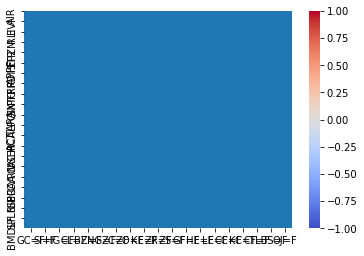

In [62]:
sns.heatmap(df_correl,cmap = "coolwarm",annot = True)

In [60]:
df_correl.to_csv('Correl.csv')

#### Isolate the best correl

In [135]:
def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

In [158]:
df_correl['Commo to Map'] = np.nan
df_correl['Max Correl'] = np.nan
for i in range(len(df_correl.index)):
    value = max(df_correl.iloc[i,:])
    dict_mapping = df_correl.iloc[i,:]
    try:
        df_correl['Commo to Map'].iloc[i] = get_keys_from_value(dict_mapping, value)[0]
    except:
        print('error :',i)
    df_correl['Max Correl'].iloc[i] = value
df_correl

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


error : 17
error : 18
error : 31
error : 57
error : 64
error : 66
error : 73
error : 98
error : 114
error : 118
error : 144
error : 161
error : 173
error : 189
error : 204
error : 205
error : 218
error : 221
error : 223
error : 240
error : 304
error : 305
error : 310
error : 334
error : 345
error : 346
error : 357
error : 373
error : 389
error : 395
error : 412
error : 415
error : 416
error : 423
error : 428
error : 462
error : 494
error : 500
error : 503
error : 506
error : 513
error : 514
error : 518
error : 520
error : 521
error : 537
error : 542
error : 558
error : 562
error : 567
error : 579
error : 598
error : 600
error : 611
error : 615
error : 628
error : 634
error : 643
error : 645
error : 646
error : 648
error : 663
error : 668
error : 702
error : 712
error : 715
error : 718
error : 722
error : 724
error : 748
error : 760
error : 764
error : 766
error : 776
error : 782
error : 795
error : 824
error : 852
error : 882
error : 931
error : 932
error : 941
error : 956
error : 999


error : 5144
error : 5157
error : 5158
error : 5159
error : 5163
error : 5172
error : 5176
error : 5179
error : 5180
error : 5185
error : 5191
error : 5192
error : 5193
error : 5194
error : 5195
error : 5196
error : 5208
error : 5209
error : 5210
error : 5211
error : 5212
error : 5213
error : 5214
error : 5215
error : 5216
error : 5223
error : 5225
error : 5226
error : 5253
error : 5254
error : 5255
error : 5256
error : 5273
error : 5318
error : 5319
error : 5329
error : 5334
error : 5335
error : 5336
error : 5337
error : 5338
error : 5345
error : 5346
error : 5351
error : 5368
error : 5373
error : 5374
error : 5375
error : 5376
error : 5384
error : 5400
error : 5404
error : 5405
error : 5416
error : 5417
error : 5418
error : 5434
error : 5435
error : 5436
error : 5440
error : 5470
error : 5474
error : 5489
error : 5501
error : 5525
error : 5526
error : 5527
error : 5568
error : 5569
error : 5570
error : 5571
error : 5572
error : 5575
error : 5577
error : 5578
error : 5598
error : 5689

,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,...,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F,Commo to Map,Max Correl
AIR,0.0761661,0.270622,0.491307,0.435279,0.483846,-0.0174113,0.186993,0.156487,0.0523938,0.0857626,...,0.0963853,-0.0561261,0.167721,0.251156,0.08137,0.263013,0.416392,0.484237,HG=F,0.491307
AAL,-0.0389134,-0.015646,0.219221,0.0810941,0.0908229,0.0665221,-0.0183926,-0.0625349,0.00976614,-0.079923,...,0.141693,-0.0130689,0.0995161,0.0403302,-0.0386551,0.20908,0.188598,0.852101,OJ=F,0.852101
CECE,-0.0118384,0.0729182,0.28824,0.253783,0.358581,0.168658,0.0825832,0.0557927,0.0620928,-0.107571,...,0.0598527,0.0669574,0.0256983,0.164357,-0.0493712,0.105386,0.193802,0.488556,OJ=F,0.488556
PNW,0.196775,0.129036,0.032328,-0.00471315,-0.0269471,0.00804852,0.0534837,-0.0389638,-0.0048558,0.0225137,...,-0.0234175,0.0813508,0.113886,-0.0746908,0.010228,0.0356885,0.0984625,0.951614,OJ=F,0.951614
PRG,0.144602,0.243494,0.293993,0.357469,0.418512,0.0785842,0.15783,0.0322642,-0.00686013,0.047901,...,0.0620832,0.10618,-0.00091988,0.171392,-0.0224596,0.272062,0.302454,0.118915,BZ=F,0.418512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNOW,-0.192282,-0.189118,0.306277,0.349402,0.363992,-0.0687573,-0.216042,-0.0210601,0.0336968,-0.26738,...,0.161784,-0.453085,-0.0464889,0.750921,0.427778,0.0549794,-0.183883,-0.701318,CC=F,0.750921
HYFM,-0.00548779,0.20368,0.00414013,-0.176069,-0.120781,-0.158602,0.455772,-0.439779,0.282283,0.390016,...,-0.0669639,-0.151491,-0.0681607,-0.24701,-0.150952,-0.231755,-0.03582,-0.200562,ZC=F,0.455772
WISH,-0.477467,-0.0568466,-0.344223,0.246408,0.229914,0.171632,0.437861,-0.190781,0.332442,0.283507,...,-0.244185,-0.308437,0.307781,-0.237368,-0.527507,0.0293861,-0.372812,-0.391983,ZC=F,0.437861
IBRX,-0.120769,0.0672158,0.209981,0.304234,0.307784,-0.141912,0.00950595,0.108292,0.104581,0.0482156,...,0.0755462,0.0583371,-0.034897,0.020758,-0.0374638,0.243898,0.0922935,-0.212832,BZ=F,0.307784


In [179]:
#df_correl_final = df_correl.loc[(df_correl['Max Correl'] >= 0.4) | (df_correl['Max Correl'] <= -0.4)]
df_correl_final = df_correl.loc[(df_correl['Max Correl'] >= 0.4)]
df_correl_final

,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,...,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F,Commo to Map,Max Correl
AIR,0.0761661,0.270622,0.491307,0.435279,0.483846,-0.0174113,0.186993,0.156487,0.0523938,0.0857626,...,0.0963853,-0.0561261,0.167721,0.251156,0.08137,0.263013,0.416392,0.484237,HG=F,0.491307
AAL,-0.0389134,-0.015646,0.219221,0.0810941,0.0908229,0.0665221,-0.0183926,-0.0625349,0.00976614,-0.079923,...,0.141693,-0.0130689,0.0995161,0.0403302,-0.0386551,0.20908,0.188598,0.852101,OJ=F,0.852101
CECE,-0.0118384,0.0729182,0.28824,0.253783,0.358581,0.168658,0.0825832,0.0557927,0.0620928,-0.107571,...,0.0598527,0.0669574,0.0256983,0.164357,-0.0493712,0.105386,0.193802,0.488556,OJ=F,0.488556
PNW,0.196775,0.129036,0.032328,-0.00471315,-0.0269471,0.00804852,0.0534837,-0.0389638,-0.0048558,0.0225137,...,-0.0234175,0.0813508,0.113886,-0.0746908,0.010228,0.0356885,0.0984625,0.951614,OJ=F,0.951614
PRG,0.144602,0.243494,0.293993,0.357469,0.418512,0.0785842,0.15783,0.0322642,-0.00686013,0.047901,...,0.0620832,0.10618,-0.00091988,0.171392,-0.0224596,0.272062,0.302454,0.118915,BZ=F,0.418512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMUX,0.0999248,0.206604,0.0926463,0.194753,0.171761,-0.042544,-0.0761495,-0.0852599,-0.040657,-0.109067,...,0.109543,-0.0426558,0.163741,0.118289,-0.135176,0.0686993,0.196494,0.432992,OJ=F,0.432992
SNOW,-0.192282,-0.189118,0.306277,0.349402,0.363992,-0.0687573,-0.216042,-0.0210601,0.0336968,-0.26738,...,0.161784,-0.453085,-0.0464889,0.750921,0.427778,0.0549794,-0.183883,-0.701318,CC=F,0.750921
HYFM,-0.00548779,0.20368,0.00414013,-0.176069,-0.120781,-0.158602,0.455772,-0.439779,0.282283,0.390016,...,-0.0669639,-0.151491,-0.0681607,-0.24701,-0.150952,-0.231755,-0.03582,-0.200562,ZC=F,0.455772
WISH,-0.477467,-0.0568466,-0.344223,0.246408,0.229914,0.171632,0.437861,-0.190781,0.332442,0.283507,...,-0.244185,-0.308437,0.307781,-0.237368,-0.527507,0.0293861,-0.372812,-0.391983,ZC=F,0.437861


#### Create a df to map a ticker with the commodity

In [180]:
df_mapping = df_correl_final['Commo to Map'].reset_index()
df_mapping

,index,Commo to Map
0,AIR,HG=F
1,AAL,OJ=F
2,CECE,OJ=F
3,PNW,OJ=F
4,PRG,BZ=F
...,...,...
6313,IMUX,OJ=F
6314,SNOW,CC=F
6315,HYFM,ZC=F
6316,WISH,ZC=F


# Earning/Commo Elasticity

#### Dictionnary mapping Commodity and stock

In [181]:
df_mapping = df_mapping.dropna()
df_mapping

,index,Commo to Map
0,AIR,HG=F
1,AAL,OJ=F
2,CECE,OJ=F
3,PNW,OJ=F
4,PRG,BZ=F
...,...,...
6313,IMUX,OJ=F
6314,SNOW,CC=F
6315,HYFM,ZC=F
6316,WISH,ZC=F


In [182]:
dict_mapping = {}
for i in range(len(df_mapping['index'])):
    key = df_mapping['index'].iloc[i]
    val = df_mapping['Commo to Map'].iloc[i]
    dict_mapping[key] = val
dict_mapping

{'AIR': 'HG=F',
 'AAL': 'OJ=F',
 'CECE': 'OJ=F',
 'PNW': 'OJ=F',
 'PRG': 'BZ=F',
 'WDDD': 'OJ=F',
 'ADX': 'BZ=F',
 'AE': 'OJ=F',
 'ASMIY': 'BZ=F',
 'AEM': 'GC=F',
 'AIRT': 'OJ=F',
 'ALK': 'OJ=F',
 'MATX': 'OJ=F',
 'AGMJF': 'BZ=F',
 'HON': 'HG=F',
 'GYLD': 'BZ=F',
 'HES': 'BZ=F',
 'PRI': 'BZ=F',
 'ECOL': 'BZ=F',
 'AEP': 'OJ=F',
 'AXP': 'BZ=F',
 'AFL': 'OJ=F',
 'AIG': 'BZ=F',
 'HYEM': 'OJ=F',
 'ARL': 'OJ=F',
 'AVD': 'OJ=F',
 'AME': 'HG=F',
 'AMGN': 'OJ=F',
 'AXR': 'OJ=F',
 'ADI': 'HG=F',
 'NBR': 'CL=F',
 'APA': 'BZ=F',
 'APOG': 'OJ=F',
 'AMAT': 'BZ=F',
 'EPAC': 'BZ=F',
 'ARCB': 'OJ=F',
 'ARW': 'OJ=F',
 'ASH': 'BZ=F',
 'ATRO': 'OJ=F',
 'ADSK': 'BZ=F',
 'AVT': 'OJ=F',
 'AZZ': 'OJ=F',
 'BTI': 'OJ=F',
 'BRT': 'OJ=F',
 'BMI': 'OJ=F',
 'BCPC': 'OJ=F',
 'BLL': 'OJ=F',
 'BPOP': 'HG=F',
 'BOH': 'BZ=F',
 'BK': 'HG=F',
 'B': 'OJ=F',
 'BRN': 'OJ=F',
 'GOLD': 'GC=F',
 'BSET': 'OJ=F',
 'BAX': 'OJ=F',
 'AIT': 'BZ=F',
 'BDX': 'OJ=F',
 'VZ': 'OJ=F',
 'BCE': 'OJ=F',
 'BKH': 'OJ=F',
 'HRB': 'OJ=F',
 'VAL':

### Elasticity Calculation

In [183]:
df_elasticity = pd.DataFrame(np.nan, index = list_year, columns = df_mapping['index'])
df_elasticity

index,AIR,AAL,CECE,PNW,PRG,WDDD,ADX,AE,ASMIY,AEM,...,GRIN,CALT,ACA,RNLX,BBUS,IMUX,SNOW,HYFM,WISH,KARO
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
for i in range(len(df_elasticity.index)) :
    year = df_elasticity.index[i]
    for j in range(len(df_elasticity.columns)):
        try:
            ticker = df_earnings_chg.columns[j]
            commo_ticker = dict_mapping[ticker]
            ebit_chg = df_earnings_chg[ticker][df_earnings_chg.index == year]
            ebit_chg = pd.DataFrame(ebit_chg)
            ebit_chg = ebit_chg[ticker].iloc[0]
            commo_chg = df_Commo_chgYearly[commo_ticker][df_Commo_chgYearly.index == year]
            commo_chg = pd.DataFrame(commo_chg)
            commo_chg = commo_chg[commo_ticker].iloc[0]
            df_elasticity.iloc[i,j] = ebit_chg / commo_chg 
        except:
            print('ERROR :', ticker, commo_ticker)
df_elasticity

ERROR : AIR HG=F
ERROR : AAL OJ=F
ERROR : CECE OJ=F
ERROR : PNW OJ=F
ERROR : PRG BZ=F
ERROR : ABT BZ=F
ERROR : WDDD OJ=F
ERROR : MRCBF OJ=F
ERROR : ACU OJ=F
ERROR : BKTI OJ=F
ERROR : ADX BZ=F
ERROR : AE OJ=F
ERROR : AMD OJ=F
ERROR : ASMIY BZ=F
ERROR : AEM GC=F
ERROR : APD GC=F
ERROR : AIRT OJ=F
ERROR : EGN1 OJ=F
ERROR : SO1 OJ=F
ERROR : ALK OJ=F
ERROR : ATRI OJ=F
ERROR : MATX OJ=F
ERROR : ALX OJ=F
ERROR : AGMJF BZ=F
ERROR : ALCO BZ=F
ERROR : PBAJ BZ=F
ERROR : Y BZ=F
ERROR : HON HG=F
ERROR : SWKS HG=F
ERROR : GYLD BZ=F
ERROR : HES BZ=F
ERROR : AMR1 BZ=F
ERROR : UHAL BZ=F
ERROR : ABM BZ=F
ERROR : PRI BZ=F
ERROR : VBF BZ=F
ERROR : ECOL BZ=F
ERROR : AEP OJ=F
ERROR : AXP BZ=F
ERROR : AFL OJ=F
ERROR : AIG BZ=F
ERROR : HYEM OJ=F
ERROR : ANAT OJ=F
ERROR : ARL OJ=F
ERROR : AMS OJ=F
ERROR : AMSWA OJ=F
ERROR : AVD OJ=F
ERROR : AME HG=F
ERROR : AMGN OJ=F
ERROR : AP OJ=F
ERROR : AXR OJ=F
ERROR : ADI HG=F
ERROR : ANDR HG=F
ERROR : ANDE HG=F
ERROR : NBR CL=F
ERROR : APA BZ=F
ERROR : APOG OJ=F
ERROR :

ERROR : NEM OJ=F
ERROR : NR BZ=F
ERROR : NKE BZ=F
ERROR : NTTYY BZ=F
ERROR : NOBH BZ=F
ERROR : NROM BZ=F
ERROR : NDSN BZ=F
ERROR : JWN BZ=F
ERROR : NSC BZ=F
ERROR : NC OJ=F
ERROR : MOV HG=F
ERROR : NRT OJ=F
ERROR : PGL2 OJ=F
ERROR : ES OJ=F
ERROR : NI OJ=F
ERROR : XEL OJ=F
ERROR : XEL1 OJ=F
ERROR : NTRS HG=F
ERROR : NOC OJ=F
ERROR : TEX HG=F
ERROR : NWN OJ=F
ERROR : WMB2 OJ=F
ERROR : NWE OJ=F
ERROR : WFC BZ=F
ERROR : NVO BZ=F
ERROR : NUE HG=F
ERROR : NEWT HG=F
ERROR : OXY BZ=F
ERROR : OBCI BZ=F
ERROR : OII BZ=F
ERROR : ITI BZ=F
ERROR : VTOL HG=F
ERROR : FE HG=F
ERROR : AEP5 HG=F
ERROR : ODC HG=F
ERROR : OGE OJ=F
ERROR : OLN OJ=F
ERROR : OLP OJ=F
ERROR : OKE BZ=F
ERROR : ORBT OJ=F
ERROR : OTTR OJ=F
ERROR : OSG OJ=F
ERROR : OMI OJ=F
ERROR : OC OJ=F
ERROR : OI OJ=F
ERROR : OXM OJ=F
ERROR : PFIN OJ=F
ERROR : PNC BZ=F
ERROR : PPG HG=F
ERROR : PCAR HG=F
ERROR : PCG HG=F
ERROR : SRE OJ=F
ERROR : MEC2 OJ=F
ERROR : SMM BZ=F
ERROR : PEL1 BZ=F
ERROR : PAR BZ=F
ERROR : PDI BZ=F
ERROR : PKE OJ=F
ER

ERROR : CLH BZ=F
ERROR : SEBFF OJ=F
ERROR : CFPZF OJ=F
ERROR : PCAR1 OJ=F
ERROR : CCDBF OJ=F
ERROR : CADNF OJ=F
ERROR : BDRBF BZ=F
ERROR : AIN OJ=F
ERROR : DWPP BZ=F
ERROR : TUERF BZ=F
ERROR : 4779B BZ=F
ERROR : CYBE BZ=F
ERROR : FKWL OJ=F
ERROR : MITK OJ=F
ERROR : AMIVF CL=F
ERROR : UMEWF OJ=F
ERROR : SAN BZ=F
ERROR : VTDRF BZ=F
ERROR : FULT OJ=F
ERROR : CADE OJ=F
ERROR : FAST OJ=F
ERROR : TATT OJ=F
ERROR : WABC OJ=F
ERROR : MXIM OJ=F
ERROR : HLF OJ=F
ERROR : FRC CT=F
ERROR : APH OJ=F
ERROR : IPAR OJ=F
ERROR : PII OJ=F
ERROR : EMLAF OJ=F
ERROR : ICPT OJ=F
ERROR : ONEXF BZ=F
ERROR : WFG OJ=F
ERROR : IGIFF BZ=F
ERROR : SNCAF OJ=F
ERROR : SJR OJ=F
ERROR : PXD BZ=F
ERROR : USM OJ=F
ERROR : MAN OJ=F
ERROR : FTS OJ=F
ERROR : TAC BZ=F
ERROR : WCM.A BZ=F
ERROR : ITIC BZ=F
ERROR : DX BZ=F
ERROR : MGM HG=F
ERROR : CDUAF HG=F
ERROR : FM BZ=F
ERROR : ATE1 BZ=F
ERROR : LVMUY HG=F
ERROR : QTXB HG=F
ERROR : WM HG=F
ERROR : DELL HG=F
ERROR : NUZE LE=F
ERROR : VEGA BZ=F
ERROR : TMXXF BZ=F
ERROR : SSP 

ERROR : PGZ BZ=F
ERROR : IDOG BZ=F
ERROR : DXJS OJ=F
ERROR : FVCB OJ=F
ERROR : MBII OJ=F
ERROR : CSHX OJ=F
ERROR : THFF OJ=F
ERROR : ASC OJ=F
ERROR : DSS OJ=F
ERROR : CWEN OJ=F
ERROR : PPRQF OJ=F
ERROR : FKYS OJ=F
ERROR : SPSM BZ=F
ERROR : FLIC OJ=F
ERROR : IBDD OJ=F
ERROR : USFD OJ=F
ERROR : IRMTF OJ=F
ERROR : PGEN OJ=F
ERROR : FOXF CL=F
ERROR : SIRE CL=F
ERROR : BUSE CL=F
ERROR : EQX GC=F
ERROR : FUNC GC=F
ERROR : BSCM OJ=F
ERROR : BGI.UN OJ=F
ERROR : QUAL BZ=F
ERROR : BRX BZ=F
ERROR : FRAF BZ=F
ERROR : CBDS BZ=F
ERROR : SECUF LBS=F
ERROR : EAST LBS=F
ERROR : KFYP OJ=F
ERROR : DGRS BZ=F
ERROR : LPCN BZ=F
ERROR : KIO BZ=F
ERROR : ALRS BZ=F
ERROR : SPNT BZ=F
ERROR : AR BZ=F
ERROR : FUJHY BZ=F
ERROR : FJTSY OJ=F
ERROR : PAGP BZ=F
ERROR : DGRE OJ=F
ERROR : KWEB OJ=F
ERROR : FMF OJ=F
ERROR : MNDT OJ=F
ERROR : LGMK OJ=F
ERROR : IRT OJ=F
ERROR : MUSA OJ=F
ERROR : MLPX BZ=F
ERROR : IPWR BZ=F
ERROR : TRSWF OJ=F
ERROR : VUN. OJ=F
ERROR : VGHHF OJ=F
ERROR : VGG. OJ=F
ERROR : VDU. OJ=F
ERROR : V

ERROR : AKTS OJ=F
ERROR : VXC. OJ=F
ERROR : VBU. OJ=F
ERROR : VBG. OJ=F
ERROR : VA. OJ=F
ERROR : VE. OJ=F
ERROR : JOF OJ=F
ERROR : REET BZ=F
ERROR : HEZU BZ=F
ERROR : RWLK OJ=F
ERROR : HOG. OJ=F
ERROR : ADMT OJ=F
ERROR : AXDX OJ=F
ERROR : SGDM GC=F
ERROR : LOCO OJ=F
ERROR : ABMC OJ=F
ERROR : OTIC OJ=F
ERROR : ATY HG=F
ERROR : XSQ. HG=F
ERROR : USB. HG=F
ERROR : PFL. HG=F
ERROR : ICD HG=F
ERROR : IRL OJ=F
ERROR : MFGI OJ=F
ERROR : MBKL OJ=F
ERROR : ETP. OJ=F
ERROR : CYTO OJ=F
ERROR : VBLT OJ=F
ERROR : IFV BZ=F
ERROR : CNXT BZ=F
ERROR : CFRX BZ=F
ERROR : LBRDK OJ=F
ERROR : THQ HG=F
ERROR : TTI BZ=F
ERROR : VICR BZ=F
ERROR : CGA BZ=F
ERROR : PBLA BZ=F
ERROR : FCUV BZ=F
ERROR : CSF OJ=F
ERROR : FTSM OJ=F
ERROR : SULMF OJ=F
ERROR : AVNS OJ=F
ERROR : NNUP OJ=F
ERROR : STD1 OJ=F
ERROR : EYES OJ=F
ERROR : UNIB OJ=F
ERROR : GVA OJ=F
ERROR : CRC CC=F
ERROR : RDGA CC=F
ERROR : CAT1 CC=F
ERROR : LSTR HG=F
ERROR : HISF BZ=F
ERROR : KMPR OJ=F
ERROR : UNVR BZ=F
ERROR : CZFS OJ=F
ERROR : VYNE OJ=F
ERR

ERROR : TTE BZ=F
ERROR : DDEJF BZ=F
ERROR : TRU BZ=F
ERROR : JAN BZ=F
ERROR : ABQQ BZ=F
ERROR : THCBF BZ=F
ERROR : HMN OJ=F
ERROR : FTB. OJ=F
ERROR : VKQ OJ=F
ERROR : ATNI OJ=F
ERROR : WNC OJ=F
ERROR : LILAK OJ=F
ERROR : WRLD OJ=F
ERROR : DTF OJ=F
ERROR : KIM BZ=F
ERROR : WETF BZ=F
ERROR : JBSS OJ=F
ERROR : PRGO OJ=F
ERROR : TTEK OJ=F
ERROR : MYD OJ=F
ERROR : JPN OJ=F
ERROR : AMSC OJ=F
ERROR : BLGO OJ=F
ERROR : QCOM OJ=F
ERROR : LTCCF OJ=F
ERROR : MOGO OJ=F
ERROR : OFC OJ=F
ERROR : AHPI OJ=F
ERROR : PEYE OJ=F
ERROR : SPOK OJ=F
ERROR : HTUS BZ=F
ERROR : GILD OJ=F
ERROR : PLNT OJ=F
ERROR : STAL OJ=F
ERROR : AES3 OJ=F
ERROR : MSON OJ=F
ERROR : PDRX OJ=F
ERROR : LMFA OJ=F
ERROR : RUN OJ=F
ERROR : MCFT BZ=F
ERROR : ACFN OJ=F
ERROR : PFO OJ=F
ERROR : TPYP BZ=F
ERROR : ROP CL=F
ERROR : MAMTF HG=F
ERROR : VGM OJ=F
ERROR : HSCZ BZ=F
ERROR : ITPOF BZ=F
ERROR : HRNNF OJ=F
ERROR : HAWX BZ=F
ERROR : HEWC BZ=F
ERROR : GOVX ZC=F
ERROR : HEWU BZ=F
ERROR : SNPS BZ=F
ERROR : ELY OJ=F
ERROR : CRT BZ=F
ER

ERROR : JELD BZ=F
ERROR : PI BZ=F
ERROR : RFDA BZ=F
ERROR : RFFC BZ=F
ERROR : SYRS BZ=F
ERROR : HGV HG=F
ERROR : PK OJ=F
ERROR : INRE OJ=F
ERROR : SPDN OJ=F
ERROR : ADME BZ=F
ERROR : ESGS BZ=F
ERROR : ESGN BZ=F
ERROR : RFCI GC=F
ERROR : CNYA HG=F
ERROR : RFEM OJ=F
ERROR : TORXF GC=F
ERROR : FALN BZ=F
ERROR : HYXF OJ=F
ERROR : KIDS OJ=F
ERROR : MKC. OJ=F
ERROR : MUS. OJ=F
ERROR : VVL. OJ=F
ERROR : VMO. OJ=F
ERROR : VVO. OJ=F
ERROR : TPIC BZ=F
ERROR : GOLF CL=F
ERROR : SMPL CL=F
ERROR : GSTC OJ=F
ERROR : CTO. OJ=F
ERROR : APHE OJ=F
ERROR : XWEB BZ=F
ERROR : HONE OJ=F
ERROR : ESGD BZ=F
ERROR : ESGE BZ=F
ERROR : MNP BZ=F
ERROR : CEO. BZ=F
ERROR : AA OJ=F
ERROR : BVS HE=F
ERROR : RNDB BZ=F
ERROR : KNSL CL=F
ERROR : YETI HG=F
ERROR : KRMA BZ=F
ERROR : FHB OJ=F
ERROR : PTGX CL=F
ERROR : WCFB OJ=F
ERROR : ESG BZ=F
ERROR : ESGG BZ=F
ERROR : EYLD BZ=F
ERROR : MULG BZ=F
ERROR : DQI. BZ=F
ERROR : EHE. BZ=F
ERROR : IQD. BZ=F
ERROR : DQD. BZ=F
ERROR : DGR. BZ=F
ERROR : FWBI BZ=F
ERROR : PRNT BZ=F
ER

ERROR : CIXX HG=F
ERROR : FR HG=F
ERROR : SUPGF GC=F
ERROR : HCC OJ=F
ERROR : FALC OJ=F
ERROR : BLES BZ=F
ERROR : ISMD BZ=F
ERROR : HMNF OJ=F
ERROR : STLJF OJ=F
ERROR : GRNB OJ=F
ERROR : JILL OJ=F
ERROR : AKO.B OJ=F
ERROR : FDP OJ=F
ERROR : IPA OJ=F
ERROR : BBD OJ=F
ERROR : IBML OJ=F
ERROR : GBX OJ=F
ERROR : PAVE BZ=F
ERROR : XPL HG=F
ERROR : MATW OJ=F
ERROR : AIV OJ=F
ERROR : GEO OJ=F
ERROR : SOI OJ=F
ERROR : TARO OJ=F
ERROR : MLR OJ=F
ERROR : GOOS OJ=F
ERROR : TMRC OJ=F
ERROR : ESXMF GC=F
ERROR : ADTN OJ=F
ERROR : ITUB OJ=F
ERROR : CEFS BZ=F
ERROR : AMED BZ=F
ERROR : EFOI OJ=F
ERROR : YEXT BZ=F
ERROR : VRE BZ=F
ERROR : PNBK BZ=F
ERROR : DAR BZ=F
ERROR : AYX BZ=F
ERROR : IDEV BZ=F
ERROR : SIRI OJ=F
ERROR : HEXO BZ=F
ERROR : WVVI BZ=F
ERROR : RS OJ=F
ERROR : TDF HG=F
ERROR : TESS OJ=F
ERROR : GSSC BZ=F
ERROR : OKTA BZ=F
ERROR : COM HG=F
ERROR : QYOUF HG=F
ERROR : BCI BZ=F
ERROR : ARCM BZ=F
ERROR : BCD BZ=F
ERROR : DCC. BZ=F
ERROR : GGT BZ=F
ERROR : DCG. BZ=F
ERROR : DCP. BZ=F
ERROR : D

ERROR : ZUO BZ=F
ERROR : RDVT BZ=F
ERROR : FIXX BZ=F
ERROR : WH BZ=F
ERROR : BDRY OJ=F
ERROR : IBMM OJ=F
ERROR : IQ OJ=F
ERROR : IETC BZ=F
ERROR : BLCK. BZ=F
ERROR : IEHS BZ=F
ERROR : IECS OJ=F
ERROR : IEME BZ=F
ERROR : IEFN BZ=F
ERROR : IEIH OJ=F
ERROR : KNG BZ=F
ERROR : LEVL BZ=F
ERROR : SURF CL=F
ERROR : SMAR OJ=F
ERROR : DXV. OJ=F
ERROR : IEA OJ=F
ERROR : ALEAF OJ=F
ERROR : CHXMF GC=F
ERROR : SYLD. GC=F
ERROR : PRMAF GC=F
ERROR : PINV. GC=F
ERROR : DOCU GC=F
ERROR : IFRA BZ=F
ERROR : CMDY BZ=F
ERROR : QARP BZ=F
ERROR : PULS OJ=F
ERROR : STXB OJ=F
ERROR : UBX OJ=F
ERROR : RAAX BZ=F
ERROR : ESML BZ=F
ERROR : CHX BZ=F
ERROR : FLTW OJ=F
ERROR : FLFR BZ=F
ERROR : FLBR OJ=F
ERROR : FLAU BZ=F
ERROR : JMOM BZ=F
ERROR : ORCC BZ=F
ERROR : FLEE BZ=F
ERROR : FLCA BZ=F
ERROR : JDIV BZ=F
ERROR : PPTY BZ=F
ERROR : DRIV BZ=F
ERROR : FLEH BZ=F
ERROR : FLJP OJ=F
ERROR : FLIY BZ=F
ERROR : FLHK HG=F
ERROR : FLGR BZ=F
ERROR : FLCH HG=F
ERROR : JVAL BZ=F
ERROR : JQUA BZ=F
ERROR : EDOW BZ=F
ERROR : FLGB 

ERROR : WORX OJ=F
ERROR : BGFGF OJ=F
ERROR : VRAI BZ=F
ERROR : VPC BZ=F
ERROR : VCIP. BZ=F
ERROR : VEQT. BZ=F
ERROR : NALT. BZ=F
ERROR : NPRF. BZ=F
ERROR : NFAM. BZ=F
ERROR : NBGLF BZ=F
ERROR : WINC OJ=F
ERROR : ZBAL. OJ=F
ERROR : ZHU. OJ=F
ERROR : ZWK. OJ=F
ERROR : ZNQ. OJ=F
ERROR : ZCON. OJ=F
ERROR : ZGRO. OJ=F
ERROR : FFLWF BZ=F
ERROR : SWAV CC=F
ERROR : HLPR. CC=F
ERROR : JHCS BZ=F
ERROR : FSMD BZ=F
ERROR : FDEV BZ=F
ERROR : FDEM BZ=F
ERROR : LYFT OJ=F
ERROR : SILK CT=F
ERROR : DTIL CC=F
ERROR : FIVG BZ=F
ERROR : DRFE. BZ=F
ERROR : USSG BZ=F
ERROR : DRFG. BZ=F
ERROR : EWJV OJ=F
ERROR : EWJE OJ=F
ERROR : LSPD BZ=F
ERROR : TW CL=F
ERROR : HAPP BZ=F
ERROR : BBSA OJ=F
ERROR : LSLT BZ=F
ERROR : XFOR BZ=F
ERROR : FSEA OJ=F
ERROR : RMBI BZ=F
ERROR : PBFS CT=F
ERROR : TH BZ=F
ERROR : PDSB OJ=F
ERROR : BIOX OJ=F
ERROR : PLMR SI=F
ERROR : CHNG BZ=F
ERROR : PD BZ=F
ERROR : HOMZ BZ=F
ERROR : JMIA BZ=F
ERROR : XSEM. BZ=F
ERROR : XSUS. BZ=F
ERROR : XSTB. BZ=F
ERROR : XSEA. BZ=F
ERROR : XSAB. BZ=

ERROR : PASG BZ=F
ERROR : NOVB.F BZ=F
ERROR : AWAY CC=F
ERROR : FLYT GC=F
ERROR : POWW GC=F
ERROR : MARB OJ=F
ERROR : HSAV. OJ=F
ERROR : HULC. OJ=F
ERROR : FLCB OJ=F
ERROR : DWEQ BZ=F
ERROR : DWAW SI=F
ERROR : DWUS BZ=F
ERROR : NUSI SI=F
ERROR : LDEM BZ=F
ERROR : VEGN BZ=F
ERROR : VRT BZ=F
ERROR : ARMR BZ=F
ERROR : ZSML.F BZ=F
ERROR : ZMBS. BZ=F
ERROR : ZQB. BZ=F
ERROR : ZMID.F BZ=F
ERROR : ZBBB. BZ=F
ERROR : OTIS OJ=F
ERROR : CARR GF=F
ERROR : AZEK OJ=F
ERROR : PCOR. OJ=F
ERROR : PCON. OJ=F
ERROR : VNT CC=F
ERROR : IMRA CL=F
ERROR : ALTG BZ=F
ERROR : GSMG BZ=F
ERROR : BSFC ZC=F
ERROR : DXW. ZC=F
ERROR : DXN. ZC=F
ERROR : HCRB GC=F
ERROR : DFEB BZ=F
ERROR : FFEB BZ=F
ERROR : SNUG BZ=F
ERROR : FEBB.F BZ=F
ERROR : SLQT CL=F
ERROR : NARI SI=F
ERROR : TOI OJ=F
ERROR : IBTB GC=F
ERROR : IBTD GC=F
ERROR : IBTF OJ=F
ERROR : IBTG OJ=F
ERROR : IBTH OJ=F
ERROR : IBTI OJ=F
ERROR : IBTJ OJ=F
ERROR : HELX BZ=F
ERROR : BUYZ BZ=F
ERROR : IQM BZ=F
ERROR : HDIV BZ=F
ERROR : LUNG BZ=F
ERROR : ACCD CC=F


ERROR : RIDE CC=F
ERROR : CERE CL=F
ERROR : DOCT CC=F
ERROR : FOCT BZ=F
ERROR : SQZ CC=F
ERROR : HAAC CT=F
ERROR : LESL OJ=F
ERROR : ACTV BZ=F
ERROR : LSAT ZS=F
ERROR : VVOS CC=F
ERROR : AVIR OJ=F
ERROR : EZGO KE=F
ERROR : NGMS SI=F
ERROR : ALGM CC=F
ERROR : GLTO OJ=F
ERROR : SVAL HG=F
ERROR : CTEC BZ=F
ERROR : VPN OJ=F
ERROR : CPLS. OJ=F
ERROR : CCNS. OJ=F
ERROR : CCRE. OJ=F
ERROR : ACVF HG=F
ERROR : FSR CC=F
ERROR : TLMD ZC=F
ERROR : CONX KE=F
ERROR : DEMZ HG=F
ERROR : SHC OJ=F
ERROR : NOVZ HG=F
ERROR : INAB ZO=F
ERROR : MRVI ZO=F
ERROR : UPST ZO=F
ERROR : GINN SI=F
ERROR : RBND SI=F
ERROR : EWEB ZC=F
ERROR : MOON ZC=F
ERROR : CBSE BZ=F
ERROR : SOLR SI=F
ERROR : IBHF OJ=F
ERROR : CBLS BZ=F
ERROR : CNXC OJ=F
ERROR : KVLE ZS=F
ERROR : BBSC BZ=F
ERROR : LBAY OJ=F
ERROR : EOSE GF=F
ERROR : MDVL GF=F
ERROR : EGIS HG=F
ERROR : JOET HG=F
ERROR : LYFE HG=F
ERROR : RORO SI=F
ERROR : DFAU HG=F
ERROR : DFAI SI=F
ERROR : GCMG ZO=F
ERROR : MP BZ=F
ERROR : OLMA CC=F
ERROR : AFRM ZO=F
ERROR : CERT 

ERROR : MAYZ SI=F
ERROR : TALS CL=F
ERROR : FLYW CC=F
ERROR : ZIP NG=F
ERROR : TCRX KE=F
ERROR : PAY OJ=F
ERROR : MLNK HG=F
ERROR : ATFV KE=F
ERROR : ACT CT=F
ERROR : BWMN OJ=F
ERROR : TCBS OJ=F
ERROR : MBOX SI=F
ERROR : VMEO CL=F
ERROR : SINV OJ=F
ERROR : DAWN CC=F
ERROR : BLFY KC=F
ERROR : HYIN CL=F
ERROR : SKIN CL=F
ERROR : TECH. CL=F
ERROR : FIGS ZC=F
ERROR : LEV BZ=F
ERROR : VERA KC=F
ERROR : AGOX SI=F
ERROR : SIXT. SI=F
ERROR : FIVE. SI=F
ERROR : ALZN LBS=F
ERROR : WKLY HG=F
ERROR : PFIX LBS=F
ERROR : SXQG SI=F
ERROR : OMIC SI=F
ERROR : MJUS OJ=F
ERROR : FMNY GF=F
ERROR : SVOL SI=F
ERROR : CPOP ZC=F
ERROR : TRYP GF=F
ERROR : OGN CC=F
ERROR : MNDY KE=F
ERROR : DIBS ZC=F
ERROR : VRAR KE=F
ERROR : FEMY KE=F
ERROR : QQQA SI=F
ERROR : MQ SI=F
ERROR : LFST ZS=F
ERROR : WKME CC=F
ERROR : PLTL SI=F
ERROR : PLRG SI=F
ERROR : ZME OJ=F
ERROR : OWL NG=F
ERROR : DSPC KE=F
ERROR : SOGU OJ=F
ERROR : LQDB GF=F
ERROR : NTSE ZC=F
ERROR : NTSI HG=F
ERROR : DNTL. HG=F
ERROR : BHG CL=F
ERROR : JANX G

ERROR : STRL OJ=F
ERROR : HEI SI=F
ERROR : HELE OJ=F
ERROR : HPQ ZO=F
ERROR : CRAWA OJ=F
ERROR : HRC OJ=F
ERROR : HTHIY BZ=F
ERROR : HD BZ=F
ERROR : CNP OJ=F
ERROR : HURC BZ=F
ERROR : HBP BZ=F
ERROR : 4300A BZ=F
ERROR : AEP2 BZ=F
ERROR : RYI OJ=F
ERROR : WGEI OJ=F
ERROR : GFF OJ=F
ERROR : CCRD OJ=F
ERROR : IFF OJ=F
ERROR : IVC OJ=F
ERROR : AES4 OJ=F
ERROR : LUK2 HG=F
ERROR : GPU3 HG=F
ERROR : KLAC HG=F
ERROR : PNRG BZ=F
ERROR : KSU OJ=F
ERROR : AEP4 BZ=F
ERROR : KOSS HG=F
ERROR : LRCX OJ=F
ERROR : LEG OJ=F
ERROR : LLY HG=F
ERROR : BBWI HG=F
ERROR : LBLCF BZ=F
ERROR : RRC BZ=F
ERROR : ETR2 OJ=F
ERROR : LOW OJ=F
ERROR : LUB OJ=F
ERROR : MCS BZ=F
ERROR : MARPS BZ=F
ERROR : MAS BZ=F
ERROR : MAT OJ=F
ERROR : MLP OJ=F
ERROR : SPGI BZ=F
ERROR : SLNH OJ=F
ERROR : GENC OJ=F
ERROR : MDT OJ=F
ERROR : PSSR OJ=F
ERROR : MRK OJ=F
ERROR : MDP OJ=F
ERROR : MTR OJ=F
ERROR : EVI OJ=F
ERROR : GPU1 OJ=F
ERROR : SIEB BZ=F
ERROR : MIK BZ=F
ERROR : MPAD OJ=F
ERROR : ETR6 OJ=F
ERROR : MLKN OJ=F
ERROR : MSA OJ

ERROR : FUD. BZ=F
ERROR : FDE. BZ=F
ERROR : ESBK BZ=F
ERROR : BLUE OJ=F
ERROR : ENBP OJ=F
ERROR : NSTG OJ=F
ERROR : BMIX BZ=F
ERROR : EXSR BZ=F
ERROR : NDLS BZ=F
ERROR : PSCBF BZ=F
ERROR : REXR BZ=F
ERROR : MNKKQ BZ=F
ERROR : FMBL BZ=F
ERROR : RVNU BZ=F
ERROR : BNDX BZ=F
ERROR : TGEN OJ=F
ERROR : BXF. OJ=F
ERROR : GLG OJ=F
ERROR : DOC OJ=F
ERROR : AGIO OJ=F
ERROR : ESPR OJ=F
ERROR : ONTX OJ=F
ERROR : EVOK OJ=F
ERROR : FBAK BZ=F
ERROR : ANIP BZ=F
ERROR : WTER BZ=F
ERROR : FVCB OJ=F
ERROR : MBII OJ=F
ERROR : CSHX OJ=F
ERROR : ASC OJ=F
ERROR : DSS OJ=F
ERROR : CWEN OJ=F
ERROR : PPRQF OJ=F
ERROR : FKYS OJ=F
ERROR : IRMTF OJ=F
ERROR : PGEN OJ=F
ERROR : SIRE CL=F
ERROR : BUSE CL=F
ERROR : FUNC GC=F
ERROR : BGI.UN OJ=F
ERROR : FRAF BZ=F
ERROR : CBDS BZ=F
ERROR : EAST LBS=F
ERROR : LPCN BZ=F
ERROR : ALRS BZ=F
ERROR : AR BZ=F
ERROR : FUJHY BZ=F
ERROR : KWEB OJ=F
ERROR : FMF OJ=F
ERROR : IRT OJ=F
ERROR : IPWR BZ=F
ERROR : VUN. OJ=F
ERROR : VGHHF OJ=F
ERROR : VGG. OJ=F
ERROR : VDU. OJ=F
ERROR : V

ERROR : WETF BZ=F
ERROR : TTEK OJ=F
ERROR : AMSC OJ=F
ERROR : BLGO OJ=F
ERROR : QCOM OJ=F
ERROR : LTCCF OJ=F
ERROR : MOGO OJ=F
ERROR : AHPI OJ=F
ERROR : PEYE OJ=F
ERROR : SPOK OJ=F
ERROR : STAL OJ=F
ERROR : AES3 OJ=F
ERROR : MSON OJ=F
ERROR : PDRX OJ=F
ERROR : LMFA OJ=F
ERROR : RUN OJ=F
ERROR : ITPOF BZ=F
ERROR : SNPS BZ=F
ERROR : SBI OJ=F
ERROR : LFVN BZ=F
ERROR : MYC BZ=F
ERROR : MYN BZ=F
ERROR : USAK OJ=F
ERROR : AERG BZ=F
ERROR : CNFR HG=F
ERROR : ZYNE BZ=F
ERROR : SRRA BZ=F
ERROR : ASUR OJ=F
ERROR : CRWN. OJ=F
ERROR : RNST CL=F
ERROR : HQL OJ=F
ERROR : HLI OJ=F
ERROR : BKE BZ=F
ERROR : VTN BZ=F
ERROR : OLED BZ=F
ERROR : MYJ SI=F
ERROR : NXQ SI=F
ERROR : INTZ SI=F
ERROR : MDS.UN BZ=F
ERROR : STE BZ=F
ERROR : PVBC BZ=F
ERROR : LOOP OJ=F
ERROR : BBBY OJ=F
ERROR : GBT OJ=F
ERROR : BNET OJ=F
ERROR : MGIC OJ=F
ERROR : APPTF OJ=F
ERROR : GPK OJ=F
ERROR : JCTCF CL=F
ERROR : NXN OJ=F
ERROR : FCEL OJ=F
ERROR : STRS OJ=F
ERROR : RACE OJ=F
ERROR : NKSH OJ=F
ERROR : CENTA ZC=F
ERROR : EDTXF HG

ERROR : CLXT OJ=F
ERROR : AEX10 OJ=F
ERROR : EDGF. BZ=F
ERROR : EFBI BZ=F
ERROR : MHCD. BZ=F
ERROR : NEXT BZ=F
ERROR : ALPN BZ=F
ERROR : GNPX BZ=F
ERROR : JAGX BZ=F
ERROR : CDBMF OJ=F
ERROR : ZLAB OJ=F
ERROR : KRYS CL=F
ERROR : HBB CL=F
ERROR : RWX. BZ=F
ERROR : ROKU GC=F
ERROR : DCPH GC=F
ERROR : FLMB BZ=F
ERROR : BPMP HG=F
ERROR : FSB. BZ=F
ERROR : REIT. BZ=F
ERROR : QD BZ=F
ERROR : CYBR. BZ=F
ERROR : EMV. BZ=F
ERROR : UMI. BZ=F
ERROR : DGRC. BZ=F
ERROR : DXBBF BZ=F
ERROR : DXZ. BZ=F
ERROR : DXF. BZ=F
ERROR : HXDM. BZ=F
ERROR : IGCF. OJ=F
ERROR : HTRB OJ=F
ERROR : EATOF BZ=F
ERROR : PMIF. BZ=F
ERROR : ANGI BZ=F
ERROR : DIVS. BZ=F
ERROR : MDB OJ=F
ERROR : ZVC. BZ=F
ERROR : ZJK. BZ=F
ERROR : ZVU. BZ=F
ERROR : CALL. HG=F
ERROR : PACK HG=F
ERROR : RBDI. BZ=F
ERROR : RBNK. BZ=F
ERROR : RPSB. BZ=F
ERROR : RUSB. BZ=F
ERROR : FEDU BZ=F
ERROR : LIFE. BZ=F
ERROR : FINV BZ=F
ERROR : ACMR BZ=F
ERROR : IFRX BZ=F
ERROR : AIHS BZ=F
ERROR : JT BZ=F
ERROR : MIND. BZ=F
ERROR : DLTNF OJ=F
ERROR : INOC.

ERROR : CMEY. SI=F
ERROR : TMBR SI=F
ERROR : MAYB. SI=F
ERROR : JEPI SI=F
ERROR : CGRE. SI=F
ERROR : CGRA. SI=F
ERROR : HSTO SI=F
ERROR : AYRO OJ=F
ERROR : NSRXF OJ=F
ERROR : HFT. HG=F
ERROR : TUED. HG=F
ERROR : TGGR. HG=F
ERROR : TULV. HG=F
ERROR : TINF. HG=F
ERROR : TCLV. HG=F
ERROR : API CL=F
ERROR : FUSN CL=F
ERROR : FCIM. OJ=F
ERROR : FCVH. OJ=F
ERROR : FCMH. OJ=F
ERROR : FCIV. OJ=F
ERROR : FCIG. OJ=F
ERROR : FCCM. OJ=F
ERROR : FCCV. OJ=F
ERROR : FCMO. OJ=F
ERROR : FCUV. OJ=F
ERROR : LONG. HE=F
ERROR : FBRX HE=F
ERROR : WSRI. HE=F
ERROR : WSRD. HE=F
ERROR : GERM HE=F
ERROR : VIRS BZ=F
ERROR : HCA. ZS=F
ERROR : HUM. ZS=F
ERROR : HFG. ZS=F
ERROR : HBA. ZS=F
ERROR : HOFV CC=F
ERROR : HSUV.U. CC=F
ERROR : IBTK ZC=F
ERROR : AUVI CT=F
ERROR : CMPI HG=F
ERROR : BEPC OJ=F
ERROR : CGLO. OJ=F
ERROR : CINT. OJ=F
ERROR : HXEM. BZ=F
ERROR : AOUT BZ=F
ERROR : GIQU. BZ=F
ERROR : GIGR. BZ=F
ERROR : GDEP. BZ=F
ERROR : GIQG. BZ=F
ERROR : GDPY. BZ=F
ERROR : TOCM. CC=F
ERROR : TOCA. CC=F
ERROR : TOCC

ERROR : OBCI BZ=F
ERROR : ITI BZ=F
ERROR : FE HG=F
ERROR : AEP5 HG=F
ERROR : ODC HG=F
ERROR : OLN OJ=F
ERROR : OTTR OJ=F
ERROR : OMI OJ=F
ERROR : OC OJ=F
ERROR : PFIN OJ=F
ERROR : PCG HG=F
ERROR : MEC2 OJ=F
ERROR : PEL1 BZ=F
ERROR : PAR BZ=F
ERROR : ECORF OJ=F
ERROR : FE4 BZ=F
ERROR : PEI OJ=F
ERROR : PGL3 BZ=F
ERROR : PEP BZ=F
ERROR : PFE BZ=F
ERROR : EXC BZ=F
ERROR : PHG OJ=F
ERROR : DUK1 BZ=F
ERROR : SENEA BZ=F
ERROR : PBI HG=F
ERROR : 2638B OJ=F
ERROR : IPDN GC=F
ERROR : POLXF GC=F
ERROR : NU4 OJ=F
ERROR : PNM OJ=F
ERROR : SCG2 OJ=F
ERROR : AEP12 OJ=F
ERROR : PEG OJ=F
ERROR : 5495B OJ=F
ERROR : PCYO OJ=F
ERROR : NXGN HG=F
ERROR : QMCO HG=F
ERROR : QBCRF HG=F
ERROR : RCMT HG=F
ERROR : RPM BZ=F
ERROR : RAVN OJ=F
ERROR : IHT OJ=F
ERROR : RGS OJ=F
ERROR : RTMAF OJ=F
ERROR : HBC2 OJ=F
ERROR : AN OJ=F
ERROR : RSKIA OJ=F
ERROR : ROST OJ=F
ERROR : SEIC HG=F
ERROR : PGNT HG=F
ERROR : SJT OJ=F
ERROR : SCND OJ=F
ERROR : APPS OJ=F
ERROR : SMTC OJ=F
ERROR : SCI OJ=F
ERROR : SVT OJ=F
ERROR : SHW

ERROR : TCS OJ=F
ERROR : HYBR. OJ=F
ERROR : ESBA OJ=F
ERROR : EXPI OJ=F
ERROR : GLYC OJ=F
ERROR : CUEN OJ=F
ERROR : TNDM OJ=F
ERROR : TRVN OJ=F
ERROR : KPTI OJ=F
ERROR : XNCR OJ=F
ERROR : PSA. BZ=F
ERROR : VCYT BZ=F
ERROR : DTLA.P BZ=F
ERROR : D3 BZ=F
ERROR : STKS BZ=F
ERROR : XXM.B BZ=F
ERROR : YXM. BZ=F
ERROR : MMI BZ=F
ERROR : FHLC BZ=F
ERROR : BTCM OJ=F
ERROR : VRNS OJ=F
ERROR : NEFB BZ=F
ERROR : BIOC BZ=F
ERROR : HNRG BZ=F
ERROR : OVBC LBS=F
ERROR : OSBC OJ=F
ERROR : CARA OJ=F
ERROR : AMRK BZ=F
ERROR : VNCE BZ=F
ERROR : SMLR BZ=F
ERROR : CAPR BZ=F
ERROR : CTBI OJ=F
ERROR : FISOF OJ=F
ERROR : PLPC OJ=F
ERROR : AAGH BZ=F
ERROR : PRK BZ=F
ERROR : SFNC OJ=F
ERROR : USDU OJ=F
ERROR : NLTA. BZ=F
ERROR : MBUU BZ=F
ERROR : MUSA. BZ=F
ERROR : GNCA OJ=F
ERROR : PPIH OJ=F
ERROR : PHX OJ=F
ERROR : PDT OJ=F
ERROR : MEDXF BZ=F
ERROR : SESN BZ=F
ERROR : COCP BZ=F
ERROR : RVVTF BZ=F
ERROR : IBP OJ=F
ERROR : KN OJ=F
ERROR : CNCE OJ=F
ERROR : RCD. OJ=F
ERROR : RUD. OJ=F
ERROR : RID. OJ=F
ERROR : RB

ERROR : CENTA ZC=F
ERROR : EDTXF HG=F
ERROR : BRBMF HG=F
ERROR : PPL5 HG=F
ERROR : AREC HG=F
ERROR : NXR HG=F
ERROR : ACI OJ=F
ERROR : RHHBY OJ=F
ERROR : XMH. BZ=F
ERROR : XMC. BZ=F
ERROR : EQS BZ=F
ERROR : ESMC BZ=F
ERROR : MQT BZ=F
ERROR : APTO CL=F
ERROR : PSTG BZ=F
ERROR : PR. BZ=F
ERROR : GCEH BZ=F
ERROR : PDCO OJ=F
ERROR : SITE OJ=F
ERROR : RDN OJ=F
ERROR : GURE CL=F
ERROR : LGND CL=F
ERROR : NAZ CL=F
ERROR : RGBD BZ=F
ERROR : PESI SI=F
ERROR : CBIO SI=F
ERROR : UVE BZ=F
ERROR : EP BZ=F
ERROR : FCBC CT=F
ERROR : THER OJ=F
ERROR : NIM OJ=F
ERROR : CTMX OJ=F
ERROR : NVCR OJ=F
ERROR : HOME BZ=F
ERROR : AVTX CL=F
ERROR : ZPW. CL=F
ERROR : ZLI. CL=F
ERROR : ZDH. CL=F
ERROR : ZWE. CL=F
ERROR : XSE. OJ=F
ERROR : XSC. OJ=F
ERROR : ANAB OJ=F
ERROR : LKOR OJ=F
ERROR : HIG. BZ=F
ERROR : ONEQ. BZ=F
ERROR : XFS. BZ=F
ERROR : XFI. BZ=F
ERROR : XFC. BZ=F
ERROR : XFA. OJ=F
ERROR : XFF. OJ=F
ERROR : IMII SI=F
ERROR : WVE OJ=F
ERROR : VYGR OJ=F
ERROR : AXSM OJ=F
ERROR : APLS BZ=F
ERROR : MIME BZ=F

ERROR : FINV BZ=F
ERROR : ACMR BZ=F
ERROR : IFRX BZ=F
ERROR : AIHS BZ=F
ERROR : JT BZ=F
ERROR : MIND. BZ=F
ERROR : DLTNF OJ=F
ERROR : INOC. BZ=F
ERROR : ARCT BZ=F
ERROR : CLIX OJ=F
ERROR : MCSB. OJ=F
ERROR : MIVG. OJ=F
ERROR : MPCF. OJ=F
ERROR : ENTX OJ=F
ERROR : LX OJ=F
ERROR : MCSM. BZ=F
ERROR : MUSC. BZ=F
ERROR : LBC BZ=F
ERROR : RBTTF BZ=F
ERROR : RATE. OJ=F
ERROR : QTRX BZ=F
ERROR : AMEH CL=F
ERROR : PWS CL=F
ERROR : SXTC OJ=F
ERROR : SLS OJ=F
ERROR : RCKT OJ=F
ERROR : ZEPP BZ=F
ERROR : BTAI BZ=F
ERROR : EVFM BZ=F
ERROR : COLD BZ=F
ERROR : NBSE BZ=F
ERROR : QEBH. BZ=F
ERROR : QDX. BZ=F
ERROR : QCE. BZ=F
ERROR : QUU. BZ=F
ERROR : QCN. BZ=F
ERROR : QHY. BZ=F
ERROR : ICGL BZ=F
ERROR : FLBA. BZ=F
ERROR : FLEM. BZ=F
ERROR : FLGD. BZ=F
ERROR : QDXH. BZ=F
ERROR : QAH. BZ=F
ERROR : QSB. BZ=F
ERROR : QUIG. BZ=F
ERROR : QBB. BZ=F
ERROR : ZS BZ=F
ERROR : NMTR BZ=F
ERROR : VBAL. OJ=F
ERROR : VGRO. OJ=F
ERROR : VCNS. OJ=F
ERROR : HUBL. HG=F
ERROR : CCNC HG=F
ERROR : BKKCF HG=F
ERROR : VXRT ZO=

ERROR : HCA. ZS=F
ERROR : HUM. ZS=F
ERROR : HFG. ZS=F
ERROR : HBA. ZS=F
ERROR : HOFV CC=F
ERROR : HSUV.U. CC=F
ERROR : IBTK ZC=F
ERROR : AUVI CT=F
ERROR : CMPI HG=F
ERROR : BEPC OJ=F
ERROR : CGLO. OJ=F
ERROR : CINT. OJ=F
ERROR : HXEM. BZ=F
ERROR : AOUT BZ=F
ERROR : GIQU. BZ=F
ERROR : GIGR. BZ=F
ERROR : GDEP. BZ=F
ERROR : GIQG. BZ=F
ERROR : GDPY. BZ=F
ERROR : TOCM. CC=F
ERROR : TOCA. CC=F
ERROR : TOCC. KE=F
ERROR : KWT CL=F
ERROR : NCG. HG=F
ERROR : AMWL OJ=F
ERROR : MTCR OJ=F
ERROR : GEQT. OJ=F
ERROR : GGRO. OJ=F
ERROR : GCNS. OJ=F
ERROR : GBAL. OJ=F
ERROR : LEAD.U BZ=F
ERROR : NVEI CT=F
ERROR : MCON. OJ=F
ERROR : RQO. ZO=F
ERROR : RQP. ZO=F
ERROR : QRET. BZ=F
ERROR : QDXB. BZ=F
ERROR : QUB. BZ=F
ERROR : BSY KE=F
ERROR : MGRW. CC=F
ERROR : MGAB. CC=F
ERROR : MBAL. CC=F
ERROR : QINF. OJ=F
ERROR : BDSX ZC=F
ERROR : TDSA BZ=F
ERROR : TDSB BZ=F
ERROR : TDSC ZC=F
ERROR : ROOT ZC=F
ERROR : FGGE. ZC=F
ERROR : KDNY ZC=F
ERROR : ESGC. HG=F
ERROR : MCFE ZS=F
ERROR : HYLN ZS=F
ERROR : QQQM SI=F
E

ERROR : NXGN HG=F
ERROR : QMCO HG=F
ERROR : QBCRF HG=F
ERROR : RCMT HG=F
ERROR : RPM BZ=F
ERROR : RAVN OJ=F
ERROR : IHT OJ=F
ERROR : RGS OJ=F
ERROR : RTMAF OJ=F
ERROR : HBC2 OJ=F
ERROR : AN OJ=F
ERROR : RSKIA OJ=F
ERROR : ROST OJ=F
ERROR : SEIC HG=F
ERROR : PGNT HG=F
ERROR : SJT OJ=F
ERROR : SCND OJ=F
ERROR : APPS OJ=F
ERROR : SMTC OJ=F
ERROR : SCI OJ=F
ERROR : SVT OJ=F
ERROR : SHW OJ=F
ERROR : SRP1 OJ=F
ERROR : SIF OJ=F
ERROR : SONY OJ=F
ERROR : SCG1 OJ=F
ERROR : EIX OJ=F
ERROR : SRE2 OJ=F
ERROR : SNT1 OJ=F
ERROR : SWX OJ=F
ERROR : AEP13 OJ=F
ERROR : NCE2 OJ=F
ERROR : SHYF OJ=F
ERROR : STAA OJ=F
ERROR : SMP OJ=F
ERROR : SXI OJ=F
ERROR : SCL HG=F
ERROR : PREIF HG=F
ERROR : STC HG=F
ERROR : PSA HG=F
ERROR : RGR OJ=F
ERROR : SGC OJ=F
ERROR : SBOW OJ=F
ERROR : TPHS OJ=F
ERROR : TTDKY OJ=F
ERROR : TSRI OJ=F
ERROR : TE1 OJ=F
ERROR : TAYD OJ=F
ERROR : TISI OJ=F
ERROR : TCCO OJ=F
ERROR : SSY OJ=F
ERROR : 3015A OJ=F
ERROR : VIVXF HG=F
ERROR : UAL2 BZ=F
ERROR : TXN BZ=F
ERROR : PNM2 BZ=F
ERROR 

ERROR : SFNC OJ=F
ERROR : USDU OJ=F
ERROR : NLTA. BZ=F
ERROR : MBUU BZ=F
ERROR : MUSA. BZ=F
ERROR : GNCA OJ=F
ERROR : PPIH OJ=F
ERROR : PHX OJ=F
ERROR : PDT OJ=F
ERROR : MEDXF BZ=F
ERROR : SESN BZ=F
ERROR : COCP BZ=F
ERROR : RVVTF BZ=F
ERROR : IBP OJ=F
ERROR : KN OJ=F
ERROR : CNCE OJ=F
ERROR : RCD. OJ=F
ERROR : RUD. OJ=F
ERROR : RID. OJ=F
ERROR : RBO. OJ=F
ERROR : STBA OJ=F
ERROR : LE OJ=F
ERROR : CBAY OJ=F
ERROR : HEAR OJ=F
ERROR : XDSL OJ=F
ERROR : LC BZ=F
ERROR : TWCF OJ=F
ERROR : LDUR OJ=F
ERROR : FECOF BZ=F
ERROR : UNIEF BZ=F
ERROR : NLTX OJ=F
ERROR : RESN OJ=F
ERROR : PCTY OJ=F
ERROR : USFR OJ=F
ERROR : JD BZ=F
ERROR : EUR. BZ=F
ERROR : QUOT BZ=F
ERROR : TFLO BZ=F
ERROR : MGNI BZ=F
ERROR : HEPA BZ=F
ERROR : RMNI OJ=F
ERROR : ZEQ. OJ=F
ERROR : ZSU. OJ=F
ERROR : ZEA. OJ=F
ERROR : ZWH. OJ=F
ERROR : ZFH. OJ=F
ERROR : ZBK. OJ=F
ERROR : ZDB. OJ=F
ERROR : ARAV OJ=F
ERROR : RWC. OJ=F
ERROR : RWW. OJ=F
ERROR : ATEN OJ=F
ERROR : IVT OJ=F
ERROR : AHFCF OJ=F
ERROR : VRTV OJ=F
ERROR : AKBA OJ

ERROR : GURE CL=F
ERROR : LGND CL=F
ERROR : NAZ CL=F
ERROR : RGBD BZ=F
ERROR : PESI SI=F
ERROR : CBIO SI=F
ERROR : UVE BZ=F
ERROR : EP BZ=F
ERROR : FCBC CT=F
ERROR : THER OJ=F
ERROR : NIM OJ=F
ERROR : CTMX OJ=F
ERROR : NVCR OJ=F
ERROR : HOME BZ=F
ERROR : AVTX CL=F
ERROR : ZPW. CL=F
ERROR : ZLI. CL=F
ERROR : ZDH. CL=F
ERROR : ZWE. CL=F
ERROR : XSE. OJ=F
ERROR : XSC. OJ=F
ERROR : ANAB OJ=F
ERROR : LKOR OJ=F
ERROR : HIG. BZ=F
ERROR : ONEQ. BZ=F
ERROR : XFS. BZ=F
ERROR : XFI. BZ=F
ERROR : XFC. BZ=F
ERROR : XFA. OJ=F
ERROR : XFF. OJ=F
ERROR : IMII SI=F
ERROR : WVE OJ=F
ERROR : VYGR OJ=F
ERROR : AXSM OJ=F
ERROR : APLS BZ=F
ERROR : MIME BZ=F
ERROR : BGNE HG=F
ERROR : MRUS HG=F
ERROR : FCPT BZ=F
ERROR : DTSS OJ=F
ERROR : BND. OJ=F
ERROR : WINSF OJ=F
ERROR : PXS OJ=F
ERROR : VNJA OJ=F
ERROR : TEAM BZ=F
ERROR : IAGG OJ=F
ERROR : SMIT OJ=F
ERROR : RMR BZ=F
ERROR : FRHC BZ=F
ERROR : VI. BZ=F
ERROR : VIU. BZ=F
ERROR : PPEVF BZ=F
ERROR : SENS OJ=F
ERROR : AGR BZ=F
ERROR : OCX BZ=F
ERROR : AZRE BZ=F


ERROR : SLS OJ=F
ERROR : RCKT OJ=F
ERROR : ZEPP BZ=F
ERROR : BTAI BZ=F
ERROR : EVFM BZ=F
ERROR : COLD BZ=F
ERROR : NBSE BZ=F
ERROR : QEBH. BZ=F
ERROR : QDX. BZ=F
ERROR : QCE. BZ=F
ERROR : QUU. BZ=F
ERROR : QCN. BZ=F
ERROR : QHY. BZ=F
ERROR : ICGL BZ=F
ERROR : FLBA. BZ=F
ERROR : FLEM. BZ=F
ERROR : FLGD. BZ=F
ERROR : QDXH. BZ=F
ERROR : QAH. BZ=F
ERROR : QSB. BZ=F
ERROR : QUIG. BZ=F
ERROR : QBB. BZ=F
ERROR : ZS BZ=F
ERROR : NMTR BZ=F
ERROR : VBAL. OJ=F
ERROR : VGRO. OJ=F
ERROR : VCNS. OJ=F
ERROR : HUBL. HG=F
ERROR : CCNC HG=F
ERROR : BKKCF HG=F
ERROR : VXRT ZO=F
ERROR : FZMD BZ=F
ERROR : BFI ZR=F
ERROR : BGC. ZR=F
ERROR : BGU. ZR=F
ERROR : ENOB BZ=F
ERROR : ZCB. CL=F
ERROR : ZSB. CL=F
ERROR : ZGB. CL=F
ERROR : ZWP. CL=F
ERROR : ZWS. CL=F
ERROR : HLTRF CL=F
ERROR : RDVT BZ=F
ERROR : FIXX BZ=F
ERROR : IQ OJ=F
ERROR : BLCK. BZ=F
ERROR : LEVL BZ=F
ERROR : DXV. OJ=F
ERROR : IEA OJ=F
ERROR : ALEAF OJ=F
ERROR : SYLD. GC=F
ERROR : PRMAF GC=F
ERROR : PINV. GC=F
ERROR : DOCU GC=F
ERROR : STXB OJ=F


ERROR : KWT CL=F
ERROR : NCG. HG=F
ERROR : AMWL OJ=F
ERROR : MTCR OJ=F
ERROR : GEQT. OJ=F
ERROR : GGRO. OJ=F
ERROR : GCNS. OJ=F
ERROR : GBAL. OJ=F
ERROR : LEAD.U BZ=F
ERROR : NVEI CT=F
ERROR : MCON. OJ=F
ERROR : RQO. ZO=F
ERROR : RQP. ZO=F
ERROR : QRET. BZ=F
ERROR : QDXB. BZ=F
ERROR : QUB. BZ=F
ERROR : BSY KE=F
ERROR : MGRW. CC=F
ERROR : MGAB. CC=F
ERROR : MBAL. CC=F
ERROR : QINF. OJ=F
ERROR : BDSX ZC=F
ERROR : TDSA BZ=F
ERROR : TDSB BZ=F
ERROR : TDSC ZC=F
ERROR : ROOT ZC=F
ERROR : FGGE. ZC=F
ERROR : KDNY ZC=F
ERROR : ESGC. HG=F
ERROR : MCFE ZS=F
ERROR : HYLN ZS=F
ERROR : QQQM SI=F
ERROR : GBOX CC=F
ERROR : SFT CC=F
ERROR : HCAL. ZC=F
ERROR : TTCF KC=F
ERROR : PTI.UN ZR=F
ERROR : CPLS. OJ=F
ERROR : CCNS. OJ=F
ERROR : CCRE. OJ=F
ERROR : MRVI ZO=F
ERROR : UPST ZO=F
ERROR : RBND SI=F
ERROR : MOON ZC=F
ERROR : MDVL GF=F
ERROR : JOET HG=F
ERROR : UDIV. SI=F
ERROR : BSKT. SI=F
ERROR : CDIV. SI=F
ERROR : TERM. SI=F
ERROR : CBND. SI=F
ERROR : TMEC. CC=F
ERROR : TMEI. KC=F
ERROR : TMEU. KC=F
ER

ERROR : EIX OJ=F
ERROR : SRE2 OJ=F
ERROR : SNT1 OJ=F
ERROR : SWX OJ=F
ERROR : AEP13 OJ=F
ERROR : NCE2 OJ=F
ERROR : SHYF OJ=F
ERROR : STAA OJ=F
ERROR : SMP OJ=F
ERROR : SXI OJ=F
ERROR : SCL HG=F
ERROR : PREIF HG=F
ERROR : STC HG=F
ERROR : PSA HG=F
ERROR : RGR OJ=F
ERROR : SGC OJ=F
ERROR : SBOW OJ=F
ERROR : TPHS OJ=F
ERROR : TTDKY OJ=F
ERROR : TSRI OJ=F
ERROR : TE1 OJ=F
ERROR : TAYD OJ=F
ERROR : TISI OJ=F
ERROR : TCCO OJ=F
ERROR : SSY OJ=F
ERROR : 3015A OJ=F
ERROR : VIVXF HG=F
ERROR : UAL2 BZ=F
ERROR : TXN BZ=F
ERROR : PNM2 BZ=F
ERROR : TMO BZ=F
ERROR : FE3 OJ=F
ERROR : TTC OJ=F
ERROR : TNLX OJ=F
ERROR : TRP OJ=F
ERROR : E1 OJ=F
ERROR : TRNS OJ=F
ERROR : VNRX OJ=F
ERROR : TYL HG=F
ERROR : UFI OJ=F
ERROR : DOW2 OJ=F
ERROR : GFOO HG=F
ERROR : UDR CT=F
ERROR : UG CT=F
ERROR : UNH CT=F
ERROR : UPS OJ=F
ERROR : UAMY OJ=F
ERROR : SXT OJ=F
ERROR : UUU OJ=F
ERROR : UTMD OJ=F
ERROR : VSEC BZ=F
ERROR : VECO OJ=F
ERROR : VIDE OJ=F
ERROR : VIRC OJ=F
ERROR : D1 OJ=F
ERROR : WMT BZ=F
ERROR : WRE OJ=F


ERROR : TWCF OJ=F
ERROR : LDUR OJ=F
ERROR : FECOF BZ=F
ERROR : UNIEF BZ=F
ERROR : NLTX OJ=F
ERROR : RESN OJ=F
ERROR : PCTY OJ=F
ERROR : USFR OJ=F
ERROR : JD BZ=F
ERROR : EUR. BZ=F
ERROR : QUOT BZ=F
ERROR : TFLO BZ=F
ERROR : MGNI BZ=F
ERROR : HEPA BZ=F
ERROR : RMNI OJ=F
ERROR : ZEQ. OJ=F
ERROR : ZSU. OJ=F
ERROR : ZEA. OJ=F
ERROR : ZWH. OJ=F
ERROR : ZFH. OJ=F
ERROR : ZBK. OJ=F
ERROR : ZDB. OJ=F
ERROR : ARAV OJ=F
ERROR : RWC. OJ=F
ERROR : RWW. OJ=F
ERROR : ATEN OJ=F
ERROR : IVT OJ=F
ERROR : AHFCF OJ=F
ERROR : VRTV OJ=F
ERROR : AKBA OJ=F
ERROR : QTWO OJ=F
ERROR : TWOU OJ=F
ERROR : FIVN OJ=F
ERROR : MC BZ=F
ERROR : WATT BZ=F
ERROR : MDWD BZ=F
ERROR : MEDP BZ=F
ERROR : AVPFF BZ=F
ERROR : WB BZ=F
ERROR : LEJU GC=F
ERROR : AGRX GC=F
ERROR : ALDX OJ=F
ERROR : CSWC BZ=F
ERROR : SCYX BZ=F
ERROR : TEDU BZ=F
ERROR : BGSF BZ=F
ERROR : FREVS BZ=F
ERROR : BOX BZ=F
ERROR : CGC OJ=F
ERROR : CCBG BZ=F
ERROR : PAHC BZ=F
ERROR : PAYC BZ=F
ERROR : MTLS OJ=F
ERROR : AY OJ=F
ERROR : MTBC OJ=F
ERROR : CNGO OJ=

ERROR : IMII SI=F
ERROR : WVE OJ=F
ERROR : VYGR OJ=F
ERROR : AXSM OJ=F
ERROR : APLS BZ=F
ERROR : MIME BZ=F
ERROR : BGNE HG=F
ERROR : MRUS HG=F
ERROR : FCPT BZ=F
ERROR : DTSS OJ=F
ERROR : BND. OJ=F
ERROR : WINSF OJ=F
ERROR : PXS OJ=F
ERROR : VNJA OJ=F
ERROR : TEAM BZ=F
ERROR : IAGG OJ=F
ERROR : SMIT OJ=F
ERROR : RMR BZ=F
ERROR : FRHC BZ=F
ERROR : VI. BZ=F
ERROR : VIU. BZ=F
ERROR : PPEVF BZ=F
ERROR : SENS OJ=F
ERROR : AGR BZ=F
ERROR : OCX BZ=F
ERROR : AZRE BZ=F
ERROR : SCWX BZ=F
ERROR : APTCF OJ=F
ERROR : CLSD OJ=F
ERROR : DFFN BZ=F
ERROR : DFND BZ=F
ERROR : OTLK OJ=F
ERROR : PYF. OJ=F
ERROR : BETRF OJ=F
ERROR : RLB. OJ=F
ERROR : RXE. OJ=F
ERROR : MBRX BZ=F
ERROR : EDIT BZ=F
ERROR : RETA HE=F
ERROR : CRVS HE=F
ERROR : ZLD. HE=F
ERROR : ZLH. HE=F
ERROR : SRTS OJ=F
ERROR : FUT ZC=F
ERROR : ESMV ZC=F
ERROR : FAIL ZC=F
ERROR : FGB. BZ=F
ERROR : GAMR BZ=F
ERROR : NRIS BZ=F
ERROR : EIGR OJ=F
ERROR : ZEST HG=F
ERROR : TTP. HG=F
ERROR : THU. HG=F
ERROR : TPU. HG=F
ERROR : THE. HG=F
ERROR : TPE. 

ERROR : KURE OJ=F
ERROR : SURG OJ=F
ERROR : ROAD OJ=F
ERROR : EVLO BZ=F
ERROR : KNSA OJ=F
ERROR : EDGE. BZ=F
ERROR : ITRM BZ=F
ERROR : XAIR BZ=F
ERROR : JRSH BZ=F
ERROR : COMM. BZ=F
ERROR : XCUR BZ=F
ERROR : FLGA. BZ=F
ERROR : FLUI. BZ=F
ERROR : RUBY. BZ=F
ERROR : RUBH. BZ=F
ERROR : EDRY BZ=F
ERROR : CLPS CT=F
ERROR : FINT. OJ=F
ERROR : WRAP ZO=F
ERROR : KULR ZO=F
ERROR : EQL. ZO=F
ERROR : VRCA HG=F
ERROR : TCDA BZ=F
ERROR : ECOR BZ=F
ERROR : KZR GC=F
ERROR : AUTL GC=F
ERROR : VNE OJ=F
ERROR : FHI. BZ=F
ERROR : SKY BZ=F
ERROR : UXIN HG=F
ERROR : MYFW OJ=F
ERROR : HBGD. OJ=F
ERROR : BJ OJ=F
ERROR : RUBY NG=F
ERROR : ALLK NG=F
ERROR : CRNX NG=F
ERROR : WISA NG=F
ERROR : AQST OJ=F
ERROR : MI.UN OJ=F
ERROR : ENS. OJ=F
ERROR : BNGO BZ=F
ERROR : PRVB CT=F
ERROR : WAFU CT=F
ERROR : VCNX CT=F
ERROR : TBLT CT=F
ERROR : DWSH OJ=F
ERROR : LQDA OJ=F
ERROR : RMED BZ=F
ERROR : NINK BZ=F
ERROR : ARDS BZ=F
ERROR : FGO. BZ=F
ERROR : HEMB. BZ=F
ERROR : BRPHF BZ=F
ERROR : HBAL. BZ=F
ERROR : HCON. BZ=F
ER

ERROR : FDEC HG=F
ERROR : DDEC HG=F
ERROR : QDEC HG=F
ERROR : GOEV HG=F
ERROR : ASLE KE=F
ERROR : PRCH OJ=F
ERROR : XL OJ=F
ERROR : GNOG NG=F
ERROR : RSI HG=F
ERROR : CBTG HG=F
ERROR : AVDG HG=F
ERROR : DNMR SI=F
ERROR : CLNN KE=F
ERROR : SHLS HG=F
ERROR : DBJA HG=F
ERROR : AZBJ HG=F
ERROR : CGEM NG=F
ERROR : LSEA ZC=F
ERROR : PSCX ZC=F
ERROR : PSMD HG=F
ERROR : DATA. OJ=F
ERROR : VALT.UN KE=F
ERROR : CMGG.UN KE=F
ERROR : TRVL. KE=F
ERROR : HCLN. KE=F
ERROR : TOITF KE=F
ERROR : BOLT CT=F
ERROR : APR CC=F
ERROR : VOR KE=F
ERROR : TERN KE=F
ERROR : HIMS KE=F
ERROR : ZFIN. ZC=F
ERROR : ZAUT. ZC=F
ERROR : ZCLN. ZC=F
ERROR : ZINT. ZC=F
ERROR : ZWT. ZC=F
ERROR : ZGEN. ZC=F
ERROR : ZINN. ZC=F
ERROR : ZTIP.F ZC=F
ERROR : SPXZ ZC=F
ERROR : AGFY KC=F
ERROR : ONEC. KC=F
ERROR : BITC. KC=F
ERROR : SANA NG=F
ERROR : FINO. HG=F
ERROR : ADN LE=F
ERROR : NSCC. NG=F
ERROR : NINT. NG=F
ERROR : NDIV. NG=F
ERROR : NUSA. NG=F
ERROR : ESGH.F GC=F
ERROR : BTCC.B GC=F
ERROR : EBIT.UN KE=F
ERROR : BUZZ SI=F
ER

ERROR : WEC3 OJ=F
ERROR : WWW OJ=F
ERROR : FL BZ=F
ERROR : IFABF HG=F
ERROR : YELL OJ=F
ERROR : YORW OJ=F
ERROR : SPB OJ=F
ERROR : QLYS BZ=F
ERROR : LCII BZ=F
ERROR : FMBI OJ=F
ERROR : RMCF OJ=F
ERROR : EUFX BZ=F
ERROR : ALTX OJ=F
ERROR : ELA OJ=F
ERROR : NNN HG=F
ERROR : MSFT HG=F
ERROR : COTY HG=F
ERROR : RGEN HG=F
ERROR : XOMA BZ=F
ERROR : REFR GC=F
ERROR : AMWD GC=F
ERROR : KSPN SI=F
ERROR : IT OJ=F
ERROR : WTS OJ=F
ERROR : CLFD OJ=F
ERROR : ADBE OJ=F
ERROR : HHS HG=F
ERROR : LNT2 HG=F
ERROR : CX2 HG=F
ERROR : DJCO HG=F
ERROR : HSTC HG=F
ERROR : CYAN HG=F
ERROR : PTSI OJ=F
ERROR : 0191A HG=F
ERROR : MRTN OJ=F
ERROR : CVM OJ=F
ERROR : ABEO OJ=F
ERROR : ANIX OJ=F
ERROR : IBAL BZ=F
ERROR : VRTC BZ=F
ERROR : DWWEF BZ=F
ERROR : PEG1 BZ=F
ERROR : PACXF OJ=F
ERROR : ISR OJ=F
ERROR : HTLD BZ=F
ERROR : ICAD OJ=F
ERROR : MKL BZ=F
ERROR : OSUR BZ=F
ERROR : FRPH BZ=F
ERROR : CROC BZ=F
ERROR : RGRX BZ=F
ERROR : IOR OJ=F
ERROR : RDNT HG=F
ERROR : JACK ZC=F
ERROR : PEAK ZC=F
ERROR : SOTK OJ=F
ERR

ERROR : MET2 OJ=F
ERROR : IVXLF OJ=F
ERROR : ELRFF OJ=F
ERROR : BABA OJ=F
ERROR : HBB. OJ=F
ERROR : TRUE BZ=F
ERROR : MTLRF GC=F
ERROR : FMB GC=F
ERROR : OPWEF GC=F
ERROR : DMTK GC=F
ERROR : GPRO OJ=F
ERROR : NEP BZ=F
ERROR : GGROU BZ=F
ERROR : ASHS OJ=F
ERROR : KE OJ=F
ERROR : DOOR BZ=F
ERROR : CVTGF OJ=F
ERROR : VIA OJ=F
ERROR : ANET OJ=F
ERROR : BXMT OJ=F
ERROR : KXSCF OJ=F
ERROR : HQY BZ=F
ERROR : SYITF OJ=F
ERROR : SLNO BZ=F
ERROR : CNLFF OJ=F
ERROR : CLIS OJ=F
ERROR : TRUP OJ=F
ERROR : SHLX OJ=F
ERROR : IRMD OJ=F
ERROR : ATEX CL=F
ERROR : SLYQF CL=F
ERROR : HSDT CL=F
ERROR : CYBR CL=F
ERROR : ZSAN CL=F
ERROR : ATRA OJ=F
ERROR : ADVM BZ=F
ERROR : CFO OJ=F
ERROR : VKTX BZ=F
ERROR : TTOO BZ=F
ERROR : SPRS OJ=F
ERROR : VXC. OJ=F
ERROR : VBU. OJ=F
ERROR : VBG. OJ=F
ERROR : VA. OJ=F
ERROR : VE. OJ=F
ERROR : HOG. OJ=F
ERROR : ADMT OJ=F
ERROR : AXDX OJ=F
ERROR : ABMC OJ=F
ERROR : OTIC OJ=F
ERROR : XSQ. HG=F
ERROR : USB. HG=F
ERROR : PFL. HG=F
ERROR : ICD HG=F
ERROR : MBKL OJ=F
ERROR : ET

ERROR : INSW OJ=F
ERROR : HRAA. OJ=F
ERROR : WBEV OJ=F
ERROR : ATOM BZ=F
ERROR : RCKY BZ=F
ERROR : WOLF OJ=F
ERROR : SHASF OJ=F
ERROR : NMGX OJ=F
ERROR : VMM OJ=F
ERROR : EVBG BZ=F
ERROR : ELS BZ=F
ERROR : TTD BZ=F
ERROR : NOVN OJ=F
ERROR : HUM BZ=F
ERROR : SDON GF=F
ERROR : AVID GF=F
ERROR : INTU GF=F
ERROR : SCVL OJ=F
ERROR : TENX OJ=F
ERROR : ATMS BZ=F
ERROR : ALG OJ=F
ERROR : HGR. OJ=F
ERROR : CHS OJ=F
ERROR : AEMD OJ=F
ERROR : GBIL OJ=F
ERROR : MXU. OJ=F
ERROR : 8135A OJ=F
ERROR : MWD. OJ=F
ERROR : MEU. OJ=F
ERROR : AMRN BZ=F
ERROR : TRZBF CL=F
ERROR : EOSS OJ=F
ERROR : COUP OJ=F
ERROR : MRAM OJ=F
ERROR : POLA SI=F
ERROR : ATXG SI=F
ERROR : FOSL OJ=F
ERROR : HSH. BZ=F
ERROR : RPF. BZ=F
ERROR : TCBK BZ=F
ERROR : RQJ. BZ=F
ERROR : RQK. BZ=F
ERROR : ATR BZ=F
ERROR : ANIK OJ=F
ERROR : AZN OJ=F
ERROR : GABC OJ=F
ERROR : PGSVY OJ=F
ERROR : PMO OJ=F
ERROR : HR OJ=F
ERROR : SKT BZ=F
ERROR : PTEEF BZ=F
ERROR : SNES OJ=F
ERROR : IRTC OJ=F
ERROR : GTYH OJ=F
ERROR : FDL. BZ=F
ERROR : LGF.A OJ

ERROR : NFE BZ=F
ERROR : TPRF. OJ=F
ERROR : TCSB. OJ=F
ERROR : TUSB. OJ=F
ERROR : EARN. OJ=F
ERROR : BGRN OJ=F
ERROR : WTRH SI=F
ERROR : BYND ZO=F
ERROR : QFIN BZ=F
ERROR : ZFN. BZ=F
ERROR : ZFC. SI=F
ERROR : MEME.B HG=F
ERROR : HOTH OJ=F
ERROR : CRDL OJ=F
ERROR : PHUN BZ=F
ERROR : PUYI OJ=F
ERROR : PSTX OJ=F
ERROR : SLGG OJ=F
ERROR : BCOW BZ=F
ERROR : ZZZD. BZ=F
ERROR : KLDO BZ=F
ERROR : HCANF BZ=F
ERROR : HUTL. BZ=F
ERROR : HGGG. BZ=F
ERROR : CMCE. SI=F
ERROR : CAFR. SI=F
ERROR : CMUE. SI=F
ERROR : CACB. SI=F
ERROR : HEWB. SI=F
ERROR : HCRE. SI=F
ERROR : LGOV SI=F
ERROR : DANC. SI=F
ERROR : FCUQ. SI=F
ERROR : FCIQ. SI=F
ERROR : FCIL. SI=F
ERROR : FCUL. SI=F
ERROR : FCLH. OJ=F
ERROR : FCQH. OJ=F
ERROR : FCCQ. OJ=F
ERROR : FCCL. OJ=F
ERROR : CYCN GC=F
ERROR : PMNT. KE=F
ERROR : VCIP. BZ=F
ERROR : VEQT. BZ=F
ERROR : NALT. BZ=F
ERROR : NPRF. BZ=F
ERROR : NFAM. BZ=F
ERROR : NBGLF BZ=F
ERROR : ZBAL. OJ=F
ERROR : ZHU. OJ=F
ERROR : ZWK. OJ=F
ERROR : ZNQ. OJ=F
ERROR : ZCON. OJ=F
ERROR : ZGRO.

ERROR : ZACE. OJ=F
ERROR : PTRA SI=F
ERROR : DXEM. GC=F
ERROR : DXET. GC=F
ERROR : HLIT. HG=F
ERROR : HYDR. HG=F
ERROR : ORGN OJ=F
ERROR : PAYO CT=F
ERROR : MMAT ZO=F
ERROR : FCII. NG=F
ERROR : FCSI. NG=F
ERROR : FBGO. NG=F
ERROR : ASTR SI=F
ERROR : XSTP. KE=F
ERROR : XIGS. KE=F
ERROR : XCBU. KE=F
ERROR : XSHU. KE=F
ERROR : XSTH. KE=F
ERROR : CDRE ZO=F
ERROR : CLML. HG=F
ERROR : CNAO. HG=F
ERROR : HYZN LE=F
ERROR : HDIV. SI=F
ERROR : STGW NG=F
ERROR : LCID GC=F
ERROR : MVST GC=F
ERROR : FGSG. GC=F
ERROR : FSEM. GC=F
ERROR : DOMA SI=F
ERROR : CCCS OJ=F
ERROR : HCP ZC=F
ERROR : XAGH. KC=F
ERROR : XAGG.U. KC=F
ERROR : XSHG. KC=F
ERROR : XCBG. KC=F
ERROR : CINV. NG=F
ERROR : CMDO. NG=F
ERROR : ILGB. NG=F
ERROR : ABT BZ=F
ERROR : MRCBF OJ=F
ERROR : ACU OJ=F
ERROR : BKTI OJ=F
ERROR : AMD OJ=F
ERROR : APD GC=F
ERROR : EGN1 OJ=F
ERROR : SO1 OJ=F
ERROR : ATRI OJ=F
ERROR : ALX OJ=F
ERROR : ALCO BZ=F
ERROR : PBAJ BZ=F
ERROR : Y BZ=F
ERROR : SWKS HG=F
ERROR : AMR1 BZ=F
ERROR : UHAL BZ=F
ERROR : AB

ERROR : INSI OJ=F
ERROR : DNP OJ=F
ERROR : HQH OJ=F
ERROR : MIN OJ=F
ERROR : NMI BZ=F
ERROR : NUV BZ=F
ERROR : NNY BZ=F
ERROR : PAI BZ=F
ERROR : MTH OJ=F
ERROR : CINF BZ=F
ERROR : ORI BZ=F
ERROR : MGPI BZ=F
ERROR : DDD OJ=F
ERROR : EIX1 OJ=F
ERROR : VASO OJ=F
ERROR : ADWPF HG=F
ERROR : WDAY BZ=F
ERROR : BCKMF OJ=F
ERROR : 5672A BZ=F
ERROR : BKT OJ=F
ERROR : AGM OJ=F
ERROR : 5685B OJ=F
ERROR : FMCC HG=F
ERROR : CAPL BZ=F
ERROR : KTF BZ=F
ERROR : WWR BZ=F
ERROR : BNSO HG=F
ERROR : BPT HG=F
ERROR : WBK HG=F
ERROR : ARGO HG=F
ERROR : OIA HG=F
ERROR : KSM OJ=F
ERROR : MHF BZ=F
ERROR : MEN BZ=F
ERROR : PVVLF BZ=F
ERROR : TECH BZ=F
ERROR : BRO BZ=F
ERROR : AMBA BZ=F
ERROR : CIN3 OJ=F
ERROR : UBMRF OJ=F
ERROR : HAD. OJ=F
ERROR : HGEN OJ=F
ERROR : SIG HG=F
ERROR : PRTK BZ=F
ERROR : TRI HG=F
ERROR : PQEFF BZ=F
ERROR : MGPHF HG=F
ERROR : SPWH HG=F
ERROR : YY HG=F
ERROR : PMB.UN OJ=F
ERROR : 8622B OJ=F
ERROR : INVU BZ=F
ERROR : CONE OJ=F
ERROR : GOE. OJ=F
ERROR : GMRE OJ=F
ERROR : VSC. BZ=F
ERROR 

ERROR : VXM.B HG=F
ERROR : ZXM. HG=F
ERROR : FSF. BZ=F
ERROR : PUD. BZ=F
ERROR : XLNX BZ=F
ERROR : UTGN BZ=F
ERROR : BCTX OJ=F
ERROR : ELRE OJ=F
ERROR : GNSS OJ=F
ERROR : TLRY BZ=F
ERROR : BZYR BZ=F
ERROR : BRX1 OJ=F
ERROR : CURO OJ=F
ERROR : ACB OJ=F
ERROR : CRON OJ=F
ERROR : BBP OJ=F
ERROR : BBC OJ=F
ERROR : HHL. BZ=F
ERROR : LCI BZ=F
ERROR : HLG OJ=F
ERROR : SBIO OJ=F
ERROR : AVGR BZ=F
ERROR : PIAC BZ=F
ERROR : SYBT OJ=F
ERROR : APMFF OJ=F
ERROR : PATI OJ=F
ERROR : TIKK OJ=F
ERROR : TBPMF OJ=F
ERROR : CWBR OJ=F
ERROR : VERU BZ=F
ERROR : CKX BZ=F
ERROR : NVTA BZ=F
ERROR : XSI. OJ=F
ERROR : RSRV OJ=F
ERROR : EPIX OJ=F
ERROR : EXPO BZ=F
ERROR : NXF. OJ=F
ERROR : UNIT OJ=F
ERROR : FRTA BZ=F
ERROR : XHU. BZ=F
ERROR : XAW. BZ=F
ERROR : RKDA BZ=F
ERROR : XUU. BZ=F
ERROR : XFH. BZ=F
ERROR : VRAY BZ=F
ERROR : SYZLF BZ=F
ERROR : XUH. BZ=F
ERROR : SEDG BZ=F
ERROR : NSA BZ=F
ERROR : TOTL BZ=F
ERROR : BNED BZ=F
ERROR : INUV OJ=F
ERROR : ETSY BZ=F
ERROR : OPGN BZ=F
ERROR : BLD BZ=F
ERROR : PJT BZ

ERROR : FMBH BZ=F
ERROR : QCD. BZ=F
ERROR : QEM. BZ=F
ERROR : QIE. BZ=F
ERROR : QUS. BZ=F
ERROR : AEO BZ=F
ERROR : ADC BZ=F
ERROR : HLNE BZ=F
ERROR : DQWS OJ=F
ERROR : VCB. BZ=F
ERROR : VGV. BZ=F
ERROR : VLB. BZ=F
ERROR : ZWC. OJ=F
ERROR : ZHP. OJ=F
ERROR : ZUP. OJ=F
ERROR : ZPH. OJ=F
ERROR : RKIGF OJ=F
ERROR : SYPR HG=F
ERROR : ABCB HG=F
ERROR : TELL BZ=F
ERROR : CEGMF BZ=F
ERROR : REKR OJ=F
ERROR : ESS GC=F
ERROR : HIW OJ=F
ERROR : VRDN OJ=F
ERROR : GRMC OJ=F
ERROR : FR HG=F
ERROR : FALC OJ=F
ERROR : STLJF OJ=F
ERROR : AKO.B OJ=F
ERROR : FDP OJ=F
ERROR : IPA OJ=F
ERROR : AIV OJ=F
ERROR : GEO OJ=F
ERROR : MLR OJ=F
ERROR : GOOS OJ=F
ERROR : TMRC OJ=F
ERROR : AMED BZ=F
ERROR : VRE BZ=F
ERROR : PNBK BZ=F
ERROR : AYX BZ=F
ERROR : WVVI BZ=F
ERROR : OKTA BZ=F
ERROR : QYOUF HG=F
ERROR : ARCM BZ=F
ERROR : DCC. BZ=F
ERROR : DCG. BZ=F
ERROR : DCP. BZ=F
ERROR : DCS. BZ=F
ERROR : DCU. BZ=F
ERROR : O OJ=F
ERROR : SSYS BZ=F
ERROR : TAIL BZ=F
ERROR : CARV BZ=F
ERROR : KNX BZ=F
ERROR : CVLG OJ=F
ERRO

ERROR : BASE. BZ=F
ERROR : HERO. BZ=F
ERROR : KERN BZ=F
ERROR : CSAV. BZ=F
ERROR : MDLA OJ=F
ERROR : HCAT BZ=F
ERROR : CSTL BZ=F
ERROR : ZGYH CC=F
ERROR : ANVS BZ=F
ERROR : FLSD. OJ=F
ERROR : FLCP. OJ=F
ERROR : PFMS. BZ=F
ERROR : PFAE. BZ=F
ERROR : PFIA. BZ=F
ERROR : PFMN. BZ=F
ERROR : EMMA OJ=F
ERROR : SLRX CC=F
ERROR : HQI CC=F
ERROR : SLNG BZ=F
ERROR : OPCH BZ=F
ERROR : CGAA. CT=F
ERROR : SWTX BZ=F
ERROR : SDC BZ=F
ERROR : NET BZ=F
ERROR : PTON CL=F
ERROR : AUGB.F CL=F
ERROR : VIR BZ=F
ERROR : IGMS BZ=F
ERROR : TXG BZ=F
ERROR : APRE OJ=F
ERROR : XSMC. KC=F
ERROR : XSMH. KC=F
ERROR : XQLT. KC=F
ERROR : XVLU. KC=F
ERROR : XMTM. KC=F
ERROR : HGRO. BZ=F
ERROR : KRT BZ=F
ERROR : BSMS CL=F
ERROR : FCHY. CL=F
ERROR : FCHH. CL=F
ERROR : FCCB. CL=F
ERROR : FCGB. CL=F
ERROR : FCSB. CL=F
ERROR : PREF. BZ=F
ERROR : OCGN CC=F
ERROR : CABA BZ=F
ERROR : DAO OJ=F
ERROR : QBTL. BZ=F
ERROR : QK OJ=F
ERROR : SCHQ OJ=F
ERROR : CNTG OJ=F
ERROR : NUBF. OJ=F
ERROR : QEBL. OJ=F
ERROR : SITM OJ=F
ERROR : IG

ERROR : CMTL OJ=F
ERROR : RAVE OJ=F
ERROR : SSTK OJ=F
ERROR : NU1 OJ=F
ERROR : TCI OJ=F
ERROR : BH OJ=F
ERROR : CBYDF OJ=F
ERROR : CNIG HG=F
ERROR : CRD.A BZ=F
ERROR : AGC1 BZ=F
ERROR : CRWS OJ=F
ERROR : CULP BZ=F
ERROR : GTBP OJ=F
ERROR : DHR OJ=F
ERROR : 7183B OJ=F
ERROR : TGT OJ=F
ERROR : AES5 OJ=F
ERROR : DE1 HG=F
ERROR : ATGE OJ=F
ERROR : DEWY OJ=F
ERROR : PYYX OJ=F
ERROR : NSYS OJ=F
ERROR : DDS OJ=F
ERROR : DIOD OJ=F
ERROR : DXYN BZ=F
ERROR : DG BZ=F
ERROR : RRD BZ=F
ERROR : DUK OJ=F
ERROR : DY BZ=F
ERROR : DYNT BZ=F
ERROR : EML OJ=F
ERROR : EGP OJ=F
ERROR : KODK OJ=F
ERROR : ECL HG=F
ERROR : EDUC HG=F
ERROR : ELSE HG=F
ERROR : ETCIA HG=F
ERROR : MSN HG=F
ERROR : MARA OJ=F
ERROR : ENZN OJ=F
ERROR : ETCC OJ=F
ERROR : ENZ OJ=F
ERROR : EFX OJ=F
ERROR : ESCA OJ=F
ERROR : ESP OJ=F
ERROR : IIIN BZ=F
ERROR : NEE OJ=F
ERROR : FNMA BZ=F
ERROR : FSCR OJ=F
ERROR : FSS OJ=F
ERROR : CLBS HG=F
ERROR : BDL HG=F
ERROR : FLXS BZ=F
ERROR : FPL1 BZ=F
ERROR : DUK9 BZ=F
ERROR : FONR BZ=F
ERROR : F1 B

ERROR : CBU HG=F
ERROR : TVTX OJ=F
ERROR : INDB BZ=F
ERROR : IBCP BZ=F
ERROR : ATNM BZ=F
ERROR : HARL BZ=F
ERROR : ANY OJ=F
ERROR : PEBK OJ=F
ERROR : AMXEF OJ=F
ERROR : NSEC OJ=F
ERROR : STD2 BZ=F
ERROR : KTRA OJ=F
ERROR : SNFCA OJ=F
ERROR : SBCF OJ=F
ERROR : GM2 OJ=F
ERROR : BLFS OJ=F
ERROR : DSM OJ=F
ERROR : PCI OJ=F
ERROR : UBSI BZ=F
ERROR : ASRV OJ=F
ERROR : NVEE OJ=F
ERROR : CWGL BZ=F
ERROR : NIQ OJ=F
ERROR : AMNB BZ=F
ERROR : MRIN BZ=F
ERROR : NVGS BZ=F
ERROR : DRIO BZ=F
ERROR : CMXC BZ=F
ERROR : CMRX CL=F
ERROR : CCNE HG=F
ERROR : HRR.UN OJ=F
ERROR : ZMP. OJ=F
ERROR : ZLU. OJ=F
ERROR : ZDY. OJ=F
ERROR : ZPL. OJ=F
ERROR : ZMU. OJ=F
ERROR : ZUD. OJ=F
ERROR : ZIC. OJ=F
ERROR : AMH OJ=F
ERROR : ADMA OJ=F
ERROR : CCFN OJ=F
ERROR : IXLDF OJ=F
ERROR : IXLCF OJ=F
ERROR : HMTV BZ=F
ERROR : WBBW OJ=F
ERROR : CANWF OJ=F
ERROR : EKSO BZ=F
ERROR : XEF. BZ=F
ERROR : XEC. BZ=F
ERROR : XUS. BZ=F
ERROR : AEYE BZ=F
ERROR : SUND BZ=F
ERROR : CNAF OJ=F
ERROR : EPZM OJ=F
ERROR : ECOM OJ=F
ERROR : NX

ERROR : INUV OJ=F
ERROR : ETSY BZ=F
ERROR : OPGN BZ=F
ERROR : BLD BZ=F
ERROR : PJT BZ=F
ERROR : BNKL OJ=F
ERROR : BIOL OJ=F
ERROR : XBIT BZ=F
ERROR : TYME HG=F
ERROR : STQN OJ=F
ERROR : SISI OJ=F
ERROR : UPDC BZ=F
ERROR : BPMC BZ=F
ERROR : HUL. BZ=F
ERROR : VIRT BZ=F
ERROR : NRIM BZ=F
ERROR : OPRX BZ=F
ERROR : PPL6 BZ=F
ERROR : PFHD OJ=F
ERROR : CHCT OJ=F
ERROR : IFNY BZ=F
ERROR : PFD HG=F
ERROR : HTB. BZ=F
ERROR : SMTI BZ=F
ERROR : LIFE BZ=F
ERROR : RCPUF BZ=F
ERROR : HMP. BZ=F
ERROR : SHOP BZ=F
ERROR : NQP OJ=F
ERROR : PID. OJ=F
ERROR : PHW. OJ=F
ERROR : BZUN BZ=F
ERROR : CYH OJ=F
ERROR : IINX OJ=F
ERROR : CRCUF OJ=F
ERROR : DORM OJ=F
ERROR : JTR. OJ=F
ERROR : CCEL BZ=F
ERROR : PSB BZ=F
ERROR : REGN OJ=F
ERROR : WING OJ=F
ERROR : EXTN OJ=F
ERROR : RCE. CL=F
ERROR : RIEH. CL=F
ERROR : RUEH. CL=F
ERROR : RUE. CL=F
ERROR : RIE. CL=F
ERROR : SIOX CL=F
ERROR : ATXS HG=F
ERROR : XAUMF HG=F
ERROR : NNWWF OJ=F
ERROR : ABCP BZ=F
ERROR : HAE BZ=F
ERROR : OLLI CL=F
ERROR : CFMS SI=F
ERROR : HTA

ERROR : WVVI BZ=F
ERROR : OKTA BZ=F
ERROR : QYOUF HG=F
ERROR : ARCM BZ=F
ERROR : DCC. BZ=F
ERROR : DCG. BZ=F
ERROR : DCP. BZ=F
ERROR : DCS. BZ=F
ERROR : DCU. BZ=F
ERROR : O OJ=F
ERROR : SSYS BZ=F
ERROR : TAIL BZ=F
ERROR : CARV BZ=F
ERROR : KNX BZ=F
ERROR : CVLG OJ=F
ERROR : DISC. OJ=F
ERROR : STPL. OJ=F
ERROR : SCEYF BZ=F
ERROR : MCLC. OJ=F
ERROR : MINT. OJ=F
ERROR : MULC. OJ=F
ERROR : MUMC. OJ=F
ERROR : CVNA OJ=F
ERROR : CLDR OJ=F
ERROR : BRAG BZ=F
ERROR : ZYME CL=F
ERROR : URGN CL=F
ERROR : CDOR OJ=F
ERROR : CPHC OJ=F
ERROR : PRTG OJ=F
ERROR : OVID CT=F
ERROR : AASP BZ=F
ERROR : APPN BZ=F
ERROR : GNTY OJ=F
ERROR : BEDU OJ=F
ERROR : GLGI OJ=F
ERROR : FMCB BZ=F
ERROR : HAFC BZ=F
ERROR : SMHI OJ=F
ERROR : JUVF OJ=F
ERROR : ATNX BZ=F
ERROR : PRPH BZ=F
ERROR : SSTI OJ=F
ERROR : AZTA BZ=F
ERROR : SGH BZ=F
ERROR : CODX BZ=F
ERROR : FLRM. OJ=F
ERROR : FLCI. OJ=F
ERROR : DLTR BZ=F
ERROR : UCM1 BZ=F
ERROR : NATI BZ=F
ERROR : APRN BZ=F
ERROR : IONM OJ=F
ERROR : FLDM. OJ=F
ERROR : FLUS. OJ=F
ERR

ERROR : NUBF. OJ=F
ERROR : QEBL. OJ=F
ERROR : SITM OJ=F
ERROR : IGAF. BZ=F
ERROR : IFRF. BZ=F
ERROR : ISIF. BZ=F
ERROR : WEBS GC=F
ERROR : HIBS BZ=F
ERROR : AHCO BZ=F
ERROR : TQCD. ZO=F
ERROR : TGRE. ZO=F
ERROR : TQGD. ZO=F
ERROR : TULB. ZO=F
ERROR : TQGM. ZO=F
ERROR : TPAY. ZO=F
ERROR : KLR ZO=F
ERROR : ADTX BZ=F
ERROR : OBLG OJ=F
ERROR : TARA OJ=F
ERROR : ZESG. BZ=F
ERROR : ESGB. BZ=F
ERROR : ESGF. BZ=F
ERROR : ZWG. BZ=F
ERROR : ESGA. BZ=F
ERROR : ESGE. BZ=F
ERROR : ESGG. BZ=F
ERROR : ESGY. BZ=F
ERROR : ZPAY. BZ=F
ERROR : FCGI. BZ=F
ERROR : FCMI. BZ=F
ERROR : RIFI. BZ=F
ERROR : RIIN. BZ=F
ERROR : RIRA. BZ=F
ERROR : VGAB. SI=F
ERROR : ALID CC=F
ERROR : CFLX. CC=F
ERROR : CMAR. CC=F
ERROR : CRED. CC=F
ERROR : HXCN. CC=F
ERROR : CMAG. BZ=F
ERROR : NOVB.F BZ=F
ERROR : POWW GC=F
ERROR : HSAV. OJ=F
ERROR : HULC. OJ=F
ERROR : ZSML.F BZ=F
ERROR : ZMBS. BZ=F
ERROR : ZQB. BZ=F
ERROR : ZMID.F BZ=F
ERROR : ZBBB. BZ=F
ERROR : PCOR. OJ=F
ERROR : PCON. OJ=F
ERROR : GSMG BZ=F
ERROR : DXW. ZC=F
ERROR

ERROR : NEE OJ=F
ERROR : FNMA BZ=F
ERROR : FSCR OJ=F
ERROR : FSS OJ=F
ERROR : CLBS HG=F
ERROR : BDL HG=F
ERROR : FLXS BZ=F
ERROR : FPL1 BZ=F
ERROR : DUK9 BZ=F
ERROR : FONR BZ=F
ERROR : F1 BZ=F
ERROR : FSTR BZ=F
ERROR : FUJIY BZ=F
ERROR : GPS HG=F
ERROR : GNTX BZ=F
ERROR : SO2 BZ=F
ERROR : GIGA HG=F
ERROR : GLT HG=F
ERROR : GSK HG=F
ERROR : GRC HG=F
ERROR : GTN HG=F
ERROR : 1737B HG=F
ERROR : JFTSF HG=F
ERROR : LHX OJ=F
ERROR : HAS OJ=F
ERROR : AMOT OJ=F
ERROR : HE1 OJ=F
ERROR : STRL OJ=F
ERROR : HEI SI=F
ERROR : HELE OJ=F
ERROR : HPQ ZO=F
ERROR : CRAWA OJ=F
ERROR : HRC OJ=F
ERROR : HTHIY BZ=F
ERROR : HD BZ=F
ERROR : CNP OJ=F
ERROR : HURC BZ=F
ERROR : HBP BZ=F
ERROR : 4300A BZ=F
ERROR : AEP2 BZ=F
ERROR : RYI OJ=F
ERROR : WGEI OJ=F
ERROR : GFF OJ=F
ERROR : CCRD OJ=F
ERROR : IFF OJ=F
ERROR : IVC OJ=F
ERROR : AES4 OJ=F
ERROR : LUK2 HG=F
ERROR : GPU3 HG=F
ERROR : KLAC HG=F
ERROR : PNRG BZ=F
ERROR : KSU OJ=F
ERROR : AEP4 BZ=F
ERROR : KOSS HG=F
ERROR : LRCX OJ=F
ERROR : LEG OJ=F
ERROR : LLY H

ERROR : FVCB OJ=F
ERROR : MBII OJ=F
ERROR : CSHX OJ=F
ERROR : ASC OJ=F
ERROR : DSS OJ=F
ERROR : CWEN OJ=F
ERROR : PPRQF OJ=F
ERROR : FKYS OJ=F
ERROR : IRMTF OJ=F
ERROR : PGEN OJ=F
ERROR : SIRE CL=F
ERROR : BUSE CL=F
ERROR : FUNC GC=F
ERROR : BGI.UN OJ=F
ERROR : FRAF BZ=F
ERROR : CBDS BZ=F
ERROR : EAST LBS=F
ERROR : LPCN BZ=F
ERROR : ALRS BZ=F
ERROR : AR BZ=F
ERROR : FUJHY BZ=F
ERROR : KWEB OJ=F
ERROR : FMF OJ=F
ERROR : IRT OJ=F
ERROR : IPWR BZ=F
ERROR : VUN. OJ=F
ERROR : VGHHF OJ=F
ERROR : VGG. OJ=F
ERROR : VDU. OJ=F
ERROR : VCN. OJ=F
ERROR : HBNC OJ=F
ERROR : AAOI OJ=F
ERROR : ISEE OJ=F
ERROR : GFELF OJ=F
ERROR : FLI. OJ=F
ERROR : CANN BZ=F
ERROR : FSL. KE=F
ERROR : GLOB OJ=F
ERROR : RNG BZ=F
ERROR : PDF. OJ=F
ERROR : PHE. OJ=F
ERROR : PBD. OJ=F
ERROR : PRA. OJ=F
ERROR : ASXC CL=F
ERROR : PIN. CL=F
ERROR : CRSXF CL=F
ERROR : BURL CL=F
ERROR : SAIC CL=F
ERROR : ACAN CL=F
ERROR : VEEV CL=F
ERROR : CTRRF HG=F
ERROR : KEWL HG=F
ERROR : HXE. HG=F
ERROR : HXF. OJ=F
ERROR : AIKI OJ=F
ERROR :

ERROR : WETF BZ=F
ERROR : TTEK OJ=F
ERROR : AMSC OJ=F
ERROR : BLGO OJ=F
ERROR : QCOM OJ=F
ERROR : LTCCF OJ=F
ERROR : MOGO OJ=F
ERROR : AHPI OJ=F
ERROR : PEYE OJ=F
ERROR : SPOK OJ=F
ERROR : STAL OJ=F
ERROR : AES3 OJ=F
ERROR : MSON OJ=F
ERROR : PDRX OJ=F
ERROR : LMFA OJ=F
ERROR : RUN OJ=F
ERROR : ITPOF BZ=F
ERROR : SNPS BZ=F
ERROR : SBI OJ=F
ERROR : LFVN BZ=F
ERROR : MYC BZ=F
ERROR : MYN BZ=F
ERROR : USAK OJ=F
ERROR : AERG BZ=F
ERROR : CNFR HG=F
ERROR : ZYNE BZ=F
ERROR : SRRA BZ=F
ERROR : ASUR OJ=F
ERROR : CRWN. OJ=F
ERROR : RNST CL=F
ERROR : HQL OJ=F
ERROR : HLI OJ=F
ERROR : BKE BZ=F
ERROR : VTN BZ=F
ERROR : OLED BZ=F
ERROR : MYJ SI=F
ERROR : NXQ SI=F
ERROR : INTZ SI=F
ERROR : MDS.UN BZ=F
ERROR : STE BZ=F
ERROR : PVBC BZ=F
ERROR : LOOP OJ=F
ERROR : BBBY OJ=F
ERROR : GBT OJ=F
ERROR : BNET OJ=F
ERROR : MGIC OJ=F
ERROR : APPTF OJ=F
ERROR : GPK OJ=F
ERROR : JCTCF CL=F
ERROR : NXN OJ=F
ERROR : FCEL OJ=F
ERROR : STRS OJ=F
ERROR : RACE OJ=F
ERROR : NKSH OJ=F
ERROR : CENTA ZC=F
ERROR : EDTXF HG

ERROR : CLXT OJ=F
ERROR : AEX10 OJ=F
ERROR : EDGF. BZ=F
ERROR : EFBI BZ=F
ERROR : MHCD. BZ=F
ERROR : NEXT BZ=F
ERROR : ALPN BZ=F
ERROR : GNPX BZ=F
ERROR : JAGX BZ=F
ERROR : CDBMF OJ=F
ERROR : ZLAB OJ=F
ERROR : KRYS CL=F
ERROR : HBB CL=F
ERROR : RWX. BZ=F
ERROR : ROKU GC=F
ERROR : DCPH GC=F
ERROR : FLMB BZ=F
ERROR : BPMP HG=F
ERROR : FSB. BZ=F
ERROR : REIT. BZ=F
ERROR : QD BZ=F
ERROR : CYBR. BZ=F
ERROR : EMV. BZ=F
ERROR : UMI. BZ=F
ERROR : DGRC. BZ=F
ERROR : DXBBF BZ=F
ERROR : DXZ. BZ=F
ERROR : DXF. BZ=F
ERROR : HXDM. BZ=F
ERROR : IGCF. OJ=F
ERROR : HTRB OJ=F
ERROR : EATOF BZ=F
ERROR : PMIF. BZ=F
ERROR : ANGI BZ=F
ERROR : DIVS. BZ=F
ERROR : MDB OJ=F
ERROR : ZVC. BZ=F
ERROR : ZJK. BZ=F
ERROR : ZVU. BZ=F
ERROR : CALL. HG=F
ERROR : PACK HG=F
ERROR : RBDI. BZ=F
ERROR : RBNK. BZ=F
ERROR : RPSB. BZ=F
ERROR : RUSB. BZ=F
ERROR : FEDU BZ=F
ERROR : LIFE. BZ=F
ERROR : FINV BZ=F
ERROR : ACMR BZ=F
ERROR : IFRX BZ=F
ERROR : AIHS BZ=F
ERROR : JT BZ=F
ERROR : MIND. BZ=F
ERROR : DLTNF OJ=F
ERROR : INOC.

ERROR : UDA. OJ=F
ERROR : SONN CC=F
ERROR : ARB. CC=F
ERROR : LTRN OJ=F
ERROR : XCSR. OJ=F
ERROR : XDSR. OJ=F
ERROR : XUSR. OJ=F
ERROR : GOED OJ=F
ERROR : BKAG SI=F
ERROR : EDTK BZ=F
ERROR : BLOV. CC=F
ERROR : DRMD. BZ=F
ERROR : BREA. BZ=F
ERROR : MSVX BZ=F
ERROR : TEGS SI=F
ERROR : KRBP BZ=F
ERROR : CCOR. BZ=F
ERROR : CDLB. BZ=F
ERROR : CINC. BZ=F
ERROR : QLGN ZO=F
ERROR : CIGLF ZO=F
ERROR : LEGN CC=F
ERROR : CMEY. SI=F
ERROR : TMBR SI=F
ERROR : MAYB. SI=F
ERROR : JEPI SI=F
ERROR : CGRE. SI=F
ERROR : CGRA. SI=F
ERROR : HSTO SI=F
ERROR : AYRO OJ=F
ERROR : NSRXF OJ=F
ERROR : HFT. HG=F
ERROR : TUED. HG=F
ERROR : TGGR. HG=F
ERROR : TULV. HG=F
ERROR : TINF. HG=F
ERROR : TCLV. HG=F
ERROR : API CL=F
ERROR : FUSN CL=F
ERROR : FCIM. OJ=F
ERROR : FCVH. OJ=F
ERROR : FCMH. OJ=F
ERROR : FCIV. OJ=F
ERROR : FCIG. OJ=F
ERROR : FCCM. OJ=F
ERROR : FCCV. OJ=F
ERROR : FCMO. OJ=F
ERROR : FCUV. OJ=F
ERROR : LONG. HE=F
ERROR : FBRX HE=F
ERROR : WSRI. HE=F
ERROR : WSRD. HE=F
ERROR : GERM HE=F
ERROR : VIRS BZ

ERROR : NPK OJ=F
ERROR : 7252B OJ=F
ERROR : NJR OJ=F
ERROR : ETR3 OJ=F
ERROR : NUVR OJ=F
ERROR : NYT OJ=F
ERROR : NWL OJ=F
ERROR : NKE BZ=F
ERROR : NTTYY BZ=F
ERROR : NOBH BZ=F
ERROR : NROM BZ=F
ERROR : PGL2 OJ=F
ERROR : XEL1 OJ=F
ERROR : WMB2 OJ=F
ERROR : NVO BZ=F
ERROR : NEWT HG=F
ERROR : OBCI BZ=F
ERROR : ITI BZ=F
ERROR : FE HG=F
ERROR : AEP5 HG=F
ERROR : ODC HG=F
ERROR : OLN OJ=F
ERROR : OTTR OJ=F
ERROR : OMI OJ=F
ERROR : OC OJ=F
ERROR : PFIN OJ=F
ERROR : PCG HG=F
ERROR : MEC2 OJ=F
ERROR : PEL1 BZ=F
ERROR : PAR BZ=F
ERROR : ECORF OJ=F
ERROR : FE4 BZ=F
ERROR : PEI OJ=F
ERROR : PGL3 BZ=F
ERROR : PEP BZ=F
ERROR : PFE BZ=F
ERROR : EXC BZ=F
ERROR : PHG OJ=F
ERROR : DUK1 BZ=F
ERROR : SENEA BZ=F
ERROR : PBI HG=F
ERROR : 2638B OJ=F
ERROR : IPDN GC=F
ERROR : POLXF GC=F
ERROR : NU4 OJ=F
ERROR : PNM OJ=F
ERROR : SCG2 OJ=F
ERROR : AEP12 OJ=F
ERROR : PEG OJ=F
ERROR : 5495B OJ=F
ERROR : PCYO OJ=F
ERROR : NXGN HG=F
ERROR : QMCO HG=F
ERROR : QBCRF HG=F
ERROR : RCMT HG=F
ERROR : RPM BZ=F
ERROR : RA

ERROR : BTCM OJ=F
ERROR : VRNS OJ=F
ERROR : NEFB BZ=F
ERROR : BIOC BZ=F
ERROR : HNRG BZ=F
ERROR : OVBC LBS=F
ERROR : OSBC OJ=F
ERROR : CARA OJ=F
ERROR : AMRK BZ=F
ERROR : VNCE BZ=F
ERROR : SMLR BZ=F
ERROR : CAPR BZ=F
ERROR : CTBI OJ=F
ERROR : FISOF OJ=F
ERROR : PLPC OJ=F
ERROR : AAGH BZ=F
ERROR : PRK BZ=F
ERROR : SFNC OJ=F
ERROR : USDU OJ=F
ERROR : NLTA. BZ=F
ERROR : MBUU BZ=F
ERROR : MUSA. BZ=F
ERROR : GNCA OJ=F
ERROR : PPIH OJ=F
ERROR : PHX OJ=F
ERROR : PDT OJ=F
ERROR : MEDXF BZ=F
ERROR : SESN BZ=F
ERROR : COCP BZ=F
ERROR : RVVTF BZ=F
ERROR : IBP OJ=F
ERROR : KN OJ=F
ERROR : CNCE OJ=F
ERROR : RCD. OJ=F
ERROR : RUD. OJ=F
ERROR : RID. OJ=F
ERROR : RBO. OJ=F
ERROR : STBA OJ=F
ERROR : LE OJ=F
ERROR : CBAY OJ=F
ERROR : HEAR OJ=F
ERROR : XDSL OJ=F
ERROR : LC BZ=F
ERROR : TWCF OJ=F
ERROR : LDUR OJ=F
ERROR : FECOF BZ=F
ERROR : UNIEF BZ=F
ERROR : NLTX OJ=F
ERROR : RESN OJ=F
ERROR : PCTY OJ=F
ERROR : USFR OJ=F
ERROR : JD BZ=F
ERROR : EUR. BZ=F
ERROR : QUOT BZ=F
ERROR : TFLO BZ=F
ERROR : MGNI B

ERROR : LKOR OJ=F
ERROR : HIG. BZ=F
ERROR : ONEQ. BZ=F
ERROR : XFS. BZ=F
ERROR : XFI. BZ=F
ERROR : XFC. BZ=F
ERROR : XFA. OJ=F
ERROR : XFF. OJ=F
ERROR : IMII SI=F
ERROR : WVE OJ=F
ERROR : VYGR OJ=F
ERROR : AXSM OJ=F
ERROR : APLS BZ=F
ERROR : MIME BZ=F
ERROR : BGNE HG=F
ERROR : MRUS HG=F
ERROR : FCPT BZ=F
ERROR : DTSS OJ=F
ERROR : BND. OJ=F
ERROR : WINSF OJ=F
ERROR : PXS OJ=F
ERROR : VNJA OJ=F
ERROR : TEAM BZ=F
ERROR : IAGG OJ=F
ERROR : SMIT OJ=F
ERROR : RMR BZ=F
ERROR : FRHC BZ=F
ERROR : VI. BZ=F
ERROR : VIU. BZ=F
ERROR : PPEVF BZ=F
ERROR : SENS OJ=F
ERROR : AGR BZ=F
ERROR : OCX BZ=F
ERROR : AZRE BZ=F
ERROR : SCWX BZ=F
ERROR : APTCF OJ=F
ERROR : CLSD OJ=F
ERROR : DFFN BZ=F
ERROR : DFND BZ=F
ERROR : OTLK OJ=F
ERROR : PYF. OJ=F
ERROR : BETRF OJ=F
ERROR : RLB. OJ=F
ERROR : RXE. OJ=F
ERROR : MBRX BZ=F
ERROR : EDIT BZ=F
ERROR : RETA HE=F
ERROR : CRVS HE=F
ERROR : ZLD. HE=F
ERROR : ZLH. HE=F
ERROR : SRTS OJ=F
ERROR : FUT ZC=F
ERROR : ESMV ZC=F
ERROR : FAIL ZC=F
ERROR : FGB. BZ=F
ERROR : GAMR

ERROR : BLCK. BZ=F
ERROR : LEVL BZ=F
ERROR : DXV. OJ=F
ERROR : IEA OJ=F
ERROR : ALEAF OJ=F
ERROR : SYLD. GC=F
ERROR : PRMAF GC=F
ERROR : PINV. GC=F
ERROR : DOCU GC=F
ERROR : STXB OJ=F
ERROR : UBX OJ=F
ERROR : KURE OJ=F
ERROR : SURG OJ=F
ERROR : ROAD OJ=F
ERROR : EVLO BZ=F
ERROR : KNSA OJ=F
ERROR : EDGE. BZ=F
ERROR : ITRM BZ=F
ERROR : XAIR BZ=F
ERROR : JRSH BZ=F
ERROR : COMM. BZ=F
ERROR : XCUR BZ=F
ERROR : FLGA. BZ=F
ERROR : FLUI. BZ=F
ERROR : RUBY. BZ=F
ERROR : RUBH. BZ=F
ERROR : EDRY BZ=F
ERROR : CLPS CT=F
ERROR : FINT. OJ=F
ERROR : WRAP ZO=F
ERROR : KULR ZO=F
ERROR : EQL. ZO=F
ERROR : VRCA HG=F
ERROR : TCDA BZ=F
ERROR : ECOR BZ=F
ERROR : KZR GC=F
ERROR : AUTL GC=F
ERROR : VNE OJ=F
ERROR : FHI. BZ=F
ERROR : SKY BZ=F
ERROR : UXIN HG=F
ERROR : MYFW OJ=F
ERROR : HBGD. OJ=F
ERROR : BJ OJ=F
ERROR : RUBY NG=F
ERROR : ALLK NG=F
ERROR : CRNX NG=F
ERROR : WISA NG=F
ERROR : AQST OJ=F
ERROR : MI.UN OJ=F
ERROR : ENS. OJ=F
ERROR : BNGO BZ=F
ERROR : PRVB CT=F
ERROR : WAFU CT=F
ERROR : VCNX CT=F
ERR

ERROR : PTI.UN ZR=F
ERROR : CPLS. OJ=F
ERROR : CCNS. OJ=F
ERROR : CCRE. OJ=F
ERROR : MRVI ZO=F
ERROR : UPST ZO=F
ERROR : RBND SI=F
ERROR : MOON ZC=F
ERROR : MDVL GF=F
ERROR : JOET HG=F
ERROR : UDIV. SI=F
ERROR : BSKT. SI=F
ERROR : CDIV. SI=F
ERROR : TERM. SI=F
ERROR : CBND. SI=F
ERROR : TMEC. CC=F
ERROR : TMEI. KC=F
ERROR : TMEU. KC=F
ERROR : MBBB HG=F
ERROR : MIG HG=F
ERROR : SGTX ZO=F
ERROR : WOOF KE=F
ERROR : HARB. KE=F
ERROR : OPEN KE=F
ERROR : DM OJ=F
ERROR : BCAB GC=F
ERROR : VRPX CT=F
ERROR : FDEC HG=F
ERROR : DDEC HG=F
ERROR : QDEC HG=F
ERROR : GOEV HG=F
ERROR : ASLE KE=F
ERROR : PRCH OJ=F
ERROR : XL OJ=F
ERROR : GNOG NG=F
ERROR : RSI HG=F
ERROR : CBTG HG=F
ERROR : AVDG HG=F
ERROR : DNMR SI=F
ERROR : CLNN KE=F
ERROR : SHLS HG=F
ERROR : DBJA HG=F
ERROR : AZBJ HG=F
ERROR : CGEM NG=F
ERROR : LSEA ZC=F
ERROR : PSCX ZC=F
ERROR : PSMD HG=F
ERROR : DATA. OJ=F
ERROR : VALT.UN KE=F
ERROR : CMGG.UN KE=F
ERROR : TRVL. KE=F
ERROR : HCLN. KE=F
ERROR : TOITF KE=F
ERROR : BOLT CT=F
ERROR : AP

ERROR : SXT OJ=F
ERROR : UUU OJ=F
ERROR : UTMD OJ=F
ERROR : VSEC BZ=F
ERROR : VECO OJ=F
ERROR : VIDE OJ=F
ERROR : VIRC OJ=F
ERROR : D1 OJ=F
ERROR : WMT BZ=F
ERROR : WRE OJ=F
ERROR : WSO OJ=F
ERROR : WMK OJ=F
ERROR : GBR OJ=F
ERROR : WEYS OJ=F
ERROR : WSM BZ=F
ERROR : WEC3 OJ=F
ERROR : WWW OJ=F
ERROR : FL BZ=F
ERROR : IFABF HG=F
ERROR : YELL OJ=F
ERROR : YORW OJ=F
ERROR : SPB OJ=F
ERROR : QLYS BZ=F
ERROR : LCII BZ=F
ERROR : FMBI OJ=F
ERROR : RMCF OJ=F
ERROR : EUFX BZ=F
ERROR : ALTX OJ=F
ERROR : ELA OJ=F
ERROR : NNN HG=F
ERROR : MSFT HG=F
ERROR : COTY HG=F
ERROR : RGEN HG=F
ERROR : XOMA BZ=F
ERROR : REFR GC=F
ERROR : AMWD GC=F
ERROR : KSPN SI=F
ERROR : IT OJ=F
ERROR : WTS OJ=F
ERROR : CLFD OJ=F
ERROR : ADBE OJ=F
ERROR : HHS HG=F
ERROR : LNT2 HG=F
ERROR : CX2 HG=F
ERROR : DJCO HG=F
ERROR : HSTC HG=F
ERROR : CYAN HG=F
ERROR : PTSI OJ=F
ERROR : 0191A HG=F
ERROR : MRTN OJ=F
ERROR : CVM OJ=F
ERROR : ABEO OJ=F
ERROR : ANIX OJ=F
ERROR : IBAL BZ=F
ERROR : VRTC BZ=F
ERROR : DWWEF BZ=F
ERROR : PEG

ERROR : CWLPF OJ=F
ERROR : LOB BZ=F
ERROR : XEU. OJ=F
ERROR : DXIEF OJ=F
ERROR : XEH. OJ=F
ERROR : ARES OJ=F
ERROR : ECVTF OJ=F
ERROR : HRTG BZ=F
ERROR : PHR. OJ=F
ERROR : PHE.B OJ=F
ERROR : PBI. HG=F
ERROR : HMFAF HG=F
ERROR : QAT OJ=F
ERROR : GCAAF OJ=F
ERROR : MET1 OJ=F
ERROR : HMCBF OJ=F
ERROR : MET2 OJ=F
ERROR : IVXLF OJ=F
ERROR : ELRFF OJ=F
ERROR : BABA OJ=F
ERROR : HBB. OJ=F
ERROR : TRUE BZ=F
ERROR : MTLRF GC=F
ERROR : FMB GC=F
ERROR : OPWEF GC=F
ERROR : DMTK GC=F
ERROR : GPRO OJ=F
ERROR : NEP BZ=F
ERROR : GGROU BZ=F
ERROR : ASHS OJ=F
ERROR : KE OJ=F
ERROR : DOOR BZ=F
ERROR : CVTGF OJ=F
ERROR : VIA OJ=F
ERROR : ANET OJ=F
ERROR : BXMT OJ=F
ERROR : KXSCF OJ=F
ERROR : HQY BZ=F
ERROR : SYITF OJ=F
ERROR : SLNO BZ=F
ERROR : CNLFF OJ=F
ERROR : CLIS OJ=F
ERROR : TRUP OJ=F
ERROR : SHLX OJ=F
ERROR : IRMD OJ=F
ERROR : ATEX CL=F
ERROR : SLYQF CL=F
ERROR : HSDT CL=F
ERROR : CYBR CL=F
ERROR : ZSAN CL=F
ERROR : ATRA OJ=F
ERROR : ADVM BZ=F
ERROR : CFO OJ=F
ERROR : VKTX BZ=F
ERROR : TTOO BZ=F
ER

ERROR : ACIU CL=F
ERROR : PI BZ=F
ERROR : SYRS BZ=F
ERROR : INRE OJ=F
ERROR : SPDN OJ=F
ERROR : KIDS OJ=F
ERROR : MKC. OJ=F
ERROR : MUS. OJ=F
ERROR : VVL. OJ=F
ERROR : VMO. OJ=F
ERROR : VVO. OJ=F
ERROR : SMPL CL=F
ERROR : CTO. OJ=F
ERROR : MNP BZ=F
ERROR : CEO. BZ=F
ERROR : MULG BZ=F
ERROR : DQI. BZ=F
ERROR : EHE. BZ=F
ERROR : IQD. BZ=F
ERROR : DQD. BZ=F
ERROR : DGR. BZ=F
ERROR : INSW OJ=F
ERROR : HRAA. OJ=F
ERROR : WBEV OJ=F
ERROR : ATOM BZ=F
ERROR : RCKY BZ=F
ERROR : WOLF OJ=F
ERROR : SHASF OJ=F
ERROR : NMGX OJ=F
ERROR : VMM OJ=F
ERROR : EVBG BZ=F
ERROR : ELS BZ=F
ERROR : TTD BZ=F
ERROR : NOVN OJ=F
ERROR : HUM BZ=F
ERROR : SDON GF=F
ERROR : AVID GF=F
ERROR : INTU GF=F
ERROR : SCVL OJ=F
ERROR : TENX OJ=F
ERROR : ATMS BZ=F
ERROR : ALG OJ=F
ERROR : HGR. OJ=F
ERROR : CHS OJ=F
ERROR : AEMD OJ=F
ERROR : GBIL OJ=F
ERROR : MXU. OJ=F
ERROR : 8135A OJ=F
ERROR : MWD. OJ=F
ERROR : MEU. OJ=F
ERROR : AMRN BZ=F
ERROR : TRZBF CL=F
ERROR : EOSS OJ=F
ERROR : COUP OJ=F
ERROR : MRAM OJ=F
ERROR : POLA SI

ERROR : CRK HG=F
ERROR : BTOG BZ=F
ERROR : VIDY. CT=F
ERROR : EVRG1 BZ=F
ERROR : VIOT HG=F
ERROR : GRTS SI=F
ERROR : SKPGF BZ=F
ERROR : DRKOF OJ=F
ERROR : CWBHF OJ=F
ERROR : KOD OJ=F
ERROR : RQL. BZ=F
ERROR : RQN. BZ=F
ERROR : JMBS CL=F
ERROR : AATP CL=F
ERROR : FCRH. CL=F
ERROR : FCID. CL=F
ERROR : FCCD. CL=F
ERROR : FCUH. CL=F
ERROR : FCUD. CL=F
ERROR : FCRR. CL=F
ERROR : ALLO OJ=F
ERROR : IMAC OJ=F
ERROR : REPX HG=F
ERROR : DRMU. HE=F
ERROR : DRMC. HE=F
ERROR : DRCU. HE=F
ERROR : DRFD. HE=F
ERROR : DRFC. HE=F
ERROR : DRFU. HE=F
ERROR : RKFL LBS=F
ERROR : ALAC BZ=F
ERROR : TWST BZ=F
ERROR : LOGC BZ=F
ERROR : NIU BZ=F
ERROR : ONEB. OJ=F
ERROR : MSC OJ=F
ERROR : GMDA OJ=F
ERROR : NVGI OJ=F
ERROR : BDIV. OJ=F
ERROR : BPRF. OJ=F
ERROR : BFIN. OJ=F
ERROR : ICPB. BZ=F
ERROR : VAPO CL=F
ERROR : GEC.UN OJ=F
ERROR : AXNX OJ=F
ERROR : KILO. OJ=F
ERROR : ETHI. CL=F
ERROR : ALYA OJ=F
ERROR : AVCO BZ=F
ERROR : NFE BZ=F
ERROR : TPRF. OJ=F
ERROR : TCSB. OJ=F
ERROR : TUSB. OJ=F
ERROR : EARN. OJ=F
ER

ERROR : FINO. HG=F
ERROR : ADN LE=F
ERROR : NSCC. NG=F
ERROR : NINT. NG=F
ERROR : NDIV. NG=F
ERROR : NUSA. NG=F
ERROR : ESGH.F GC=F
ERROR : BTCC.B GC=F
ERROR : EBIT.UN KE=F
ERROR : BUZZ SI=F
ERROR : FIGB OJ=F
ERROR : LBPH CC=F
ERROR : DRME. ZO=F
ERROR : XDLR. SI=F
ERROR : XCLR. SI=F
ERROR : XULR. SI=F
ERROR : AEVA KC=F
ERROR : GGEM. SI=F
ERROR : GGAC. SI=F
ERROR : TIL KE=F
ERROR : HBUG. KC=F
ERROR : BDEQ. OJ=F
ERROR : IKNA LBS=F
ERROR : BDOP. LE=F
ERROR : LITM HG=F
ERROR : ARKX KC=F
ERROR : DXIF. OJ=F
ERROR : DXR. OJ=F
ERROR : CCBI. OJ=F
ERROR : CIEI. CL=F
ERROR : CCEI. CL=F
ERROR : CUEI. CL=F
ERROR : GCBD. CL=F
ERROR : GCSC. CL=F
ERROR : QTAP HG=F
ERROR : BBIG. HG=F
ERROR : TDOC. KE=F
ERROR : GLBE KE=F
ERROR : HBIT. OJ=F
ERROR : BITI. OJ=F
ERROR : ETHX.B OJ=F
ERROR : BTCQ. SI=F
ERROR : ETHR. SI=F
ERROR : ETHH. SI=F
ERROR : ETHQ. GC=F
ERROR : CLMT. GC=F
ERROR : SKIN CL=F
ERROR : TECH. CL=F
ERROR : SIXT. SI=F
ERROR : FIVE. SI=F
ERROR : DNTL. HG=F
ERROR : PFSS. GF=F
ERROR : QQEQ. SI=F
ER

ERROR : CVM OJ=F
ERROR : ABEO OJ=F
ERROR : ANIX OJ=F
ERROR : IBAL BZ=F
ERROR : VRTC BZ=F
ERROR : DWWEF BZ=F
ERROR : PEG1 BZ=F
ERROR : PACXF OJ=F
ERROR : ISR OJ=F
ERROR : HTLD BZ=F
ERROR : ICAD OJ=F
ERROR : MKL BZ=F
ERROR : OSUR BZ=F
ERROR : FRPH BZ=F
ERROR : CROC BZ=F
ERROR : RGRX BZ=F
ERROR : IOR OJ=F
ERROR : RDNT HG=F
ERROR : JACK ZC=F
ERROR : PEAK ZC=F
ERROR : SOTK OJ=F
ERROR : CYTR OJ=F
ERROR : ICCC OJ=F
ERROR : KRMD OJ=F
ERROR : RLI OJ=F
ERROR : WEC2 OJ=F
ERROR : VOXX OJ=F
ERROR : BNTRF OJ=F
ERROR : DXLG OJ=F
ERROR : CDNS SI=F
ERROR : BRK1 SI=F
ERROR : BRK2 SI=F
ERROR : PED HG=F
ERROR : EBIX HG=F
ERROR : SNGX HG=F
ERROR : 0189A OJ=F
ERROR : DRE OJ=F
ERROR : MBI SI=F
ERROR : CPSH OJ=F
ERROR : CRMT OJ=F
ERROR : IEP OJ=F
ERROR : ZTS OJ=F
ERROR : PMD OJ=F
ERROR : NAII OJ=F
ERROR : HRTX OJ=F
ERROR : THMO OJ=F
ERROR : XHD. OJ=F
ERROR : TTSH OJ=F
ERROR : BESG. BZ=F
ERROR : COOP BZ=F
ERROR : JOUT BZ=F
ERROR : CMS1 OJ=F
ERROR : VGR NG=F
ERROR : BNVIF BZ=F
ERROR : SCHW BZ=F
ERROR : PCAR1 OJ

ERROR : CNLFF OJ=F
ERROR : CLIS OJ=F
ERROR : TRUP OJ=F
ERROR : SHLX OJ=F
ERROR : IRMD OJ=F
ERROR : ATEX CL=F
ERROR : SLYQF CL=F
ERROR : HSDT CL=F
ERROR : CYBR CL=F
ERROR : ZSAN CL=F
ERROR : ATRA OJ=F
ERROR : ADVM BZ=F
ERROR : CFO OJ=F
ERROR : VKTX BZ=F
ERROR : TTOO BZ=F
ERROR : SPRS OJ=F
ERROR : VXC. OJ=F
ERROR : VBU. OJ=F
ERROR : VBG. OJ=F
ERROR : VA. OJ=F
ERROR : VE. OJ=F
ERROR : HOG. OJ=F
ERROR : ADMT OJ=F
ERROR : AXDX OJ=F
ERROR : ABMC OJ=F
ERROR : OTIC OJ=F
ERROR : XSQ. HG=F
ERROR : USB. HG=F
ERROR : PFL. HG=F
ERROR : ICD HG=F
ERROR : MBKL OJ=F
ERROR : ETP. OJ=F
ERROR : VBLT OJ=F
ERROR : CNXT BZ=F
ERROR : CFRX BZ=F
ERROR : VICR BZ=F
ERROR : CGA BZ=F
ERROR : PBLA BZ=F
ERROR : FCUV BZ=F
ERROR : SULMF OJ=F
ERROR : NNUP OJ=F
ERROR : STD1 OJ=F
ERROR : EYES OJ=F
ERROR : UNIB OJ=F
ERROR : RDGA CC=F
ERROR : CAT1 CC=F
ERROR : VYNE OJ=F
ERROR : W BZ=F
ERROR : AAON BZ=F
ERROR : CREX BZ=F
ERROR : ELST BZ=F
ERROR : OGI BZ=F
ERROR : CIVB HG=F
ERROR : GWB OJ=F
ERROR : CALA OJ=F
ERROR : STOR BZ=F

ERROR : ATOM BZ=F
ERROR : RCKY BZ=F
ERROR : WOLF OJ=F
ERROR : SHASF OJ=F
ERROR : NMGX OJ=F
ERROR : VMM OJ=F
ERROR : EVBG BZ=F
ERROR : ELS BZ=F
ERROR : TTD BZ=F
ERROR : NOVN OJ=F
ERROR : HUM BZ=F
ERROR : SDON GF=F
ERROR : AVID GF=F
ERROR : INTU GF=F
ERROR : SCVL OJ=F
ERROR : TENX OJ=F
ERROR : ATMS BZ=F
ERROR : ALG OJ=F
ERROR : HGR. OJ=F
ERROR : CHS OJ=F
ERROR : AEMD OJ=F
ERROR : GBIL OJ=F
ERROR : MXU. OJ=F
ERROR : 8135A OJ=F
ERROR : MWD. OJ=F
ERROR : MEU. OJ=F
ERROR : AMRN BZ=F
ERROR : TRZBF CL=F
ERROR : EOSS OJ=F
ERROR : COUP OJ=F
ERROR : MRAM OJ=F
ERROR : POLA SI=F
ERROR : ATXG SI=F
ERROR : FOSL OJ=F
ERROR : HSH. BZ=F
ERROR : RPF. BZ=F
ERROR : TCBK BZ=F
ERROR : RQJ. BZ=F
ERROR : RQK. BZ=F
ERROR : ATR BZ=F
ERROR : ANIK OJ=F
ERROR : AZN OJ=F
ERROR : GABC OJ=F
ERROR : PGSVY OJ=F
ERROR : PMO OJ=F
ERROR : HR OJ=F
ERROR : SKT BZ=F
ERROR : PTEEF BZ=F
ERROR : SNES OJ=F
ERROR : IRTC OJ=F
ERROR : GTYH OJ=F
ERROR : FDL. BZ=F
ERROR : LGF.A OJ=F
ERROR : SPNS OJ=F
ERROR : VCV OJ=F
ERROR : BBSI OJ=F

ERROR : QFIN BZ=F
ERROR : ZFN. BZ=F
ERROR : ZFC. SI=F
ERROR : MEME.B HG=F
ERROR : HOTH OJ=F
ERROR : CRDL OJ=F
ERROR : PHUN BZ=F
ERROR : PUYI OJ=F
ERROR : PSTX OJ=F
ERROR : SLGG OJ=F
ERROR : BCOW BZ=F
ERROR : ZZZD. BZ=F
ERROR : KLDO BZ=F
ERROR : HCANF BZ=F
ERROR : HUTL. BZ=F
ERROR : HGGG. BZ=F
ERROR : CMCE. SI=F
ERROR : CAFR. SI=F
ERROR : CMUE. SI=F
ERROR : CACB. SI=F
ERROR : HEWB. SI=F
ERROR : HCRE. SI=F
ERROR : LGOV SI=F
ERROR : DANC. SI=F
ERROR : FCUQ. SI=F
ERROR : FCIQ. SI=F
ERROR : FCIL. SI=F
ERROR : FCUL. SI=F
ERROR : FCLH. OJ=F
ERROR : FCQH. OJ=F
ERROR : FCCQ. OJ=F
ERROR : FCCL. OJ=F
ERROR : CYCN GC=F
ERROR : PMNT. KE=F
ERROR : VCIP. BZ=F
ERROR : VEQT. BZ=F
ERROR : NALT. BZ=F
ERROR : NPRF. BZ=F
ERROR : NFAM. BZ=F
ERROR : NBGLF BZ=F
ERROR : ZBAL. OJ=F
ERROR : ZHU. OJ=F
ERROR : ZWK. OJ=F
ERROR : ZNQ. OJ=F
ERROR : ZCON. OJ=F
ERROR : ZGRO. OJ=F
ERROR : HLPR. CC=F
ERROR : DRFE. BZ=F
ERROR : DRFG. BZ=F
ERROR : XFOR BZ=F
ERROR : BIOX OJ=F
ERROR : JMIA BZ=F
ERROR : XSEM. BZ=F
ERROR : XSU

ERROR : ASTR SI=F
ERROR : XSTP. KE=F
ERROR : XIGS. KE=F
ERROR : XCBU. KE=F
ERROR : XSHU. KE=F
ERROR : XSTH. KE=F
ERROR : CDRE ZO=F
ERROR : CLML. HG=F
ERROR : CNAO. HG=F
ERROR : HYZN LE=F
ERROR : HDIV. SI=F
ERROR : STGW NG=F
ERROR : LCID GC=F
ERROR : MVST GC=F
ERROR : FGSG. GC=F
ERROR : FSEM. GC=F
ERROR : DOMA SI=F
ERROR : CCCS OJ=F
ERROR : HCP ZC=F
ERROR : XAGH. KC=F
ERROR : XAGG.U. KC=F
ERROR : XSHG. KC=F
ERROR : XCBG. KC=F
ERROR : CINV. NG=F
ERROR : CMDO. NG=F
ERROR : ILGB. NG=F
ERROR : AIR HG=F
ERROR : AAL OJ=F
ERROR : CECE OJ=F
ERROR : PNW OJ=F
ERROR : PRG BZ=F
ERROR : ABT BZ=F
ERROR : WDDD OJ=F
ERROR : MRCBF OJ=F
ERROR : ACU OJ=F
ERROR : BKTI OJ=F
ERROR : ADX BZ=F
ERROR : AE OJ=F
ERROR : AMD OJ=F
ERROR : ASMIY BZ=F
ERROR : AEM GC=F
ERROR : APD GC=F
ERROR : AIRT OJ=F
ERROR : EGN1 OJ=F
ERROR : SO1 OJ=F
ERROR : ALK OJ=F
ERROR : ATRI OJ=F
ERROR : MATX OJ=F
ERROR : ALX OJ=F
ERROR : AGMJF BZ=F
ERROR : ALCO BZ=F
ERROR : PBAJ BZ=F
ERROR : Y BZ=F
ERROR : HON HG=F
ERROR : SWKS HG=F
ERROR : 

ERROR : LEN OJ=F
ERROR : LEFUF CL=F
ERROR : JEF HG=F
ERROR : LLY HG=F
ERROR : BBWI HG=F
ERROR : LECO HG=F
ERROR : LNC BZ=F
ERROR : LBLCF BZ=F
ERROR : LMT OJ=F
ERROR : L BZ=F
ERROR : RRC BZ=F
ERROR : FACO OJ=F
ERROR : LPX OJ=F
ERROR : ETR2 OJ=F
ERROR : LOW OJ=F
ERROR : LUB OJ=F
ERROR : LGL OJ=F
ERROR : MDC OJ=F
ERROR : MDU OJ=F
ERROR : MGEE OJ=F
ERROR : MGA BZ=F
ERROR : MKTAY OJ=F
ERROR : MTW HG=F
ERROR : MRO BZ=F
ERROR : MCS BZ=F
ERROR : MARPS BZ=F
ERROR : HST OJ=F
ERROR : MMC BZ=F
ERROR : MAS BZ=F
ERROR : IMUN OJ=F
ERROR : MAT OJ=F
ERROR : MLP OJ=F
ERROR : MAYS OJ=F
ERROR : MKC OJ=F
ERROR : MCD OJ=F
ERROR : MGRC BZ=F
ERROR : SPGI BZ=F
ERROR : MCK OJ=F
ERROR : MCRAA OJ=F
ERROR : SLNH OJ=F
ERROR : GENC OJ=F
ERROR : MDT OJ=F
ERROR : PSSR OJ=F
ERROR : CVS OJ=F
ERROR : MRK OJ=F
ERROR : MDP OJ=F
ERROR : MLAB OJ=F
ERROR : MTR OJ=F
ERROR : MSB OJ=F
ERROR : MEI OJ=F
ERROR : EVI OJ=F
ERROR : GPU1 OJ=F
ERROR : MXC BZ=F
ERROR : SIEB BZ=F
ERROR : MIK BZ=F
ERROR : MU OJ=F
ERROR : MPAD OJ=F
ERROR : 

ERROR : UNM BZ=F
ERROR : VRTC BZ=F
ERROR : DWWEF BZ=F
ERROR : PEG1 BZ=F
ERROR : CCEP OJ=F
ERROR : STKL OJ=F
ERROR : PACXF OJ=F
ERROR : PPC OJ=F
ERROR : ISR OJ=F
ERROR : JJSF OJ=F
ERROR : DKL BZ=F
ERROR : HTLD BZ=F
ERROR : CERN OJ=F
ERROR : ICAD OJ=F
ERROR : SPFF BZ=F
ERROR : PFXF BZ=F
ERROR : SUN BZ=F
ERROR : MKL BZ=F
ERROR : OSUR BZ=F
ERROR : FRPH BZ=F
ERROR : DWAS BZ=F
ERROR : CROC BZ=F
ERROR : RGRX BZ=F
ERROR : PLXS OJ=F
ERROR : IOR OJ=F
ERROR : CDZI OJ=F
ERROR : IMKTA OJ=F
ERROR : XSPA OJ=F
ERROR : SNV HG=F
ERROR : RDNT HG=F
ERROR : UPIPF ZC=F
ERROR : JACK ZC=F
ERROR : PEAK ZC=F
ERROR : GPKUF OJ=F
ERROR : ICAGY OJ=F
ERROR : SOTK OJ=F
ERROR : CYTR OJ=F
ERROR : CDR OJ=F
ERROR : PLAB OJ=F
ERROR : ICCC OJ=F
ERROR : KRMD OJ=F
ERROR : GLGDF SI=F
ERROR : BHP OJ=F
ERROR : SAFM OJ=F
ERROR : PGR OJ=F
ERROR : RLI OJ=F
ERROR : WEC2 OJ=F
ERROR : VOXX OJ=F
ERROR : BNTRF OJ=F
ERROR : DXLG OJ=F
ERROR : ASM SI=F
ERROR : CDNS SI=F
ERROR : BRK1 SI=F
ERROR : BRK2 SI=F
ERROR : BRY BZ=F
ERROR : OPY HG=F

ERROR : AMNB BZ=F
ERROR : MRIN BZ=F
ERROR : AHOTF BZ=F
ERROR : BYAGF GC=F
ERROR : BIT BZ=F
ERROR : NVGS BZ=F
ERROR : AIF BZ=F
ERROR : ATLCY HG=F
ERROR : HYLS OJ=F
ERROR : BASFY OJ=F
ERROR : PEX BZ=F
ERROR : KELTF BZ=F
ERROR : IBTX BZ=F
ERROR : KNOP BZ=F
ERROR : DRIO BZ=F
ERROR : DIV BZ=F
ERROR : CMXC BZ=F
ERROR : MMMB CL=F
ERROR : CMRX CL=F
ERROR : GKPRF HG=F
ERROR : CCNE HG=F
ERROR : MODN OJ=F
ERROR : MINC OJ=F
ERROR : HRR.UN OJ=F
ERROR : ZMP. OJ=F
ERROR : ZLU. OJ=F
ERROR : BURCA OJ=F
ERROR : ZDY. OJ=F
ERROR : ZPL. OJ=F
ERROR : ZMU. OJ=F
ERROR : ZUD. OJ=F
ERROR : ZIC. OJ=F
ERROR : AHH OJ=F
ERROR : AMH OJ=F
ERROR : BKSC OJ=F
ERROR : RZLT OJ=F
ERROR : ADMA OJ=F
ERROR : CCFN OJ=F
ERROR : IXLDF OJ=F
ERROR : IXLCF OJ=F
ERROR : NGE CL=F
ERROR : SRLN BZ=F
ERROR : HMTV BZ=F
ERROR : TSC BZ=F
ERROR : BRZU OJ=F
ERROR : KORU OJ=F
ERROR : WBBW OJ=F
ERROR : CANWF OJ=F
ERROR : CVLY OJ=F
ERROR : IVREF BZ=F
ERROR : CNOB BZ=F
ERROR : EKSO BZ=F
ERROR : XEF. BZ=F
ERROR : XEC. BZ=F
ERROR : XUS. BZ=F
ERROR

ERROR : DPMLF GC=F
ERROR : LEJU GC=F
ERROR : AGRX GC=F
ERROR : TMST OJ=F
ERROR : ALDX OJ=F
ERROR : CVBF OJ=F
ERROR : CVEO BZ=F
ERROR : CSWC BZ=F
ERROR : SCYX BZ=F
ERROR : TEDU BZ=F
ERROR : BGSF BZ=F
ERROR : FREVS BZ=F
ERROR : FPL BZ=F
ERROR : IHG BZ=F
ERROR : PETV OJ=F
ERROR : TOLZ BZ=F
ERROR : BOX BZ=F
ERROR : TMX OJ=F
ERROR : CGC OJ=F
ERROR : EDOG OJ=F
ERROR : FSK BZ=F
ERROR : CCBG BZ=F
ERROR : PAHC BZ=F
ERROR : PAYC BZ=F
ERROR : WMS OJ=F
ERROR : MTLS OJ=F
ERROR : AY OJ=F
ERROR : QTNT OJ=F
ERROR : MTBC OJ=F
ERROR : SDPI OJ=F
ERROR : CNGO OJ=F
ERROR : TOUR OJ=F
ERROR : GLOP OJ=F
ERROR : SMG OJ=F
ERROR : GF BZ=F
ERROR : ERF BZ=F
ERROR : NERV BZ=F
ERROR : CTLT BZ=F
ERROR : ZEN OJ=F
ERROR : KEYS OJ=F
ERROR : TBPH OJ=F
ERROR : DNOW BZ=F
ERROR : BIBLF OJ=F
ERROR : CWLPF OJ=F
ERROR : OBNNF OJ=F
ERROR : CBWBF BZ=F
ERROR : LOB BZ=F
ERROR : CETEF BZ=F
ERROR : ANGN OJ=F
ERROR : CGECF OJ=F
ERROR : BNEFF BZ=F
ERROR : IBXNF OJ=F
ERROR : SRRTF OJ=F
ERROR : PRMW OJ=F
ERROR : XEU. OJ=F
ERROR : DXIEF 

ERROR : GSBD BZ=F
ERROR : QNBC OJ=F
ERROR : CDTX OJ=F
ERROR : STQN OJ=F
ERROR : SISI OJ=F
ERROR : XT BZ=F
ERROR : QED BZ=F
ERROR : QLS BZ=F
ERROR : ROSC BZ=F
ERROR : UPDC BZ=F
ERROR : BPMC BZ=F
ERROR : HUL. BZ=F
ERROR : VIRT BZ=F
ERROR : BSM BZ=F
ERROR : NRIM BZ=F
ERROR : OPRX BZ=F
ERROR : PPL6 BZ=F
ERROR : SGDJ GC=F
ERROR : CATY BZ=F
ERROR : HZN OJ=F
ERROR : CDAY BZ=F
ERROR : DBIN OJ=F
ERROR : PFHD OJ=F
ERROR : BBBK OJ=F
ERROR : COLL OJ=F
ERROR : CHCT OJ=F
ERROR : DTEA BZ=F
ERROR : IFNY BZ=F
ERROR : TRKA SI=F
ERROR : ADAP CL=F
ERROR : HAYN HG=F
ERROR : PFD HG=F
ERROR : FFTY BZ=F
ERROR : XRLV BZ=F
ERROR : HTB. BZ=F
ERROR : SMTI BZ=F
ERROR : LIFE BZ=F
ERROR : RCPUF BZ=F
ERROR : QUS BZ=F
ERROR : CHAU HG=F
ERROR : TWMIF BZ=F
ERROR : HMP. BZ=F
ERROR : SHOP BZ=F
ERROR : TTTGF CC=F
ERROR : SMCP BZ=F
ERROR : ADRNY OJ=F
ERROR : NOK OJ=F
ERROR : NQP OJ=F
ERROR : PID. OJ=F
ERROR : PHW. OJ=F
ERROR : PAK BZ=F
ERROR : BZUN BZ=F
ERROR : PAVM OJ=F
ERROR : CYH OJ=F
ERROR : IINX OJ=F
ERROR : CRCUF OJ=F

ERROR : DEUS BZ=F
ERROR : DEEF BZ=F
ERROR : FRHC BZ=F
ERROR : SPYX BZ=F
ERROR : QMOM BZ=F
ERROR : MJ BZ=F
ERROR : ONEY BZ=F
ERROR : ONEV BZ=F
ERROR : ONEO BZ=F
ERROR : FTV BZ=F
ERROR : VI. BZ=F
ERROR : VIU. BZ=F
ERROR : PPEVF BZ=F
ERROR : BLBX OJ=F
ERROR : SENS OJ=F
ERROR : DJD BZ=F
ERROR : NANR BZ=F
ERROR : AGR BZ=F
ERROR : OCX BZ=F
ERROR : AZRE BZ=F
ERROR : SCWX BZ=F
ERROR : IMOM BZ=F
ERROR : NTNX OJ=F
ERROR : HRI HG=F
ERROR : GSM OJ=F
ERROR : LVHD OJ=F
ERROR : APTCF OJ=F
ERROR : SSRM GC=F
ERROR : LEAD BZ=F
ERROR : DDLS BZ=F
ERROR : DDWM BZ=F
ERROR : TRHC OJ=F
ERROR : CLSD OJ=F
ERROR : XITK BZ=F
ERROR : DFFN BZ=F
ERROR : DFND BZ=F
ERROR : GCP OJ=F
ERROR : OTLK OJ=F
ERROR : PYF. OJ=F
ERROR : BETRF OJ=F
ERROR : PECO OJ=F
ERROR : RLB. OJ=F
ERROR : RXE. OJ=F
ERROR : EMDV OJ=F
ERROR : TCMD OJ=F
ERROR : CDEV BZ=F
ERROR : MBRX BZ=F
ERROR : EDIT BZ=F
ERROR : PTRUF HE=F
ERROR : RETA HE=F
ERROR : CRVS HE=F
ERROR : ZLD. HE=F
ERROR : ZLH. HE=F
ERROR : GTO OJ=F
ERROR : SRTS OJ=F
ERROR : TRX OJ=F


ERROR : AFBI OJ=F
ERROR : PCSB BZ=F
ERROR : DIVO BZ=F
ERROR : NULG BZ=F
ERROR : KSBI OJ=F
ERROR : MED OJ=F
ERROR : NULV BZ=F
ERROR : NUMG BZ=F
ERROR : NUMV BZ=F
ERROR : NUSC BZ=F
ERROR : NEX BZ=F
ERROR : JHMD BZ=F
ERROR : TRVG BZ=F
ERROR : COWZ BZ=F
ERROR : NURE BZ=F
ERROR : BOWFF BZ=F
ERROR : UGI1 BZ=F
ERROR : PIXY OJ=F
ERROR : WBIY OJ=F
ERROR : YTRA CT=F
ERROR : NODK GF=F
ERROR : ICCH BZ=F
ERROR : HAIN BZ=F
ERROR : STCN BZ=F
ERROR : VVPR LBS=F
ERROR : MAA LBS=F
ERROR : OUSM BZ=F
ERROR : INSE BZ=F
ERROR : METC BZ=F
ERROR : WTTR BZ=F
ERROR : INFR BZ=F
ERROR : JNCE BZ=F
ERROR : APEN BZ=F
ERROR : SGMA OJ=F
ERROR : DAKT OJ=F
ERROR : ATXMF OJ=F
ERROR : OBSV OJ=F
ERROR : LYL OJ=F
ERROR : IFN OJ=F
ERROR : MLM HG=F
ERROR : TSCO HG=F
ERROR : IIF OJ=F
ERROR : ALB BZ=F
ERROR : TRUFF BZ=F
ERROR : BZH OJ=F
ERROR : KRP BZ=F
ERROR : PBEGF BZ=F
ERROR : DFNL BZ=F
ERROR : CLTL BZ=F
ERROR : ARCAY OJ=F
ERROR : DUSA BZ=F
ERROR : DWLD BZ=F
ERROR : IVZ HG=F
ERROR : HVBC BZ=F
ERROR : WRK OJ=F
ERROR : BCRX OJ

ERROR : UITB BZ=F
ERROR : ACMR BZ=F
ERROR : IFRX BZ=F
ERROR : SAIL BZ=F
ERROR : AIHS BZ=F
ERROR : BIBL BZ=F
ERROR : GSUS CC=F
ERROR : DIVB BZ=F
ERROR : JT BZ=F
ERROR : MIND. BZ=F
ERROR : FFSG BZ=F
ERROR : FFTG SI=F
ERROR : YPS BZ=F
ERROR : MRBK HG=F
ERROR : FMHI BZ=F
ERROR : SDVY BZ=F
ERROR : STZHF CT=F
ERROR : CUE OJ=F
ERROR : PTOAF OJ=F
ERROR : LOV OJ=F
ERROR : HFRO BZ=F
ERROR : FLJH OJ=F
ERROR : DLTNF OJ=F
ERROR : KONEF CL=F
ERROR : SFIX BZ=F
ERROR : INOC. BZ=F
ERROR : ENTR BZ=F
ERROR : OMFL BZ=F
ERROR : VTC BZ=F
ERROR : SBT BZ=F
ERROR : OMFS BZ=F
ERROR : ARCT BZ=F
ERROR : PILL BZ=F
ERROR : EMTY OJ=F
ERROR : CLIX OJ=F
ERROR : MCSB. OJ=F
ERROR : MIVG. OJ=F
ERROR : MPCF. OJ=F
ERROR : NMRK OJ=F
ERROR : ENTX OJ=F
ERROR : LX OJ=F
ERROR : ILPT BZ=F
ERROR : MCSM. BZ=F
ERROR : MUSC. BZ=F
ERROR : LBC BZ=F
ERROR : RBTTF BZ=F
ERROR : SPDV BZ=F
ERROR : EEMD OJ=F
ERROR : EQH BZ=F
ERROR : WSC BZ=F
ERROR : IHTA BZ=F
ERROR : DNLI OJ=F
ERROR : RATE. OJ=F
ERROR : IZRL BZ=F
ERROR : QTRX BZ=F
ERROR : N

ERROR : CNRG BZ=F
ERROR : EAGG OJ=F
ERROR : XM CL=F
ERROR : VAPO CL=F
ERROR : DSTL BZ=F
ERROR : AMK BZ=F
ERROR : ETRN OJ=F
ERROR : RBKB OJ=F
ERROR : GEC.UN OJ=F
ERROR : AXNX OJ=F
ERROR : CURLF OJ=F
ERROR : TMFS BZ=F
ERROR : ORTX OJ=F
ERROR : KILO. OJ=F
ERROR : JMUB CL=F
ERROR : ETHI. CL=F
ERROR : FUMB OJ=F
ERROR : ALYA OJ=F
ERROR : FSMB BZ=F
ERROR : AVCO BZ=F
ERROR : MOTG BZ=F
ERROR : FDNI BZ=F
ERROR : PAWZ BZ=F
ERROR : DURA BZ=F
ERROR : EWCO BZ=F
ERROR : MRNA CC=F
ERROR : MOGU SI=F
ERROR : USWS BZ=F
ERROR : WEI NG=F
ERROR : KNTK CC=F
ERROR : BCSF BZ=F
ERROR : NFE BZ=F
ERROR : MDRR OJ=F
ERROR : TPRF. OJ=F
ERROR : TCSB. OJ=F
ERROR : TUSB. OJ=F
ERROR : EARN. OJ=F
ERROR : FVTI OJ=F
ERROR : BGRN OJ=F
ERROR : GDMA SI=F
ERROR : WTRH SI=F
ERROR : IBMN OJ=F
ERROR : DOW OJ=F
ERROR : SI ZO=F
ERROR : BYND ZO=F
ERROR : RVLV BZ=F
ERROR : AGE OJ=F
ERROR : EBIZ BZ=F
ERROR : WANT BZ=F
ERROR : TME SI=F
ERROR : SSPY BZ=F
ERROR : CRLBF BZ=F
ERROR : PQIN BZ=F
ERROR : EMCR BZ=F
ERROR : EMSG BZ=F
ERROR : QF

ERROR : WIZ BZ=F
ERROR : GRTX OJ=F
ERROR : ETNB CC=F
ERROR : TELA OJ=F
ERROR : CNTG OJ=F
ERROR : VEL OJ=F
ERROR : NUBF. OJ=F
ERROR : PTBD OJ=F
ERROR : QEBL. OJ=F
ERROR : PINE OJ=F
ERROR : SITM OJ=F
ERROR : BXRX BZ=F
ERROR : SPCE OJ=F
ERROR : HERO SI=F
ERROR : GXTG BZ=F
ERROR : BUG SI=F
ERROR : PHGE OJ=F
ERROR : HIBL BZ=F
ERROR : PNOV BZ=F
ERROR : BNOV BZ=F
ERROR : UNOV BZ=F
ERROR : IGAF. BZ=F
ERROR : IFRF. BZ=F
ERROR : ISIF. BZ=F
ERROR : ROMO BZ=F
ERROR : CHPM OJ=F
ERROR : QLI GC=F
ERROR : WEBS GC=F
ERROR : WEBL BZ=F
ERROR : HIBS BZ=F
ERROR : FCPI BZ=F
ERROR : DAUG BZ=F
ERROR : FAUG BZ=F
ERROR : TMDV BZ=F
ERROR : VERO OJ=F
ERROR : TDV BZ=F
ERROR : AHCO BZ=F
ERROR : OCFT OJ=F
ERROR : MTGP BZ=F
ERROR : BRMK BZ=F
ERROR : BILL CT=F
ERROR : MOTO BZ=F
ERROR : FNOV BZ=F
ERROR : DNOV BZ=F
ERROR : REYN OJ=F
ERROR : PFLD BZ=F
ERROR : XP OJ=F
ERROR : BIPC OJ=F
ERROR : DPRO ZO=F
ERROR : TQCD. ZO=F
ERROR : TGRE. ZO=F
ERROR : TQGD. ZO=F
ERROR : TULB. ZO=F
ERROR : TQGM. ZO=F
ERROR : TPAY. ZO=F
ERROR 

ERROR : SUMO BZ=F
ERROR : HPK ZO=F
ERROR : U CC=F
ERROR : VTRU GF=F
ERROR : PLTR CC=F
ERROR : DYN KE=F
ERROR : LCG BZ=F
ERROR : ATHA HG=F
ERROR : MSOS OJ=F
ERROR : LNSR KC=F
ERROR : CCRV CL=F
ERROR : KWT CL=F
ERROR : SPUC HG=F
ERROR : SPYC HG=F
ERROR : SPD HG=F
ERROR : SEPZ HG=F
ERROR : NCG. HG=F
ERROR : FROG KE=F
ERROR : COGT OJ=F
ERROR : AMWL OJ=F
ERROR : MTCR OJ=F
ERROR : GEQT. OJ=F
ERROR : GGRO. OJ=F
ERROR : GCNS. OJ=F
ERROR : GBAL. OJ=F
ERROR : AAA LE=F
ERROR : GCOR KC=F
ERROR : ASAN CL=F
ERROR : JAAA CC=F
ERROR : BNL SI=F
ERROR : QQQN BZ=F
ERROR : PTVE BZ=F
ERROR : LEAD.U BZ=F
ERROR : CMPS CL=F
ERROR : IMPX OJ=F
ERROR : AZYO OJ=F
ERROR : ACET OJ=F
ERROR : LSF ZS=F
ERROR : VYGG CT=F
ERROR : NVEI CT=F
ERROR : BSCU OJ=F
ERROR : BSJS OJ=F
ERROR : BSMU ZR=F
ERROR : EQOP HG=F
ERROR : XYLG HG=F
ERROR : DSEP CL=F
ERROR : FSEP BZ=F
ERROR : TSHA OJ=F
ERROR : MCON. OJ=F
ERROR : HUDI SI=F
ERROR : AVO ZC=F
ERROR : GDRX ZO=F
ERROR : RQO. ZO=F
ERROR : RQP. ZO=F
ERROR : TPGY SI=F
ERROR : IMNM CT

ERROR : OUST ZC=F
ERROR : MINN KC=F
ERROR : AEVA KC=F
ERROR : TUYA OJ=F
ERROR : STNC SI=F
ERROR : GGEM. SI=F
ERROR : GGAC. SI=F
ERROR : ACVA KE=F
ERROR : TIL KE=F
ERROR : FNCH KC=F
ERROR : HBUG. KC=F
ERROR : MVP SI=F
ERROR : HLGE SI=F
ERROR : DSEY ZC=F
ERROR : SEMR ZC=F
ERROR : INMU OJ=F
ERROR : HYMU KC=F
ERROR : DV CL=F
ERROR : TDUP GF=F
ERROR : CNTB CC=F
ERROR : SYUS SI=F
ERROR : YMAR SI=F
ERROR : QMAR KE=F
ERROR : FMAR HG=F
ERROR : DMAR SI=F
ERROR : DSGN OJ=F
ERROR : KNBE ZC=F
ERROR : RPHM OJ=F
ERROR : BDEQ. OJ=F
ERROR : BIGZ KE=F
ERROR : AGL OJ=F
ERROR : NVVE KE=F
ERROR : OLK SI=F
ERROR : SKYT CC=F
ERROR : EWTX LBS=F
ERROR : IKNA LBS=F
ERROR : RXRX LE=F
ERROR : UMI BZ=F
ERROR : MPRO SI=F
ERROR : MBCC HG=F
ERROR : MAMB HG=F
ERROR : COMP KE=F
ERROR : KLTR CT=F
ERROR : ZY LE=F
ERROR : BDOP. LE=F
ERROR : HJEN ZO=F
ERROR : NPCE BZ=F
ERROR : ADIV SI=F
ERROR : DIVS HG=F
ERROR : LITM HG=F
ERROR : AKYA OJ=F
ERROR : BMEA KC=F
ERROR : ARKX KC=F
ERROR : DMCY SI=F
ERROR : JHCB OJ=F
ERROR : DXIF

index,AIR,AAL,CECE,PNW,PRG,WDDD,ADX,AE,ASMIY,AEM,...,GRIN,CALT,ACA,RNLX,BBUS,IMUX,SNOW,HYFM,WISH,KARO
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,-1.920263,NaN,NaN,NaN,1.284875,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.638844,NaN,NaN,NaN,3.341992,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.738435,NaN,NaN,NaN,45.951525,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,-0.250687,NaN,NaN,NaN,0.429069,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,4.221158,NaN,NaN,NaN,-1.106650,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,-49.629550,NaN,NaN,NaN,0.129738,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,0.536315,NaN,NaN,NaN,0.317440,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,-0.573797,NaN,NaN,NaN,-0.245645,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,4.546907,NaN,NaN,NaN,0.266907,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
Column_with_nan=list(df_elasticity.isna().sum()[df_elasticity.isna().sum()/df_elasticity.shape[0]<0.3].index)
len(Column_with_nan)

391

In [192]:
Column_with_nan=list(df_elasticity.isna().sum()[df_elasticity.isna().sum()/df_elasticity.shape[0]<0.3].index)
len(Column_with_nan)
real_col=[]
for i in df_elasticity : 
    if not i in Column_with_nan :
        real_col.append(i)
df_elasticity_final=df_elasticity[real_col]

In [193]:
df_elasticity_final

index,AIR,PRG,AGMJF,HON,HYEM,AMGN,NBR,EPAC,ARW,AVT,...,MXCT,MREO,BORR,IVA,VIST,APG,RADI,CALT,ACA,SNOW
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,-1.920263,1.284875,-1.704713,-27.008630,7.521002,0.491853,1.330375,-2.075528,2.950408,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.638844,3.341992,-19.076982,-24.621597,-4.752469,6.330564,0.301359,-0.362254,7.346703,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.738435,45.951525,174.876752,4.078802,131.092695,-6.210528,63.329847,-2.347751,-106.540219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,-0.250687,0.429069,-1.702545,313.847694,-0.363083,-0.245366,0.585950,-0.057220,-0.998778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,4.221158,-1.106650,-0.792662,3.972722,2.152261,-0.585178,6.146490,-0.130817,-0.026672,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,-49.629550,0.129738,-0.705600,13.200841,0.973430,-0.033318,0.721000,0.254754,-0.236289,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,0.536315,0.317440,2.792784,1.186599,5.956760,0.344597,3.618989,NaN,-0.104727,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,-0.573797,-0.245645,-0.185437,36.243218,-0.193183,0.227455,5.202004,NaN,-0.615926,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,4.546907,0.266907,2.369202,41.428344,0.849792,-0.730834,-0.010163,0.445441,-0.152851,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
pd.set_option("display.max_rows",200)

In [202]:
pd.DataFrame(df_elasticity_final.isna().sum()/df_elasticity_final.shape[0]).sort_values(0,ascending=False)

,0
index,
PBS,0.923077
JBT,0.923077
XME,0.923077
XHS,0.923077
AMPY,0.923077
...,...
SMCP,0.153846
ADRNY,0.153846
NOK,0.153846


In [171]:
df_elasticity_avg = pd.DataFrame(np.nan, index = ['Elasticiy Average'], columns = df_mapping['index'])  
df_elasticity_avg

index,AIR,AAL,CECE,PNW,PRG,ABT,WDDD,MRCBF,ACU,BKTI,...,RNLX,CTRM,BBUS,IMUX,ARMP,SNOW,HYFM,WISH,IBRX,KARO
Elasticiy Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
for i in range(len(df_elasticity)):
    col_name = df_elasticity.columns[i]
    df_elasticity_avg[col_name] = np.average(df_elasticity[col_name])

df_elasticity_avg

index,AIR,AAL,CECE,PNW,PRG,ABT,WDDD,MRCBF,ACU,BKTI,...,RNLX,CTRM,BBUS,IMUX,ARMP,SNOW,HYFM,WISH,IBRX,KARO
Elasticiy Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# BackTesting

### Criteria :

- Correl with Commodity > 0.4
- Elasticity > 1.25
- Buy the Stock if the commodity price at t is higher than the price at the end of previous quarter


In [210]:
def return_number(x:int,df,n:float) : 
    return len(df.iloc[x,:][df.iloc[x,:]>=n])

In [216]:
def return_list(x:int,df,n:float) : 
    return list(df.iloc[x,:][df.iloc[x,:]>=n].index)

In [217]:
for i in range(0,df_elasticity_final.shape[0]) : 
    number=return_list(i,df_elasticity_final,1.25)
    print(number)

[]
['PRG', 'HYEM', 'NBR', 'ARW', 'BAX', 'AIT', 'BKH', 'HRB', 'CI', 'CRS', 'LUMN', 'IHRT', 'GLW', 'DCO', 'DNB', 'FUL', 'JOB', 'HUBB', 'ITT', 'KAMN', 'LYTS', 'LZB', 'LEN', 'LMT', 'L', 'MTW', 'MU', 'ALE', 'HLNFF', 'WFC', 'PPG', 'PDI', 'PNR', 'PIPR', 'PHM', 'ROL', 'SNA', 'SO', 'VFC', 'WTM', 'YYY', 'VLY', 'SHEL', 'POR', 'VIVO', 'PDEX', 'INT', 'WACLY', 'PPC', 'XSPA', 'XRAY', 'RGLS', 'MEOH', 'CADNF', 'BDRBF', 'FRC', 'MERC', 'ASG', 'MXF', 'TLTD', 'DVN', 'BMO', 'RY', 'NWG', 'WHF', 'QDYN', 'GBCI', 'LFT', 'TMP', 'AHOTF', 'MODN', 'DSL', 'ORXPF', 'CSTM', 'BSCM', 'LKFN', 'FDIS', 'VIDI', 'INGN', 'CRLFF', 'DENN', 'FGF', 'DDIV', 'EDOG', 'PAAS', 'PLYM', 'XENT', 'BSIG', 'CDC', 'LSTR', 'FCOR', 'PYPD', 'VBND', 'WK', 'DIIBF', 'JPEM', 'TRMB', 'KMPH', 'TWMIF', 'NOK', 'OFC', 'KOPN', 'VVV', 'CHK', 'PFC', 'CWEB', 'BBAR', 'IDHD', 'IIF', 'SCSC', 'JPT', 'FRHHF', 'EXP', 'FIXD', 'SUPGF', 'IZRL', 'AVYA', 'FLFR', 'HYRE', 'APTX', 'CWK', 'AAAU', 'UPWK', 'UTZ', 'RBKB', 'EWCO', 'RVLV', 'CHIR', 'GNLN', 'HOOK', 'KEMX', 'MEC'

In [326]:
df_final_Q['DNB'][df_final_Q.index == '2011-12-31'][0]

nan

In [287]:
df_final['PRG'].to_excel('test.xlsx')

In [211]:
liste=[]
for i in range(0,df_elasticity_final.shape[0]) : 
    number=return_number(i,df_elasticity_final,1.25)
    liste.append(number)
pd.DataFrame(liste)

,0
0,0
1,158
2,233
3,185
4,64
5,125
6,95
7,222
8,142
9,268


In [322]:
df_trades = pd.DataFrame(np.nan, index = [],columns = ['Year','Entry Date', 'Stock ticker','Entry Stock Px','Exit Date','Exit Stock Px','Commo ticker','Commo Entry Px', 'Commo Exit Px','Perf'])
df_trades

,Year,Entry Date,Stock ticker,Entry Stock Px,Exit Date,Exit Stock Px,Commo ticker,Commo Entry Px,Commo Exit Px,Perf


In [348]:
list_y = list(df_elasticity.index[1:12])
list_date = ['12-31','03-31','06-30','09-30']

for i in range(len(list_y)):
    
    Y = int(list_y[i])
    Y_1 = int(Y - 1)
    number=return_list(i, df_elasticity_final, 1.25)
    
    for j in range(len(number)):
        
        ticker = number[j]
        commo_ticker = dict_mapping[ticker]

        
    #try:
        date_t1 = dt(Y_1,9,30)
        date = dt(Y_1,12,31)
        Px_date_t1 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date_t1][0]
        Px_date = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date][0]
        if Px_date_t1 < Px_date :
            commo_entry_px = Px_date
            Entry_trd = date
            Entry_Px = df_final_Q[ticker][df_final_Q.index == date_t1][0]
            if Entry_trd.month == 12 :
                list_date = ['03-31','06-30','09-30','12-31']
                for z in range(len(list_date)):
                    M = int(list_date[z][:2])
                    D = int(list_date[z][3:])
                    date2 = dt(Y,M,D)
                    Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                    if Px_date_t1 > Px_date2:
                        Exit_Px = df_final_Q[ticker][df_final_Q.index == date2][0]
                        break
            elif Entry_trd.month == 3 :
                list_date = ['06-30','09-30','12-31']
                for z in range(len(list_date)):
                    M = int(list_date[z][:2])
                    D = int(list_date[z][3:])
                    date2 = dt(Y,M,D)
                    Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                    if Px_date_t1 > Px_date2:
                        Exit_Px = df_final_Q[ticker][df_final_Q.index == date2][0]
                        break
            elif Entry_trd.month == 6 :
                list_date = ['09-30','12-31']
                for z in range(len(list_date)):
                    M = int(list_date[z][:2])
                    D = int(list_date[z][3:])
                    date2 = dt(Y,M,D)
                    Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                    if Px_date_t1 > Px_date2:
                        Exit_Px = df_final_Q[ticker][df_final_Q.index == date2][0]
                        break
            elif Entry_trd.month == 9 :
                date2 = dt(Y,12,31)
                Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                Exit_Px =  df_final_Q[ticker][df_final_Q.index == date2][0]
            #Perf = Exit_Px / Entry_Px - 1 
            #df_to_add = {'Year': Y, 'Stock ticker': ticker, 'Entry Date': date, 'Exit Date': date2, 'Entry Stock Px': Entry_Px, 'Exit Stock Px': Exit_Px, 'Commo ticker': commo_ticker, 'Commo Entry Px': commo_entry_px, 'Commo Exit Px': Px_date2, 'Perf': Perf }
            #df_trades = df_trades.append(df_to_add, ignore_index = True)
            
        else:
            
            date_t1 = dt(Y_1,12,31)
            date = dt(Y,3,31)
            Px_date_t1 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date_t1][0]
            Px_date = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date][0]
            if Px_date_t1 < Px_date :
                commo_entry_px = Px_date
                Entry_trd = date
                Entry_Px = df_final_Q[ticker][df_final_Q.index == date][0]
                if Entry_trd.month == 3 :
                    list_date = ['06-30','09-30','12-31']
                    for z in range(len(list_date)):
                        M = int(list_date[z][:2])
                        D = int(list_date[z][3:])
                        date2 = dt(Y,M,D)
                        Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                        if Px_date_t1 > Px_date2:
                            Exit_Px = df_final_Q[ticker][df_final_Q.index == date2][0]
                            break
                elif Entry_trd.month == 6 :
                    list_date = ['09-30','12-31']
                    for z in range(len(list_date)):
                        M = int(list_date[z][:2])
                        D = int(list_date[z][3:])
                        date2 = dt(Y,M,D)
                        Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                        if Px_date_t1 > Px_date2:
                            Exit_Px = df_final_Q[ticker][df_final_Q.index == date2][0]
                            break
                elif Entry_trd.month == 9 :
                    date2 = dt(Y,12,31)
                    Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                    Exit_Px =  df_final_Q[ticker][df_final_Q.index == date2][0]
                #Perf = Exit_Px / Entry_Px - 1 
                #df_to_add = {'Year': Y, 'Stock ticker': ticker, 'Entry Date': date, 'Exit Date': date2, 'Entry Stock Px': Entry_Px, 'Exit Stock Px': Exit_Px, 'Commo ticker': commo_ticker, 'Commo Entry Px': commo_entry_px, 'Commo Exit Px': Px_date2, 'Perf': Perf }
                #df_trades = df_trades.append(df_to_add, ignore_index = True) 
            else:

                date_t1 = dt(Y,3,31)
                date = dt(Y,6,30)
                Px_date_t1 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date_t1][0]
                Px_date = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date][0]
                if Px_date_t1 < Px_date :
                    commo_entry_px = Px_date
                    Entry_trd = date
                    Entry_Px = df_final_Q[ticker][df_final_Q.index == date][0]
                    if Entry_trd.month == 6 :
                        list_date = ['09-30','12-31']
                        for z in range(len(list_date)):
                            M = int(list_date[z][:2])
                            D = int(list_date[z][3:])
                            date2 = dt(Y,M,D)
                            Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                            if Px_date_t1 > Px_date2:
                                Exit_Px = df_final_Q[ticker][df_final_Q.index == date2][0]
                                break
                    elif Entry_trd.month == 9 :
                        date2 = dt(Y,12,31)
                        Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                        Exit_Px =  df_final_Q[ticker][df_final_Q.index == date2][0]
                    #Perf = Exit_Px / Entry_Px - 1 
                    #df_to_add = {'Year': Y, 'Stock ticker': ticker, 'Entry Date': date, 'Exit Date': date2, 'Entry Stock Px': Entry_Px, 'Exit Stock Px': Exit_Px, 'Commo ticker': commo_ticker, 'Commo Entry Px': commo_entry_px, 'Commo Exit Px': Px_date2, 'Perf': Perf }
                    #df_trades = df_trades.append(df_to_add, ignore_index = True)    
                else:
                    
                    date_t1 = dt(Y,6,30)
                    date = dt(Y,9,30)
                    Px_date_t1 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date_t1][0]
                    Px_date = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date][0]
                    if Px_date_t1 < Px_date :
                        commo_entry_px = Px_date
                        Entry_trd = date
                        Entry_Px = df_final_Q[ticker][df_final_Q.index == date][0]
                        date2 = dt(Y,12,31)
                        Px_date2 = df_Commo_chgQuarterlyPx[commo_ticker][df_Commo_chgQuarterlyPx.index == date2][0]
                        Exit_Px =  df_final_Q[ticker][df_final_Q.index == date2][0]
                        #Perf = Exit_Px / Entry_Px - 1 
                        #df_to_add = {'Year': Y, 'Stock ticker': ticker, 'Entry Date': date, 'Exit Date': date2, 'Entry Stock Px': Entry_Px, 'Exit Stock Px': Exit_Px, 'Commo ticker': commo_ticker, 'Commo Entry Px': commo_entry_px, 'Commo Exit Px': Px_date2, 'Perf': Perf }
                        #df_trades = df_trades.append(df_to_add, ignore_index = True)

            Perf = Exit_Px / Entry_Px - 1 

            df_to_add = {'Year': Y, 'Stock ticker': ticker, 'Entry Date': date, 'Exit Date': date2, 'Entry Stock Px': Entry_Px, 'Exit Stock Px': Exit_Px, 'Commo ticker': commo_ticker, 'Commo Entry Px': commo_entry_px, 'Commo Exit Px': Px_date2, 'Perf': Perf }
            df_trades = df_trades.append(df_to_add, ignore_index = True)
        
        #except:
        #    print(ticker, Y, Y_1, Px_date_t1, Px_date, date)


In [349]:
df_trades

,Year,Entry Date,Stock ticker,Entry Stock Px,Exit Date,Exit Stock Px,Commo ticker,Commo Entry Px,Commo Exit Px,Perf
0,2012.0,2011-12-31,PRG,20.819706,2012-06-30,23.383011,BZ=F,107.379997,97.800003,0.123119
1,2012.0,2011-12-31,NBR,511.421295,2012-12-31,23.383011,CL=F,98.830002,91.820000,-0.954278
2,2012.0,2011-12-31,AIT,21.916002,2012-06-30,30.227446,BZ=F,107.379997,97.800003,0.379241
3,2012.0,2011-12-31,GLW,9.524412,2012-12-31,30.227446,HG=F,3.431500,3.641000,2.173681
4,2012.0,2011-12-31,DNB,NaN,2012-03-31,NaN,LE=F,122.900002,120.449997,NaN
...,...,...,...,...,...,...,...,...,...,...
3381,2021.0,2021-09-30,BLKB,22.080000,2021-12-31,26.004086,OJ=F,3.514000,4.455000,0.177721
3382,2021.0,2021-09-30,BFNH,22.080000,2021-12-31,26.004086,OJ=F,3.514000,4.455000,0.177721
3383,2021.0,2021-09-30,CZWI,19.973452,2021-12-31,26.004086,OJ=F,51.340000,79.199997,0.301932
3384,2021.0,2021-09-30,GNFT,3.840000,2021-12-31,26.004086,OJ=F,2.539000,3.730000,5.771897


In [330]:
df_trades.to_excel('test trades.xlsx')

In [499]:
df_trades_final = df_trades.dropna()
df_trades_final.to_excel('Trades Final.xlsx')

In [443]:
#Perf Brut
df_perf_brut = df_trades_final.groupby('Year').mean()[["Perf"]]
df_perf_brut

,Perf
Year,
2012.0,0.589410
2013.0,0.124004
2014.0,0.126296
2015.0,-0.146976
2016.0,4.003188
2017.0,0.007109
2018.0,10.418259
2019.0,1.001353
2020.0,-0.098335


In [352]:
#Elimination Outliers 
df_trades_final_test = df_trades_final.loc[df_trades_final['Perf'] < 0.9]
df_trades_final_test

,Year,Entry Date,Stock ticker,Entry Stock Px,Exit Date,Exit Stock Px,Commo ticker,Commo Entry Px,Commo Exit Px,Perf
0,2012.0,2011-12-31,PRG,20.819706,2012-06-30,23.383011,BZ=F,107.379997,97.800003,0.123119
1,2012.0,2011-12-31,NBR,511.421295,2012-12-31,23.383011,CL=F,98.830002,91.820000,-0.954278
2,2012.0,2011-12-31,AIT,21.916002,2012-06-30,30.227446,BZ=F,107.379997,97.800003,0.379241
7,2012.0,2011-12-31,ITT,12.291162,2012-06-30,15.731080,BZ=F,107.379997,97.800003,0.279869
8,2012.0,2011-12-31,L,32.506859,2012-06-30,38.681957,BZ=F,107.379997,97.800003,0.189963
...,...,...,...,...,...,...,...,...,...,...
3378,2021.0,2021-09-30,TLSYY,52.231586,2021-12-31,26.004086,OJ=F,51.340000,79.199997,-0.502139
3379,2021.0,2021-09-30,PHAR,52.231586,2021-12-31,26.004086,OJ=F,51.340000,79.199997,-0.502139
3381,2021.0,2021-09-30,BLKB,22.080000,2021-12-31,26.004086,OJ=F,3.514000,4.455000,0.177721
3382,2021.0,2021-09-30,BFNH,22.080000,2021-12-31,26.004086,OJ=F,3.514000,4.455000,0.177721


In [444]:
df_perf_test = df_trades_final_test.groupby('Year').mean()[["Perf"]]
df_perf_test

,Perf
Year,
2012.0,0.159453
2013.0,0.124004
2014.0,0.126296
2015.0,-0.146976
2016.0,0.359305
2017.0,0.007109
2018.0,-0.164644
2019.0,-0.387869
2020.0,-0.240730


In [456]:
df_perf_final = pd.DataFrame(np.nan, index = df_elasticity.index[2:12], columns = ['Strategy Performance','S&P500','MCSI North America'])
df_perf_final['Strategy Performance'] = list(df_perf_test['Perf'])
df_perf_final['MCSI North America'] = list(MSCI_NA_Perf['MSCI NA'])
df_perf_final['S&P500'] = list(MSCI_NA_Perf['SP500'])
df_perf_final

,Strategy Performance,S&P500,MCSI North America
2012,0.159453,0.1589,0.1557
2013,0.124004,0.3215,0.3039
2014,0.126296,0.1352,0.1257
2015,-0.146976,0.0136,-0.0027
2016,0.359305,0.1196,0.1230
2017,0.007109,0.2183,0.2162
2018,-0.164644,-0.0438,-0.0519
2019,-0.387869,0.3149,0.3148
2020,-0.240730,0.1840,0.2060
2021,-0.454208,0.3092,0.2697


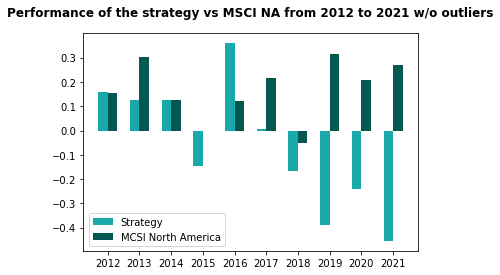

In [483]:
width = 0.3
#plt.bar(df_final.index, df_final['IPOs'], width=width, color = "#19A9A9")
plt.bar(np.arange(len(df_perf_final))- 0.15, df_perf_final['Strategy Performance'], width=width, color = "#19A9A9")
plt.bar(np.arange(len(df_perf_final))+ 0.15, df_perf_final['MCSI North America'], width=width, color ='#045851')
#plt.bar(np.arange(len(df_perf_final))+ 0.15, df_perf_final['S&P500'], width=width, color ='#045154')
X_axis = np.arange(len(df_perf_final))
plt.xticks(X_axis, df_perf_final.index, rotation = 0)
plt.legend(['Strategy','MCSI North America'], loc="lower center", bbox_to_anchor=(0.22, -0))
#plt.ylabel("Performance",fontweight="bold")
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Performance of the strategy vs MSCI NA from 2012 to 2021 w/o outliers", fontweight="bold", x=0.5, y=1.05)
plt.savefig('Performance', dpi=300,bbox_inches='tight')

In [392]:
MSCI_NA_Perf = pd.read_excel('MCSI NA Perf.xlsx')
MSCI_NA_Perf

,Year,MSCI NA,SP500
0,2012,0.1557,0.1589
1,2013,0.3039,0.3215
2,2014,0.1257,0.1352
3,2015,-0.0027,0.0136
4,2016,0.1230,0.1196
5,2017,0.2162,0.2183
6,2018,-0.0519,-0.0438
7,2019,0.3148,0.3149
8,2020,0.2060,0.1840
9,2021,0.2697,0.3092


In [458]:
df_perf_bis = pd.DataFrame(np.nan, index = df_elasticity.index[2:12], columns = ['Strategy Performance','S&P500','MCSI North America'])
df_perf_bis['Strategy Performance'] = list(df_perf_brut['Perf'])
df_perf_bis['MCSI North America'] = list(MSCI_NA_Perf['MSCI NA'])
df_perf_bis['S&P500'] = list(MSCI_NA_Perf['SP500'])
df_perf_bis

,Strategy Performance,S&P500,MCSI North America
2012,0.589410,0.1589,0.1557
2013,0.124004,0.3215,0.3039
2014,0.126296,0.1352,0.1257
2015,-0.146976,0.0136,-0.0027
2016,4.003188,0.1196,0.1230
2017,0.007109,0.2183,0.2162
2018,10.418259,-0.0438,-0.0519
2019,1.001353,0.3149,0.3148
2020,-0.098335,0.1840,0.2060
2021,1.084395,0.3092,0.2697


In [490]:
df_perf_bis

,Strategy Performance,S&P500,MCSI North America
2012,0.589410,0.1589,0.1557
2013,0.124004,0.3215,0.3039
2014,0.126296,0.1352,0.1257
2015,-0.146976,0.0136,-0.0027
2016,4.003188,0.1196,0.1230
2017,0.007109,0.2183,0.2162
2018,10.418259,-0.0438,-0.0519
2019,1.001353,0.3149,0.3148
2020,-0.098335,0.1840,0.2060
2021,1.084395,0.3092,0.2697


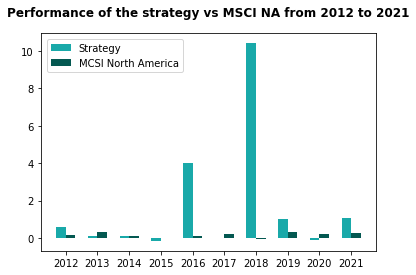

In [487]:
width = 0.3
#plt.bar(df_final.index, df_final['IPOs'], width=width, color = "#19A9A9")
plt.bar(np.arange(len(df_perf_bis))- 0.15, df_perf_bis['Strategy Performance'], width=width, color = "#19A9A9")
plt.bar(np.arange(len(df_perf_bis))+ 0.15, df_perf_bis['MCSI North America'], width=width, color ='#045851')
#plt.bar(np.arange(len(df_perf_final))+ 0.15, df_perf_final['S&P500'], width=width, color ='#045154')
X_axis = np.arange(len(df_perf_bis))
plt.xticks(X_axis, df_perf_bis.index, rotation = 0)
plt.legend(['Strategy','MCSI North America'], loc="lower center", bbox_to_anchor=(0.22, 0.8))
#plt.ylabel("Performance",fontweight="bold")
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Performance of the strategy vs MSCI NA from 2012 to 2021", fontweight="bold", x=0.5, y=1.05)
plt.savefig('Performance brut', dpi=300,bbox_inches='tight')

In [500]:
df_perf_breakdown = df_trades_final_test.groupby('Commo ticker').mean()[["Perf"]]
df_perf_breakdown.reset_index()

,Commo ticker,Perf
0,BZ=F,-0.237833
1,CC=F,0.718470
2,CL=F,-0.188836
3,CT=F,-0.110812
4,GC=F,-0.292107
5,HG=F,-0.113349
6,KC=F,-0.400537
7,LE=F,-0.541054
8,NG=F,0.424108
9,OJ=F,-0.148067


In [501]:
df_map = pd.read_excel('mapp.xlsx')
df_map

,Commo ticker,Commodity
0,GC=F,Gold
1,SI=F,Silver
2,HG=F,Copper
3,CL=F,Crude Oil
4,BZ=F,Brent
5,NG=F,Natural Gas
6,ZC=F,Corn
7,ZO=F,Oat
8,KE=F,Wheat
9,ZR=F,Rough Rice


In [502]:
dict_mapping2 = {}
for i in range(len(df_map['Commo ticker'])):
    key = df_map['Commo ticker'].iloc[i]
    val = df_map['Commodity'].iloc[i]
    dict_mapping2[key] = val
dict_mapping2

{'GC=F': 'Gold',
 'SI=F': 'Silver',
 'HG=F': 'Copper',
 'CL=F': 'Crude Oil ',
 'BZ=F': 'Brent',
 'NG=F': 'Natural Gas',
 'ZC=F': 'Corn',
 'ZO=F': 'Oat',
 'KE=F': 'Wheat',
 'ZR=F': 'Rough Rice',
 'ZS=F': 'Soybean ',
 'GF=F': 'Feeder Cattle ',
 'HE=F': 'Lean Hogs',
 'LE=F': 'Live Cattle',
 'CC=F': 'Cocoa',
 'KC=F': 'Coffee',
 'CT=F': 'Cotton',
 'LBS=F': 'Lumber',
 'OJ=F': 'Orange Juice',
 'SB=F': 'Sugar'}

In [503]:
df_perf_breakdown['Commodity'] = np.nan
for i in range(len(df_perf22)):
    key = df_map['Commo ticker'].iloc[i]   
    df_perf_breakdown['Commodity'].iloc[i] = dict_mapping2[key]
df_perf_breakdown

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Perf,Commodity
Commo ticker,,
BZ=F,-0.237833,Gold
CC=F,0.718470,Silver
CL=F,-0.188836,Copper
CT=F,-0.110812,Crude Oil
GC=F,-0.292107,Brent
HG=F,-0.113349,Natural Gas
KC=F,-0.400537,Corn
LE=F,-0.541054,Oat
NG=F,0.424108,Wheat


In [504]:
df_perf_breakdown = df_perf_breakdown.set_index('Commodity')
df_perf_breakdown

,Perf
Commodity,
Gold,-0.237833
Silver,0.718470
Copper,-0.188836
Crude Oil,-0.110812
Brent,-0.292107
Natural Gas,-0.113349
Corn,-0.400537
Oat,-0.541054
Wheat,0.424108


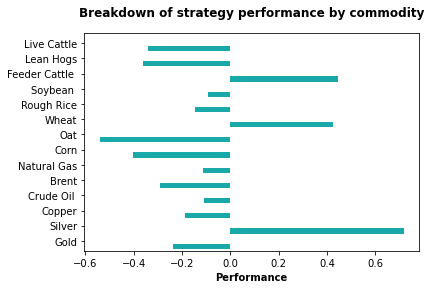

In [505]:
ind = np.arange(len(df_perf_breakdown))
width = 0.35
fig, ax = plt.subplots()
ax.barh(ind, df_perf_breakdown['Perf'], width, color='#19A9A9', label=df_perf_breakdown.index)
#ax.barh(ind + width, df_sector['Perf1M SP500'], width, color='#045851', label=df_sector.index)
ax.set(yticks=ind + width, yticklabels=df_perf_breakdown.index, ylim=[2*width - 1, len(df_perf_breakdown)])
plt.xlabel("Performance",fontweight="bold")
#plt.legend(['IPOs','S&P 500'], loc="lower center", bbox_to_anchor=(0.87, 0))
plt.title("Breakdown of strategy performance by commodity", fontweight="bold", x=0.5, y=1.05)
plt.savefig('Breakdown graph', dpi=300,bbox_inches='tight')

Text(0.5, 1.05, 'Breakdown of strategy performance by commodity')

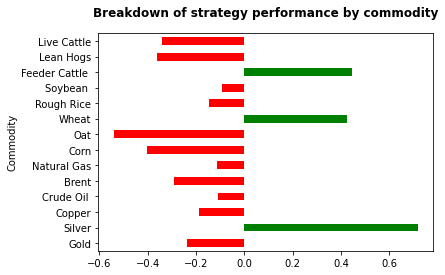

In [506]:
df_perf_breakdown['Perf'].plot(kind='barh',
                    color=(df_perf_breakdown['Perf'] > 0).map({True: 'g',
                                                    False: 'r'}))
plt.title("Breakdown of strategy performance by commodity", fontweight="bold", x=0.5, y=1.05)